In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /Users/aline/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# NLTK portuguese stopwords should be included on the list below 
sair = []
sair.extend(stopwords.words('portuguese'))

In [9]:
keywords = []
sumarios = []
for pag in range (1,17):
  url = f'https://dadosabertos.camara.leg.br/api/v2/deputados/74847/' +
    'discursos?idLegislatura=49&idLegislatura=50&idLegislatura=51' + 
    '&idLegislatura=52&idLegislatura=53&idLegislatura=54&idLegislatura=55&'+
    'dataInicio=1990-01-01&dataFim=2019-12-31&ordenarPor=dataHoraInicio&ordem=ASC&pagina={pag}&itens=100'
  resp = requests.get(url).json()
  for d in resp['dados']:
    s = d['sumario'].lower()
    s = ''.join(e for e in s if e not in ".,'()-")
    s = s.split()
    s = [w for w in s if w not in sair]
    sumarios.extend(s)
    if not d['keywords']: continue
    s = d['keywords'].lower()
    s = ''.join(e for e in s if e not in ".,'()-")
    s = s.split()
    s = [w for w in s if w not in sair]
    keywords.extend(s)
print(keywords)

['artigo', 'imprensa', 'relação', 'privilegio', 'funcionario', 'militar', 'pedido', 'apoio', 'emenda', 'medida', 'provisoria', 'congelamento', 'preço', 'salario', 'objetivo', 'regulamentação', 'remuneração', 'servidor', 'militar', 'apoio', 'luta', 'deputado', 'estadual', 'rj', 'extinção', 'conselho', 'contas', 'municipios', 'defesa', 'reajustamento', 'vencimentos', 'militar', 'incorporação', 'vantangens', 'soldo', 'militar', 'aniversario', 'emancipação', 'municipio', 'eldorado', 'paulista', 'sp', 'retificação', 'data', 'manifestação', 'coletiva', 'pensionista', 'militar', 'publicação', 'jornal', 'globo', 'rj', 'situação', 'soldado', 'exercito', 'solidariedade', 'manifestação', 'militar', 'reserva', 'exercito', 'rj', 'sc', 'pe', 'protesto', 'descumprimento', 'lei', 'federal', 'concessão', 'indenização', 'discordancia', 'artigo', 'imprensa', 'relação', 'situação', 'soldado', 'defesa', 'aumento', 'remuneração', 'militar', 'elogio', 'atuação', 'carlos', 'tinoco', 'ribeiro', 'gomes', 'minis

In [23]:
keywords = Counter(keywords)
sumarios = Counter(sumarios)
#print (keywords.most_common(100))
#print (sumarios.most_common(100))

[('militar', 1043), ('federal', 615), ('crítica', 479), ('defesa', 466), ('presidente', 337), ('nacional', 318), ('ministro', 304), ('projeto', 301), ('forças', 296), ('deputado', 294), ('armadas', 290), ('lei', 289), ('estado', 280), ('governo', 280), ('relação', 243), ('servidor', 226), ('critica', 223), ('civil', 217), ('atuação', 213), ('proposta', 204), ('emenda', 195), ('república', 188), ('salario', 180), ('publico', 180), ('medida', 177), ('partido', 174), ('orador', 167), ('comissão', 156), ('protesto', 155), ('deputados', 155), ('regime', 152), ('político', 145), ('ministério', 145), ('remuneração', 141), ('direitos', 139), ('estrangeiro', 133), ('aprovação', 129), ('apoio', 128), ('ex', 127), ('republica', 124), ('constitucional', 124), ('criação', 123), ('provisória', 122), ('fernando', 120), ('soldo', 110), ('votação', 110), ('pt', 109), ('rj', 108), ('câmara', 107), ('solicitação', 106), ('reajuste', 106), ('cardoso', 104), ('henrique', 103), ('avaliação', 103), ('comenta

In [3]:
key = ['artigo', 'imprensa', 'relação', 'privilegio', 'funcionario', 'militar', 'pedido', 'apoio', 'emenda', 'medida', 'provisoria', 'congelamento', 'preço', 'salario', 'objetivo', 'regulamentação', 'remuneração', 'servidor', 'militar', 'apoio', 'luta', 'deputado', 'estadual', 'rj', 'extinção', 'conselho', 'contas', 'municipios', 'defesa', 'reajustamento', 'vencimentos', 'militar', 'incorporação', 'vantangens', 'soldo', 'militar', 'aniversario', 'emancipação', 'municipio', 'eldorado', 'paulista', 'sp', 'retificação', 'data', 'manifestação', 'coletiva', 'pensionista', 'militar', 'publicação', 'jornal', 'globo', 'rj', 'situação', 'soldado', 'exercito', 'solidariedade', 'manifestação', 'militar', 'reserva', 'exercito', 'rj', 'sc', 'pe', 'protesto', 'descumprimento', 'lei', 'federal', 'concessão', 'indenização', 'discordancia', 'artigo', 'imprensa', 'relação', 'situação', 'soldado', 'defesa', 'aumento', 'remuneração', 'militar', 'elogio', 'atuação', 'carlos', 'tinoco', 'ribeiro', 'gomes', 'ministro', 'militar', 'necessidade', 'atualização', 'remuneração', 'pensão', 'militar', 'solicitação', 'apuração', 'denuncia', 'artigo', 'imprensa', 'relação', 'traficante', 'droga', 'congresso', 'nacional', 'registro', 'telex', 'zelia', 'cardoso', 'melo', 'ministro', 'estado', 'ministerio', 'economia', 'fazenda', 'planejamento', 'relação', 'salario', 'militar', 'impetração', 'presidente', 'clube', 'militar', 'mandado', 'segurança', 'coletivo', 'stj', 'concessão', 'isonomia', 'salarial', 'carta', 'vice', 'almirante', 'periodico', 'relação', 'artigo', 'imprensa', 'forças', 'armadas', 'exercicio', 'democracia', 'cumprimento', 'disciplina', 'area', 'militar', 'extinção', 'agencia', 'banco', 'brasil', 'sp', 'transferencia', 'comando', 'emfa', 'prisão', 'presidente', 'federação', 'militar', 'reserva', 'critica', 'atuação', 'general', 'jonas', 'morais', 'correia', 'neto', 'chefe', 'emfa', 'registro', 'partido', 'politico', 'pdc', 'morte', 'helio', 'campos', 'senador', 'prisão', 'militar', 'reserva', 'reclamação', 'salario', 'forças', 'armadas', 'discordancia', 'iniciativa', 'ministro', 'militar', 'suspensão', 'desconto', 'folha', 'pagamento', 'mensalidade', 'associado', 'clube', 'represalia', 'ação', 'judicial', 'isonomia', 'salarial', 'comentario', 'projeto', 'lei', 'executivo', 'regulamentação', 'vencimentos', 'servidor', 'defesa', 'isonomia', 'salarial', 'necessidade', 'agilização', 'dispositivos', 'constituição', 'federal', 'relação', 'beneficio', 'pensão', 'militar', 'artigo', 'imprensa', 'relação', 'ameaça', 'infiltração', 'sindicato', 'militar', 'condenação', 'governo', 'federal', 'discriminação', 'militar', 'critica', 'projeto', 'lei', 'executivo', 'politica', 'salarial', 'servidor', 'publico', 'civil', 'militar', 'critica', 'projeto', 'lei', 'origem', 'executivo', 'relação', 'reajustamento', 'salario', 'servidor', 'publico', 'civil', 'militar', 'critica', 'proposta', 'executivo', 'politica', 'salarial', 'servidor', 'publico', 'civil', 'militar', 'depoimento', 'ministro', 'estado', 'mm', 'comissão', 'defesa', 'nacional', 'camara', 'deputados', 'retirada', 'executivo', 'ordem', 'dia', 'projeto', 'lei', 'relação', 'autorização', 'militar', 'exercicio', 'profissão', 'artigo', 'imprensa', 'situação', 'salario', 'militar', 'critica', 'posição', 'eraldo', 'tinoco', 'ministro', 'estado', 'relação', 'reajuste', 'salario', 'militar', 'critica', 'programa', 'erradicação', 'analfabetismo', 'necessidade', 'regulamentação', 'pensão', 'militar', 'artigo', 'imprensa', 'alteração', 'estatuto', 'militares', 'revisão', 'artigo', 'constituição', 'federal', 'relação', 'reforma', 'militar', 'transferencia', 'militar', 'inatividade', 'critica', 'entrevista', 'jarbas', 'passarinho', 'ministro', 'estado', 'mj', 'relação', 'orador', 'soldo', 'militar', 'exercito', 'elogio', 'medida', 'leonel', 'brizola', 'governador', 'rj', 'aumento', 'soldo', 'policia', 'militar', 'rj', 'denuncia', 'internação', 'pais', 'estrangeiro', 'região', 'amazonica', 'declaração', 'santa', 'cruz', 'abreu', 'comandante', 'cma', 'internacionalização', 'região', 'amazonica', 'norma', 'mm', 'oficial', 'reserva', 'protesto', 'proposta', 'emfa', 'alteração', 'projeto', 'lei', 'relação', 'remuneração', 'servidor', 'publico', 'civil', 'militar', 'dispositivos', 'pensões', 'filha', 'agradecimento', 'jarbas', 'passarinho', 'ministro', 'estado', 'mj', 'relação', 'reajustamento', 'pensões', 'viuva', 'militar', 'impropriedade', 'critica', 'ministro', 'militar', 'direção', 'legislativo', 'relação', 'reajustamento', 'salario', 'servidor', 'publico', 'civil', 'militar', 'importancia', 'posição', 'congresso', 'nacional', 'relação', 'critica', 'ministro', 'militar', 'salario', 'servidor', 'publico', 'civil', 'militar', 'entrevista', 'carlos', 'tinoco', 'ministro', 'estado', 'jornal', 'rj', 'contradição', 'pronunciamento', 'atuação', 'ministro', 'estado', 'relação', 'isonomia', 'salarial', 'servidor', 'publico', 'civil', 'militar', 'critica', 'posição', 'ministro', 'estado', 'relação', 'salario', 'militar', 'necessidade', 'definição', 'politica', 'controle', 'natalidade', 'protesto', 'arbitrariedade', 'socrates', 'costa', 'monteiro', 'ministro', 'estado', 'punição', 'membros', 'subordinação', 'maer', 'iniciativa', 'processo', 'judiciario', 'defesa', 'direitos', 'revogação', 'camara', 'deputados', 'dispositivos', 'concessão', 'abono', 'salarial', 'marinheiro', 'rj', 'situação', 'fuzileiro', 'naval', 'rj', 'prestação', 'serviço', 'temporario', 'df', 'reajuste', 'salario', 'militar', 'requerimento', 'votação', 'regime', 'urgencia', 'projeto', 'lei', 'reestruturação', 'carreira', 'militar', 'justificação', 'apresentação', 'emenda', 'projeto', 'lei', 'remuneração', 'militar', 'relação', 'adicionais', 'funeral', 'ex', 'combatente', 'justificação', 'apresentação', 'emenda', 'projeto', 'lei', 'remuneração', 'militar', 'relação', 'salario', 'transferencia', 'inatividade', 'documento', 'orgão', 'militar', 'atuação', 'orador', 'instalações', 'militares', 'manifestação', 'partido', 'politico', 'pdc', 'pesames', 'morte', 'brandão', 'monteiro', 'deputado', 'federal', 'pedido', 'audiencia', 'ministro', 'estado', 'maer', 'esclarecimentos', 'relação', 'punição', 'taifeiro', 'entrevista', 'periodico', 'mordomia', 'oficial', 'superior', 'punição', 'taifeiro', 'declaração', 'mordomia', 'oficial', 'superior', 'maer', 'documento', 'general', 'brigada', 'tratamento', 'congressista', 'visita', 'quartel', 'limitação', 'contingente', 'militar', 'forças', 'armadas', 'documento', 'nilton', 'albuquerque', 'cerqueira', 'presidente', 'clube', 'militar', 'disturbios', 'civis', 'leilão', 'ações', 'usiminas', 'rj', 'greve', 'servidor', 'hfa', 'inconstitucionalidade', 'regulamento', 'disciplinar', 'forças', 'armadas', 'ausencia', 'responsabilidade', 'irregularidade', 'licitação', 'uniforme', 'resposta', 'requerimento', 'proibição', 'acesso', 'orador', 'parecer', 'projeto', 'lei', 'relação', 'organização', 'corpo', 'bombeiros', 'df', 'critica', 'comportamento', 'congressista', 'sessão', 'convocação', 'depoimento', 'carlos', 'tinoco', 'ministro', 'estado', 'irregularidade', 'licitação', 'aquisição', 'uniforme', 'comentario', 'projeto', 'lei', 'aprovacão', 'senado', 'aquisição', 'imovel', 'propriedade', 'governo', 'federal', 'militar', 'posição', 'projeto', 'lei', 'executivo', 'plano', 'cargos', 'salarios', 'servidor', 'publico', 'civil', 'militar', 'crise', 'economia', 'nacional', 'necessidade', 'contenção', 'efetivos', 'militares', 'forças', 'armadas', 'objetivo', 'qualificação', 'pessoal', 'militar', 'discurso', 'fernando', 'collor', 'mello', 'candidato', 'eleição', 'presidente', 'republica', 'redução', 'poder', 'aquisitivo', 'trabalhador', 'efeito', 'inflação', 'critica', 'atuação', 'carlos', 'tinoco', 'gomes', 'pereira', 'ministro', 'estado', 'critica', 'atuação', 'fernando', 'collor', 'mello', 'presidente', 'republica', 'combate', 'inflação', 'critica', 'administração', 'sistema', 'nacional', 'telecomunicações', 'judiciario', 'decisão', 'concessão', 'pensões', 'filha', 'militar', 'apreciação', 'stf', 'mandado', 'injunção', 'objetivo', 'pagamento', 'integralidade', 'pensões', 'funcionario', 'publico', 'solidariedade', 'ministro', 'estado', 'relação', 'proposta', 'demarcação', 'reserva', 'indigena', 'rr', 'resultado', 'auditoria', 'tcu', 'licitação', 'dgs', 'aquisição', 'uniforme', 'representação', 'orador', 'procuradoria', 'geral', 'republica', 'exame', 'constitucionalidade', 'demarcação', 'reserva', 'indigena', 'rr', 'desvalorização', 'salario', 'professor', 'primeiro', 'grau', 'segundo', 'grau', 'necessidade', 'cumprimento', 'legislação', 'reajustamento', 'salario', 'professor', 'primeiro', 'grau', 'segundo', 'grau', 'denuncia', 'irregularidade', 'afa', 'municipio', 'pirassununga', 'sp', 'denuncia', 'corrupção', 'general', 'exercito', 'protesto', 'declaração', 'chefe', 'emfa', 'indice', 'reposição', 'salario', 'servidor', 'publico', 'civil', 'militar', 'concessão', 'mes', 'janeiro', 'critica', 'ameaça', 'transferencia', 'militar', 'efeito', 'lobby', 'conjuge', 'venda', 'imovel', 'residencia', 'funcional', 'artigo', 'imprensa', 'relação', 'reajuste', 'salario', 'militar', 'critica', 'autoridade', 'forças', 'armadas', 'critica', 'governo', 'federal', 'relação', 'aumento', 'vencimentos', 'servidor', 'publico', 'projeto', 'lei', 'fixação', 'data', 'pagamento', 'servidor', 'poder', 'executivo', 'transcrição', 'artigo', 'imprensa', 'relação', 'ameaça', 'indio', 'soberania', 'nacional', 'posição', 'orador', 'projeto', 'lei', 'executivo', 'fonte', 'custeio', 'previdencia', 'social', 'elogio', 'iniciativa', 'governador', 'pr', 'redução', 'icms', 'produto', 'cesta', 'alimentos', 'basicos', 'discordancia', 'pronunciamento', 'lourival', 'freitas', 'deputado', 'federal', 'relação', 'demarcação', 'terras', 'indio', 'transcrição', 'entrevista', 'periodico', 'thaumaturgo', 'sotero', 'vaz', 'general', 'exercito', 'relação', 'ameaça', 'região', 'amazonica', 'critica', 'politica', 'salarial', 'militar', 'defesa', 'implantação', 'projeto', 'colonização', 'faixa', 'fronteira', 'região', 'norte', 'exoneração', 'aviador', 'aviação', 'militar', 'efeito', 'remuneração', 'motivo', 'critica', 'orador', 'pronunciamento', 'carlos', 'tinoco', 'ministro', 'estado', 'elogio', 'fernando', 'collor', 'mello', 'presidente', 'republica', 'desaprovação', 'orador', 'proposta', 'reforma', 'constitucional', 'iniciativa', 'presidente', 'republica', 'assunto', 'reajustamento', 'aposentadoria', 'militar', 'inativo', 'desaprovação', 'orador', 'proposta', 'emenda', 'constitucional', 'executivo', 'referencia', 'aposentadoria', 'desvinculação', 'reajustamento', 'salario', 'militar', 'denuncia', 'proibição', 'assistencia', 'medico', 'hospitalar', 'hospital', 'militar', 'ex', 'combatente', 'protesto', 'demora', 'governador', 'federal', 'definição', 'politica', 'salarial', 'servidor', 'publico', 'civil', 'militar', 'improcedencia', 'proibição', 'ministro', 'estado', 'ministerios', 'militares', 'pagamento', 'vencimento', 'servidor', 'militar', 'candidato', 'cargo', 'eletivo', 'ajuizamento', 'procurador', 'geral', 'republica', 'ação', 'inconstitucionalidade', 'relação', 'pensão', 'militar', 'filha', 'solteira', 'encaminhamento', 'emfa', 'projeto', 'lei', 'relação', 'pensão', 'militar', 'filha', 'solteira', 'revisão', 'congresso', 'nacional', 'proibição', 'congressista', 'apresentação', 'proposição', 'interesse', 'servidor', 'publico', 'civil', 'militar', 'defesa', 'isonomia', 'salarial', 'servidor', 'publico', 'civil', 'militar', 'informação', 'confidencial', 'chefe', 'comando', 'operações', 'terrestres', 'relação', 'atuação', 'orador', 'oficiais', 'critica', 'politica', 'salarial', 'comentario', 'artigo', 'imprensa', 'relação', 'divulgação', 'remuneração', 'cargo', 'militar', 'exterior', 'dificuldade', 'ex', 'combatente', 'feb', 'critica', 'permanencia', 'ministro', 'militar', 'governo', 'federal', 'homenagem', 'postuma', 'jamil', 'amiden', 'ex', 'deputado', 'federal', 'importancia', 'desenvolvimento', 'programa', 'conscientização', 'controle', 'natalidade', 'transcrição', 'artigo', 'imprensa', 'assunto', 'pais', 'estrangeiro', 'china', 'inicio', 'utilização', 'medicamento', 'aborto', 'transcrição', 'documento', 'oposição', 'relação', 'governo', 'federal', 'motivo', 'ausencia', 'politica', 'atendimento', 'necessidade', 'familia', 'militar', 'dificuldade', 'orador', 'realização', 'conferencia', 'salario', 'militar', 'obstaculo', 'realização', 'reunião', 'objetivo', 'organização', 'marcha', 'familia', 'militar', 'critica', 'joaquim', 'roriz', 'governador', 'df', 'motivo', 'proibição', 'reunião', 'organização', 'marcha', 'familia', 'militar', 'protesto', 'comportamento', 'tenente', 'coronel', 'robae', 'impedimento', 'orador', 'participação', 'marcha', 'dignidade', 'familia', 'militar', 'municipio', 'brasilia', 'df', 'referencia', 'salario', 'discordancia', 'atuação', 'policia', 'exercito', 'objetivo', 'impedimento', 'reunião', 'orador', 'familia', 'militar', 'manifestação', 'df', 'defesa', 'salario', 'funcionario', 'militar', 'esclarecimentos', 'atuação', 'orador', 'relação', 'salario', 'militar', 'reunião', 'grupo', 'parlamentar', 'emfa', 'relação', 'salario', 'militar', 'exclusão', 'orador', 'comentario', 'dispositivos', 'constituição', 'federal', 'competencia', 'exclusiva', 'presidente', 'republica', 'legislação', 'servidor', 'publico', 'civil', 'funcionario', 'militar', 'realização', 'manifestação', 'coletiva', 'familia', 'funcionario', 'militar', 'motivo', 'defasagem', 'salario', 'critica', 'projeto', 'lei', 'governo', 'federal', 'reajustamento', 'salario', 'funcionario', 'militar', 'decisão', 'orador', 'continuação', 'luta', 'defesa', 'salario', 'militar', 'ameaça', 'carlos', 'tinoco', 'ministro', 'estado', 'prisão', 'jair', 'bolsonaro', 'deputado', 'federal', 'efeito', 'manifestação', 'familia', 'militar', 'melhoria', 'salario', 'solicitação', 'apoio', 'deputado', 'federal', 'senador', 'servidor', 'publico', 'civil', 'manifestação', 'familia', 'militar', 'protesto', 'defasagem', 'vencimentos', 'comunicação', 'mesa', 'diretora', 'camara', 'deputados', 'participação', 'orador', 'reunião', 'conjuge', 'militar', 'referencia', 'isonomia', 'salarial', 'discordancia', 'sugestão', 'osvaldo', 'bender', 'deputado', 'federal', 'referencia', 'policiamento', 'ostensivo', 'execução', 'forças', 'armadas', 'comentario', 'projeto', 'lei', 'isonomia', 'salarial', 'projeto', 'executivo', 'isonomia', 'salarial', 'servidor', 'publico', 'civil', 'militar', 'convite', 'congressista', 'participação', 'reunião', 'orador', 'esposa', 'militar', 'municipio', 'brasilia', 'df', 'denuncia', 'agressão', 'policial', 'militar', 'conjuge', 'militar', 'reunião', 'isonomia', 'salarial', 'restrição', 'portaria', 'maer', 'desconto', 'pagamento', 'militar', 'pensionista', 'irregularidade', 'ocupação', 'residencia', 'funcional', 'transcrição', 'artigo', 'imprensa', 'relação', 'impedimento', 'jair', 'bolsonaro', 'deputado', 'federal', 'entrada', 'clube', 'exercito', 'smu', 'proibição', 'participação', 'orador', 'solenidade', 'protesto', 'recolhimento', 'boletim', 'orador', 'distribuição', 'militar', 'determinação', 'carlos', 'tinoco', 'ministro', 'estado', 'necessidade', 'agilização', 'congressista', 'votação', 'projeto', 'lei', 'isonomia', 'salarial', 'apoio', 'pronunciamento', 'amaury', 'muller', 'deputado', 'federal', 'relação', 'atuação', 'liderança', 'organização', 'pauta', 'ordem', 'dia', 'critica', 'projeto', 'lei', 'isonomia', 'salarial', 'servidor', 'publico', 'civil', 'militar', 'defesa', 'aprovação', 'emenda', 'senado', 'projeto', 'lei', 'regulamentação', 'dispositivos', 'constituição', 'federal', 'objetivo', 'isonomia', 'salarial', 'referencia', 'pensão', 'militar', 'solicitação', 'mesa', 'diretora', 'permissão', 'alteração', 'numeração', 'emenda', 'senado', 'projeto', 'lei', 'isonomia', 'salarial', 'requerimento', 'destaque', 'aprovação', 'critica', 'decisão', 'carlos', 'tinoco', 'ministro', 'estado', 'motivo', 'impedimento', 'militar', 'candidato', 'eleição', 'municipal', 'recebimento', 'vencimentos', 'esclarecimentos', 'entrevista', 'epitacio', 'cafeteira', 'senador', 'relação', 'relacionamento', 'orador', 'governo', 'federal', 'impedimento', 'participação', 'orador', 'solenidade', 'aman', 'noticiario', 'participação', 'desfile', 'militar', 'data', 'nacional', 'brasil', 'critica', 'carlos', 'tinoco', 'ministro', 'estado', 'descumprimento', 'isonomia', 'salarial', 'relação', 'soldo', 'praça', 'voto', 'congratulações', 'aniversario', 'municipio', 'bom', 'jesus', 'itabapoana', 'rj', 'repudio', 'proibição', 'uso', 'cor', 'vestuario', 'povo', 'motivo', 'protesto', 'presença', 'fernando', 'collor', 'mello', 'presidente', 'republica', 'comemoração', 'dia', 'nacional', 'patria', 'critica', 'isonomia', 'salarial', 'militar', 'critica', 'projeto', 'lei', 'governo', 'federal', 'reajustamento', 'salario', 'servidor', 'publico', 'civil', 'isonomia', 'salarial', 'encaminhamento', 'votação', 'requerimento', 'destaque', 'emenda', 'projeto', 'lei', 'concessão', 'antecipação', 'vencimentos', 'soldo', 'servidor', 'publico', 'civil', 'militar', 'executivo', 'referencia', 'recruta', 'critica', 'projeto', 'lei', 'relação', 'reajustamento', 'salario', 'servidor', 'publico', 'civil', 'militar', 'rejeição', 'relator', 'projeto', 'lei', 'reajustamento', 'salario', 'servidor', 'publico', 'civil', 'militar', 'emenda', 'autoria', 'orador', 'referencia', 'concessão', 'salario', 'minimo', 'recruta', 'defesa', 'manutenção', 'artigo', 'lei', 'delegada', 'concessão', 'gratificação', 'atividade', 'militar', 'homenagem', 'conjuge', 'militar', 'efeito', 'atuação', 'objetivo', 'contribuição', 'inicio', 'isonomia', 'salarial', 'protesto', 'ofensa', 'origem', 'fernando', 'collor', 'mello', 'presidente', 'republica', 'defesa', 'exoneração', 'carlos', 'tinoco', 'ministro', 'estado', 'eventualidade', 'afastamento', 'fernando', 'collor', 'mello', 'presidente', 'republica', 'posse', 'itamar', 'franco', 'vice', 'presidente', 'republica', 'erro', 'interpretação', 'pedro', 'simon', 'senador', 'visita', 'orador', 'itamar', 'franco', 'vice', 'presidente', 'republica', 'elogio', 'declaração', 'coutinho', 'jorge', 'ministro', 'estado', 'ministerio', 'meio', 'ambiente', 'defesa', 'revisão', 'dimensão', 'reserva', 'indigena', 'agilização', 'tramitação', 'projeto', 'decreto', 'legislativo', 'autoria', 'orador', 'referencia', 'demarcação', 'reserva', 'indigena', 'critica', 'atuação', 'sidney', 'possuelo', 'presidente', 'funai', 'cumprimento', 'estudantes', 'visita', 'galeria', 'plenario', 'camara', 'deputados', 'defesa', 'melhoria', 'vencimentos', 'policia', 'militar', 'rj', 'defesa', 'atuação', 'policia', 'militar', 'sp', 'invasão', 'penitenciaria', 'localização', 'municipio', 'paulo', 'sp', 'discordancia', 'conclusão', 'cpi', 'investigação', 'incidencia', 'esterilização', 'mulher', 'apoio', 'politica', 'controle', 'natalidade', 'anuncio', 'walter', 'barelli', 'ministro', 'estado', 'mta', 'definição', 'politica', 'salarial', 'servidor', 'publico', 'civil', 'militar', 'sugestão', 'assunto', 'debate', 'comissão', 'trabalho', 'administração', 'serviço', 'publico', 'relação', 'politica', 'salarial', 'servidor', 'publico', 'civil', 'militar', 'anuncio', 'apresentação', 'orador', 'projeto', 'lei', 'relação', 'alteração', 'estatuto', 'militares', 'objetivo', 'garantia', 'exercicio', 'profissão', 'liberal', 'advogado', 'defesa', 'justiça', 'politica', 'salarial', 'aplicação', 'funcionarios', 'união', 'federal', 'pedido', 'transcrição', 'oficio', 'ministro', 'militar', 'destinação', 'ministro', 'estado', 'mta', 'referencia', 'reivindicação', 'servidor', 'publico', 'civil', 'ministerio', 'militares', 'replica', 'pronunciamento', 'deputado', 'federal', 'paulo', 'paim', 'critica', 'relação', 'grupo', 'economia', 'governo', 'itamar', 'franco', 'vice', 'presidente', 'republica', 'exercicio', 'presidencia', 'republica', 'oposição', 'declaração', 'carlos', 'alberto', 'campista', 'deputado', 'federal', 'relação', 'isonomia', 'salarial', 'favorecimento', 'militar', 'critica', 'leonel', 'brizola', 'governador', 'rj', 'motivo', 'ausencia', 'cumprimento', 'constituição', 'federal', 'relação', 'policia', 'militar', 'questionamento', 'manifestação', 'itamar', 'franco', 'vice', 'presidente', 'republica', 'exercicio', 'presidencia', 'republica', 'relação', 'colocação', 'civil', 'solicitação', 'transcrição', 'remessa', 'presidente', 'republica', 'documento', 'relação', 'diretriz', 'exercito', 'contestação', 'critica', 'itamar', 'franco', 'vice', 'presidente', 'republica', 'relação', 'posição', 'ivan', 'serpa', 'ministro', 'estado', 'mm', 'oposição', 'criação', 'ministerio', 'fazenda', 'transcrição', 'documento', 'solicitação', 'sindicato', 'forças', 'armadas', 'rj', 'encaminhamento', 'walter', 'barelli', 'ministro', 'estado', 'mta', 'reivindicação', 'aumento', 'gratificação', 'servidor', 'publico', 'civil', 'gratificação', 'servidor', 'publico', 'civil', 'vinculação', 'ministerios', 'militares', 'necessidade', 'adoção', 'politica', 'controle', 'natalidade', 'ausencia', 'acordo', 'ministro', 'estado', 'relação', 'politica', 'salarial', 'servidor', 'publico', 'civil', 'militar', 'critica', 'criação', 'estabelecimento', 'ensino', 'contabilidade', 'municipio', 'mancacapuru', 'am', 'ausencia', 'viabilidade', 'vinculação', 'politica', 'salarial', 'servidor', 'publico', 'civil', 'vinculação', 'estados', 'municipios', 'critica', 'comissão', 'trabalho', 'administração', 'serviço', 'publico', 'camara', 'deputados', 'motivo', 'ausencia', 'eficacia', 'negociação', 'concessão', 'aumento', 'salario', 'servidor', 'publico', 'civil', 'critica', 'atuação', 'sindicato', 'servidor', 'publico', 'civil', 'redução', 'vencimentos', 'policial', 'militar', 'bombeiro', 'militar', 'df', 'comentario', 'posição', 'direção', 'policia', 'militar', 'df', 'repressão', 'manifestação', 'pessoal', 'subalterno', 'relação', 'proposta', 'emenda', 'constitucional', 'constituição', 'federal', 'relação', 'segurança', 'publica', 'necessidade', 'reformulação', 'isonomia', 'salarial', 'reajustamento', 'salario', 'servidor', 'policia', 'federal', 'defesa', 'vinculação', 'salario', 'minimo', 'reajustamento', 'salario', 'servidor', 'publico', 'civil', 'militar', 'união', 'federal', 'registro', 'formatura', 'guarda', 'marinha', 'en', 'rj', 'situação', 'salario', 'militar', 'necessidade', 'urgencia', 'definição', 'governo', 'federal', 'politica', 'salarial', 'servidor', 'publico', 'civil', 'militar', 'critica', 'jabes', 'ribeiro', 'relator', 'projeto', 'lei', 'reajustamento', 'salario', 'servidor', 'publico', 'civil', 'militar', 'atuação', 'comissão', 'trabalho', 'administração', 'serviço', 'publico', 'posição', 'orador', 'relação', 'pena', 'morte', 'carta', 'autoria', 'militar', 'relação', 'isonomia', 'salarial', 'alteração', 'data', 'pagamento', 'servidor', 'publico', 'civil', 'militar', 'executivo', 'critica', 'presidente', 'banco', 'brasil', 'intenção', 'encerramento', 'conta', 'bancaria', 'militar', 'ausencia', 'saldo', 'bancario', 'elogio', 'ministro', 'estado', 'desvinculação', 'recebimento', 'pagamento', 'servidor', 'agencia', 'banco', 'brasil', 'cef', 'reconsideração', 'declaração', 'orador', 'pronunciamento', 'relação', 'presidencia', 'banco', 'brasil', 'critica', 'maria', 'laura', 'deputado', 'federal', 'pronunciamento', 'defesa', 'antecipação', 'data', 'pagamento', 'servidor', 'executivo', 'ausencia', 'referencia', 'atuação', 'orador', 'emenda', 'regulamentação', 'defesa', 'adoção', 'pena', 'morte', 'controle', 'natalidade', 'agradecimento', 'liderança', 'partido', 'politico', 'pl', 'pmdb', 'apoio', 'emenda', 'autoria', 'orador', 'relação', 'pagamento', 'remuneração', 'servidor', 'problema', 'fusão', 'gratificação', 'vencimentos', 'servidor', 'necessidade', 'definição', 'politica', 'salarial', 'servidor', 'publico', 'civil', 'militar', 'aniversario', 'fundação', 'municipio', 'eldorado', 'sp', 'solicitação', 'transcrição', 'aviso', 'boletim', 'informação', 'coordenação', 'orador', 'relação', 'politica', 'salarial', 'comentario', 'relação', 'proposta', 'indice', 'reajuste', 'salario', 'servidor', 'restrição', 'realização', 'revisão', 'constituição', 'federal', 'solicitação', 'retificação', 'noticiario', 'radio', 'pronunciamento', 'orador', 'relação', 'indice', 'antecipação', 'salario', 'funcionario', 'publico', 'civil', 'militar', 'solicitação', 'maer', 'redução', 'indice', 'desconto', 'soldo', 'militar', 'reserva', 'efeito', 'ocupação', 'residencia', 'funcional', 'expectativa', 'presidente', 'republica', 'remessa', 'camara', 'deputados', 'mensagem', 'presidencial', 'concessão', 'reajustamento', 'salario', 'objetivo', 'garantia', 'salario', 'minimo', 'classe', 'inicial', 'servidor', 'publico', 'civil', 'critica', 'politica', 'salarial', 'defesa', 'maria', 'laura', 'deputado', 'federal', 'elogio', 'atuação', 'ministro', 'estado', 'mta', 'saf', 'motivo', 'apoio', 'antecipação', 'reajustamento', 'salario', 'servidor', 'publico', 'civil', 'militar', 'defesa', 'cumprimento', 'lei', 'federal', 'referencia', 'interesse', 'servidor', 'erro', 'projeto', 'lei', 'executivo', 'antecipação', 'salario', 'servidor', 'publico', 'civil', 'militar', 'comentario', 'aprovação', 'projeto', 'lei', 'antecipação', 'salario', 'servidor', 'publico', 'civil', 'comentario', 'isonomia', 'salarial', 'servidor', 'publico', 'civil', 'comentario', 'relação', 'artigo', 'imprensa', 'critica', 'orador', 'ministro', 'militar', 'apoio', 'orador', 'pronunciamento', 'chico', 'vigilante', 'deputado', 'federal', 'relação', 'servidor', 'publico', 'civil', 'comentario', 'artigo', 'imprensa', 'relação', 'diferença', 'gastos', 'publicos', 'pagamento', 'servidor', 'publico', 'civil', 'militar', 'malversação', 'recursos', 'financeiros', 'classe', 'politica', 'comentario', 'fundação', 'partido', 'politico', 'ppr', 'fusão', 'pds', 'pdc', 'elogio', 'pronunciamento', 'paulo', 'paim', 'deputado', 'federal', 'politica', 'salarial', 'condenação', 'posição', 'chefe', 'emfa', 'relação', 'politica', 'salarial', 'setor', 'publico', 'setor', 'privado', 'comentario', 'necessidade', 'controle', 'contas', 'judiciario', 'artigo', 'imprensa', 'ofensa', 'orador', 'critica', 'anuncio', 'reajustamento', 'servidor', 'publico', 'civil', 'militar', 'protesto', 'arbitrariedade', 'jose', 'botelho', 'filho', 'diretor', 'departamento', 'pessoal', 'camara', 'deputados', 'servidor', 'solidariedade', 'reivindicação', 'reparo', 'injustiça', 'solicitação', 'transcrição', 'documento', 'relação', 'reajustamento', 'vencimentos', 'servidor', 'publico', 'civil', 'militar', 'aprovação', 'camara', 'deputados', 'projeto', 'lei', 'extensão', 'ex', 'combatente', 'direitos', 'base', 'calculo', 'proventos', 'segundo', 'sargento', 'anuncio', 'realização', 'manifestação', 'coletiva', 'critica', 'salario', 'militar', 'comparação', 'salario', 'servidor', 'cef', 'general', 'exercito', 'leitura', 'trecho', 'editorial', 'autoria', 'bia', 'botana', 'analista', 'politica', 'relação', 'forças', 'armadas', 'brasil', 'restituição', 'garantia', 'pensão', 'militar', 'filha', 'solteira', 'militar', 'encaminhamento', 'presidente', 'republica', 'oficio', 'orador', 'desistencia', 'emenda', 'orçamento', 'motivo', 'colaboração', 'redução', 'dotação', 'orçamentaria', 'apoio', 'plano', 'ação', 'estabilização', 'economia', 'nacional', 'fernando', 'henrique', 'cardoso', 'ministro', 'estado', 'mf', 'esclarecimentos', 'conferencia', 'orador', 'municipio', 'salvador', 'ba', 'santa', 'maria', 'rs', 'defesa', 'retomada', 'militar', 'governo', 'federal', 'motivo', 'falencia', 'legislativo', 'solicitação', 'adylson', 'motta', 'deputado', 'federal', 'documento', 'relação', 'declaração', 'orador', 'defesa', 'fechamento', 'congresso', 'nacional', 'proposta', 'assistencia', 'medico', 'odontologica', 'retratação', 'orador', 'acusação', 'prejuizo', 'adylson', 'motta', 'deputado', 'federal', 'relação', 'programa', 'assistencia', 'medico', 'odontologica', 'defesa', 'policial', 'civil', 'policial', 'militar', 'protesto', 'atraso', 'repasse', 'recursos', 'financeiros', 'pagamento', 'policial', 'militar', 'df', 'rj', 'homenagem', 'sargento', 'aniversario', 'fundação', 'entidade', 'pais', 'centenario', 'fundador', 'entidade', 'sargento', 'nicolau', 'tolentino', 'menezes', 'capitão', 'criação', 'jornal', 'classe', 'denuncia', 'proposta', 'troca', 'partido', 'politico', 'relacionamento', 'governador', 'sp', 'parecer', 'emenda', 'senado', 'projeto', 'lei', 'alteração', 'legislação', 'remuneração', 'militar', 'forças', 'armadas', 'objetivo', 'beneficio', 'militar', 'reformado', 'invalidez', 'absolvição', 'orador', 'comissão', 'constituição', 'justiça', 'redação', 'representação', 'mesa', 'diretora', 'motivo', 'discurso', 'conveniencia', 'realização', 'sessão', 'publica', 'julgamento', 'congressista', 'comprometimento', 'aliciamento', 'deputado', 'federal', 'objetivo', 'troca', 'filiação', 'partidaria', 'critica', 'sistema', 'unificação', 'previdencia', 'social', 'ministro', 'estado', 'mps', 'efeito', 'diferença', 'profissão', 'militar', 'pronunciamento', 'romildo', 'canhim', 'ministro', 'estado', 'saf', 'relação', 'vencimentos', 'militar', 'artigo', 'imprensa', 'relação', 'ação', 'popular', 'orador', 'justiça', 'federal', 'redução', 'salario', 'deputado', 'federal', 'importancia', 'desempenho', 'comissão', 'mista', 'parlamentar', 'inquerito', 'apuração', 'denuncia', 'corrupção', 'comissão', 'mista', 'planos', 'orçamentos', 'publicos', 'fiscalização', 'reforma', 'constitucional', 'aumento', 'fiscalização', 'administração', 'publica', 'recuperação', 'confiança', 'sociedade', 'atuação', 'congresso', 'nacional', 'registro', 'visita', 'comissão', 'presidente', 'clube', 'militar', 'orador', 'comentario', 'inconstitucionalidade', 'medida', 'provisoria', 'concessão', 'efeito', 'liminar', 'medidas', 'acautelatorias', 'situação', 'riscos', 'interesse', 'publico', 'ordem', 'saude', 'segurança', 'economia', 'publica', 'contestação', 'declaração', 'vital', 'rego', 'deputado', 'federal', 'relação', 'participação', 'orador', 'organização', 'paramilitar', 'objetivo', 'defesa', 'acusação', 'periodico', 'recebimento', 'propina', 'votação', 'abertura', 'processo', 'impeachment', 'fernando', 'collor', 'mello', 'ex', 'presidente', 'republica', 'comentario', 'alteração', 'criterios', 'fixação', 'data', 'pagamento', 'servidor', 'publico', 'civil', 'militar', 'posicionamento', 'partido', 'politico', 'ppr', 'votação', 'medida', 'provisoria', 'relação', 'aumento', 'impostos', 'defesa', 'rejeição', 'proposta', 'emenda', 'constitucional', 'criação', 'fundo', 'social', 'emergencia', 'artigo', 'inclusão', 'disposições', 'transitorias', 'relação', 'limitação', 'despesa', 'orçamentaria', 'pessoal', 'protesto', 'artigo', 'imprensa', 'relação', 'atuação', 'jair', 'bolsonaro', 'wanda', 'reis', 'deputado', 'federal', 'votação', 'aumento', 'imposto', 'renda', 'pessoa', 'fisica', 'esclarecimentos', 'atuação', 'bancada', 'partido', 'politico', 'ppr', 'votação', 'fundo', 'social', 'emergencia', 'restrição', 'ausencia', 'definição', 'programa', 'natureza', 'social', 'utilização', 'verba', 'fundo', 'social', 'emergencia', 'aprovação', 'congresso', 'nacional', 'reforma', 'constitucional', 'necessidade', 'implementação', 'programa', 'controle', 'natalidade', 'necessidade', 'controle', 'inflação', 'referencia', 'majoração', 'preço', 'produto', 'cantina', 'plenario', 'camara', 'deputados', 'congratulações', 'joão', 'brochado', 'coronel', 'posse', 'deputado', 'federal', 'camara', 'deputados', 'destaque', 'emenda', 'reforma', 'constitucional', 'relação', 'inelegibilidade', 'militar', 'critica', 'proposta', 'inclusão', 'militar', 'previdencia', 'social', 'conveniencia', 'utilização', 'policia', 'militar', 'camara', 'deputados', 'retirada', 'participante', 'manifestação', 'coletiva', 'contestação', 'reforma', 'constitucional', 'protesto', 'relação', 'perda', 'salario', 'funcionarios', 'efeito', 'criterios', 'conversão', 'urv', 'plano', 'ação', 'estabilização', 'economia', 'nacional', 'apoio', 'candidatura', 'edmar', 'moreira', 'deputado', 'federal', 'conselho', 'republica', 'protesto', 'programa', 'voz', 'brasil', 'motivo', 'supressão', 'referencia', 'pronunciamento', 'orador', 'critica', 'criterios', 'conversão', 'salario', 'servidor', 'publico', 'civil', 'militar', 'urv', 'realização', 'assembleia', 'sindicato', 'servidor', 'camara', 'deputados', 'senado', 'tcu', 'posição', 'relação', 'medida', 'provisoria', 'plano', 'ação', 'estabilização', 'economia', 'nacional', 'sistema', 'monetario', 'nacional', 'urv', 'critica', 'posição', 'jose', 'milton', 'dallari', 'secretario', 'mf', 'relação', 'conversão', 'urv', 'vencimentos', 'soldo', 'servidor', 'publico', 'civil', 'militar', 'inclusão', 'plano', 'ação', 'estabilização', 'economia', 'nacional', 'solicitação', 'transcrição', 'oficio', 'orador', 'destinatario', 'ministro', 'militar', 'relação', 'perda', 'salario', 'categoria', 'militar', 'critica', 'perda', 'salario', 'servidor', 'publico', 'civil', 'militar', 'efeito', 'plano', 'estabilização', 'economia', 'nacional', 'critica', 'governo', 'federal', 'motivo', 'ausencia', 'controle', 'inflação', 'inoportunidade', 'aprovação', 'medida', 'provisoria', 'relação', 'abono', 'especial', 'servidor', 'publico', 'civil', 'militar', 'critica', 'processo', 'troca', 'favorecimento', 'natureza', 'politica', 'partido', 'politico', 'relação', 'aprovação', 'medida', 'provisoria', 'referencia', 'plano', 'estabilização', 'economia', 'sistema', 'monetario', 'nacional', 'adoção', 'urv', 'perda', 'poder', 'aquisitivo', 'salario', 'conversão', 'urv', 'cobrança', 'perda', 'conversão', 'salario', 'urv', 'funcionarios', 'oportunidade', 'comparecimento', 'fernando', 'henrique', 'cardoso', 'ministro', 'estado', 'mf', 'congresso', 'nacional', 'objetivo', 'esclarecimentos', 'plano', 'ação', 'estabilização', 'economia', 'nacional', 'critica', 'atuação', 'romildo', 'canhim', 'ministro', 'estado', 'saf', 'critica', 'exposição', 'fernando', 'henrique', 'cardoso', 'ministro', 'estado', 'mf', 'comissão', 'mista', 'especial', 'relação', 'criterios', 'conversão', 'urv', 'remuneração', 'servidor', 'publico', 'civil', 'militar', 'protesto', 'perda', 'salario', 'servidor', 'publico', 'civil', 'militar', 'efeito', 'plano', 'ação', 'estabilização', 'economia', 'nacional', 'governo', 'federal', 'critica', 'perda', 'salario', 'funcionario', 'publico', 'relação', 'conversão', 'salario', 'urv', 'reivindicação', 'equiparação', 'salarial', 'soldo', 'cadete', 'aspirante', 'oficial', 'salario', 'minimo', 'critica', 'plano', 'ação', 'estabilização', 'economia', 'nacional', 'perda', 'salario', 'servidor', 'publico', 'civil', 'militar', 'efeito', 'plano', 'ação', 'estabilização', 'economia', 'nacional', 'situação', 'salario', 'coronel', 'exercito', 'denuncia', 'negociação', 'congressista', 'parcela', 'fundo', 'social', 'emergencia', 'efeito', 'aprovação', 'plano', 'ação', 'estabilização', 'economia', 'nacional', 'reajustamento', 'salario', 'congressista', 'critica', 'nilson', 'gibson', 'deputado', 'federal', 'relação', 'comentario', 'referencia', 'orador', 'protesto', 'impedimento', 'orador', 'entrada', 'palacio', 'planalto', 'participação', 'audiencia', 'presidente', 'republica', 'objetivo', 'discussão', 'medida', 'provisoria', 'relação', 'programa', 'estabilização', 'economia', 'nacional', 'sistema', 'monetario', 'nacional', 'criação', 'urv', 'agradecimento', 'adylson', 'motta', 'presidente', 'atendimento', 'reclamação', 'ausencia', 'divulgação', 'programa', 'voz', 'brasil', 'pronunciamento', 'autoria', 'orador', 'critica', 'defesa', 'pedro', 'simon', 'senador', 'medida', 'provisoria', 'plano', 'ação', 'estabilização', 'economia', 'nacional', 'alegações', 'ausencia', 'perda', 'salario', 'servidor', 'publico', 'civil', 'militar', 'solicitação', 'comprovação', 'pedro', 'simon', 'senador', 'origem', 'recursos', 'destinação', 'fabricação', 'coleção', 'proposta', 'emenda', 'revisional', 'constituição', 'federal', 'comentario', 'derrubada', 'camara', 'deputados', 'veto', 'projeto', 'lei', 'conversão', 'remuneração', 'cargo', 'publico', 'declaração', 'ivan', 'silveira', 'serpa', 'ministro', 'militar', 'salario', 'marinheiro', 'interrupção', 'comissão', 'mista', 'motivo', 'impedimento', 'gonzaga', 'mota', 'relator', 'apresentação', 'relatorio', 'medida', 'provisoria', 'plano', 'ação', 'estabilização', 'economia', 'nacional', 'urv', 'solicitação', 'congressista', 'comparecimento', 'plenario', 'objetivo', 'votação', 'veto', 'inclusão', 'pauta', 'ordem', 'dia', 'comentario', 'declaração', 'germano', 'rigotto', 'deputado', 'federal', 'posterioridade', 'audiencia', 'ministro', 'estado', 'mm', 'relação', 'situação', 'marinheiro', 'efeito', 'defasagem', 'salario', 'comentario', 'defasagem', 'salario', 'militar', 'contestação', 'documento', 'relação', 'inexistencia', 'perda', 'soldo', 'militar', 'implantação', 'plano', 'ação', 'estabilização', 'economia', 'nacional', 'critica', 'atuação', 'assessoria', 'ministerios', 'militares', 'camara', 'deputados', 'defesa', 'aumento', 'salario', 'militar', 'isonomia', 'salarial', 'legislativo', 'judiciario', 'executivo', 'comentario', 'anuncio', 'edição', 'medida', 'provisoria', 'concessão', 'gratificação', 'servidor', 'publico', 'civil', 'mf', 'ipea', 'equivalencia', 'remuneração', 'almirante', 'esquadra', 'comentario', 'derrubada', 'veto', 'projeto', 'lei', 'conversão', 'isonomia', 'salarial', 'congressista', 'ministro', 'stf', 'comentario', 'redução', 'poder', 'aquisitivo', 'assalariado', 'conversão', 'cruzeiro', 'real', 'urv', 'necessidade', 'reformulação', 'medida', 'provisoria', 'programa', 'estabilização', 'economia', 'sistema', 'monetario', 'nacional', 'criação', 'urv', 'critica', 'atuação', 'imprensa', 'divulgação', 'medida', 'provisoria', 'programa', 'estabilização', 'economia', 'nacional', 'sistema', 'monetario', 'nacional', 'urv', 'motivo', 'ausencia', 'destaque', 'perda', 'salario', 'defesa', 'adiamento', 'votação', 'critica', 'plano', 'ação', 'estabilização', 'economia', 'nacional', 'fernando', 'henrique', 'cardoso', 'ministro', 'estado', 'mf', 'posição', 'congresso', 'nacional', 'relação', 'crise', 'pais', 'referencia', 'salario', 'militar', 'ausencia', 'confiança', 'população', 'critica', 'hebe', 'camargo', 'artista', 'protesto', 'artigo', 'imprensa', 'jornal', 'sp', 'relação', 'encontro', 'orador', 'romildo', 'canhim', 'ministro', 'estado', 'saf', 'objetivo', 'reivindicação', 'melhoria', 'salario', 'militar', 'riscos', 'crise', 'forças', 'armadas', 'motivo', 'redução', 'salario', 'militar', 'efeito', 'implantação', 'plano', 'estabilização', 'economia', 'nacional', 'redução', 'poder', 'aquisitivo', 'salario', 'militar', 'efeito', 'implantação', 'plano', 'estabilização', 'economia', 'nacional', 'comentario', 'noticiario', 'dia', 'assunto', 'tarifa', 'postal', 'telegrafica', 'telefone', 'passagem', 'transporte', 'coletivo', 'urbano', 'df', 'comparação', 'salario', 'funcionario', 'militar', 'preço', 'peixe', 'critica', 'perda', 'remuneração', 'experimentação', 'funcionario', 'publico', 'motivo', 'novidade', 'normas', 'economia', 'nacional', 'protesto', 'supressão', 'pronunciamento', 'orador', 'voz', 'brasil', 'critica', 'plano', 'ação', 'estabilização', 'economia', 'nacional', 'sistema', 'monetario', 'nacional', 'criação', 'urv', 'perda', 'salario', 'conversão', 'urv', 'decisão', 'orador', 'apoio', 'candidatura', 'luiz', 'inacio', 'lula', 'silva', 'segundo', 'turno', 'eleições', 'presidencia', 'republica', 'solicitação', 'transcrição', 'carta', 'coronel', 'relação', 'golpe', 'estado', 'forças', 'armadas', 'destituição', 'joão', 'goulart', 'presidente', 'republica', 'solicitação', 'transmissão', 'pronunciamento', 'orador', 'voz', 'brasil', 'pedido', 'prorrogação', 'prazo', 'apresentação', 'emenda', 'medida', 'provisoria', 'relação', 'plano', 'ação', 'estabilização', 'economia', 'nacional', 'criação', 'urv', 'referencia', 'atuação', 'grupo', 'militar', 'brasil', 'questão', 'desvalorização', 'salario', 'urv', 'critica', 'desempenho', 'camara', 'congresso', 'nacional', 'trabalho', 'reforma', 'constitucional', 'solicitação', 'mesa', 'diretora', 'camara', 'deputados', 'divulgação', 'pronunciamento', 'orador', 'voz', 'brasil', 'publicação', 'relação', 'ausencia', 'congressista', 'sessões', 'critica', 'declaração', 'lider', 'partido', 'politico', 'pmdb', 'relação', 'plano', 'estabilização', 'economia', 'nacional', 'fernando', 'henrique', 'cardoso', 'ex', 'ministro', 'estado', 'mf', 'necessidade', 'reposição', 'perda', 'vencimentos', 'trabalhador', 'efeito', 'conversão', 'salario', 'urv', 'questionamento', 'luiz', 'carlos', 'santos', 'lider', 'governo', 'federal', 'camara', 'deputados', 'extensão', 'militar', 'abono', 'projeto', 'decreto', 'legislativo', 'disciplinamento', 'relação', 'juridica', 'efeito', 'medida', 'provisoria', 'plano', 'ação', 'estabilização', 'economia', 'nacional', 'sistema', 'monetario', 'nacional', 'criação', 'urv', 'relação', 'criterios', 'legislativo', 'judiciario', 'ministerio', 'publico', 'união', 'conversão', 'salario', 'critica', 'imprensa', 'divulgação', 'plano', 'ação', 'estabilização', 'economia', 'nacional', 'comentario', 'perda', 'salario', 'servidor', 'publico', 'civil', 'militar', 'efeito', 'urv', 'comentario', 'comprometimento', 'membros', 'policia', 'militar', 'jogo', 'bicho', 'discordancia', 'posição', 'osvaldo', 'bender', 'deputado', 'federal', 'referencia', 'remuneração', 'serviço', 'extraordinario', 'servidor', 'camara', 'deputados', 'critica', 'ministro', 'estado', 'referencia', 'declaração', 'conversão', 'salario', 'urv', 'critica', 'redução', 'salario', 'militar', 'critica', 'declaração', 'rubens', 'ricupero', 'ministro', 'estado', 'mf', 'relação', 'poder', 'aquisitivo', 'salario', 'implantação', 'urv', 'interpelação', 'orador', 'ministro', 'estado', 'exercicio', 'mta', 'referencia', 'perda', 'salario', 'servidor', 'publico', 'civil', 'militar', 'motivo', 'conversão', 'urv', 'comentario', 'aprovação', 'relatorio', 'comissão', 'especial', 'apreciação', 'medida', 'provisoria', 'programa', 'estabilização', 'economia', 'necessidade', 'alteração', 'medida', 'provisoria', 'reposição', 'perda', 'salario', 'trabalhador', 'declaração', 'leonidas', 'pires', 'gonçalves', 'general', 'exercito', 'relação', 'união', 'grupo', 'politico', 'apoio', 'fernando', 'henrique', 'cardoso', 'candidato', 'presidencia', 'republica', 'critica', 'condicionamento', 'apoio', 'partido', 'politico', 'pfl', 'psdb', 'constituição', 'coligação', 'partidaria', 'objetivo', 'presidencia', 'republica', 'necessidade', 'esclarecimentos', 'autoridade', 'militar', 'redução', 'contribuição', 'fundo', 'social', 'exercito', 'posterioridade', 'aumento', 'indice', 'fusex', 'critica', 'redução', 'salario', 'servidor', 'publico', 'civil', 'efeito', 'projeto', 'lei', 'conversão', 'medida', 'provisoria', 'programa', 'estabilização', 'economia', 'contestação', 'esclarecimentos', 'vital', 'rego', 'deputado', 'federal', 'objetivo', 'projeto', 'decreto', 'legislativo', 'disciplinamento', 'relação', 'juridica', 'efeito', 'medida', 'provisoria', 'plano', 'ação', 'estabilização', 'economia', 'nacional', 'sistema', 'monetario', 'nacional', 'criação', 'urv', 'relação', 'criterios', 'legislativo', 'judiciario', 'ministerio', 'publico', 'união', 'conversão', 'salario', 'posição', 'orador', 'ausencia', 'beneficio', 'servidor', 'executivo', 'ratificação', 'posição', 'orador', 'ausencia', 'beneficio', 'servidor', 'executivo', 'projeto', 'decreto', 'legislativo', 'disciplinamento', 'relação', 'juridica', 'efeito', 'medida', 'provisoria', 'plano', 'ação', 'estabilização', 'economia', 'nacional', 'sistema', 'monetario', 'nacional', 'criação', 'urv', 'relação', 'criterios', 'legislativo', 'judiciario', 'ministerio', 'publico', 'união', 'conversão', 'salario', 'expectativa', 'acordo', 'solução', 'problema', 'protesto', 'comportamento', 'partido', 'politico', 'psdb', 'ausencia', 'busca', 'entendimento', 'governo', 'federal', 'objetivo', 'beneficio', 'servidor', 'executivo', 'abono', 'projeto', 'decreto', 'legislativo', 'disciplinamento', 'relação', 'juridica', 'efeito', 'medida', 'provisoria', 'plano', 'ação', 'estabilização', 'economia', 'nacional', 'sistema', 'monetario', 'nacional', 'criação', 'urv', 'relação', 'criterios', 'legislativo', 'judiciario', 'ministerio', 'publico', 'união', 'conversão', 'salario', 'realização', 'acordo', 'congressista', 'zona', 'rural', 'governo', 'federal', 'objetivo', 'anistia', 'divida', 'agricultor', 'comentario', 'relação', 'pronunciamento', 'rubens', 'ricupero', 'ministro', 'estado', 'mf', 'relação', 'plano', 'ação', 'estabilização', 'economia', 'nacional', 'anuncio', 'visita', 'orador', 'municipio', 'santa', 'maria', 'porto', 'alegre', 'rs', 'falta', 'independencia', 'congresso', 'nacional', 'relação', 'executivo', 'negociação', 'medida', 'provisoria', 'plano', 'ação', 'estabilização', 'economia', 'nacional', 'criação', 'urv', 'critica', 'luiz', 'carlos', 'santos', 'lider', 'governo', 'federal', 'camara', 'deputados', 'relação', 'grupo', 'parlamentar', 'defesa', 'produtor', 'rural', 'discordancia', 'declaração', 'romildo', 'canhim', 'ministro', 'estado', 'saf', 'relação', 'aumento', 'salario', 'funcionario', 'publico', 'efeito', 'plano', 'ação', 'estabilização', 'economia', 'nacional', 'registro', 'artigo', 'imprensa', 'relação', 'prisão', 'sub', 'oficial', 'aeronautica', 'motivo', 'medida', 'provisoria', 'plano', 'estabilização', 'economia', 'nacional', 'sistema', 'monetario', 'nacional', 'criação', 'urv', 'registro', 'visita', 'orador', 'municipios', 'rs', 'critica', 'plano', 'estabilização', 'econimia', 'nacional', 'fernando', 'henrique', 'cardoso', 'ex', 'ministro', 'estado', 'comentario', 'inclusão', 'programa', 'governo', 'esperidião', 'amin', 'candidato', 'presidente', 'republica', 'planejamento', 'familiar', 'comentario', 'problema', 'salario', 'cadete', 'aman', 'comentario', 'editorial', 'jornal', 'rj', 'referencia', 'morte', 'ayrton', 'senna', 'piloto', 'automovel', 'competição', 'resportiva', 'critica', 'comportamento', 'imprensa', 'divulgação', 'plano', 'estabilização', 'economia', 'nacional', 'fernando', 'henrique', 'cardoso', 'ex', 'ministro', 'estado', 'mf', 'critica', 'plano', 'estabilização', 'economia', 'nacional', 'fernando', 'henrique', 'cardoso', 'ministro', 'estado', 'mf', 'dificuldade', 'negociação', 'problema', 'salario', 'critica', 'criterio', 'governo', 'federal', 'conversão', 'tarifas', 'urv', 'protesto', 'pretensão', 'incorporação', 'gratificação', 'soldo', 'salario', 'servidor', 'publico', 'civil', 'militar', 'protesto', 'intervenção', 'exercito', 'greve', 'policia', 'federal', 'critica', 'imprensa', 'noticia', 'falsa', 'inclusão', 'dispositivos', 'garantia', 'reposição', 'perda', 'salario', 'medida', 'provisoria', 'relação', 'programa', 'estabilização', 'economia', 'nacional', 'agradecimento', 'aprovação', 'emenda', 'autoria', 'orador', 'extensão', 'cadete', 'praça', 'gratificação', 'atividade', 'militar', 'solicitação', 'negociação', 'emenda', 'relação', 'reposição', 'perda', 'salario', 'efeito', 'conversão', 'urv', 'oportunidade', 'data', 'base', 'servidor', 'publico', 'civil', 'militar', 'perda', 'salario', 'servidor', 'publico', 'civil', 'militar', 'relação', 'aprovação', 'medida', 'provisoria', 'plano', 'ação', 'estabilização', 'economia', 'nacional', 'criação', 'urv', 'comentario', 'greve', 'policia', 'federal', 'reivindicação', 'isonomia', 'salarial', 'policia', 'civil', 'df', 'critica', 'tumulto', 'plenario', 'sessão', 'conjunta', 'apreciação', 'medida', 'provisoria', 'plano', 'estabilização', 'economia', 'nacional', 'sistema', 'monetario', 'nacional', 'criação', 'urv', 'referencia', 'dispositivos', 'projeto', 'lei', 'conversão', 'relação', 'revisão', 'tabela', 'vencimentos', 'servidor', 'publico', 'civil', 'militar', 'concessão', 'pensão', 'especial', 'viuva', 'servidor', 'militar', 'união', 'federal', 'elogio', 'nelson', 'marquezelli', 'deputado', 'federal', 'entrevista', 'televisão', 'situação', 'agricultura', 'brasil', 'critica', 'paulo', 'delgado', 'deputado', 'federal', 'entrevista', 'televisão', 'desconhecimento', 'reposição', 'salarial', 'medida', 'provisoria', 'plano', 'ação', 'estabilização', 'economia', 'nacional', 'sistema', 'monetario', 'nacional', 'criação', 'urv', 'necessidade', 'inclusão', 'medida', 'provisoria', 'criação', 'urv', 'medidas', 'legais', 'proteção', 'perda', 'poder', 'aquisitivo', 'salario', 'critica', 'plano', 'ação', 'estabilização', 'economia', 'nacional', 'fernando', 'henrique', 'cardoso', 'ex', 'ministro', 'mf', 'elogio', 'televisão', 'motivo', 'reconhecimento', 'defeito', 'plano', 'ação', 'estabilização', 'economia', 'nacional', 'fernando', 'henrique', 'cardoso', 'ex', 'ministro', 'mf', 'restrição', 'proposta', 'romildo', 'canhin', 'ministro', 'estado', 'secretaria', 'administração', 'presidencia', 'republica', 'incorporação', 'gratificação', 'atividade', 'militar', 'gratificação', 'atividade', 'legislativa', 'gratificação', 'atividade', 'executiva', 'salario', 'funcionario', 'publico', 'civil', 'militar', 'comentario', 'possibilidade', 'acordo', 'liderança', 'partido', 'politico', 'votação', 'proposta', 'emenda', 'revisional', 'desvinculação', 'servidor', 'publico', 'civil', 'militar', 'referencia', 'salario', 'comentario', 'declaração', 'romildo', 'canhim', 'ministro', 'estado', 'saf', 'data', 'inicio', 'estudo', 'reposição', 'salario', 'servidor', 'publico', 'civil', 'militar', 'restrição', 'possibilidade', 'incorporação', 'gratificação', 'vencimento', 'apreensão', 'aumentopensões', 'elogigoo', 'atuação', 'adylson', 'motta', 'direção', 'trabalho', 'reforma', 'constitucional', 'restrição', 'ausencia', 'apreciação', 'proposta', 'emenda', 'revisional', 'desvinculação', 'servidor', 'publico', 'civil', 'militar', 'relação', 'salario', 'comentario', 'participação', 'militar', 'qualidade', 'candidto', 'cargo', 'eletivo', 'eleições', 'outubro', 'comentario', 'aprovação', 'proposta', 'extensão', 'gratificação', 'atividade', 'militar', 'praça', 'especial', 'denuncia', 'irregularidade', 'troca', 'passagem', 'aerea', 'congressista', 'conveniencia', 'divulgação', 'relação', 'ausencia', 'congressista', 'sessão', 'incorporação', 'gratificação', 'atividade', 'militar', 'gratificação', 'atividade', 'poder', 'executivo', 'servidor', 'militar', 'homenagem', 'dia', 'nacional', 'artilharia', 'elogio', 'medida', 'provisoria', 'estabelecimento', 'criterios', 'conversão', 'mensalidade', 'estabelecimento', 'ensino', 'urv', 'informação', 'reunião', 'orador', 'pensionista', 'militar', 'rj', 'motivo', 'esclarecimentos', 'relação', 'julgamento', 'stf', 'integralidade', 'pensões', 'motivo', 'interrupção', 'execução', 'hino', 'nacional', 'banda', 'musica', 'fuzileiro', 'naval', 'comentario', 'negociação', 'concessão', 'reajustamento', 'soldo', 'militar', 'contestação', 'relação', 'proposta', 'governo', 'federal', 'incorporação', 'gratificação', 'atividade', 'militar', 'gratificação', 'atividade', 'executivo', 'vencimento', 'funcionarios', 'apresentação', 'projeto', 'lei', 'objetivo', 'aumento', 'remuneração', 'recruta', 'punição', 'militar', 'efeito', 'protesto', 'relação', 'remuneração', 'atuação', 'ministro', 'militar', 'chefe', 'emfa', 'relação', 'salario', 'militar', 'posição', 'romildo', 'canhim', 'ministro', 'estado', 'saf', 'relação', 'aumento', 'gratificação', 'militar', 'atuação', 'orador', 'defesa', 'melhoria', 'salario', 'militar', 'discordancia', 'utilização', 'terrorismo', 'objetivo', 'atendimento', 'reivindicação', 'necessidade', 'politica', 'salarial', 'funcionarios', 'setor', 'publico', 'motivo', 'perda', 'poder', 'aquisitivo', 'salario', 'efeito', 'conversão', 'urv', 'comentario', 'relação', 'divulgação', 'meios', 'comunicação', 'atentado', 'qg', 'df', 'critica', 'atuação', 'congresso', 'nacional', 'restrição', 'absolvição', 'ronaldo', 'aragão', 'senador', 'acusação', 'corrupção', 'ambito', 'comissão', 'mista', 'planos', 'orçamentos', 'publicos', 'fiscalização', 'aquiescencia', 'decisão', 'stf', 'inconstitucionalidade', 'medida', 'provisoria', 'fixação', 'normas', 'conversão', 'mensalidade', 'escola', 'particular', 'urv', 'defesa', 'ação', 'direta', 'inconstitucionalidade', 'legislação', 'federal', 'efeito', 'conversão', 'salario', 'servidor', 'publico', 'civil', 'militar', 'urv', 'ratificação', 'defesa', 'fechamento', 'congresso', 'nacional', 'anuncio', 'reajuste', 'salario', 'militar', 'consulta', 'ministro', 'chefe', 'emfa', 'tcu', 'incidencia', 'reajuste', 'salario', 'militar', 'ativa', 'pensão', 'militar', 'necessidade', 'reposição', 'perda', 'salario', 'servidor', 'publico', 'civil', 'militar', 'efeito', 'plano', 'ação', 'estabilização', 'economia', 'nacional', 'critica', 'gdf', 'atraso', 'pagamento', 'salario', 'policial', 'militar', 'bombeiro', 'df', 'expectativa', 'orador', 'reunião', 'decisão', 'reajustamento', 'salario', 'servidor', 'publico', 'civil', 'militar', 'comentario', 'perda', 'salario', 'funcionario', 'publico', 'civil', 'militar', 'expectativa', 'concessão', 'reajustamento', 'executivo', 'gratificação', 'sugestão', 'executivo', 'utilização', 'salario', 'judiciario', 'padrão', 'pagamento', 'servidor', 'publico', 'civil', 'militar', 'solução', 'problema', 'isonomia', 'salarial', 'lei', 'federal', 'estabelecimento', 'data', 'pagamento', 'servidor', 'publico', 'civil', 'militar', 'discriminação', 'ex', 'combatente', 'relação', 'assistencia', 'medica', 'hospital', 'militar', 'concessão', 'reajustamento', 'salario', 'funcionario', 'publico', 'civil', 'militar', 'executivo', 'proposta', 'extensão', 'adicional', 'inatividade', 'ex', 'combatente', 'registro', 'recebimento', 'carta', 'poesia', 'conteudo', 'elogio', 'fernando', 'henrique', 'cardoso', 'candidato', 'presidencia', 'republica', 'critica', 'congressista', 'motivo', 'contenção', 'salario', 'servidor', 'publico', 'união', 'federal', 'critica', 'rejeição', 'congresso', 'nacional', 'proposta', 'autoria', 'orador', 'emenda', 'projeto', 'lei', 'orçamentaria', 'relação', 'destinação', 'recursos', 'pagamento', 'pensão', 'militar', 'atraso', 'solicitação', 'revisão', 'suspensão', 'pagamento', 'soldo', 'militar', 'atividade', 'candidato', 'cargo', 'eletivo', 'defasagem', 'salario', 'militar', 'critica', 'declaração', 'ciro', 'gomes', 'ministro', 'estado', 'mf', 'equiparação', 'salario', 'almirante', 'esquadra', 'auditor', 'fiscal', 'urgencia', 'pagamento', 'reajustamento', 'pensões', 'ex', 'combatente', 'defesa', 'atuação', 'forças', 'armadas', 'operação', 'combate', 'crime', 'organizado', 'municipio', 'rio', 'janeiro', 'rj', 'defasagem', 'salario', 'militar', 'critica', 'projeto', 'lei', 'autoria', 'rita', 'camata', 'deputado', 'federal', 'limitação', 'recursos', 'pagamento', 'servidor', 'publico', 'civil', 'militar', 'extensão', 'beneficio', 'ex', 'combatente', 'medida', 'provisoria', 'relação', 'isonomia', 'salarial', 'referencia', 'posição', 'congressista', 'relação', 'votação', 'projeto', 'lei', 'concessão', 'anistia', 'candidato', 'eleições', 'acusado', 'condenado', 'violação', 'legislação', 'eleitoral', 'protesto', 'relação', 'exclusão', 'ex', 'combatente', 'processo', 'isonomia', 'salarial', 'defesa', 'revisão', 'executivo', 'pensão', 'especial', 'ex', 'combatente', 'acordo', 'dispositivos', 'constituição', 'federal', 'apresentação', 'projeto', 'lei', 'orador', 'obrigatoriedade', 'serviço', 'militar', 'obrigatorio', 'estudante', 'universidade', 'poder', 'publico', 'critica', 'proposta', 'governo', 'federal', 'parcelamento', 'reajustamento', 'salario', 'servidor', 'publico', 'civil', 'militar', 'extensão', 'reajustamento', 'medida', 'provisoria', 'isonomia', 'salarial', 'legislativo', 'judiciario', 'executivo', 'ex', 'combatente', 'aumento', 'vencimentos', 'servidor', 'publico', 'civil', 'militar', 'critica', 'declaração', 'bresser', 'pereira', 'ministro', 'estado', 'ministerio', 'administração', 'federal', 'reforma', 'estado', 'relação', 'isonomia', 'salarial', 'estabilidade', 'reposição', 'perda', 'inflação', 'vencimentos', 'servidor', 'publico', 'civil', 'descumprimento', 'governo', 'federal', 'legislação', 'indice', 'reajustamento', 'vencimentos', 'servidor', 'publico', 'civil', 'militar', 'critica', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'motivo', 'utilização', 'troca', 'favorecimento', 'natureza', 'politica', 'indicação', 'titular', 'cargo', 'publico', 'presidente', 'diretor', 'autarquia', 'federal', 'elogio', 'atuação', 'judiciario', 'reajustamento', 'salario', 'servidor', 'publico', 'civil', 'artigo', 'imprensa', 'jornal', 'relação', 'ausencia', 'equiparação', 'pensão', 'ex', 'combatente', 'feb', 'soldo', 'segundo', 'tenente', 'determinação', 'constituição', 'federal', 'demarcação', 'reserva', 'indigena', 'região', 'amazonica', 'oposição', 'orador', 'proposta', 'governo', 'federal', 'inclusão', 'funcionario', 'militar', 'regime', 'previdencia', 'social', 'protesto', 'orador', 'medida', 'provisoria', 'relação', 'adiamento', 'data', 'pagamento', 'servidor', 'publico', 'civil', 'executivo', 'comentario', 'motivo', 'congressista', 'germano', 'rigotto', 'lider', 'governo', 'congresso', 'nacional', 'defesa', 'edição', 'executivo', 'medida', 'provisoria', 'prejuizo', 'servidor', 'publico', 'civil', 'militar', 'esclarecimentos', 'efeito', 'declaração', 'orador', 'referencia', 'atuação', 'germano', 'rigotto', 'lider', 'governo', 'congresso', 'nacional', 'comentario', 'entrevista', 'relação', 'medida', 'provisoria', 'adiamento', 'data', 'pagamento', 'servidor', 'publico', 'civil', 'militar', 'executivo', 'critica', 'proposição', 'inconstitucionalidade', 'medida', 'provisoria', 'governo', 'federal', 'adiamento', 'data', 'pagamento', 'servidor', 'publico', 'civil', 'militar', 'executivo', 'critica', 'forma', 'funcionamento', 'legislativo', 'trafico', 'influencia', 'referencia', 'declaração', 'germano', 'rigotto', 'deputado', 'federal', 'posição', 'orador', 'contestação', 'medida', 'provisoria', 'relação', 'adiamento', 'data', 'pagamento', 'servidor', 'publico', 'civil', 'militar', 'crise', 'saude', 'publica', 'pais', 'utilização', 'ação', 'judicial', 'garantia', 'realização', 'cirurgia', 'manuel', 'godas', 'oliva', 'cidadão', 'discordancia', 'orador', 'edição', 'medida', 'provisoria', 'adiamento', 'data', 'pagamento', 'servidor', 'publico', 'civil', 'militar', 'ausencia', 'exposição', 'motivos', 'desrespeito', 'dispositivos', 'constituição', 'federal', 'anuncio', 'impetração', 'ação', 'direta', 'inconstitucionalidade', 'partido', 'politico', 'ppr', 'stf', 'relação', 'assunto', 'critica', 'proposta', 'governo', 'federal', 'reformulação', 'previdencia', 'social', 'desvinculação', 'remuneração', 'militar', 'reserva', 'militar', 'ativa', 'extinção', 'integridade', 'pensões', 'denuncia', 'pretensão', 'governo', 'federal', 'deterioração', 'situação', 'militar', 'objetivo', 'atendimento', 'interesse', 'primeiro', 'mundo', 'relação', 'região', 'amazonica', 'critica', 'proposta', 'reforma', 'constitucional', 'executivo', 'alteração', 'previdencia', 'social', 'tentativa', 'desvinculação', 'salario', 'militar', 'ativa', 'proventos', 'aposentadoria', 'pensões', 'militar', 'intivo', 'esclarecimento', 'orador', 'relação', 'atuação', 'comissão', 'trabalho', 'administração', 'serviço', 'publico', 'camara', 'deputados', 'ocasião', 'presença', 'bresser', 'pereira', 'ministro', 'estado', 'ministerio', 'administração', 'federal', 'reforma', 'estado', 'denuncia', 'orador', 'ocorrencia', 'trafico', 'influencia', 'comprometimento', 'partido', 'politico', 'pp', 'relação', 'disputa', 'cargo', 'empresa', 'estatal', 'eletrobras', 'eletronorte', 'critica', 'violação', 'direito', 'adquirido', 'inclusão', 'dispositivos', 'proposta', 'governo', 'federal', 'emenda', 'constitucional', 'relação', 'previdencia', 'social', 'desvinculação', 'remuneração', 'militar', 'reserva', 'militar', 'ativa', 'integralidade', 'pensões', 'militar', 'arquivamento', 'corregedoria', 'camara', 'deputados', 'representação', 'objetivo', 'cassação', 'mandato', 'parlamentar', 'orador', 'critica', 'proposta', 'emenda', 'constitucional', 'executivo', 'alteração', 'previdencia', 'social', 'tentativa', 'desvinculação', 'salario', 'militar', 'ativa', 'relação', 'militar', 'inativo', 'redução', 'pensões', 'defesa', 'exoneração', 'bresser', 'pereira', 'ministro', 'estado', 'ministerio', 'administração', 'federal', 'reforma', 'estado', 'motivo', 'incompetencia', 'conveniencia', 'retirada', 'proposta', 'executivo', 'emenda', 'constitucional', 'alteração', 'previdencia', 'social', 'comentario', 'orador', 'visita', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'am', 'relação', 'encontro', 'dirigente', 'funai', 'objetivo', 'demarcação', 'reserva', 'indigena', 'apreensão', 'orador', 'relação', 'extensão', 'area', 'reserva', 'indigena', 'territorio', 'nacional', 'defesa', 'conclusão', 'demarcação', 'protesto', 'orador', 'relação', 'doação', 'recursos', 'financeiros', 'pais', 'estrangeiro', 'alemanha', 'objetivo', 'demarcação', 'reserva', 'indigena', 'motivo', 'comprometimento', 'soberania', 'nacional', 'empobrecimento', 'brasil', 'comentario', 'importancia', 'demarcação', 'reserva', 'indigena', 'comentario', 'artigo', 'imprensa', 'referencia', 'assinatura', 'contrato', 'brasil', 'pais', 'estrangeiro', 'alemanha', 'identificação', 'demarcação', 'reserva', 'indigena', 'objeto', 'viagem', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'municipio', 'manaus', 'am', 'ausencia', 'conveniencia', 'medida', 'provisoria', 'alteração', 'data', 'pagamento', 'servidor', 'publico', 'civil', 'executivo', 'militar', 'pedido', 'congressista', 'apoio', 'rejeição', 'medida', 'provisoria', 'referencia', 'alteração', 'data', 'pagamento', 'servidor', 'publico', 'civil', 'executivo', 'militar', 'protesto', 'concessão', 'medalha', 'militar', 'wagner', 'canhedo', 'empresario', 'esclarecimentos', 'tereza', 'cruvinel', 'jornalista', 'artigo', 'imprensa', 'aprovação', 'medida', 'provisoria', 'transferencia', 'data', 'pagamento', 'servidor', 'publico', 'civil', 'militar', 'referencia', 'ausencia', 'votação', 'materia', 'reedição', 'referencia', 'declaração', 'ministro', 'estado', 'mm', 'relação', 'proposta', 'executivo', 'emenda', 'constitucional', 'abertura', 'navegação', 'cabotagem', 'iniciativa', 'privada', 'omissão', 'ministro', 'militar', 'relação', 'adiamento', 'data', 'pagamento', 'servidor', 'publico', 'civil', 'militar', 'defesa', 'derrubada', 'medida', 'provisoria', 'alteração', 'data', 'pagamento', 'pedido', 'transcrição', 'artigo', 'imprensa', 'autoria', 'orador', 'publicação', 'jornal', 'jornal', 'brasilia', 'df', 'relação', 'atuação', 'governo', 'federal', 'indicação', 'titulo', 'cargo', 'publico', 'favorecimento', 'natureza', 'politica', 'objetivo', 'apoio', 'voto', 'deputado', 'federal', 'senador', 'aprovação', 'proposta', 'iniciativa', 'executivo', 'condenação', 'atuação', 'lider', 'governo', 'federal', 'congresso', 'nacional', 'votação', 'medida', 'provisoria', 'relação', 'adiamento', 'pagamento', 'servidor', 'executivo', 'tentativa', 'derrubada', 'sessão', 'comentario', 'reedição', 'medida', 'provisoria', 'adiamento', 'pagamento', 'servidor', 'publico', 'civil', 'militar', 'incoerencia', 'executivo', 'adiamento', 'data', 'pagamento', 'salario', 'servidor', 'publico', 'civil', 'militar', 'simultaneidade', 'aumento', 'verba', 'representação', 'importancia', 'implantação', 'projeto', 'sistema', 'vigilancia', 'região', 'amazonica', 'critica', 'oposição', 'congressista', 'comentario', 'viagem', 'membros', 'comissão', 'defesa', 'nacional', 'camara', 'deputados', 'inclusão', 'orador', 'região', 'amazonica', 'objetivo', 'demonstração', 'funcionamento', 'projeto', 'sistema', 'vigilancia', 'apreensão', 'orador', 'demarcação', 'reserva', 'indigena', 'riscos', 'soberania', 'nacional', 'criação', 'estado', 'indio', 'comentario', 'referencia', 'riquezas', 'região', 'amazonica', 'dificuldade', 'exploração', 'area', 'reserva', 'indigena', 'atuação', 'forças', 'armadas', 'apoio', 'indio', 'faixa', 'fronteira', 'comentario', 'discussão', 'senado', 'estatuto', 'indio', 'ausencia', 'apreciação', 'plenario', 'camara', 'deputados', 'importancia', 'implantação', 'projeto', 'sistema', 'vigilancia', 'região', 'amazonica', 'condenação', 'politica', 'demarcação', 'terras', 'indigenas', 'pais', 'comentario', 'projeto', 'lei', 'relação', 'estatuto', 'indio', 'condenação', 'atuação', 'funai', 'referencia', 'historia', 'subordinação', 'exploração', 'brasil', 'interesse', 'pais', 'estrangeiro', 'critica', 'modelo', 'economico', 'brasil', 'atendimento', 'eua', 'prejuizo', 'soberania', 'nacional', 'referencia', 'quebra', 'monopolio', 'estatal', 'privatização', 'lobby', 'aprovação', 'projeto', 'lei', 'reformulação', 'codigo', 'propriedade', 'industrial', 'comemoração', 'aniversario', 'vitoria', 'forças', 'aliadas', 'segunda', 'guerra', 'mundial', 'necessidade', 'cumprimento', 'dispositivos', 'constituição', 'federal', 'relação', 'atendimento', 'medico', 'hospital', 'pensões', 'ex', 'combatente', 'denuncia', 'relação', 'area', 'demarcação', 'reserva', 'indigena', 'apreensão', 'orador', 'criterios', 'demarcação', 'reserva', 'indigena', 'ameaça', 'soberania', 'nacional', 'efeito', 'aprovação', 'estatuto', 'indio', 'comentario', 'informação', 'demarcação', 'reserva', 'indigena', 'assunto', 'reunião', 'presidente', 'funai', 'ministro', 'estado', 'mj', 'decisão', 'comissão', 'defesa', 'nacional', 'camara', 'deputados', 'convocação', 'ministro', 'objetivo', 'confirmação', 'anuncio', 'orador', 'encaminhamento', 'requerimento', 'informações', 'solicitação', 'esclarecimentos', 'noticia', 'jornal', 'rj', 'relação', 'furto', 'moeda', 'estrangeira', 'dolar', 'propriedade', 'jose', 'serra', 'ministro', 'estado', 'ministerio', 'planejamento', 'orçamentos', 'publicos', 'elogio', 'orador', 'atuação', 'policia', 'civil', 'mg', 'motivo', 'resgate', 'rj', 'vitima', 'sequestro', 'municipio', 'alem', 'paraiba', 'critica', 'governo', 'federal', 'motivo', 'adiamento', 'pagamento', 'servidor', 'publico', 'protesto', 'omissão', 'ministro', 'estado', 'militar', 'relação', 'defasagem', 'salario', 'forças', 'armadas', 'discordancia', 'proposta', 'executivo', 'reformulação', 'previdencia', 'social', 'referencia', 'desvinculação', 'salario', 'militar', 'ativa', 'militar', 'reserva', 'critica', 'declaração', 'leonel', 'brizola', 'ex', 'governador', 'rj', 'defesa', 'intervenção', 'militar', 'manutenção', 'monopolio', 'estatal', 'petroleo', 'critica', 'orador', 'declaração', 'leonel', 'brizola', 'ex', 'governador', 'rj', 'defesa', 'intervenção', 'forças', 'armadas', 'manutenção', 'monopolio', 'estatal', 'petroleo', 'comentario', 'necessidade', 'aumento', 'atenção', 'governo', 'federal', 'forças', 'armadas', 'referencia', 'visita', 'orador', 'deputado', 'federal', 'partido', 'politico', 'pt', 'antonio', 'feijo', 'ptb', 'elto', 'rohnelt', 'psc', 'região', 'norte', 'acompanhamento', 'membros', 'forças', 'armadas', 'sae', 'funai', 'questionamento', 'interesse', 'demarcação', 'reserva', 'indigena', 'região', 'amazonica', 'critica', 'atuação', 'funai', 'comentario', 'obstaculo', 'projeto', 'sistema', 'vigilancia', 'região', 'amazonica', 'autoridade', 'atendimento', 'interesse', 'pais', 'estrangeiro', 'primeiro', 'mundo', 'contestação', 'interesse', 'pais', 'estrangeiro', 'primeiro', 'mundo', 'biodiversidade', 'região', 'amazonica', 'comentario', 'relação', 'crise', 'forças', 'armadas', 'motivo', 'insuficiencia', 'recurso', 'salario', 'tropa', 'referencia', 'nomeação', 'remuneração', 'cargo', 'comissão', 'oficial', 'reserva', 'forças', 'armadas', 'comentario', 'decisão', 'tcu', 'solução', 'problema', 'pensão', 'militar', 'filha', 'ex', 'combatente', 'protesto', 'relação', 'discriminação', 'pagamento', 'diarias', 'governo', 'federal', 'banda', 'musica', 'cfn', 'rj', 'missão', 'oficial', 'capital', 'federal', 'comemoração', 'cinquentenario', 'encerramento', 'segunda', 'guerra', 'mundial', 'homenagem', 'ex', 'combatente', 'feb', 'critica', 'proposta', 'emenda', 'constitucional', 'reformulação', 'previdencia', 'social', 'autoria', 'executivo', 'relação', 'desvinculação', 'remuneração', 'militar', 'reserva', 'militar', 'ativa', 'extinção', 'pensão', 'militar', 'ex', 'combatente', 'suspensão', 'pagamento', 'pensão', 'especial', 'assistencia', 'medico', 'hospitalar', 'ex', 'combatente', 'apreensão', 'relação', 'aprovação', 'proposta', 'emenda', 'constitucional', 'alteração', 'previdencia', 'social', 'solicitação', 'transcrição', 'artigo', 'imprensa', 'autoria', 'bia', 'botana', 'jornalista', 'relação', 'projeto', 'calha', 'norte', 'demarcação', 'reserva', 'indigena', 'concordancia', 'opinião', 'guilherme', 'ney', 'barbosa', 'hubner', 'cidadão', 'relação', 'diferença', 'tratamento', 'civil', 'militar', 'aplicação', 'lei', 'anistia', 'referencia', 'demissão', 'armando', 'avolio', 'filho', 'adido', 'militar', 'cidade', 'londres', 'pais', 'estrangeiro', 'grã', 'bretanha', 'protesto', 'orador', 'relação', 'proposta', 'governo', 'federal', 'referencia', 'desindexação', 'salario', 'trabalhador', 'servidor', 'publico', 'civil', 'militar', 'comentario', 'relação', 'desvalorização', 'salario', 'servidor', 'publico', 'civil', 'militar', 'rj', 'ambito', 'nacional', 'questionamento', 'relação', 'reajustamento', 'salario', 'servidor', 'publico', 'civil', 'militar', 'epoca', 'data', 'base', 'critica', 'atuação', 'governo', 'federal', 'relação', 'desvinculação', 'salario', 'servidor', 'aposentado', 'referencia', 'diferença', 'reajustamento', 'solicitação', 'orador', 'ministro', 'estado', 'mj', 'urgencia', 'encaminhamento', 'congresso', 'nacional', 'plano', 'cargos', 'salarios', 'policia', 'rodoviaria', 'federal', 'critica', 'atuação', 'bresser', 'pereira', 'ministro', 'estado', 'mare', 'protesto', 'relação', 'pretensão', 'equiparação', 'limitação', 'idade', 'concessão', 'aposentadoria', 'servidor', 'publico', 'civil', 'militar', 'comentario', 'exoneração', 'armando', 'avolio', 'filho', 'adido', 'militar', 'pais', 'estrangeiro', 'inglaterra', 'efeito', 'influencia', 'vitima', 'ditadura', 'regime', 'militar', 'discordancia', 'perseguição', 'militar', 'motivo', 'participação', 'tortura', 'periodo', 'ditadura', 'regime', 'militar', 'discordancia', 'tratamento', 'cristovão', 'buarque', 'governador', 'df', 'relação', 'joão', 'deus', 'deputado', 'distrital', 'oportunidade', 'solenidade', 'entrega', 'lote', 'soldado', 'policia', 'militar', 'elogio', 'comportamento', 'joão', 'deus', 'deputado', 'distrital', 'oportunidade', 'solenidade', 'entrega', 'lote', 'soldado', 'policia', 'militar', 'registro', 'manifesto', 'militar', 'reivindicação', 'salario', 'critica', 'remuneração', 'piloto', 'militar', 'controlador', 'trafego', 'aereo', 'incompatibilidade', 'situação', 'salario', 'piloto', 'militar', 'controlador', 'trafego', 'aereo', 'custo', 'formação', 'profissional', 'exigencia', 'carater', 'pessoal', 'exercicio', 'função', 'comentario', 'reunião', 'comissão', 'especial', 'camara', 'deputados', 'analise', 'proposta', 'emenda', 'constitucional', 'demarcação', 'terras', 'reserva', 'indigena', 'presença', 'nelson', 'jobim', 'ministro', 'estado', 'mj', 'zenildo', 'lucena', 'gustavo', 'krause', 'mma', 'comentario', 'artigo', 'imprensa', 'declaração', 'germano', 'arnaud', 'pedroso', 'comandante', 'militar', 'região', 'amazonica', 'referencia', 'oposição', 'proposta', 'emenda', 'constitucional', 'demarcação', 'terras', 'reserva', 'indigena', 'agradecimento', 'deputado', 'federal', 'assinatura', 'requerimento', 'tramitação', 'urgencia', 'projeto', 'decreto', 'legislativo', 'autoria', 'orador', 'referencia', 'demarcação', 'terra', 'reserva', 'indigena', 'urgencia', 'providencia', 'governo', 'federal', 'melhoria', 'salario', 'solicitação', 'governador', 'estados', 'reforço', 'segurança', 'agencia', 'banco', 'particular', 'intervenção', 'banco', 'central', 'brasil', 'controle', 'possibilidade', 'tumulto', 'saque', 'cliente', 'conta', 'corrente', 'critica', 'indice', 'conteudo', 'proposta', 'governo', 'federal', 'gratificação', 'militar', 'efeito', 'comparação', 'gratificação', 'desempenho', 'diplomata', 'solicitação', 'orador', 'transcrição', 'anais', 'camara', 'artigo', 'imprensa', 'jornal', 'rj', 'autoria', 'carlos', 'chagas', 'jornalista', 'relação', 'interesse', 'ambito', 'internacional', 'exploração', 'região', 'amazonica', 'apreensão', 'orador', 'conteudo', 'programação', 'televisão', 'via', 'cabo', 'divulgação', 'imagem', 'visual', 'destruição', 'região', 'amazonica', 'objetivo', 'manipulação', 'opinião', 'publica', 'ambito', 'internacional', 'relação', 'ausencia', 'interesse', 'população', 'brasil', 'preservação', 'floresta', 'referencia', 'orador', 'descumprimento', 'acordo', 'pais', 'estrangeiro', 'participante', 'eco92', 'destinação', 'recursos', 'financeiros', 'preservação', 'região', 'amazonica', 'protesto', 'orador', 'realização', 'camara', 'deputados', 'sessão', 'solene', 'homenagem', 'aniversario', 'vigencia', 'lei', 'anistia', 'solicitação', 'transcrição', 'anais', 'camara', 'descrição', 'homicidio', 'alberto', 'mendes', 'junior', 'tenente', 'policia', 'militar', 'vitima', 'tortura', 'grupo', 'lamarca', 'capitão', 'participante', 'guerrilha', 'oposição', 'regime', 'militar', 'oposição', 'proposta', 'governo', 'federal', 'pagamento', 'indenização', 'familia', 'preso', 'politico', 'desaparecimento', 'regime', 'militar', 'encaminhamento', 'votação', 'requerimento', 'regime', 'urgencia', 'tramitação', 'projeto', 'decreto', 'legislativo', 'anulação', 'decreto', 'federal', 'homologação', 'demarcação', 'terras', 'indigenas', 'rr', 'am', 'qualidade', 'autor', 'contestação', 'alegações', 'inocencio', 'oliveira', 'deputado', 'federal', 'oportunidade', 'justificação', 'oposição', 'bloco', 'parlamentar', 'composição', 'partido', 'politico', 'pfl', 'ptb', 'requerimento', 'regime', 'urgencia', 'tramitação', 'projeto', 'decreto', 'legislativo', 'anulação', 'decreto', 'federal', 'homologação', 'demarcação', 'terras', 'indigenas', 'rr', 'am', 'defesa', 'aprovação', 'proposição', 'rejeição', 'camara', 'deputados', 'requerimento', 'urgencia', 'tramitação', 'decreto', 'federal', 'demarcação', 'reserva', 'indigena', 'rr', 'ameaça', 'interesse', 'ambito', 'internacional', 'região', 'reserva', 'indigena', 'rr', 'motivo', 'riquezas', 'subsolo', 'expectativa', 'orador', 'cumprimento', 'anuncio', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'reajustamento', 'salario', 'militar', 'expectativa', 'reajustamento', 'salario', 'militar', 'extensão', 'ex', 'combatente', 'segunda', 'guerra', 'mundial', 'protesto', 'relação', 'atuação', 'governo', 'pais', 'estrangeiro', 'frança', 'teste', 'material', 'nuclear', 'realização', 'localidade', 'ilha', 'mururoa', 'improcedencia', 'alegações', 'governo', 'federal', 'relação', 'ausencia', 'recursos', 'recuperação', 'vencimentos', 'servidor', 'publico', 'civil', 'encaminhamento', 'votação', 'emenda', 'projeto', 'lei', 'reconhecimento', 'morte', 'preso', 'politico', 'pessoa', 'desaparecida', 'periodo', 'regime', 'militar', 'estabelecimento', 'criterios', 'indenização', 'familia', 'acrescimo', 'artigo', 'extensão', 'indenização', 'parente', 'policial', 'militar', 'civil', 'ocorrencia', 'morte', 'efeito', 'cumprimento', 'ordem', 'superior', 'hierarquico', 'protesto', 'tratamento', 'marcello', 'alencar', 'governador', 'rj', 'relação', 'aposentado', 'referencia', 'pagamento', 'aposentadoria', 'decimo', 'terceiro', 'salario', 'defesa', 'adoção', 'politica', 'controle', 'natalidade', 'brasil', 'elogio', 'atuação', 'alberto', 'fujimori', 'presidente', 'republica', 'estrangeira', 'peru', 'motivo', 'implantação', 'programa', 'esterilização', 'voluntario', 'homem', 'mulher', 'comentario', 'discurso', 'conjuge', 'presidente', 'republica', 'estrangeira', 'eua', 'conferencia', 'internacional', 'defesa', 'mulher', 'motivo', 'critica', 'politica', 'controle', 'natalidade', 'pais', 'estrangeiro', 'china', 'contestação', 'orador', 'tratamento', 'governo', 'federal', 'referencia', 'servidor', 'publico', 'civil', 'militar', 'critica', 'politica', 'salarial', 'critica', 'comportamento', 'zenildo', 'lucena', 'ministro', 'estado', 'relação', 'militar', 'ativa', 'aprovação', 'concurso', 'publico', 'motivo', 'exigencia', 'pedido', 'autorização', 'posse', 'apreciação', 'presidente', 'republica', 'descumprimento', 'constituição', 'federal', 'determinação', 'transferencia', 'militar', 'inatividade', 'ocupação', 'cargo', 'publico', 'carater', 'permanente', 'critica', 'arbitrariedade', 'zenildo', 'lucena', 'ministro', 'estado', 'motivo', 'projeto', 'lei', 'tramitação', 'camara', 'deputados', 'aumento', 'gratificação', 'militar', 'lotação', 'gabinete', 'militar', 'prejuizo', 'maioria', 'corporação', 'militar', 'critica', 'declaração', 'zenildo', 'lucena', 'ministro', 'estado', 'jornal', 'rj', 'restrição', 'cessão', 'terras', 'exercito', 'reforma', 'agraria', 'protesto', 'veto', 'dispositivos', 'projeto', 'lei', 'regulamentação', 'eleição', 'municipal', 'objeto', 'emenda', 'orador', 'referencia', 'direitos', 'militar', 'ativa', 'candidato', 'prefeito', 'vereador', 'recebimento', 'remuneração', 'contagem', 'tempo', 'serviço', 'critica', 'declaração', 'ivan', 'cardoso', 'coronel', 'porta', 'voz', 'cml', 'relação', 'possibilidade', 'militar', 'exercito', 'vitima', 'homicidio', 'rs', 'comprometimento', 'trafico', 'droga', 'aprovação', 'comissão', 'permanente', 'camara', 'municipal', 'rj', 'projeto', 'lei', 'autoria', 'rogeria', 'bolsonaro', 'vereador', 'relação', 'autorização', 'esterilização', 'mulher', 'hospital', 'municipios', 'referencia', 'aprovação', 'legislação', 'autorização', 'esterilização', 'mulher', 'hospital', 'municipio', 'paulo', 'sp', 'apreciação', 'camara', 'municipal', 'municipio', 'rio', 'janeiro', 'rj', 'projeto', 'lei', 'autoria', 'rogeria', 'bolsonaro', 'vereador', 'relação', 'cirurgia', 'esterilização', 'mulher', 'homem', 'hospital', 'setor', 'publico', 'necessidade', 'reformulação', 'estatuto', 'militares', 'relação', 'obtenção', 'garantia', 'militar', 'direitos', 'defesa', 'interesse', 'justiça', 'comentario', 'falta', 'atenção', 'ministro', 'militar', 'relação', 'solução', 'problema', 'categoria', 'critica', 'estatuto', 'militares', 'inconstitucionalidade', 'impedimento', 'acesso', 'militar', 'justiça', 'federal', 'reivindicação', 'direitos', 'categoria', 'necessidade', 'extensão', 'beneficio', 'militar', 'relação', 'concessão', 'judiciario', 'reposição', 'perda', 'salario', 'efeito', 'plano', 'verão', 'confirmação', 'compromisso', 'carlos', 'tinoco', 'ex', 'ministro', 'estado', 'categoria', 'referencia', 'resposta', 'requerimento', 'informações', 'encaminhamento', 'zenildo', 'lucena', 'ministro', 'estado', 'relação', 'noticiario', 'indicação', 'nome', 'militar', 'reivindicação', 'judiciario', 'reposição', 'perda', 'salario', 'plano', 'verão', 'providencia', 'orador', 'enquadramento', 'delio', 'assis', 'monteiro', 'general', 'exercito', 'ministro', 'interino', 'exercito', 'crime', 'responsabilidade', 'motivo', 'ausencia', 'resposta', 'requerimento', 'informações', 'melhoria', 'salario', 'militar', 'reivindicação', 'justiça', 'oposição', 'orador', 'proposta', 'adib', 'jatene', 'ministro', 'estado', 'ms', 'criação', 'contribuição', 'compulsoria', 'operação', 'financeira', 'destinação', 'saude', 'motivo', 'necessidade', 'operação', 'fraude', 'sus', 'referencia', 'posição', 'marcos', 'villaça', 'presidente', 'tcu', 'relação', 'assunto', 'remessa', 'solicitação', 'transcrição', 'documento', 'comando', 'militar', 'relação', 'proposta', 'emenda', 'constitucional', 'inclusão', 'militar', 'regime', 'geral', 'previdencia', 'social', 'recusa', 'delio', 'assis', 'monteiro', 'exercicio', 'cargo', 'publico', 'ministro', 'estado', 'resposta', 'requerimento', 'informações', 'orador', 'extensão', 'decisão', 'judicial', 'direitos', 'servidor', 'militar', 'diferença', 'salario', 'policia', 'rodoviaria', 'federal', 'relação', 'policia', 'federal', 'policia', 'civil', 'df', 'protesto', 'proposta', 'marcello', 'alencar', 'governador', 'cadastramento', 'paraquedista', 'rj', 'motivo', 'suspeição', 'efeito', 'comprometimento', 'marcelo', 'lopes', 'soares', 'ex', 'paraquedista', 'milton', 'dende', 'chefe', 'trafico', 'droga', 'região', 'defesa', 'criação', 'cpi', 'apuração', 'irregularidade', 'implantação', 'projeto', 'sistema', 'vigilancia', 'região', 'amazonica', 'solicitação', 'orador', 'providencia', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'revisão', 'nomeação', 'lelio', 'lobo', 'tenente', 'brigadeiro', 'ministro', 'militar', 'maer', 'aniversario', 'intentona', 'comunista', 'critica', 'mobilização', 'trabalhador', 'terra', 'critica', 'posição', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'discordancia', 'criação', 'cpi', 'objetivo', 'investigação', 'irregularidade', 'contrato', 'projeto', 'sistema', 'vigilancia', 'região', 'amazonica', 'referencia', 'denuncia', 'comprometimento', 'jose', 'serra', 'ministro', 'estado', 'mpo', 'comentario', 'projeto', 'forças', 'armadas', 'colonização', 'faixa', 'fronteira', 'região', 'norte', 'contestação', 'forma', 'funai', 'demarcação', 'reserva', 'indigena', 'região', 'amazonica', 'desrespeito', 'congresso', 'nacional', 'possibilidade', 'internacionalização', 'região', 'comentario', 'documento', 'divulgação', 'ambito', 'internacional', 'prejuizo', 'soberania', 'nacional', 'região', 'amazonica', 'critica', 'atuação', 'mauro', 'cesar', 'ministro', 'estado', 'mm', 'processo', 'extinção', 'monopolio', 'estatal', 'navegação', 'cabotagem', 'conveniencia', 'demissão', 'lelio', 'lobo', 'ministro', 'estado', 'maer', 'mauro', 'cesar', 'mm', 'critica', 'proposta', 'executivo', 'reformulação', 'previdencia', 'social', 'prejuizo', 'militar', 'contestação', 'proposta', 'jose', 'genoino', 'deputado', 'federal', 'unificação', 'regime', 'previdencia', 'trabalhador', 'iniciativa', 'privada', 'servidor', 'publico', 'civil', 'militar', 'protesto', 'comportamento', 'autoridade', 'federal', 'ministro', 'militar', 'relação', 'reajustamento', 'vencimentos', 'servidor', 'publico', 'civil', 'militar', 'necessidade', 'atuação', 'congressista', 'objetivo', 'garantia', 'direito', 'servidor', 'publico', 'civil', 'militar', 'reajustamento', 'salario', 'rejeição', 'camara', 'deputados', 'proposta', 'governo', 'federal', 'criação', 'contribuição', 'previdenciaria', 'servidor', 'publico', 'civil', 'aposentado', 'critica', 'orientação', 'jose', 'serra', 'ministro', 'estado', 'mpo', 'partido', 'politico', 'ppb', 'relação', 'votação', 'proposta', 'governo', 'federal', 'contribuição', 'previdenciaria', 'servidor', 'publico', 'civil', 'aposentado', 'defesa', 'derrubada', 'congresso', 'nacional', 'veto', 'dispositivos', 'projeto', 'lei', 'planejamento', 'familiar', 'relação', 'opção', 'esterilização', 'homem', 'mulher', 'realização', 'hospital', 'sus', 'declaração', 'nelson', 'jobim', 'ministro', 'estado', 'mj', 'comprovação', 'interferencia', 'ambito', 'internacional', 'aprovação', 'projeto', 'lei', 'autoria', 'helio', 'bicudo', 'deputado', 'federal', 'relação', 'transferencia', 'competencia', 'justiça', 'militar', 'justiça', 'comum', 'processamento', 'julgamento', 'militar', 'crime', 'comum', 'interferencia', 'ambito', 'internacional', 'relação', 'demarcação', 'area', 'indigena', 'campanha', 'desmoralização', 'forças', 'armadas', 'objetivo', 'transformação', 'forças', 'auxiliares', 'diminuição', 'atribuição', 'constituição', 'federal', 'condenação', 'decisão', 'governo', 'federal', 'ausencia', 'concessão', 'reajustamento', 'salario', 'servidor', 'publico', 'civil', 'militar', 'importancia', 'decisão', 'camara', 'deputados', 'rejeição', 'proposta', 'executivo', 'criação', 'contribuição', 'previdenciaria', 'aposentado', 'pensionista', 'comentario', 'acidente', 'paraquedista', 'brigada', 'infantaria', 'rj', 'ausencia', 'incentivo', 'carreira', 'militar', 'motivo', 'redução', 'poder', 'aquisitivo', 'salario', 'recursos', 'orçamentarios', 'equipamento', 'militar', 'comentario', 'diferença', 'direitos', 'servidor', 'publico', 'civil', 'militar', 'estatuto', 'militares', 'regime', 'juridico', 'unico', 'comentario', 'codigo', 'disciplina', 'militar', 'aplicação', 'militar', 'ativa', 'militar', 'reserva', 'comentario', 'documento', 'reservado', 'ministro', 'estado', 'mm', 'proibição', 'militar', 'prestação', 'concurso', 'publico', 'ausencia', 'autorização', 'autoridade', 'militar', 'comentario', 'prejuizo', 'militar', 'efeito', 'proposta', 'executivo', 'reforma', 'administrativa', 'reformulação', 'previdencia', 'social', 'comentario', 'deterioração', 'policia', 'militar', 'rj', 'motivo', 'vantagens', 'coronel', 'assessoria', 'gabinete', 'governador', 'prejuizo', 'corporação', 'militar', 'comentario', 'decreto', 'federal', 'reformulação', 'criterios', 'demarcação', 'reserva', 'indigena', 'introdução', 'principio', 'contraditorio', 'critica', 'atuação', 'nelson', 'jobim', 'ministro', 'estado', 'mj', 'corrupção', 'governo', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'referencia', 'sivam', 'milton', 'dallari', 'ex', 'secretario', 'mf', 'comprometimento', 'jose', 'serra', 'ministro', 'estado', 'mpo', 'critica', 'posição', 'governo', 'federal', 'relação', 'reajustamento', 'salario', 'servidor', 'publico', 'civil', 'militar', 'protesto', 'projeto', 'lei', 'autoria', 'mm', 'relação', 'proibição', 'gozo', 'reserva', 'remunerada', 'militar', 'ingresso', 'concurso', 'publico', 'magisterio', 'desaprovação', 'decisão', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'ausencia', 'reajustamento', 'salario', 'servidor', 'publico', 'civil', 'militar', 'critica', 'atuação', 'mauro', 'cesar', 'rodrigues', 'pereira', 'ministro', 'estado', 'mm', 'excesso', 'viagem', 'exterior', 'protesto', 'determinação', 'prisão', 'oficiais', 'inscrição', 'concurso', 'publico', 'magisterio', 'critica', 'alegações', 'governo', 'federal', 'culpa', 'servidor', 'publico', 'civil', 'deficit', 'finanças', 'publicas', 'critica', 'atuação', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'critica', 'comportamento', 'presidente', 'stf', 'senado', 'camara', 'deputados', 'partido', 'politico', 'pt', 'ocasião', 'visita', 'pais', 'alberto', 'fujimori', 'presidente', 'republica', 'estrangeiro', 'pais', 'estrangeiro', 'peru', 'critica', 'atuação', 'governo', 'federal', 'brasil', 'comparação', 'alberto', 'fujimori', 'presidente', 'republica', 'pais', 'estrangeiro', 'peru', 'referencia', 'conceito', 'democracia', 'educação', 'planejamento', 'familiar', 'comentario', 'entrevista', 'paulo', 'paim', 'deputado', 'federal', 'empresa', 'relação', 'conscientização', 'congressista', 'alcance', 'votação', 'materia', 'referencia', 'previdencia', 'social', 'militar', 'critica', 'proposta', 'partido', 'politico', 'pt', 'uniformização', 'previdencia', 'social', 'defesa', 'manutenção', 'reformulação', 'ipc', 'critica', 'posição', 'imprensa', 'apoio', 'extinção', 'critica', 'proposta', 'governo', 'federal', 'emenda', 'constitucional', 'reformulação', 'previdencia', 'social', 'critica', 'governo', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'motivo', 'corrupção', 'destinação', 'recursos', 'auxilio', 'financeiro', 'banco', 'particular', 'mg', 'defesa', 'instalação', 'cpi', 'objetivo', 'apuração', 'irregularidade', 'sistema', 'financeiro', 'nacional', 'critica', 'posição', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'relação', 'assunto', 'critica', 'atuação', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'relação', 'votação', 'proposta', 'criação', 'cpi', 'bancos', 'destinação', 'recursos', 'financeiros', 'programa', 'incentivo', 'reestruturação', 'bancos', 'reforço', 'sistema', 'financeiro', 'nacional', 'prejuizo', 'investimento', 'educação', 'reajustamento', 'salario', 'servidor', 'publico', 'civil', 'militar', 'protesto', 'ausencia', 'concessão', 'reajustamento', 'salario', 'militar', 'efeito', 'negligencia', 'governo', 'federal', 'recursos', 'humanos', 'beneficio', 'banqueiro', 'comprometimento', 'fraude', 'corrupção', 'comentario', 'dificuldade', 'servidor', 'publico', 'civil', 'perda', 'poder', 'aquisitivo', 'salario', 'vitima', 'critica', 'bresser', 'pereira', 'ministro', 'estado', 'mare', 'reiteração', 'voto', 'oposição', 'reformulação', 'previdencia', 'social', 'combate', 'presidente', 'republica', 'comentario', 'alteração', 'procedimento', 'concessão', 'compensação', 'financeira', 'invalidez', 'ex', 'combatente', 'protesto', 'comportamento', 'primeira', 'região', 'região', 'militar', 'rs', 'relação', 'beneficio', 'solicitação', 'presidente', 'republica', 'concessão', 'reajustamento', 'salario', 'servidor', 'publico', 'civil', 'militar', 'comentario', 'defasagem', 'salario', 'inicio', 'carreira', 'forças', 'armadas', 'policia', 'rodoviaria', 'federal', 'relação', 'policia', 'federal', 'efeito', 'projeto', 'lei', 'reorganização', 'classe', 'carreira', 'policial', 'policia', 'federal', 'fixação', 'remuneração', 'cargo', 'carreira', 'oportunidade', 'discussão', 'emenda', 'senado', 'proposição', 'frustração', 'orador', 'necessidade', 'coação', 'presidente', 'republica', 'concessão', 'melhoria', 'salario', 'exemplo', 'atuação', 'vicente', 'chelotti', 'diretor', 'geral', 'policia', 'federal', 'protesto', 'anuncio', 'reabertura', 'apuração', 'autoria', 'atentado', 'bomba', 'rj', 'referencia', 'morte', 'mario', 'kosel', 'filho', 'militar', 'rejeição', 'declaração', 'radio', 'televisão', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'relação', 'extinção', 'privilegio', 'servidor', 'publico', 'civil', 'comparação', 'salario', 'assessoria', 'presidencia', 'republica', 'relação', 'servidor', 'publico', 'civil', 'executivo', 'referencia', 'suicidio', 'servidor', 'publico', 'civil', 'mare', 'conveniencia', 'rejeição', 'proposta', 'executivo', 'reformulação', 'previdencia', 'social', 'critica', 'revogação', 'isonomia', 'vencimentos', 'servidor', 'publico', 'civil', 'aposentado', 'discriminação', 'emissora', 'radio', 'servidor', 'publico', 'civil', 'critica', 'proposta', 'apresentação', 'requerimento', 'destaque', 'votação', 'separado', 'relação', 'retirada', 'paridade', 'salario', 'servidor', 'publico', 'civil', 'militar', 'aposentado', 'desaprovação', 'partido', 'politico', 'ppb', 'proposta', 'retirada', 'paridade', 'salario', 'servidor', 'publico', 'civil', 'aposentado', 'apoio', 'proposta', 'desvinculação', 'militar', 'normas', 'concessão', 'aposentadoria', 'servidor', 'publico', 'civil', 'critica', 'atuação', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'jose', 'serra', 'ministro', 'estado', 'mpo', 'relação', 'concessão', 'auxilio', 'financeiro', 'bancos', 'critica', 'aprovação', 'proposta', 'emenda', 'constitucional', 'reformulação', 'previdencia', 'social', 'reclamação', 'iniciativa', 'extinção', 'isonomia', 'salarial', 'servidor', 'publico', 'civil', 'militar', 'aposentado', 'comentario', 'impossibilidade', 'dificuldade', 'militar', 'motivo', 'supressão', 'direito', 'adquirido', 'prejuizo', 'aposentado', 'critica', 'iniciativa', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'protesto', 'decisão', 'mauro', 'cesar', 'rodrigues', 'pereira', 'ministro', 'estado', 'mm', 'relação', 'demissão', 'sergio', 'garcia', 'militar', 'reserva', 'motivo', 'critica', 'governo', 'federal', 'falta', 'recursos', 'financeiros', 'conclusão', 'submarino', 'protesto', 'comportamento', 'mauro', 'cesar', 'rodrigues', 'ministro', 'estado', 'mm', 'demissão', 'sergio', 'garcia', 'capitão', 'mar', 'guerra', 'reserva', 'militar', 'motivo', 'declaração', 'referencia', 'destinação', 'governo', 'federal', 'recursos', 'financeiros', 'banco', 'particular', 'falencia', 'efeito', 'corrupção', 'banqueiro', 'critica', 'substitutivo', 'moreira', 'franco', 'deputado', 'relator', 'proposta', 'emenda', 'constitucional', 'reforma', 'administrativa', 'relação', 'militar', 'referencia', 'orgãos', 'segurança', 'publica', 'transferencia', 'reserva', 'militar', 'ausencia', 'remuneração', 'militar', 'efeito', 'exercicio', 'cargo', 'publico', 'critica', 'atuação', 'partido', 'politico', 'pt', 'relação', 'incentivo', 'desobediencia', 'semterra', 'invasão', 'terras', 'conflito', 'policia', 'militar', 'defesa', 'atuação', 'policia', 'militar', 'pa', 'relação', 'conflito', 'trabalhador', 'rural', 'municipio', 'eldorado', 'carajas', 'pa', 'critica', 'atuação', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'almir', 'gabriel', 'governador', 'pa', 'relação', 'conflito', 'policia', 'militar', 'trabalhador', 'rural', 'semterra', 'critica', 'extensão', 'territorio', 'nacional', 'destinação', 'reserva', 'indigena', 'denuncia', 'interesse', 'natureza', 'economica', 'eua', 'demarcação', 'reserva', 'indigena', 'brasil', 'motivo', 'reserva', 'recursos', 'minerais', 'denuncia', 'interesse', 'natureza', 'politica', 'partido', 'politico', 'pt', 'mobilização', 'semterra', 'ausencia', 'comprometimento', 'solução', 'problema', 'reforma', 'agraria', 'critica', 'falta', 'responsabilidade', 'lider', 'grupo', 'trabalhador', 'rural', 'semterra', 'incitamento', 'revolta', 'efeito', 'ocorrencia', 'morte', 'grupo', 'trabalhador', 'rural', 'conflito', 'policia', 'militar', 'municipio', 'eldorado', 'carajas', 'pa', 'descumprimento', 'mm', 'portaria', 'ms', 'proibição', 'exigencia', 'realização', 'teste', 'relação', 'aids', 'efeito', 'admissão', 'servidor', 'publico', 'civil', 'militar', 'marinha', 'critica', 'aprovação', 'camara', 'deputados', 'projeto', 'lei', 'referencia', 'alteração', 'dispositivos', 'estatuto', 'militares', 'discussão', 'projeto', 'lei', 'alteração', 'redação', 'dispositivos', 'lei', 'federal', 'relação', 'estatuto', 'militares', 'anuncio', 'votação', 'projeto', 'resolução', 'concessão', 'isonomia', 'salarial', 'servidor', 'camara', 'deputados', 'relação', 'senado', 'tcu', 'expectativa', 'orador', 'mobilização', 'ministro', 'militar', 'promoção', 'isonomia', 'salarial', 'militar', 'relação', 'legislativo', 'critica', 'comportamento', 'ministro', 'militar', 'relação', 'politica', 'salarial', 'militar', 'comentario', 'objetivo', 'plano', 'nacional', 'direitos', 'humanos', 'redução', 'autoridade', 'forças', 'armadas', 'garantia', 'integridade', 'territorio', 'nacional', 'eventualidade', 'tentativa', 'internacionalização', 'reserva', 'indigena', 'região', 'amazonica', 'propriedade', 'dispositivos', 'proposta', 'emenda', 'constitucional', 'reformulação', 'previdencia', 'social', 'aprovação', 'primeiro', 'turno', 'forma', 'substitutivo', 'relação', 'determinação', 'regime', 'especial', 'previdencia', 'social', 'militar', 'disciplinamento', 'lei', 'complementar', 'critica', 'apresentação', 'partido', 'politico', 'oposição', 'destaque', 'retirada', 'materia', 'critica', 'atuação', 'lelio', 'lobo', 'ministro', 'estado', 'maer', 'efeito', 'omissão', 'relação', 'deterioração', 'equipamentos', 'aeronave', 'fab', 'motivo', 'morte', 'militar', 'acidente', 'aereo', 'ba', 'omissão', 'ministro', 'estado', 'maer', 'concessão', 'pensão', 'integral', 'viuva', 'militar', 'vitima', 'acidente', 'aereo', 'aeronave', 'fab', 'relevancia', 'trabalho', 'forças', 'armadas', 'area', 'natureza', 'social', 'necessidade', 'criação', 'auxilio', 'financeiro', 'remuneração', 'recruta', 'tiro', 'guerra', 'justificação', 'oposição', 'partido', 'politico', 'ppb', 'supressão', 'termo', 'texto', 'substitutivo', 'proposta', 'emenda', 'constitucional', 'reformulação', 'previdencia', 'social', 'aprovação', 'camara', 'deputados', 'primeiro', 'turno', 'objetivo', 'retirada', 'especificação', 'lei', 'complementar', 'disciplinamento', 'regime', 'especial', 'militar', 'objeto', 'destaque', 'votação', 'separado', 'defesa', 'alteração', 'procedimento', 'camara', 'deputados', 'objetivo', 'combate', 'critica', 'arnaldo', 'jabor', 'paulo', 'francis', 'jornalista', 'congresso', 'nacional', 'referencia', 'pronunciamento', 'milton', 'temer', 'deputado', 'federal', 'conveniencia', 'apreciação', 'regime', 'urgencia', 'projeto', 'lei', 'relação', 'lei', 'imprensa', 'aviso', 'relação', 'coincidencia', 'demarcação', 'reserva', 'indigena', 'oportunidade', 'viagem', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'primeiro', 'mundo', 'referencia', 'manifestação', 'pensamento', 'autoridade', 'ambito', 'internacional', 'relação', 'soberania', 'brasil', 'região', 'amazonica', 'tentativa', 'governo', 'federal', 'derrubada', 'camara', 'deputados', 'projeto', 'decreto', 'legislativo', 'autoria', 'orador', 'relação', 'anulação', 'demarcação', 'reserva', 'indigena', 'congratulações', 'posse', 'wilson', 'leite', 'passos', 'suplente', 'motivo', 'afastamento', 'francisco', 'dornelles', 'deputado', 'federal', 'apresentação', 'comentario', 'orador', 'projeto', 'lei', 'relação', 'criação', 'indenização', 'familia', 'efeito', 'morte', 'policial', 'epoca', 'regime', 'militar', 'referencia', 'mario', 'kozel', 'filho', 'militar', 'sequestro', 'giovanni', 'bucher', 'consul', 'pais', 'estrangeiro', 'suiça', 'apresentação', 'orador', 'projeto', 'lei', 'relação', 'atualização', 'pensões', 'beneficiario', 'servidor', 'publico', 'civil', 'militar', 'vitima', 'homicidio', 'epoca', 'ditadura', 'regime', 'militar', 'critica', 'governo', 'estadual', 'rj', 'motivo', 'atraso', 'repasse', 'recursos', 'financeiros', 'união', 'federal', 'objetivo', 'pagamento', 'vencimentos', 'policial', 'militar', 'bombeiro', 'atividade', 'proventos', 'aposentado', 'pensionista', 'apresentação', 'projeto', 'lei', 'autorização', 'indenização', 'familia', 'militar', 'forças', 'armadas', 'forças', 'auxiliares', 'policia', 'federal', 'policia', 'civil', 'motivo', 'morte', 'exercicio', 'profissional', 'repressão', 'politica', 'epoca', 'regime', 'militar', 'critica', 'atuação', 'lider', 'grupo', 'semterra', 'manipulação', 'trabalhador', 'rural', 'dissimulação', 'defesa', 'reforma', 'agraria', 'objetivo', 'alcance', 'poder', 'semelhança', 'liderança', 'campo', 'periodo', 'anterioridade', 'historia', 'pais', 'tentativa', 'imposição', 'comunismo', 'restrição', 'apoio', 'periodico', 'semterra', 'homicidio', 'conflito', 'policia', 'militar', 'pa', 'ausencia', 'semelhança', 'manifestação', 'ocorrencia', 'morte', 'empregado', 'rural', 'propriedade', 'rural', 'ma', 'autoria', 'semterra', 'inexistencia', 'interesse', 'partido', 'politico', 'pt', 'reforma', 'agraria', 'utilização', 'organização', 'semterra', 'objetivo', 'alcance', 'poder', 'restrição', 'ausencia', 'pagamento', 'indenização', 'familia', 'militar', 'forças', 'armadas', 'policial', 'policia', 'federal', 'corpo', 'bombeiros', 'policial', 'civil', 'vitima', 'atentado', 'terrorismo', 'periodo', 'regime', 'militar', 'alegações', 'recebimento', 'pensões', 'comentario', 'projeto', 'lei', 'orador', 'referencia', 'assunto', 'citação', 'morte', 'mario', 'kosel', 'filho', 'soldado', 'vitima', 'atentado', 'terrorismo', 'quartel', 'segundo', 'exercito', 'sp', 'sequestro', 'homicidio', 'alberto', 'mendes', 'junior', 'tenente', 'periodo', 'regime', 'militar', 'solicitação', 'publicação', 'periodico', 'divulgação', 'atuação', 'camara', 'deputados', 'fotografia', 'mutilação', 'cadaver', 'solicitação', 'transcrição', 'anais', 'camara', 'editorial', 'jornal', 'rj', 'referencia', 'impropriedade', 'proposta', 'emenda', 'constitucional', 'contribuição', 'compulsoria', 'operação', 'financeira', 'financiamento', 'saude', 'publica', 'semelhança', 'ipmf', 'defesa', 'aprovação', 'destaque', 'votação', 'separado', 'supressão', 'termo', 'ameaça', 'grave', 'dispositivos', 'artigo', 'substitutivo', 'projeto', 'lei', 'definição', 'crime', 'tortura', 'aprovação', 'camara', 'deputados', 'critica', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'motivo', 'falta', 'reajustamento', 'salario', 'militar', 'referencia', 'comparação', 'salario', 'general', 'ocupante', 'cargo', 'confiança', 'executivo', 'justificação', 'oposição', 'orador', 'concessão', 'indenização', 'familia', 'carlos', 'lamarca', 'militar', 'atualização', 'pensão', 'viuva', 'referencia', 'morte', 'alberto', 'mendes', 'junior', 'tenente', 'mario', 'kosel', 'filho', 'soldado', 'periodo', 'regime', 'militar', 'defesa', 'aprovação', 'projeto', 'lei', 'concessão', 'indenização', 'familia', 'militar', 'forças', 'armadas', 'policial', 'civil', 'militar', 'vitima', 'terrorismo', 'periodo', 'regime', 'militar', 'esclarecimentos', 'circunstancias', 'morte', 'carlos', 'lamarca', 'capitão', 'exercito', 'participante', 'guerrilha', 'periodo', 'regime', 'militar', 'defesa', 'legislativo', 'promoção', 'negociação', 'melhoria', 'salario', 'servidor', 'público', 'civil', 'militar', 'critica', 'governo', 'federal', 'anuncio', 'aumento', 'tarifas', 'setor', 'publico', 'questionamento', 'efetivação', 'cobrança', 'cpmf', 'financiamento', 'saude', 'publica', 'semelhança', 'ipmf', 'convite', 'helio', 'ibiapina', 'lima', 'general', 'presidente', 'clube', 'militar', 'participação', 'cerimonia', 'religiosa', 'igreja', 'catolica', 'homenagem', 'postuma', 'nelson', 'fernandes', 'almirante', 'edson', 'regis', 'jornalista', 'vitima', 'atentado', 'terrorismo', 'aeroporto', 'guararapes', 'pe', 'congratulações', 'jornal', 'correio', 'braziliense', 'globo', 'empresa', 'radio', 'televisão', 'tv', 'record', 'motivo', 'imparcialidade', 'divulgação', 'participação', 'carlos', 'lamarca', 'capitão', 'exercito', 'atividade', 'guerrilha', 'região', 'rio', 'araguaia', 'expectativa', 'julgamento', 'comissão', 'pessoa', 'desaparecida', 'periodo', 'regime', 'militar', 'pedido', 'indenização', 'familia', 'carlos', 'lamarca', 'comentario', 'apoio', 'lider', 'projeto', 'lei', 'autoria', 'orador', 'concessão', 'indenização', 'familia', 'militar', 'civil', 'morte', 'combate', 'guerrilha', 'periodo', 'regime', 'militar', 'necessidade', 'rejeição', 'medida', 'provisoria', 'criação', 'desconto', 'proventos', 'funcionario', 'publico', 'critica', 'proposta', 'emenda', 'constitucional', 'autor', 'jefferson', 'peres', 'senador', 'redução', 'pagamento', 'viuva', 'pensão', 'previdenciaria', 'servidor', 'publico', 'civil', 'militar', 'condenação', 'decisão', 'governo', 'federal', 'liberação', 'tarifas', 'bancarias', 'apoio', 'posição', 'wilson', 'campos', 'deputado', 'federal', 'comentario', 'medida', 'provisoria', 'relação', 'ausencia', 'previsão', 'recebimento', 'gratificação', 'soldado', 'cabo', 'prestação', 'serviço', 'temporario', 'adiamento', 'data', 'decisão', 'pagamento', 'união', 'federal', 'indenização', 'familia', 'carlos', 'lamarca', 'capitão', 'exercito', 'participação', 'guerrilha', 'apresentação', 'orador', 'requerimento', 'urgencia', 'votação', 'projeto', 'lei', 'autoria', 'orador', 'pagametno', 'indenização', 'familia', 'vitima', 'guerrilha', 'militar', 'salario', 'defasagem', 'segurança', 'publica', 'falencia', 'comentario', 'prejuizo', 'conceito', 'policia', 'militar', 'rj', 'opinião', 'publica', 'efeito', 'omissão', 'governo', 'estadual', 'relação', 'condições', 'trabalho', 'policial', 'decisão', 'partido', 'politico', 'ppb', 'apoio', 'regime', 'urgencia', 'tramitação', 'projeto', 'lei', 'autoria', 'orador', 'relação', 'indenização', 'familia', 'militar', 'desaparecimento', 'vitima', 'guerrilha', 'periodo', 'governo', 'regime', 'militar', 'protesto', 'politica', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'referencia', 'salario', 'servidor', 'publico', 'civil', 'protesto', 'medida', 'provisoria', 'estabelecimento', 'contribuição', 'previdenciaria', 'servidor', 'publico', 'civil', 'aposentado', 'critica', 'comportamento', 'congresso', 'nacional', 'ausencia', 'convocação', 'sessão', 'conjunta', 'apreciação', 'materia', 'restrição', 'comportamento', 'stf', 'ausencia', 'apreciação', 'merito', 'ação', 'inconstitucionalidade', 'referencia', 'medida', 'provisoria', 'estabelecimento', 'contribuição', 'previdenciaria', 'servidor', 'publico', 'civil', 'aposentado', 'anuncio', 'realização', 'seminario', 'cidade', 'brasilia', 'df', 'iniciativa', 'entidade', 'maçonaria', 'assunto', 'região', 'amazonica', 'aniversario', 'morte', 'alberto', 'mendes', 'junior', 'tenente', 'vitima', 'homicidio', 'autoria', 'carlos', 'lamarca', 'vinculação', 'guerrilha', 'protesto', 'medida', 'provisoria', 'cobrança', 'contribuição', 'previdenciaria', 'servidor', 'publico', 'civil', 'aposentado', 'critica', 'comportamento', 'congresso', 'nacional', 'relação', 'executivo', 'justificação', 'retirada', 'destaque', 'votação', 'separado', 'emenda', 'substitutivo', 'projeto', 'lei', 'criação', 'sistema', 'nacional', 'arma', 'munição', 'explosivos', 'definição', 'crime', 'aprovação', 'camara', 'deputados', 'extensão', 'sub', 'tenente', 'sub', 'oficial', 'forças', 'armadas', 'forças', 'auxiliares', 'direitos', 'porte', 'arma', 'ambito', 'nacional', 'comentario', 'empenho', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'abertura', 'processo', 'cassação', 'mandato', 'parlamentar', 'orador', 'motivo', 'violação', 'decoro', 'parlamentar', 'critica', 'comportamento', 'presidente', 'desrespeito', 'constituição', 'federal', 'garantia', 'deputado', 'federal', 'senador', 'inviolabilidade', 'manifestação', 'opinião', 'voto', 'protesto', 'concessão', 'indenização', 'familia', 'carlos', 'lamarca', 'participante', 'guerrilha', 'morto', 'periodo', 'ditadura', 'desertor', 'exercito', 'comentario', 'prejuizo', 'conceito', 'forças', 'armadas', 'registro', 'aniversario', 'morte', 'amaral', 'netto', 'deputado', 'federal', 'critica', 'atuação', 'nelson', 'gobim', 'ministro', 'estado', 'mj', 'demarcação', 'reserva', 'indigena', 'rr', 'motivo', 'favorecimento', 'interesse', 'grupo', 'pais', 'industrializado', 'região', 'amazonica', 'critica', 'atuação', 'sergio', 'motta', 'ministro', 'estado', 'mc', 'eleição', 'municipal', 'sp', 'critica', 'mtr', 'criação', 'posto', 'pedagio', 'rj', 'comentario', 'gastos', 'motorista', 'trecho', 'municipio', 'niteroi', 'caxias', 'critica', 'subserviencia', 'congresso', 'nacional', 'excesso', 'presidente', 'republica', 'edição', 'medida', 'provisoria', 'inconstitucionalidade', 'lei', 'federal', 'autorização', 'ministros', 'militares', 'cobrança', 'multa', 'militar', 'motivo', 'pedido', 'exoneração', 'forças', 'armadas', 'objetivo', 'ingresso', 'serviço', 'publico', 'civil', 'anuncio', 'apresentação', 'projeto', 'decreto', 'legislativo', 'referencia', 'sustação', 'efeito', 'decreto', 'legislativo', 'origem', 'governo', 'federal', 'objetivo', 'proibição', 'acumulação', 'vencimentos', 'aposentadoria', 'funcionario', 'publico', 'homenagem', 'postuma', 'antonio', 'carlos', 'andrada', 'serpa', 'general', 'militar', 'reserva', 'exercito', 'solicitação', 'transcrição', 'anais', 'camara', 'carta', 'autoria', 'jose', 'siqueira', 'silva', 'general', 'brigada', 'relação', 'precariedade', 'situação', 'forças', 'armadas', 'critica', 'indenização', 'familia', 'membros', 'guerrilha', 'combate', 'regime', 'militar', 'ausencia', 'reconhecimento', 'morte', 'militar', 'efeito', 'cumprimento', 'dever', 'militar', 'condenação', 'criterios', 'demarcação', 'reserva', 'indigena', 'ameaça', 'internacionalização', 'região', 'amazonica', 'soberania', 'nacional', 'exploração', 'recursos', 'naturais', 'critica', 'proposta', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'competencia', 'forças', 'armadas', 'combate', 'trafico', 'droga', 'critica', 'autoritarismo', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'edição', 'medida', 'provisoria', 'revogação', 'dispositivos', 'regime', 'juridico', 'unico', 'referencia', 'promoção', 'automatica', 'servidor', 'ocasião', 'aposentadoria', 'desrespeito', 'decisão', 'congresso', 'nacional', 'derrubada', 'veto', 'voto', 'defesa', 'familia', 'vitima', 'acidente', 'aeronautico', 'aeronave', 'fab', 'solicitação', 'governo', 'federal', 'concessão', 'auxilio', 'financeiro', 'registro', 'acidente', 'aeronautico', 'aeronave', 'militar', 'solicitação', 'providencia', 'lelio', 'lobo', 'ministro', 'estado', 'ma', 'integralização', 'pagamento', 'pensão', 'viuva', 'militar', 'objetivo', 'cumprimento', 'decisão', 'stf', 'comentario', 'seminario', 'realização', 'camara', 'deputados', 'politica', 'defesa', 'nacional', 'iniciativa', 'jose', 'genoino', 'deputado', 'federal', 'participação', 'orador', 'ministro', 'estado', 'mm', 'representante', 'exercito', 'aeronautica', 'estado', 'maior', 'forças', 'armadas', 'comparação', 'salario', 'policia', 'militar', 'df', 'oficiais', 'forças', 'armadas', 'critica', 'portaria', 'ministro', 'militar', 'demissão', 'cabo', 'soldado', 'objetivo', 'redução', 'gastos', 'publicos', 'comentario', 'seminario', 'ambito', 'internacional', 'incidencia', 'aids', 'forças', 'armadas', 'realização', 'cidade', 'brasilia', 'df', 'necessidade', 'utilização', 'exme', 'laboratorio', 'confirmação', 'existencia', 'virus', 'aids', 'ingresso', 'recruta', 'forças', 'armadas', 'elogio', 'atuação', 'abilio', 'teixeira', 'terceiro', 'sargento', 'quadro', 'especial', 'precursor', 'luta', 'combate', 'aids', 'cidade', 'brasilia', 'df', 'comentario', 'comemoração', 'dia', 'internacional', 'direitos', 'humanos', 'necessidade', 'conciliação', 'nação', 'critica', 'atuação', 'valdomiro', 'batista', 'presidente', 'entidade', 'combate', 'tortura', 'tentativa', 'utilização', 'bandeira', 'nacional', 'homenagem', 'postuma', 'leonardo', 'pareja', 'preso', 'elogio', 'resistencia', 'newton', 'castilho', 'policial', 'militar', 'publicação', 'jornal', 'carta', 'lucia', 'rodrigues', 'araujo', 'viuva', 'helio', 'carvalho', 'araujo', 'policial', 'federal', 'vitima', 'carlos', 'lamarca', 'capitão', 'discordancia', 'retirada', 'pauta', 'ordem', 'dia', 'projeto', 'lei', 'autoria', 'orador', 'indenização', 'familia', 'policial', 'civil', 'policial', 'militar', 'vitima', 'terrorismo', 'regime', 'militar', 'critica', 'comportamento', 'sergio', 'motta', 'ministro', 'estado', 'mc', 'motivo', 'ofensa', 'deputado', 'federal', 'bancada', 'partido', 'politico', 'ppb', 'efeito', 'oposição', 'proposta', 'emenda', 'constitucional', 'reeleição', 'presidente', 'republica', 'governador', 'prefeito', 'critica', 'oposição', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'criação', 'cpi', 'camara', 'deputados', 'investigação', 'irregularidade', 'relacionamento', 'empreiteiro', 'legislativo', 'executivo', 'elaboração', 'execução', 'orçamento', 'união', 'federal', 'comentario', 'artigo', 'imprensa', 'critica', 'pronunciamento', 'orador', 'protesto', 'situação', 'vencimentos', 'militar', 'precariedade', 'equipamentos', 'forças', 'armadas', 'expectativa', 'comportamento', 'stf', 'reivindicação', 'militar', 'isonomia', 'salarial', 'critica', 'sergio', 'motta', 'ministro', 'estado', 'mc', 'motivo', 'ofensa', 'congressista', 'efeito', 'voto', 'contrario', 'proposta', 'emenda', 'constitucional', 'reeleição', 'presidente', 'republica', 'governador', 'prefeito', 'pedido', 'jornal', 'globo', 'retificação', 'materia', 'inclusão', 'orador', 'relação', 'nominal', 'congressista', 'ausencia', 'definição', 'voto', 'relação', 'proposta', 'emenda', 'constitucional', 'reeleição', 'presidente', 'republica', 'governador', 'prefeito', 'esclarecimentos', 'voto', 'contrario', 'materia', 'critica', 'atuação', 'governo', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'recusa', 'concessão', 'aumento', 'vencimentos', 'servidor', 'publico', 'civil', 'militar', 'impedimento', 'instalação', 'cpi', 'corrupção', 'manipulação', 'sergio', 'motta', 'ministro', 'estado', 'mc', 'voto', 'congressista', 'critica', 'politica', 'defesa', 'nacional', 'implantação', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'condicionamento', 'atuação', 'forças', 'armadas', 'disponibilidade', 'financeira', 'atendimento', 'interesse', 'exterior', 'protesto', 'ausencia', 'participação', 'ministerios', 'militares', 'elaboração', 'restrição', 'silencio', 'militar', 'fato', 'solicitação', 'bancada', 'sp', 'camara', 'deputados', 'pedido', 'providencia', 'governo', 'estadual', 'mario', 'covas', 'governador', 'atendimento', 'população', 'municipio', 'eldorado', 'paulista', 'região', 'vale', 'ribeira', 'vitima', 'inundação', 'agradecimento', 'celso', 'luiz', 'freitas', 'prefeito', 'municipio', 'eldorado', 'paulista', 'sp', 'btleng', 'exercito', 'ajuda', 'população', 'solicitação', 'governo', 'federal', 'construção', 'ponte', 'elogio', 'stf', 'decisão', 'extensão', 'servidor', 'publico', 'civil', 'indice', 'reajustamento', 'salario', 'semelhança', 'servidor', 'militar', 'restrição', 'declaração', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'relação', 'assunto', 'rejeição', 'proposta', 'emenda', 'constitucional', 'executivo', 'reformulação', 'previdencia', 'social', 'tentativa', 'desvinculação', 'proventos', 'militar', 'reserva', 'militar', 'exercicio', 'função', 'condenação', 'governo', 'federal', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'conclamação', 'membros', 'stf', 'protesto', 'forma', 'fernando', 'henrique', 'cardoso', 'indicação', 'nome', 'nelson', 'jobim', 'ministro', 'estado', 'mj', 'ocupação', 'cargo', 'ministro', 'reclamação', 'falta', 'divulgação', 'voz', 'brasil', 'pronunciamento', 'orador', 'relação', 'protesto', 'decisão', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'indicação', 'nelson', 'jobim', 'ministro', 'estado', 'mj', 'vaga', 'ministro', 'stf', 'reiteração', 'solicitação', 'divulgação', 'voz', 'brasil', 'pronunciamento', 'orador', 'registro', 'protesto', 'tulio', 'carvalho', 'campello', 'ex', 'combatente', 'segunda', 'guerra', 'mundial', 'ausencia', 'comparecimento', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'cemiterio', 'feb', 'pais', 'estrangeiro', 'italia', 'avaliação', 'defasagem', 'salario', 'militar', 'forças', 'armadas', 'protesto', 'tratamento', 'discriminação', 'militar', 'relação', 'salario', 'solicitação', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'adoção', 'providencia', 'anuncio', 'apresentação', 'projeto', 'lei', 'grantia', 'matricula', 'estabelecimento', 'ensino', 'militar', 'dependente', 'oportunidade', 'transferencia', 'localidade', 'defasagem', 'salario', 'militar', 'solicitação', 'transcrição', 'anais', 'camara', 'manifesto', 'autoria', 'sargento', 'forças', 'armadas', 'reivindicação', 'aumento', 'salario', 'combate', 'discriminação', 'assistencia', 'medico', 'hospitalar', 'condenação', 'declarações', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'oportunidade', 'conferencia', 'internacional', 'tema', 'meio', 'ambiente', 'falta', 'infra', 'estrutura', 'governo', 'federal', 'combate', 'desmatamento', 'destruição', 'floresta', 'amazonica', 'motivo', 'permissão', 'reabertura', 'discussão', 'proposta', 'internacionalização', 'região', 'amazonica', 'critica', 'homenagem', 'lamia', 'maruf', 'hassan', 'motivo', 'incentivo', 'participação', 'terrorismo', 'exterior', 'questionamento', 'orador', 'processo', 'demarcação', 'terras', 'indigenas', 'motivo', 'caracterização', 'interesse', 'governo', 'estrangeiro', 'relação', 'assunto', 'critica', 'determinação', 'funai', 'ampliação', 'reserva', 'indigena', 'destinação', 'grupo', 'indigena', 'ianomami', 'motivo', 'interesse', 'pais', 'estrangeiro', 'riqueza', 'região', 'critica', 'declaração', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'relação', 'impossibilidade', 'governo', 'federal', 'contenção', 'destruição', 'floresta', 'amazonica', 'expectativa', 'internacionalização', 'floresta', 'amazonica', 'posterioridade', 'privatização', 'cvrd', 'necessidade', 'implementação', 'projeto', 'ocupação', 'região', 'amazonica', 'enumeração', 'area', 'região', 'amazonica', 'interesse', 'grupo', 'pais', 'estrangeiro', 'primeiro', 'mundo', 'duvida', 'idoneidade', 'funai', 'relação', 'responsabilidade', 'processo', 'demarcação', 'terras', 'indigenas', 'comentario', 'declaração', 'germano', 'arnold', 'pedroso', 'general', 'comandante', 'cma', 'relação', 'ameaça', 'perda', 'soberania', 'nacional', 'pais', 'efeito', 'interesse', 'pais', 'estrangeiro', 'primeiro', 'mundo', 'manifestação', 'protesto', 'proibição', 'mauro', 'cesar', 'rodrigues', 'pereira', 'ministro', 'estado', 'mm', 'audiencia', 'orador', 'capitão', 'mar', 'guerra', 'chefe', 'setor', 'pagamento', 'militar', 'inativo', 'omissão', 'ministro', 'estado', 'mm', 'problema', 'salario', 'militar', 'encaminhamento', 'casnav', 'parecer', 'favoravel', 'aumento', 'idade', 'transferencia', 'inatividade', 'critica', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'criação', 'secretaria', 'direitos', 'humanos', 'jose', 'gregori', 'titular', 'critica', 'campanha', 'ambito', 'nacional', 'difamação', 'policia', 'militar', 'omissão', 'ministro', 'militar', 'defesa', 'organização', 'policial', 'militar', 'critica', 'injustiça', 'comprometimento', 'tenente', 'policia', 'militar', 'homicidio', 'menor', 'bairro', 'candelaria', 'cidade', 'rio', 'janeiro', 'rj', 'comportamento', 'jose', 'carlos', 'blat', 'promotor', 'anticipação', 'julgamento', 'homicidio', 'municipio', 'diadema', 'sp', 'referencia', 'conferencia', 'bautista', 'vidal', 'professor', 'condenação', 'privatização', 'cvrd', 'realização', 'comissão', 'minas', 'energia', 'camara', 'deputados', 'restrição', 'comportamento', 'ministro', 'militar', 'omissão', 'relação', 'privatização', 'cvrd', 'efeito', 'assunto', 'interesse', 'soberania', 'militar', 'discordancia', 'punição', 'luis', 'antonio', 'inocencio', 'tavares', 'taifeiro', 'motivo', 'solicitação', 'bresser', 'pereira', 'ministro', 'estado', 'mare', 'promoção', 'sub', 'oficial', 'maer', 'referencia', 'nocividade', 'proposição', 'comentario', 'pesquisa', 'demonstração', 'rejeição', 'materia', 'opinião', 'publica', 'solicitação', 'transcrição', 'anais', 'camara', 'documento', 'conteudo', 'auto', 'infração', 'prisão', 'luiz', 'antonio', 'inocencio', 'tavares', 'taifeiro', 'motivo', 'desrespeito', 'herarquia', 'militar', 'elogio', 'atuação', 'alberto', 'fugimori', 'presidente', 'republica', 'estrangeira', 'peru', 'ação', 'militar', 'salvamento', 'grupo', 'autoridade', 'vitima', 'sequestro', 'embaixada', 'pais', 'estrangeiro', 'japão', 'autoria', 'grupo', 'guerrilha', 'tupac', 'amaru', 'comentario', 'aumento', 'popularidade', 'alberto', 'fugimori', 'presidente', 'republica', 'estrangeira', 'peru', 'comparação', 'redução', 'confiança', 'população', 'atuação', 'fernando', 'henrique', 'cardoso', 'critica', 'mm', 'arbritariedade', 'prisão', 'carlos', 'augusto', 'villas', 'boas', 'capitão', 'corveta', 'acusação', 'deserção', 'critica', 'regime', 'forças', 'armadas', 'mm', 'conveniencia', 'avaliação', 'comissão', 'defesa', 'direitos', 'humanos', 'cidadania', 'arbitrariedade', 'tratamento', 'oficiais', 'critica', 'proposta', 'mario', 'covas', 'governador', 'sp', 'reformulação', 'segurança', 'publica', 'critica', 'falta', 'participação', 'policia', 'militar', 'discussão', 'assunto', 'avaliação', 'impropriedade', 'proposta', 'emenda', 'constitucional', 'sugestão', 'mario', 'covas', 'goverandor', 'sp', 'reformulação', 'policia', 'militar', 'critica', 'comportamento', 'mario', 'covas', 'governador', 'sp', 'discriminação', 'policia', 'militar', 'comentario', 'dados', 'comprovação', 'superioridade', 'violencia', 'policia', 'civil', 'sp', 'relação', 'policia', 'militar', 'constestação', 'pronunciamento', 'benito', 'gama', 'deputado', 'federal', 'referencia', 'documento', 'autoria', 'lelio', 'viana', 'lobo', 'ministro', 'estado', 'maer', 'esclarecimentos', 'punição', 'taifeiro', 'reclamação', 'qualidade', 'alimentação', 'preço', 'restaurante', 'edificio', 'anexo', 'camara', 'deputados', 'solicitação', 'providencia', 'presidente', 'defesa', 'criação', 'cpi', 'investigação', 'aumento', 'acidente', 'aeronautico', 'aeronave', 'militar', 'fab', 'conclamação', 'deputado', 'federal', 'assinatura', 'apoiamento', 'proposta', 'critica', 'atuação', 'lelio', 'viana', 'lobo', 'ministro', 'estado', 'maer', 'defesa', 'instalação', 'cpi', 'apuração', 'denuncia', 'favorecimento', 'deputado', 'federal', 'troca', 'voto', 'favoravel', 'aprovação', 'proposta', 'emenda', 'constitucional', 'reeleição', 'mandato', 'eletivo', 'executivo', 'critica', 'comportamento', 'sergio', 'motta', 'ministro', 'estado', 'mc', 'tentativa', 'impedimento', 'cpi', 'referencia', 'insucesso', 'instalação', 'cpi', 'anterioridade', 'apuração', 'denuncia', 'recebimento', 'deputado', 'federal', 'dinheiro', 'filiação', 'partido', 'politico', 'psd', 'efeito', 'comprometimento', 'empresa', 'luiz', 'antonio', 'fleury', 'ex', 'governador', 'sp', 'repudio', 'posição', 'ministro', 'militar', 'relação', 'concessão', 'pensão', 'especial', 'ex', 'combatente', 'anuncio', 'apresentação', 'projeto', 'lei', 'referencia', 'assunto', 'comprometimento', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'denuncia', 'favorecimento', 'deputado', 'federal', 'troca', 'voto', 'favoravel', 'proposta', 'emenda', 'constitucional', 'reeleição', 'presidente', 'republica', 'governador', 'prefeito', 'acusação', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'tentativa', 'impedimento', 'criação', 'cpi', 'apuração', 'denuncia', 'favorecimento', 'deputado', 'federal', 'troca', 'voto', 'favoravel', 'aprovação', 'proposta', 'emenda', 'constitucional', 'reeleição', 'presidente', 'republica', 'governador', 'prefeito', 'critica', 'orador', 'arnaldo', 'jabor', 'jornalista', 'impropriedade', 'elogio', 'atuação', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'prejuizo', 'servidor', 'publico', 'civil', 'militar', 'relação', 'falta', 'reajustamento', 'salario', 'critica', 'atuação', 'mauro', 'cesar', 'rodrigues', 'pereira', 'ministro', 'estado', 'maer', 'repudio', 'arbitrariedade', 'comportamento', 'protesto', 'comportamento', 'ministro', 'estado', 'maer', 'audiencia', 'publica', 'comissão', 'relações', 'exteriores', 'defesa', 'nacional', 'relação', 'posição', 'marinha', 'contexto', 'ambito', 'internacional', 'protesto', 'descumprimento', 'mm', 'lrm', 'referencia', 'desconto', 'contracheque', 'ronaldo', 'lima', 'pontes', 'sargento', 'discordancia', 'resposta', 'afonso', 'barbosa', 'assessor', 'parlamentar', 'mm', 'nilson', 'gibson', 'deputado', 'federal', 'referencia', 'correspondencia', 'autoria', 'jose', 'amaro', 'costa', 'capitão', 'fragata', 'reajustamento', 'salario', 'militar', 'comentario', 'conluio', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'empresa', 'radio', 'televisão', 'rede', 'globo', 'comprometimento', 'marinha', 'contrabando', 'noticiario', 'telejornal', 'motivo', 'impedimento', 'pretensão', 'mauro', 'cesar', 'ministro', 'estado', 'mm', 'titularidade', 'mict', 'prejuizo', 'conceit0', 'militar', 'opinião', 'publica', 'protesto', 'forma', 'denuncia', 'empresa', 'radio', 'televisão', 'rede', 'globo', 'contrabando', 'mercadoria', 'pais', 'estrangeiro', 'brasil', 'tripulação', 'navio', 'marinha', 'objetivo', 'comprometimento', 'mauro', 'cesar', 'ministro', 'estado', 'mm', 'comentario', 'recebimento', 'oferta', 'favorecimento', 'troca', 'voto', 'favoravel', 'proposta', 'emenda', 'constitucional', 'reeleição', 'presidente', 'republica', 'governador', 'prefeito', 'protesto', 'denuncia', 'empresa', 'radio', 'televisão', 'rede', 'globo', 'ocorrencia', 'contrabando', 'navio', 'guerra', 'marinha', 'leitura', 'nota', 'oficial', 'ministro', 'estado', 'mm', 'relação', 'assunto', 'critica', 'conluio', 'empresa', 'radio', 'televisão', 'rede', 'globo', 'manipulação', 'materia', 'corrupção', 'governo', 'federal', 'efeito', 'verba', 'publicidade', 'referencia', 'ausencia', 'divulgação', 'depoimento', 'sergio', 'motta', 'ministro', 'estado', 'mc', 'comissão', 'justiça', 'redação', 'camara', 'deputados', 'avaliação', 'precariedade', 'situação', 'economica', 'militar', 'advertencia', 'vinculação', 'processo', 'demarcação', 'reserva', 'indigena', 'região', 'amazonica', 'interesse', 'eua', 'controle', 'região', 'efeito', 'noticia', 'criação', 'tropa', 'especial', 'defesa', 'meio', 'ambiente', 'critica', 'proposta', 'emenda', 'constitucional', 'reformulação', 'previdencia', 'social', 'protesto', 'extinção', 'paridade', 'remuneração', 'servidor', 'publico', 'civil', 'militar', 'serviço', 'ativo', 'aposentado', 'militar', 'reserva', 'criterios', 'aposentadoria', 'critica', 'governo', 'fernando', 'henrique', 'cardoso', 'promoção', 'defasagem', 'salario', 'trabalhador', 'solidariedade', 'manifestação', 'protesto', 'policia', 'militar', 'mg', 'critica', 'posição', 'eduardo', 'azeredo', 'governador', 'relação', 'assunto', 'desaprovação', 'intervenção', 'exercito', 'manifestação', 'protesto', 'policia', 'militar', 'mg', 'necessidade', 'apuração', 'fato', 'indicio', 'corrupção', 'governo', 'federal', 'referencia', 'sivam', 'denuncia', 'irregularidade', 'aprovação', 'proposta', 'reeleição', 'cargo', 'eletivo', 'executivo', 'protesto', 'comentario', 'natureza', 'politica', 'autoria', 'arlnaldo', 'jabor', 'jornalista', 'emissora', 'televisão', 'rede', 'globo', 'imputação', 'congresso', 'nacional', 'responsabilidade', 'crise', 'policia', 'militar', 'cidade', 'belo', 'horizonte', 'mg', 'solicitação', 'providencia', 'mesa', 'diretora', 'camara', 'deputados', 'comentario', 'origem', 'renda', 'deputado', 'federal', 'desvinculação', 'subsidio', 'esclarecimentos', 'duvida', 'arlindo', 'vargas', 'conteudo', 'pronunciamento', 'orador', 'relação', 'origem', 'renda', 'deputado', 'federal', 'improcedencia', 'declaração', 'alberto', 'cardoso', 'chefe', 'casa', 'militar', 'referencia', 'crise', 'policia', 'militar', 'mg', 'homicidio', 'policial', 'militar', 'manifestação', 'protesto', 'rebaixamento', 'mm', 'quadro', 'oficiais', 'farmaceuticos', 'quadro', 'auxiliar', 'apreensão', 'possibilidade', 'restrição', 'trabalho', 'desenvolvimento', 'lfm', 'apoio', 'ms', 'pesquisa', 'produção', 'armazenamento', 'distribuição', 'medicamentos', 'elogio', 'reunião', 'praça', 'associação', 'classe', 'policia', 'militar', 'debate', 'reivindicação', 'reajustamento', 'salario', 'inconstitucionalidade', 'regulamento', 'disciplinar', 'forças', 'armadas', 'aplicação', 'militar', 'reformado', 'militar', 'reserva', 'proibição', 'ingresso', 'judiciario', 'critica', 'projeto', 'lei', 'relação', 'cobrança', 'indenização', 'militar', 'pedido', 'desligamento', 'marinha', 'guerra', 'forças', 'armadas', 'critica', 'entrevista', 'alberto', 'mendes', 'cardoso', 'oficial', 'general', 'ministro', 'estado', 'casa', 'militar', 'relação', 'greve', 'policia', 'militar', 'estados', 'necessidade', 'envio', 'executivo', 'projeto', 'lei', 'plano', 'cargos', 'salario', 'policia', 'rodoviaria', 'federal', 'registro', 'suicidio', 'fuzileiro', 'naval', 'rj', 'conclamação', 'militar', 'forças', 'armadas', 'mobilização', 'objetivo', 'reajustamento', 'salario', 'semelhança', 'atuação', 'policial', 'militar', 'mg', 'comentario', 'defasagem', 'salario', 'militar', 'forças', 'armadas', 'necessidade', 'atuação', 'ministro', 'militar', 'busca', 'solução', 'problema', 'pedido', 'transcrição', 'anais', 'camara', 'documento', 'iniciativa', 'clube', 'naval', 'contestação', 'artigo', 'imprensa', 'veiculação', 'emissora', 'televisão', 'rede', 'globo', 'denuncia', 'contrabando', 'comprometimento', 'marinha', 'naval', 'contestação', 'artigo', 'imprensa', 'veiculação', 'emissora', 'televisão', 'rede', 'globo', 'denuncia', 'contrabando', 'comprometimento', 'marinha', 'critica', 'governo', 'federal', 'oportunidade', 'tramitação', 'senado', 'proposta', 'emenda', 'constitucional', 'reformulação', 'previdencia', 'social', 'recuperação', 'dispositivos', 'referencia', 'aposentadoria', 'idade', 'tempo', 'contribuição', 'previdenciaria', 'acumulação', 'proventos', 'vencimentos', 'servidor', 'publico', 'civil', 'rejeição', 'camara', 'deputados', 'critica', 'gastos', 'publicos', 'governo', 'federal', 'publicidade', 'critica', 'miguel', 'arraes', 'governador', 'pe', 'insuficiencia', 'valor', 'reajustamento', 'salario', 'policia', 'militar', 'comentario', 'precariedade', 'vencimentos', 'militar', 'forças', 'armadas', 'imputação', 'responsabilidade', 'morte', 'walter', 'mendes', 'oliveira', 'soldado', 'batalhão', 'policia', 'exercito', 'municipio', 'olinda', 'pe', 'zenildo', 'zoroastro', 'lucena', 'ministro', 'estado', 'motivo', 'impropriedade', 'utilização', 'tropa', 'forças', 'armadas', 'contenção', 'conflito', 'policia', 'militar', 'critica', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'incapacidade', 'moral', 'exigencia', 'responsabilidade', 'disciplinar', 'policia', 'militar', 'motivo', 'comprometimento', 'corrupção', 'prevenção', 'orador', 'zenildo', 'zoroastro', 'lucena', 'ministro', 'estado', 'possibilidade', 'crise', 'forças', 'armadas', 'referencia', 'soldo', 'soldado', 'exercito', 'inferioridade', 'salario', 'minimo', 'protesto', 'arbitrariedade', 'valdesio', 'figueiredo', 'general', 'exercito', 'determinação', 'prisão', 'gilberto', 'morais', 'gonçalves', 'militar', 'reformado', 'motivo', 'distribuição', 'interior', 'zona', 'militar', 'boletim', 'autoria', 'orador', 'critica', 'judiciario', 'demora', 'julgamento', 'habeas', 'corpus', 'favorecimento', 'gilberto', 'morais', 'gonçalves', 'militar', 'reformado', 'arbitrariedade', 'valderio', 'figueiredo', 'general', 'prisão', 'gilberto', 'gonçalves', 'soldado', 'militar', 'reformado', 'distribuição', 'boletim', 'autoria', 'orador', 'abuso', 'autoridade', 'valdesio', 'guilerme', 'figueiredo', 'general', 'exercito', 'determinação', 'prisão', 'gilberto', 'moraes', 'gonçalves', 'soldado', 'motivo', 'distribuição', 'panfleto', 'autoria', 'orador', 'solicitação', 'transferencia', 'orador', 'comissão', 'direitos', 'humanos', 'camara', 'deputados', 'objetivo', 'acompanhamento', 'situação', 'prisão', 'militar', 'oposição', 'projeto', 'lei', 'origem', 'mm', 'motivo', 'discriminação', 'mulher', 'ocupação', 'função', 'comando', 'rebaixamento', 'quadro', 'oficiais', 'farmaceuticos', 'transformação', 'orgão', 'apoio', 'prejuizo', 'situação', 'independencia', 'produção', 'medicamentos', 'necessidade', 'reformulação', 'regulamento', 'disciplinar', 'policia', 'militar', 'ampliação', 'direito', 'defesa', 'conveniencia', 'revisão', 'comando', 'militar', 'rj', 'punição', 'cabo', 'acusação', 'tortura', 'menor', 'defesa', 'implantação', 'politica', 'planejamento', 'familiar', 'controle', 'natalidade', 'possibilidade', 'erradicação', 'fome', 'miseria', 'violencia', 'ignorancia', 'pais', 'importancia', 'derrubada', 'congresso', 'nacional', 'veto', 'projeto', 'lei', 'autorização', 'sus', 'realização', 'cirurgia', 'esterelização', 'restrição', 'pretensão', 'criação', 'ministerio', 'defesa', 'referencia', 'hipotese', 'destinação', 'forças', 'armadas', 'função', 'combate', 'trafico', 'droga', 'comentario', 'problema', 'segurança', 'publica', 'oportunidade', 'aumento', 'denuncia', 'violencia', 'homicidio', 'autoria', 'policial', 'comentario', 'motivo', 'aumento', 'violencia', 'arbitrariedade', 'policia', 'militar', 'policia', 'civil', 'defesa', 'melhoria', 'salario', 'incentivo', 'ingresso', 'policia', 'defesa', 'aumento', 'valor', 'gratificação', 'militar', 'forças', 'armadas', 'concessão', 'reajuste', 'salario', 'grupo', 'servidor', 'publico', 'civil', 'executivo', 'judiciario', 'policia', 'federal', 'ação', 'judicial', 'impetração', 'grupo', 'militar', 'exercicio', 'gabinete', 'vereador', 'rj', 'pagamento', 'diferença', 'reajustamento', 'concessão', 'oficialato', 'posto', 'superior', 'major', 'defesa', 'aprovação', 'proposta', 'emenda', 'constitucional', 'regime', 'juridico', 'militar', 'desvinculação', 'reajustamento', 'salario', 'servidor', 'publico', 'civil', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'rogeria', 'bolsonaro', 'vereador', 'rj', 'claudio', 'jose', 'oliveira', 'pinto', 'militar', 'rj', 'justificação', 'oposição', 'partido', 'politico', 'ppb', 'emenda', 'aglutinativa', 'acrescimo', 'dispositivos', 'artigo', 'substitutivo', 'proposta', 'emenda', 'constitucional', 'referencia', 'regime', 'juridico', 'militar', 'aprovação', 'primeiro', 'turno', 'objetivo', 'estabelecimento', 'simultaneidade', 'revisão', 'remuneração', 'militar', 'servidor', 'publico', 'civil', 'igualdade', 'indice', 'congratulações', 'congressista', 'aprovação', 'primeiro', 'turno', 'proposta', 'emenda', 'constitucional', 'regime', 'juridico', 'militar', 'agradecimento', 'gerson', 'peres', 'vice', 'lider', 'partido', 'politico', 'ppb', 'analise', 'proposição', 'desvinculação', 'militar', 'servidor', 'publico', 'civil', 'necessidade', 'encaminhamento', 'presidente', 'republica', 'informação', 'relação', 'precariedade', 'salario', 'militar', 'votação', 'senado', 'substitutivo', 'camara', 'deputados', 'proposta', 'emenda', 'constitucional', 'executivo', 'reformulação', 'previdencia', 'social', 'protesto', 'retirada', 'direitos', 'militar', 'critica', 'atuação', 'presidente', 'senado', 'antonio', 'carlos', 'magalhães', 'presidente', 'senado', 'leitura', 'discurso', 'jose', 'roberto', 'pinatti', 'presidente', 'associação', 'classe', 'deficiente', 'fisico', 'policial', 'militar', 'sp', 'sessão', 'solene', 'homenagem', 'policial', 'vitima', 'morte', 'incapacidade', 'fisica', 'exercicio', 'dever', 'funcional', 'dever', 'militar', 'homenagem', 'partido', 'politico', 'ppb', 'policial', 'vitima', 'morte', 'incapacidade', 'fisica', 'exercicio', 'dever', 'funcional', 'dever', 'militar', 'entrega', 'placa', 'comemorativa', 'associação', 'classe', 'deficiente', 'fisico', 'policial', 'militar', 'sp', 'michel', 'temer', 'presidente', 'camara', 'deputados', 'helio', 'rosas', 'deputado', 'federal', 'sessão', 'solene', 'homenagem', 'policial', 'vitima', 'morte', 'incapacidade', 'fisica', 'exercicio', 'dever', 'funcional', 'dever', 'militar', 'denuncia', 'falta', 'criterios', 'promoção', 'cabo', 'fab', 'precariedade', 'salario', 'solicitação', 'providencia', 'maer', 'lelio', 'lobo', 'ministro', 'estado', 'maer', 'solicitação', 'transcrição', 'anais', 'camara', 'pronunciamento', 'deputado', 'estadual', 'critica', 'votação', 'senado', 'prejuizo', 'aposentadoria', 'especial', 'militar', 'erasmo', 'dias', 'deputado', 'estadual', 'protesto', 'medidas', 'administrativas', 'medidas', 'legais', 'governo', 'federal', 'carater', 'excepcional', 'aumento', 'arrecadação', 'tributos', 'estabilidade', 'contas', 'setor', 'publico', 'consolidação', 'real', 'crise', 'bolsa', 'valores', 'asia', 'prejuizo', 'população', 'expectativa', 'militar', 'denuncia', 'irregularidade', 'sonegação', 'informação', 'ministro', 'estado', 'maer', 'acidente', 'aeronautico', 'ba', 'aeronave', 'fab', 'negação', 'fornecimento', 'laudo', 'pericial', 'lelio', 'lobo', 'ministro', 'estado', 'maer', 'solicitação', 'empenho', 'antonio', 'carlos', 'magalhães', 'presidente', 'congresso', 'nacional', 'presidente', 'republica', 'solução', 'problema', 'militar', 'efeito', 'defasagem', 'salario', 'protesto', 'comportamento', 'congresso', 'nacional', 'sujeição', 'interesse', 'executivo', 'situação', 'servidor', 'publico', 'civil', 'ausencia', 'reajustamento', 'salario', 'protesto', 'demora', 'tramitação', 'senado', 'proposta', 'emenda', 'constitucional', 'regime', 'juridico', 'militar', 'aprovação', 'camara', 'deputados', 'comentario', 'situação', 'salario', 'militar', 'efeito', 'plano', 'real', 'comentario', 'promessa', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'aumento', 'gratificação', 'atividade', 'militar', 'apoio', 'proposta', 'emenda', 'constitucional', 'regime', 'juridico', 'militar', 'expectativa', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'cumprimento', 'relação', 'reajustamento', 'pagamento', 'gratificação', 'especial', 'forças', 'armadas', 'elogio', 'criação', 'emissora', 'televisão', 'tva', 'camara', 'deputados', 'critica', 'declaração', 'alexandre', 'garcia', 'jornalista', 'rede', 'globo', 'relação', 'assunto', 'protesto', 'orador', 'critica', 'meios', 'comunicação', 'aluno', 'colegio', 'militar', 'municipio', 'porto', 'alegre', 'rs', 'indicação', 'vulto', 'historico', 'hitler', 'personagem', 'ilustre', 'motivo', 'impedimento', 'liberdade', 'expressão', 'contestação', 'possibilidade', 'criação', 'ministerio', 'defesa', 'objetivo', 'exclusão', 'militar', 'decisão', 'assunto', 'segurança', 'nacional', 'soberania', 'nacional', 'motivo', 'imposição', 'eua', 'interesse', 'facilitação', 'utilização', 'recursos', 'naturais', 'regiao', 'amazonica', 'questionamento', 'criterios', 'utilizações', 'maer', 'promoção', 'cabo', 'militar', 'feminino', 'prejuizo', 'homem', 'questão', 'ordem', 'efeito', 'hipotese', 'aprovação', 'substitutivo', 'senado', 'proposta', 'emenda', 'constitucional', 'reformulação', 'previdencia', 'social', 'votação', 'primeiro', 'turno', 'relação', 'alteração', 'dispositivos', 'paridade', 'aposentadoria', 'servidor', 'aposentado', 'serviço', 'ativo', 'pensão', 'previdenciaria', 'integralidade', 'motivo', 'emenda', 'constitucional', 'regime', 'juridico', 'militar', 'conservação', 'texto', 'constituição', 'federal', 'assunto', 'voto', 'contrario', 'orador', 'idade', 'aposentadoria', 'redução', 'proventos', 'substitutivo', 'senado', 'proposta', 'emenda', 'constitucional', 'reformulação', 'previdencia', 'social', 'questão', 'ordem', 'efeito', 'aprovação', 'substitutivo', 'senado', 'proposta', 'emenda', 'constitucional', 'reformulação', 'previdencia', 'social', 'paridade', 'integridade', 'aposentadoria', 'pensão', 'previdenciaria', 'militar', 'representação', 'orador', 'partido', 'politico', 'ppb', 'solicitação', 'expulsão', 'sergio', 'naya', 'deputado', 'federal', 'bancada', 'motivo', 'atuação', 'empresa', 'engenharia', 'construção', 'propriedade', 'responsabilidade', 'desabamento', 'edificio', 'declaração', 'camara', 'municipal', 'municipio', 'tres', 'pontas', 'mg', 'critica', 'atuação', 'comissão', 'direitos', 'humanos', 'camara', 'deputados', 'sugestão', 'partido', 'politico', 'pt', 'transferencia', 'orador', 'ocupação', 'presidencia', 'comissão', 'amazonia', 'desenvolvimento', 'regional', 'solicitação', 'orador', 'interferencia', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'governo', 'estrangeiro', 'pais', 'estrangeiro', 'paraguai', 'liberdade', 'lino', 'oviedo', 'general', 'exercito', 'candidato', 'eleição', 'presidente', 'republica', 'indignação', 'orador', 'protesto', 'entidade', 'defesa', 'direitos', 'humanos', 'nomeação', 'ricardo', 'agnese', 'fayad', 'general', 'brigada', 'especialização', 'medico', 'diretoria', 'saude', 'exercito', 'nomeação', 'jose', 'serra', 'ministro', 'estado', 'ms', 'critica', 'manifesto', 'assinatura', 'dom', 'paulo', 'evaristo', 'arns', 'cardeal', 'igreja', 'catolica', 'sp', 'publicação', 'jornal', 'folha', 'paulo', 'relação', 'candidatura', 'orador', 'presidencia', 'comissão', 'direitos', 'humanos', 'camara', 'deputados', 'registro', 'revogação', 'parlamento', 'pais', 'estrangeiro', 'argentina', 'lei', 'anistia', 'anuncio', 'visita', 'congresso', 'nacional', 'entidade', 'defesa', 'direitos', 'humanos', 'indicação', 'ricardo', 'fayad', 'general', 'exercito', 'cargo', 'publico', 'secretario', 'saude', 'solicitação', 'mesa', 'diretora', 'reforço', 'segurança', 'camara', 'deputados', 'esclarecimentos', 'posição', 'orador', 'critica', 'paulo', 'evaristo', 'arns', 'bispo', 'brasil', 'protesto', 'orador', 'ato', 'realização', 'camara', 'deputados', 'iniciativa', 'sindicato', 'medico', 'rj', 'oposição', 'nomeação', 'ricardo', 'fayad', 'general', 'exercicio', 'cargo', 'confiança', 'sub', 'diretor', 'saude', 'comentario', 'gravidade', 'incendio', 'ocorrencia', 'rr', 'apreensão', 'orador', 'divulgação', 'ambito', 'internacional', 'prejuizo', 'região', 'amazonica', 'declaração', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'referencia', 'desmatamento', 'região', 'amazonica', 'falta', 'estruturação', 'governo', 'brasileiro', 'combate', 'problema', 'apreensão', 'orador', 'possibilidade', 'execução', 'projeto', 'onu', 'combate', 'problema', 'semelhança', 'região', 'amazonica', 'participação', 'geologo', 'biologo', 'aproveitamento', 'informação', 'repasse', 'pais', 'estrangeiro', 'necessidade', 'combate', 'governo', 'federal', 'interesse', 'ambito', 'internacional', 'região', 'amazonica', 'agilização', 'governo', 'federal', 'criação', 'ministerio', 'defesa', 'apreensão', 'orador', 'impedimento', 'militar', 'participação', 'conselho', 'defesa', 'nacional', 'justificação', 'apoio', 'partido', 'politico', 'ppb', 'projeto', 'lei', 'alteração', 'anexo', 'lei', 'federal', 'relação', 'tabela', 'calculo', 'gratificação', 'militar', 'critica', 'comportamento', 'jose', 'gregori', 'secretario', 'secretaria', 'direitos', 'humanos', 'ms', 'comentario', 'regime', 'militar', 'vigencia', 'brasil', 'anterioridade', 'critica', 'atuação', 'mst', 'advertencia', 'provocação', 'militar', 'discordancia', 'critica', 'eduardo', 'suplicy', 'senador', 'formação', 'organização', 'paramilitar', 'defesa', 'propriedade', 'rural', 'invasão', 'semterra', 'repudio', 'proposta', 'secretario', 'secretaria', 'ambito', 'nacional', 'direitos', 'humanos', 'indenização', 'familia', 'vitima', 'homicidio', 'grupo', 'presidio', 'sp', 'carta', 'orador', 'jornal', 'resposta', 'calunia', 'arcebispo', 'igreja', 'catolica', 'homicidio', 'sargento', 'policia', 'militar', 'epoca', 'ditadura', 'autor', 'diretoria', 'associação', 'nacional', 'magistrado', 'jose', 'gregori', 'secretario', 'secretaria', 'nacional', 'direitos', 'humanos', 'valder', 'xavier', 'lima', 'sargento', 'policia', 'militar', 'palestra', 'general', 'eua', 'defesa', 'intervenção', 'região', 'amazonica', 'forma', 'preservação', 'meio', 'ambiente', 'projeto', 'colonização', 'faixa', 'fronteira', 'região', 'norte', 'incentivo', 'demarcação', 'terras', 'indigenas', 'projeto', 'decreto', 'legislativo', 'referencia', 'reserva', 'indio', 'tribo', 'ianomani', 'região', 'norte', 'solução', 'pais', 'patrick', 'hughf', 'general', 'eua', 'nelson', 'jobim', 'ex', 'minsitro', 'estado', 'mj', 'palestra', 'general', 'eua', 'defesa', 'intervenção', 'região', 'amazonica', 'forma', 'preservação', 'meio', 'ambiente', 'projeto', 'colonização', 'faixa', 'fronteira', 'região', 'norte', 'incentivo', 'demarcação', 'terras', 'indigenas', 'projeto', 'decreto', 'legislativo', 'referencia', 'reserva', 'indio', 'tribo', 'ianomani', 'região', 'norte', 'solução', 'pais', 'patrick', 'hughes', 'general', 'eua', 'nelson', 'jobim', 'ex', 'ministro', 'estado', 'mj', 'anuncio', 'conquista', 'integralização', 'pensões', 'viuva', 'militar', 'concessão', 'liminar', 'juiz', 'federal', 'rj', 'favorecimento', 'integralização', 'pensões', 'ex', 'combatente', 'wanderley', 'andrade', 'monteiro', 'juiz', 'federal', 'reclamação', 'luz', 'raio', 'laser', 'plenario', 'perigo', 'cegueira', 'providencia', 'presidente', 'projeto', 'lei', 'proibição', 'uso', 'publico', 'luz', 'raio', 'laser', 'michel', 'temer', 'presidente', 'camara', 'deputados', 'ibrahim', 'abiackel', 'deputado', 'federal', 'jair', 'bolsonaro', 'autor', 'projeto', 'lei', 'tipicidade', 'crime', 'utilização', 'instrumento', 'raio', 'laser', 'prejuizo', 'saude', 'protesto', 'omissão', 'ministro', 'estado', 'maer', 'acidente', 'eronautico', 'aeronave', 'fab', 'requerimento', 'informações', 'maer', 'descumprimento', 'legislação', 'promoção', 'ajudante', 'oficial', 'aeronautica', 'lelio', 'lobo', 'ministro', 'estado', 'maer', 'solicitação', 'assessor', 'parlamentar', 'interferencia', 'ministro', 'estado', 'imposição', 'assessoria', 'juridica', 'desconto', 'vencimento', 'contra', 'cheque', 'militar', 'ativa', 'militar', 'reserva', 'militar', 'reformado', 'pensionista', 'ex', 'combatente', 'ibere', 'bandeira', 'mello', 'advogado', 'solidariedade', 'forma', 'atuação', 'policia', 'militar', 'df', 'contenção', 'manifestação', 'coletiva', 'membros', 'mst', 'proximidade', 'edificio', 'congresso', 'nacional', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'região', 'amazonica', 'terras', 'indigenas', 'exploração', 'primeiro', 'mundo', 'produto', 'natural', 'biodiversidade', 'pagamento', 'royalties', 'falta', 'agua', 'mundo', 'possibilidade', 'guerra', 'reserva', 'gas', 'energia', 'substituição', 'petroleo', 'pais', 'estrangeiro', 'india', 'armamento', 'eua', 'imposição', 'retirada', 'militar', 'região', 'amazonica', 'participação', 'politica', 'soberania', 'nacional', 'antonio', 'feijão', 'deputado', 'federal', 'aniversario', 'nascimento', 'amaral', 'netto', 'ex', 'deputado', 'federal', 'contestação', 'comportamento', 'enio', 'bacci', 'deputado', 'federal', 'defesa', 'redução', 'maioridade', 'responsabilidade', 'penal', 'cidadão', 'pais', 'programa', 'televisão', 'contestação', 'declaração', 'enio', 'bacci', 'deputado', 'federal', 'posição', 'orador', 'defesa', 'fechamento', 'congresso', 'nacional', 'jo', 'soares', 'onze', 'meia', 'programa', 'televisão', 'sbt', 'proibição', 'fumo', 'plenario', 'solicitação', 'cumprimento', 'dispositivos', 'regimento', 'interno', 'proibição', 'fumo', 'plenario', 'reiteração', 'solicitação', 'cumprimento', 'dispositivos', 'regimento', 'interno', 'i', 'denúncia', 'corrupção', 'propina', 'facilitação', 'circulação', 'droga', 'armamento', 'polícia', 'rodoviária', 'federal', 'sp', 'rj', 'mg', 'eleições', 'reeleição', 'orador', 'agradecimento', 'eleitorado', 'rj', 'eleições', 'campanha', 'eleitoral', 'corrupção', 'denúncia', 'senador', 'augusto', 'pinochet', 'país', 'estrangeiro', 'chile', 'detenção', 'justiça', 'país', 'estrangeiro', 'espanha', 'repúdio', 'política', 'econõmico', 'financeira', 'fernando', 'henrique', 'cardoso', 'presidente', 'república', 'auste', 'fiscal', 'aumento', 'aíquota', 'previdência', 'social', 'funcionário', 'público', 'cpmf', 'protesto', 'servidor', 'público', 'dia', 'política', 'econômico', 'financeira', 'fernando', 'henrique', 'cardoso', 'presidente', 'república', 'ajuste', 'fiscal', 'crítica', 'critica', 'carreira', 'militar', 'forças', 'armadas', 'previdencia', 'social', 'militar', 'desconto', 'salário', 'isenção', 'aumento', 'contribuição', 'previdenciária', 'discussão', 'piso', 'salarial', 'militar', 'repúdio', 'aplicação', 'medida', 'provisória', 'aumento', 'alíquota', 'contribuição', 'previdenciária', 'funcionário', 'militar', 'elogio', 'jornal', 'dia', 'rj', 'publicação', 'reportagem', 'deputado', 'federal', 'fraude', 'inss', 'criação', 'regime', 'geral', 'previdencia', 'social', 'militar', 'servidor', 'publico', 'civil', 'servidor', 'publico', 'estadual', 'medida', 'provisoria', 'votação', 'dia', 'bandeira', 'saudação', 'comemoração', 'revogação', 'cassação', 'registro', 'profissional', 'medico', 'ricardo', 'agnese', 'fayad', 'general', 'exercito', 'elogio', 'solicitação', 'inscrição', 'medico', 'ricardo', 'agnese', 'fayad', 'general', 'exercito', 'conselho', 'regional', 'medicina', 'contribuição', 'previdenciaria', 'militar', 'questionamento', 'extradição', 'punição', 'negociação', 'imunidade', 'ex', 'general', 'pais', 'estrangeiro', 'chile', 'julgamento', 'crime', 'periodo', 'ditadura', 'militar', 'augusto', 'pinochet', 'general', 'ditador', 'apoio', 'decisão', 'governo', 'estrangeiro', 'pais', 'estrangeiro', 'camara', 'lordes', 'inglaterra', 'sugestão', 'divulgação', 'informação', 'telefone', 'nome', 'congressista', 'pronunciamento', 'programação', 'tv', 'camara', 'militar', 'forças', 'armadas', 'regime', 'geral', 'previdencia', 'social', 'repudio', 'aprovação', 'comissão', 'relações', 'exteriores', 'defesa', 'nacional', 'extradição', 'preso', 'condenado', 'sequestro', 'empresario', 'abílio', 'diniz', 'medida', 'provisoria', 'normas', 'contribuição', 'previdenciaria', 'servidor', 'publico', 'civil', 'custeio', 'previdencia', 'social', 'exclusão', 'contribuição', 'previdenciaria', 'militar', 'ativa', 'militar', 'reserva', 'pensão', 'militar', 'medida', 'provisoria', 'adiamento', 'discussão', 'caracteristica', 'carreira', 'militar', 'forças', 'armadas', 'pensão', 'militar', 'filha', 'militar', 'defesa', 'lei', 'federal', 'normas', 'transitoriedade', 'mauro', 'cesar', 'ministro', 'estado', 'mm', 'rejeição', 'congresso', 'nacional', 'medida', 'provisória', 'desconto', 'previdência', 'social', 'aposentado', 'pensionista', 'aumento', 'contribuição', 'servidor', 'comentário', 'miriam', 'leitão', 'jornalista', 'programa', 'bom', 'dia', 'brasil', 'televisão', 'rede', 'globo', 'ofensa', 'deputados', 'votação', 'rejeição', 'acusação', 'ato', 'terrorista', 'esquerda', 'regime', 'militar', 'comparação', 'tortura', 'direita', 'desnecessidade', 'processo', 'tenente', 'marcelo', 'paixão', 'confissão', 'tortura', 'denúncia', 'periódico', 'veja', 'utilização', 'tortura', 'tenente', 'marcelo', 'paixão', 'regime', 'militar', 'falsidade', 'classificação', 'preso', 'político', 'autor', 'seqüestro', 'abílio', 'diniz', 'empresário', 'comemoração', 'aniversário', 'declaração', 'universal', 'direitos', 'humanos', 'comunicação', 'antônio', 'roberto', 'souza', 'paulino', 'afastamento', 'câmara', 'deputados', 'posse', 'vice', 'governador', 'pb', 'inexistência', 'motivo', 'comemoração', 'aniversário', 'declaração', 'universal', 'direitos', 'humanos', 'abertura', 'processo', 'país', 'estrangeiro', 'inglaterra', 'extradição', 'augusto', 'pinochet', 'ex', 'presidente', 'país', 'estrangeiro', 'chile', 'projeto', 'decreto', 'legislativo', 'apreciação', 'congresso', 'nacional', 'texto', 'tratado', 'transferencia', 'preso', 'condenado', 'celebração', 'governo', 'brasileiro', 'governo', 'estrangeiro', 'pais', 'estrangeiro', 'chile', 'cidade', 'brasilia', 'encaminhamento', 'votação', 'oposição', 'solicitação', 'deputado', 'federal', 'partido', 'politico', 'base', 'apoio', 'governo', 'federal', 'voto', 'contrario', 'convicção', 'voto', 'favoravel', 'partido', 'politico', 'oposição', 'deputado', 'federal', 'membros', 'participação', 'terrorismo', 'sequestro', 'guerrilha', 'assalto', 'bancos', 'periodo', 'regime', 'militar', 'chantagem', 'greve', 'fome', 'preso', 'participação', 'sequestro', 'empresario', 'sequestro', 'irmão', 'cantor', 'possibilidade', 'alegações', 'motivo', 'natureza', 'politica', 'chico', 'vigilante', 'deputado', 'federal', 'abilio', 'diniz', 'empresario', 'wellington', 'camargo', 'cidadão', 'vitima', 'sequestro', 'luciano', 'camargo', 'zeze', 'camargo', 'cantor', 'saudação', 'elcio', 'alvares', 'senador', 'posse', 'ministro', 'estado', 'ministerio', 'defesa', 'projeto', 'decreto', 'legislativo', 'apreciação', 'congresso', 'nacional', 'texto', 'tratado', 'transferencia', 'preso', 'celebração', 'governo', 'brasileiro', 'governo', 'estrangeiro', 'pais', 'estrangeiro', 'argentina', 'cidade', 'buenos', 'aires', 'discussão', 'oposição', 'advertencia', 'lider', 'partido', 'politico', 'pfl', 'diferença', 'qualidade', 'alimentação', 'população', 'região', 'nordeste', 'alimentos', 'preso', 'estrangeiro', 'sequestro', 'empresario', 'posterioridade', 'greve', 'fome', 'solicitação', 'apoiamento', 'pedido', 'verificação', 'votação', 'inocencio', 'oliveira', 'lider', 'partido', 'politico', 'pfl', 'jornal', 'globo', 'critica', 'governo', 'federal', 'politica', 'economico', 'financeira', 'defesa', 'redução', 'taxas', 'juros', 'prejuizo', 'economia', 'rr', 'homologação', 'demarcação', 'reserva', 'indigena', 'região', 'raposa', 'serra', 'sol', 'ausencia', 'debate', 'congresso', 'nacional', 'materia', 'demarcação', 'terras', 'indigenas', 'riscos', 'internacionalização', 'região', 'amazonica', 'importancia', 'congresso', 'nacional', 'discussão', 'problema', 'interesse', 'nacional', 'protesto', 'ausencia', 'recursos', 'orçamentarios', 'união', 'federal', 'implementação', 'projeto', 'responsabilidade', 'exercito', 'manutenção', 'batalhão', 'fronteira', 'elcio', 'alvares', 'ministro', 'estado', 'ministerio', 'extraordinario', 'defesa', 'projeto', 'calha', 'norte', 'reserva', 'indigena', 'raposa', 'serra', 'sol', 'voto', 'contrario', 'projeto', 'lei', 'criação', 'contribuição', 'previdenciaria', 'aposentado', 'aumento', 'aliquota', 'servidor', 'publico', 'civil', 'serviço', 'ativo', 'interesse', 'particular', 'deputado', 'federal', 'aprovação', 'projeto', 'lei', 'recebimento', 'programa', 'policia', 'rodoviaria', 'federal', 'perda', 'vencimentos', 'servidor', 'publico', 'civil', 'governo', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'corrupção', 'governo', 'federal', 'contribuição', 'previdenciaria', 'aposentado', 'pensionista', 'presença', 'ministro', 'estado', 'mtb', 'plenario', 'ajuste', 'fiscal', 'taxas', 'juros', 'congresso', 'nacional', 'banqueiro', 'capital', 'estrangeiro', 'capital', 'especulativo', 'empobrecimento', 'população', 'regulamentação', 'demissão', 'servidor', 'base', 'apoio', 'governo', 'federal', 'camara', 'deputados', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'pagamento', 'pensão', 'previdenciaria', 'filha', 'militar', 'legislação', 'pensão', 'previdenciaria', 'filha', 'militar', 'remuneração', 'equiparação', 'salarial', 'militar', 'ministro', 'stf', 'proposta', 'contribuição', 'previdenciaria', 'militar', 'mauro', 'cesar', 'ex', 'ministro', 'mm', 'jose', 'luiz', 'general', 'artigo', 'imprensa', 'acordo', 'governo', 'brasileiro', 'fmi', 'privatização', 'banco', 'brasil', 'cef', 'petrobras', 'governo', 'federal', 'politica', 'cambial', 'divida', 'interna', 'recessão', 'economia', 'desemprego', 'politica', 'economico', 'financeira', 'taxas', 'juros', 'banqueiro', 'capital', 'especulativo', 'winston', 'churchill', 'ex', 'primeiro', 'ministro', 'reino', 'unido', 'vinicius', 'moraes', 'escritor', 'jose', 'gregori', 'jose', 'serra', 'paulo', 'renato', 'bresser', 'pereira', 'celso', 'lafer', 'andrea', 'calabi', 'francisco', 'weffort', 'paulo', 'paiva', 'wilmar', 'faria', 'pimenta', 'veiga', 'politico', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'subordinação', 'governo', 'federal', 'fmi', 'contribuição', 'previdenciaria', 'militar', 'corrupção', 'governo', 'federal', 'congresso', 'nacional', 'compra', 'venda', 'voto', 'favoravel', 'proposição', 'interesse', 'executivo', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'ronald', 'biggs', 'assaltante', 'grã', 'bretanha', 'democracia', 'etica', 'atividade', 'publica', 'congressista', 'presidente', 'republica', 'declaração', 'lider', 'partido', 'politico', 'pmdb', 'jornal', 'rj', 'impostos', 'distribuição', 'combustivel', 'liquido', 'gas', 'combustivel', 'receita', 'conservação', 'recuperação', 'rodovia', 'opinião', 'publica', 'oposição', 'cpmf', 'contribuição', 'previdenciaria', 'militar', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'luiz', 'inacio', 'lula', 'silva', 'lider', 'partido', 'politico', 'pt', 'imposto', 'verde', 'forças', 'armadas', 'militar', 'ex', 'combatente', 'contribuição', 'previdenciaria', 'congelamento', 'salario', 'perda', 'poder', 'aquisitivo', 'marcio', 'moreira', 'alves', 'jornalista', 'pedro', 'parente', 'ministro', 'estado', 'mf', 'função', 'interinidade', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'aniversario', 'revolução', 'regime', 'militar', 'jose', 'gregori', 'secretario', 'secretaria', 'nacional', 'direitos', 'humanos', 'parecer', 'favoravel', 'perda', 'mandato', 'parlamentar', 'voto', 'contrario', 'critica', 'proposta', 'emfa', 'previdencia', 'social', 'contribuição', 'previdenciaria', 'militar', 'precariedade', 'salario', 'militar', 'pensão', 'previdenciaria', 'ex', 'combatente', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'synesio', 'scofano', 'fernandes', 'oficial', 'general', 'forças', 'armadas', 'fmi', 'oficial', 'general', 'projeto', 'lei', 'executivo', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'cabo', 'julio', 'alberto', 'fraga', 'coronel', 'documento', 'embaixada', 'estrangeira', 'pais', 'estrangeiro', 'russia', 'encaminhamento', 'comissão', 'relações', 'exteriores', 'defesa', 'nacional', 'guerra', 'bombardeio', 'iugoslavia', 'otan', 'soberania', 'região', 'amazonica', 'onu', 'indio', 'demarcação', 'terras', 'indigenas', 'reserva', 'indigena', 'executivo', 'criação', 'ministerio', 'defesa', 'imposição', 'eua', 'interesse', 'floresta', 'amazonica', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'grupo', 'indigena', 'ianomami', 'projeto', 'decreto', 'legislativo', 'aprovação', 'texto', 'convenção', 'internacional', 'ambito', 'america', 'privação', 'liberdade', 'pessoas', 'estado', 'encaminhamento', 'votação', 'requerimento', 'retirada', 'pauta', 'ordem', 'dia', 'voto', 'favoravel', 'divergencia', 'mre', 'mj', 'dispositivos', 'jurisdição', 'julgamento', 'suspeito', 'tony', 'blair', 'primeiro', 'ministro', 'pais', 'estrangeiro', 'inglaterra', 'requerimento', 'comissão', 'externa', 'apuração', 'conflito', 'comunidade', 'indigena', 'fazendeiro', 'municipio', 'pesqueira', 'pe', 'posse', 'terras', 'indigenas', 'demarcação', 'voto', 'contrario', 'partido', 'politico', 'ppb', 'defesa', 'comissão', 'interna', 'discussão', 'constitucionalidade', 'executivo', 'demarcação', 'reserva', 'indigena', 'ausencia', 'participação', 'congresso', 'nacional', 'eua', 'moeda', 'dolar', 'xokuru', 'ororuba', 'requerimento', 'inversão', 'pauta', 'ordem', 'dia', 'preferencia', 'votação', 'projeto', 'lei', 'complementar', 'normas', 'gerais', 'organização', 'preparo', 'emprego', 'forças', 'armadas', 'relação', 'projeto', 'lei', 'politica', 'nacional', 'salario', 'salario', 'minimo', 'projeto', 'lei', 'complementar', 'sujeição', 'forças', 'armadas', 'interesse', 'ambito', 'internacional', 'projeto', 'lei', 'complementar', 'normas', 'gerais', 'organização', 'preparo', 'emprego', 'forças', 'armadas', 'discussão', 'voto', 'contrario', 'protesto', 'exclusão', 'ex', 'chefe', 'emfa', 'discussão', 'proposta', 'emenda', 'constitucional', 'criação', 'ministerio', 'defesa', 'foro', 'julgamento', 'comandante', 'comissão', 'especial', 'convocação', 'ministro', 'estado', 'imposição', 'eua', 'ministerio', 'defesa', 'reserva', 'remunerada', 'comandante', 'exercito', 'marinha', 'aeronautica', 'divergencia', 'presidente', 'republica', 'ministro', 'estado', 'substitutivo', 'projeto', 'lei', 'complementar', 'normas', 'gerais', 'organização', 'preparo', 'emprego', 'forças', 'armadas', 'controle', 'aeronautica', 'atividade', 'aviação', 'civil', 'destaque', 'votação', 'separado', 'voto', 'favoravel', 'partido', 'politico', 'ppb', 'jose', 'genoino', 'autor', 'destaque', 'protesto', 'governo', 'federal', 'prejuizo', 'forças', 'armadas', 'imprudencia', 'apreciação', 'proposição', 'congresso', 'nacional', 'transcrição', 'fax', 'oficial', 'exercito', 'projeto', 'lei', 'complementar', 'normas', 'gerais', 'organização', 'preparo', 'emprego', 'forças', 'armadas', 'proposta', 'emenda', 'constitucional', 'criação', 'ministerio', 'defesa', 'proposta', 'emenda', 'constitucional', 'previdencia', 'social', 'regime', 'especial', 'militar', 'fernando', 'henrique', 'cardoso', 'presidente', 'republica', 'elcio', 'alvares', 'ministro', 'estado', 'ministerio', 'defesa', 'jose', 'serra', 'ministro', 'estado', 'ms', 'jose', 'gregori', 'secretario', 'secretaria', 'nacional', 'direitos', 'humanos', 'ofício', 'corregedoria', 'câmara', 'deputados', 'negação', 'autoria', 'carta', 'retratação', 'presidente', 'câmara', 'deputados', 'solicitação', 'exame', 'grafológico', 'precariedade', 'servicos', 'públicos', 'atendimento', 'educação', 'saúde', 'segurança', 'crítica', 'projeto', 'lei', 'proibição', 'comércio', 'arma', 'fogo', 'ineficácia', 'desarmamento', 'combate', 'violência', 'criminalidade', 'necessidade', 'antecipação', 'limite', 'idade', 'imputabilidade', 'penal', 'concessão', 'anistia', 'polícia', 'militar', 'assembléia', 'legislativa', 'mg', 'congratulações', 'comemoração', 'dia', 'artilheiro', 'exército', 'crítica', 'projeto', 'lei', 'criação', 'ministério', 'defesa', 'coordenação', 'geral', 'ministérios', 'militares', 'plenário', 'votação', 'ausência', 'aviso', 'convocação', 'deputados', 'reclamação', 'homenagem', 'esg', 'aniversário', 'fundação', 'câmara', 'deputados', 'debate', 'assunto', 'relevância', 'questionamento', 'adolescente', 'menor', 'maioridade', 'prevenção', 'violência', 'leitura', 'carta', 'publicação', 'jornal', 'globo', 'atuação', 'governo', 'hugo', 'chavez', 'presidente', 'país', 'estrangeiro', 'venezuela', 'leitura', 'carta', 'publicação', 'jornal', 'globo', 'necessidade', 'moralização', 'governo', 'fernnado', 'henrique', 'cardoso', 'presidente', 'república', 'congratulações', 'eber', 'silva', 'deputado', 'federal', 'pronunciamento', 'comemoração', 'dia', 'nacional', 'soldado', 'apoio', 'proposta', 'emenda', 'constitucionalredução', 'limite', 'idade', 'imputabilidade', 'penal', 'apoio', 'decisão', 'júri', 'absolvição', 'policial', 'militar', 'responsável', 'homicídio', 'trabalhador', 'rural', 'mst', 'município', 'eldorado', 'carajás', 'pa', 'produtor', 'rural', 'dívida', 'bancada', 'plano', 'pluranual', 'votação', 'crítica', 'desmentido', 'denúncia', 'nepotismo', 'jornal', 'folha', 'paulo', 'protesto', 'obrigatoriedade', 'filiação', 'clube', 'congresso', 'exigência', 'retratação', 'periódico', 'veja', 'punição', 'sandra', 'brasil', 'jornalista', 'denuncia', 'irregularidade', 'convenio', 'exército', 'escritorio', 'advocacia', 'assessoria', 'juridica', 'prejuízo', 'militar', 'reclamação', 'prioridade', 'comissões', 'realização', 'filme', 'televisão', 'câmara', 'deputados', 'prejuízo', 'discurso', 'plenário', 'crítica', 'artigo', 'imprensa', 'periódico', 'denúncia', 'elcio', 'alvares', 'ministro', 'estado', 'defesa', 'necessidade', 'luta', 'recursos', 'projeto', 'calha', 'norte', 'integração', 'região', 'amazônica', 'exército', 'treinamento', 'excesso', 'violência', 'município', 'formosa', 'viagem', 'amazônia', 'defesa', 'relevância', 'exército', 'sindicato', 'sindicalismo', 'social', 'democracia', 'artigo', 'imprensa', 'globo', 'enilson', 'simões', 'moura', 'jornalista', 'inconstitucionalidade', 'proposta', 'emenda', 'constitucional', 'governo', 'aumento', 'desconto', 'contribuição', 'previdenciária', 'servidor', 'público', 'civil', 'militar', 'cobrança', 'pensionista', 'aposentado', 'imputabilidade', 'penal', 'maioridade', 'penal', 'capacidade', 'jurídica', 'responsabilidade', 'penal', 'redução', 'defesa', 'política', 'salarial', 'fernando', 'henrique', 'cardoso', 'presidente', 'república', 'proposta', 'emenda', 'constitucional', 'funcionário', 'público', 'aposentado', 'inativo', 'desconto', 'contribuição', 'previdenciária', 'crítica', 'solicitação', 'socialização', 'emissora', 'televisão', 'câmara', 'deputados', 'homenagem', 'dia', 'nacional', 'servidor', 'público', 'cobrança', 'contribuição', 'previdenciária', 'militar', 'aposentado', 'crítica', 'elogio', 'denúncia', 'agiotagem', 'abuso', 'especulação', 'serviço', 'público', 'repartição', 'pública', 'militar', 'forças', 'armadas', 'artigo', 'imprensa', 'jornal', 'dia', 'menor', 'emenda', 'constitucional', 'maioridade', 'redução', 'apoio', 'aceitação', 'governo', 'cláusula', 'pétrea', 'constituição', 'redução', 'limite', 'idade', 'imputabilidade', 'penal', 'negação', 'claúsula', 'pétrea', 'projeto', 'igualdade', 'desconto', 'previdência', 'social', 'pessoal', 'militar', 'servidor', 'público', 'civil', 'solicitação', 'presidente', 'mesa', 'diretora', 'câmara', 'deputados', 'providência', 'cancelamento', 'associação', 'caráter', 'obrigatório', 'orador', 'clube', 'congresso', 'substitutivo', 'projeto', 'lei', 'criterios', 'estados', 'df', 'criação', 'serviços', 'auxiliares', 'serviço', 'temporario', 'carater', 'provisorio', 'atividade', 'natureza', 'administrativa', 'saude', 'publica', 'defesa', 'civil', 'policia', 'militar', 'corpo', 'bombeiros', 'bombeiro', 'militar', 'voto', 'favoravel', 'partido', 'politico', 'ppb', 'proposta', 'emenda', 'constitucional', 'contribuição', 'previdenciária', 'aposentado', 'previdência', 'social', 'aumento', 'alíquota', 'isenção', 'idoso', 'crítica', 'narcotráfico', 'cpi', 'investigação', 'acusação', 'cabo', 'soldado', 'acusação', 'fab', 'aeronáutica', 'tráfico', 'droga', 'laura', 'carneiro', 'robson', 'tuma', 'deputado', 'federal', 'pronunciamento', 'crítica', 'laura', 'carneiro', 'deputado', 'federal', 'pronunciamento', 'acusação', 'fab', 'tráfico', 'droga', 'narcotráfico', 'cpi', 'crítica', 'bird', 'fmi', 'artigo', 'imprensa', 'jornal', 'hora', 'povo', 'previdência', 'social', 'globo', 'reforma', 'previdenciária', 'crítica', 'ii', 'ii', 'ii', 'ii', 'ii', 'ii', 'ii', 'proposta', 'reajuste', 'reposição', 'salário', 'soldo', 'funcionário', 'militar', 'ii', 'ii', 'homenagem', 'dia', 'infantaria', 'antônio', 'carlos', 'magalhães', 'senador', 'cabo', 'júlio', 'deputado', 'declaração', 'forças', 'armadas', 'crítica', 'ii', 'absolvição', 'josé', 'rainha', 'líder', 'mst', 'crítica', 'protesto', 'divulgação', 'falsidade', 'ensino', 'estabalecimento', 'ensino', 'país', 'estrangeiro', 'estados', 'unidos', 'difamação', 'exército', 'brasil', 'desrespeito', 'soberania', 'nacional', 'requerimento', 'informações', 'comemoração', 'dia', 'artilharia', 'fernando', 'henrique', 'cardoso', 'presidente', 'república', 'plano', 'nacional', 'segurança', 'pública', 'apresentação', 'modelo', 'social', 'modelo', 'econômico', 'política', 'sócio', 'econômica', 'privatização', 'crise', 'contexto', 'âmbito', 'nacional', 'crise', 'crítica', 'anthony', 'garotinho', 'governador', 'rj', 'atuação', 'sequestro', 'ônibus', 'morte', 'refém', 'crítica', 'audiência', 'geraldo', 'quintão', 'ministro', 'estado', 'defesa', 'reajuste', 'salário', 'soldo', 'militar', 'alteração', 'projeto', 'lei', 'cadete', 'aman', 'fab', 'aspirante', 'oficial', 'en', 'solitação', 'geraldo', 'quintão', 'ministro', 'estado', 'definição', 'reajuste', 'remuneração', 'servidor', 'público', 'militar', 'ii', 'violência', 'rj', 'defesa', 'redução', 'idade', 'imputabilidade', 'penal', 'corrupção', 'questionamento', 'alcides', 'tápias', 'ministro', 'estado', 'ministério', 'desenvolvimento', 'indústria', 'comércio', 'exterior', 'armínio', 'fraga', 'presidente', 'bacen', 'impropriedade', 'cpi', 'futebol', 'sonegação', 'fiscal', 'atleta', 'profissional', 'orçamento', 'união', 'federal', 'aumento', 'salário', 'militar', 'crítica', 'governo', 'federal', 'fernando', 'henrique', 'cardoso', 'presidente', 'república', 'defesa', 'reajuste', 'soldo', 'militar', 'pensão', 'militar', 'filha', 'solteira', 'reajuste', 'salário', 'militar', 'voto', 'contrário', 'criação', 'ministério', 'defesa', 'crítica', 'parcelamento', 'índice', 'reajuste', 'salário', 'aumento', 'percentagem', 'contribuição', 'previdenciária', 'militar', 'geraldo', 'quintão', 'ministro', 'estado', 'ministério', 'defesa', 'fernando', 'henrique', 'cardoso', 'presidente', 'república', 'jaques', 'wagner', 'inocêncio', 'oliveira', 'aécio', 'neves', 'deputado', 'federal', 'gleuber', 'vieira', 'general', 'sérgio', 'gitirana', 'florencio', 'chagasteles', 'almirante', 'carlos', 'almeida', 'baptista', 'damasceno', 'brigadeiro', 'crítica', 'governo', 'federal', 'fernando', 'henrique', 'cardoso', 'presidente', 'república', 'ineficácia', 'proposta', 'aumento', 'salário', 'militar', 'proventos', 'aposentado', 'pensionista', 'ex', 'combatente', 'contribuição', 'previdenciária', 'previdência', 'social', 'congelamento', 'adicional', 'tempo', 'serviço', 'gratificação', 'especial', 'aposentadoria', 'proporcional', 'medida', 'provisória', 'impropriedade', 'denúncia', 'vanessa', 'grazziotin', 'deputado', 'federal', 'acusação', 'sargento', 'marinha', 'propina', 'liberação', 'barco', 'am', 'naufrágio', 'repúdio', 'proposta', 'ministério', 'defesa', 'geraldo', 'quintão', 'ministro', 'estado', 'reajuste', 'soldo', 'militar', 'incompatibilidade', 'hierarquia', 'militar', 'isaac', 'sidney', 'm', 'ferreira', 'assessor', 'parlamentar', 'fernando', 'henrique', 'cardoso', 'presidente', 'república', 'elogio', 'pronunciamento', 'paulo', 'paim', 'deputado', 'federal', 'defesa', 'reajuste', 'salário', 'servidor', 'público', 'civil', 'militar', 'aposentado', 'pensionista', 'aniversário', 'nascimento', 'carlos', 'bolsonaro', 'vereador', 'rj', 'crítica', 'alexandre', 'garcia', 'jornalista', 'programa', 'televisão', 'rede', 'globo', 'imunidade', 'crítica', 'declaração', 'fernando', 'henrique', 'cardoso', 'presidente', 'república', 'tenente', 'servidor', 'abin', 'responsável', 'tortura', 'época', 'regime', 'militar', 'questionamento', 'comportamento', 'membros', 'governo', 'federal', 'aloyzio', 'nunes', 'ferreira', 'ministro', 'estado', 'participação', 'guerrilha', 'assalto', 'voto', 'contrário', 'fundo', 'especial', 'combate', 'erradicação', 'pobreza', 'urgência', 'política', 'controle', 'natalidade', 'medida', 'provisória', 'reajuste', 'salário', 'militar', 'prejuízo', 'carreira', 'gratificação', 'tempo', 'serviço', 'contribuição', 'previdenciária', 'medida', 'provisória', 'estabelecimento', 'data', 'pagamento', 'servidor', 'executivo', 'militar', 'autarquia', 'fundação', 'empregado', 'empresa', 'pública', 'sociedade', 'economia', 'mista', 'voto', 'contrário', 'revogação', 'emenda', 'orador', 'projeto', 'lei', 'defesa', 'restabelecimento', 'data', 'pagamento', 'servidor', 'público', 'civil', 'executivo', 'militar', 'medida', 'provisória', 'estabelecimento', 'data', 'pagamento', 'servidor', 'executivo', 'militar', 'autarquia', 'fundação', 'empregado', 'empresa', 'pública', 'sociedade', 'economia', 'mista', 'voto', 'contrário', 'crítica', 'atuação', 'gerson', 'peres', 'defesa', 'servidor', 'voto', 'contrário', 'matéria', 'beneficiamento', 'categoria', 'profissional', 'incoerência', 'crítica', 'medida', 'provisória', 'remuneração', 'militar', 'relatoria', 'romeu', 'tuma', 'senador', 'declaração', 'assessoria', 'legislativa', 'ministério', 'defesa', 'aceitação', 'ato', 'presidência', 'república', 'solicitação', 'recusa', 'acolhimento', 'emenda', 'elogio', 'país', 'estrangeiro', 'canadá', 'suspensão', 'importação', 'carne', 'bovina', 'brasil', 'incitamento', 'nacionalismo', 'protesto', 'normas', 'governo', 'federal', 'reajuste', 'salário', 'militar', 'prejuízo', 'remuneração', 'forças', 'armadas', 'defesa', 'correção', 'rejeição', 'proposta', 'solicitação', 'militar', 'mensagem', 'computador', 'deputado', 'federal', 'romeu', 'tuma', 'senador', 'pedido', 'combate', 'medida', 'provisória', 'governo', 'federal', 'crítica', 'fernando', 'henrique', 'cardoso', 'presidente', 'república', 'omissão', 'apoio', 'benefício', 'forças', 'armadas', 'medida', 'provisória', 'forças', 'armadas', 'aumento', 'desconto', 'pensão', 'militar', 'fundo', 'saúde', 'auxílio', 'moradia', 'congelamento', 'pensão', 'militar', 'soldo', 'militar', 'reformado', 'crítica', 'proposta', 'emenda', 'constitucional', 'criação', 'contribuição', 'previdênciária', 'funcionário', 'militar', 'forças', 'armadas', 'medida', 'provisória', 'reestruturação', 'remuneração', 'militar', 'forças', 'armadas', 'crítica', 'cobrança', 'contribuição', 'previdenciária', 'militar', 'inativo', 'pensão', 'militar', 'extinção', 'promoção', 'posto', 'militar', 'aposentadoria', 'gratificação', 'tempo', 'serviço', 'militar', 'congelamento', 'elcio', 'alvares', 'ex', 'ministro', 'geraldo', 'quintão', 'ministro', 'estado', 'ministério', 'defesa', 'elogio', 'presidência', 'república', 'regime', 'militar', 'crescimento', 'econômico', 'brasil', 'crítica', 'deputado', 'federal', 'proposta', 'penalidade', 'furto', 'combate', 'prisão', 'protesto', 'excesso', 'gastos', 'públicos', 'governo', 'federal', 'propaganda', 'publicidade', 'protesto', 'atuação', 'carlos', 'lamarca', 'vulto', 'histórico', 'querrilha', 'homicídio', 'tortura', 'policial', 'militar', 'crítica', 'senador', 'deputado', 'federal', 'defesa', 'direitos', 'humanos', 'crítica', 'presidente', 'república', 'nomeação', 'geraldo', 'quintão', 'ministro', 'estado', 'ministério', 'defesa', 'advogado', 'incompetência', 'função', 'pública', 'desconhecimento', 'forças', 'armadas', 'protesto', 'fernando', 'henrique', 'cardoso', 'tratamento', 'desrespeito', 'policial', 'militar', 'medida', 'provisória', 'prejuízo', 'salário', 'militar', 'combate', 'aprovação', 'medida', 'provisória', 'governo', 'federal', 'alteração', 'salário', 'militar', 'protesto', 'medida', 'provisória', 'normas', 'reestruturação', 'reajuste', 'remuneração', 'soldo', 'militar', 'gleuber', 'vieira', 'comandante', 'general', 'exército', 'fernando', 'henrique', 'cardoso', 'presidente', 'república', 'lobby', 'militar', 'rejeição', 'medida', 'provisória', 'contribuição', 'previdenciária', 'militar', 'reserva', 'extinção', 'vantagens', 'militar', 'ativa', 'crítica', 'cobrança', 'atendimento', 'fundo', 'saúde', 'vantagem', 'pessoal', 'redução', 'soldo', 'crítica', 'governo', 'federal', 'fernando', 'henrique', 'cardoso', 'presidente', 'república', 'ineficácia', 'proposta', 'aumento', 'salário', 'militar', 'proventos', 'aposentado', 'pensionista', 'ex', 'combatente', 'contribuição', 'previdenciária', 'previdência', 'social', 'congelamento', 'adicional', 'tempo', 'serviço', 'gratificação', 'especial', 'aposentadoria', 'proporcional', 'medida', 'provisória', 'crítica', 'parcelamento', 'índice', 'reajuste', 'salário', 'aumento', 'percentagem', 'contribuição', 'previdenciária', 'militar', 'crítica', 'governo', 'federal', 'fernando', 'henrique', 'cardoso', 'criação', 'ministério', 'defesa', 'prejuízo', 'forças', 'armadas', 'inflação', 'urv', 'plano', 'real', 'defasagem', 'salário', 'militar', 'luta', 'reajuste', 'soldo', 'ineficácia', 'assessoria', 'legislativa', 'ministério', 'defesa', 'inconstitucionalidade', 'medida', 'próvisória', 'contribuição', 'pensão', 'militar', 'militar', 'reserva', 'solicitação', 'stf', 'adin', 'brigadeiro', 'brauer', 'ex', 'ministro', 'estado', 'maer', 'élcio', 'álvares', 'ex', 'ministro', 'ministério', 'defesa', 'márcio', 'moreira', 'alves', 'werner', 'wanderer', 'deputado', 'federal', 'elogio', 'criação', 'sub', 'comissão', 'câmara', 'deputados', 'correção', 'medida', 'provisória', 'prejuízo', 'salário', 'militar', 'apoio', 'deputado', 'federal', 'expectativa', 'apoio', 'congressista', 'votação', 'medida', 'provisória', 'defesa', 'militar', 'solicitação', 'apoio', 'gleuber', 'vieira', 'general', 'comandante', 'exército', 'defesa', 'militar', 'crítica', 'atuação', 'geraldo', 'quintão', 'ministro', 'estado', 'ministério', 'defesa', 'homenagem', 'agrupamento', 'aviação', 'caça', 'aeronáutica', 'atuação', 'segunda', 'guerra', 'mundial', 'crítica', 'fernando', 'henrique', 'cardoso', 'presidente', 'república', 'criação', 'ministério', 'defesa', 'crítica', 'medida', 'provisória', 'forças', 'armadas', 'extinção', 'promoção', 'posto', 'militar', 'aposentadoria', 'gratificação', 'tempo', 'serviço', 'militar', 'congelamento', 'solcitação', 'aécio', 'neves', 'presidente', 'câmara', 'deputados', 'interferência', 'instalação', 'comissão', 'especial', 'análise', 'medida', 'provisória', 'remuneração', 'militar', 'importância', 'funcionamento', 'comissão', 'especial', 'apresentação', 'emenda', 'correção', 'injustiça', 'crítica', 'fernando', 'henrique', 'cardoso', 'presidente', 'república', 'corrupção', 'administração', 'federal', 'crítica', 'ministro', 'defesa', 'medida', 'provisória', 'redução', 'soldo', 'remuneração', 'militar', 'crítica', 'presidente', 'comissão', 'seguridade', 'social', 'família', 'câmara', 'deputados', 'voto', 'contrário', 'inversão', 'pauta', 'votação', 'projeto', 'lei', 'autor', 'paulo', 'hartung', 'senador', 'correção', 'tabela', 'imposto', 'renda', 'censura', 'fernando', 'henrique', 'cardoso', 'presidente', 'república', 'interferência', 'legislativo', 'impedimento', 'subscrição', 'requerimento', 'cpi', 'corrupção', 'fraude', 'administração', 'pública', 'ineficiência', 'assessor', 'legislativo', 'geraldo', 'quintão', 'ministro', 'estado', 'ministério', 'defesa', 'solicitação', 'gleuber', 'vieira', 'comandante', 'exército', 'autorização', 'deputado', 'federal', 'comissão', 'trabalho', 'administração', 'serviço', 'público', 'visita', 'quartel', 'debate', 'medida', 'provisória', 'remuneração', 'militar', 'corrupção', 'governo', 'federal', 'fernando', 'henrique', 'cardoso', 'presidente', 'república', 'protesto', 'executivo', 'incompetência', 'ministro', 'estado', 'ministério', 'defesa', 'medida', 'provisória', 'remuneração', 'militar', 'redução', 'soldo', 'perda', 'direitos', 'progressão', 'disparidade', 'auxílio', 'invalidez', 'general', 'cabo', 'defesa', 'emenda', 'aloysio', 'nunes', 'ferreira', 'ministro', 'estado', 'secretaria', 'geral', 'presidência', 'república', 'george', 'bush', 'presidente', 'república', 'estrangeira', 'eua', 'crítica', 'comandante', 'polícia', 'militar', 'pr', 'omissão', 'defesa', 'interesse', 'policial', 'militar', 'corporação', 'militar', 'subordinação', 'arbitrariedade', 'governador', 'elogio', 'atuação', 'cabo', 'júlio', 'deputado', 'federal', 'protesto', 'medida', 'provisória', 'reajuste', 'remuneração', 'militar', 'forças', 'armadas', 'prejuízo', 'cabo', 'soldado', 'solicitação', 'empenho', 'oficial', 'general', 'congressista', 'apresentação', 'emenda', 'elogio', 'atuação', 'presidente', 'tcu', 'empenho', 'aprovação', 'projeto', 'lei', 'plano', 'carreira', 'crítica', 'atuação', 'geraldo', 'quintão', 'ministro', 'estado', 'ministério', 'defesa', 'fernando', 'henrique', 'cardoso', 'presidente', 'república', 'discordância', 'fundo', 'combate', 'erradição', 'pobreza', 'aumento', 'cpmf', 'defesa', 'política', 'controle', 'natalidade', 'combate', 'pobreza', 'violência', 'investimento', 'governo', 'regime', 'militar', 'sistema', 'elétrico', 'protesto', 'fernando', 'henrique', 'cardoso', 'presidente', 'república', 'nomeação', 'geraldo', 'quintão', 'ministro', 'estado', 'ministério', 'defesa', 'incompetência', 'comando', 'militar', 'desconhecimento', 'legislação', 'processual', 'militar', 'protesto', 'redução', 'salário', 'cabo', 'soldado', 'taifeiro', 'aviso', 'cef', 'militar', 'aquisição', 'imóvel', 'financiamento', 'plano', 'equivalência', 'salarial', 'reajuste', 'prestação', 'solicitação', 'ministro', 'estado', 'ministério', 'defesa', 'reedição', 'medida', 'provisória', 'lei', 'remuneração', 'militares', 'correção', 'remuneração', 'militar', 'encaminhamento', 'orador', 'emenda', 'medida', 'provisória', 'apreensão', 'intervenção', 'exército', 'conflito', 'greve', 'policial', 'militar', 'to', 'improbidade', 'siqueira', 'campos', 'governador', 'general', 'alberto', 'cardoso', 'ministro', 'estado', 'chefe', 'gabinete', 'segurança', 'institucional', 'fernando', 'henrique', 'cardoso', 'presidente', 'república', 'impropriedade', 'incentivo', 'usina', 'termoelétrica', 'incentivo', 'planejamento', 'familiar', 'esterilização', 'homem', 'mulher', 'crítica', 'medida', 'provisória', 'reestruturação', 'remuneração', 'militar', 'forças', 'armadas', 'discriminação', 'cabo', 'soldado', 'taifeiro', 'reajuste', 'protesto', 'projeto', 'lei', 'qualificação', 'centros', 'prestação', 'serviços', 'órgãos', 'ministério', 'defesa', 'terceirização', 'crítica', 'atuação', 'geraldo', 'quintão', 'ministro', 'estado', 'ministério', 'defesa', 'guarda', 'nacional', 'repúdio', 'ministro', 'estado', 'ministério', 'defesa', 'deterioração', 'forças', 'armadas', 'crítica', 'medida', 'provisória', 'reestruturação', 'remuneração', 'militar', 'forças', 'armadas', 'prejuízo', 'cabo', 'soldado', 'retirada', 'direitos', 'crítica', 'ministro', 'incompetência', 'nomeação', 'assessor', 'falta', 'conhecimento', 'forças', 'armadas', 'disparidade', 'soldo', 'auxílio', 'invalidez', 'oficialato', 'praça', 'incentivo', 'apresentação', 'emenda', 'medida', 'provisória', 'remuneração', 'militar', 'medida', 'provisória', 'reestruturação', 'remuneração', 'militar', 'forças', 'armadas', 'crítica', 'redução', 'remuneração', 'cabo', 'soldado', 'gleuber', 'vieira', 'comandante', 'exército', 'geraldo', 'quintão', 'ministro', 'estado', 'ministério', 'defesa', 'repúdio', 'medida', 'provisória', 'reeestruturação', 'salário', 'militar', 'crítica', 'atuação', 'ministro', 'estado', 'ministério', 'defesa', 'discordância', 'sujeição', 'comandante', 'general', 'exército', 'gleuber', 'vieira', 'general', 'geraldo', 'quintão', 'ministro', 'estado', 'protesto', 'medida', 'provisória', 'reestruturação', 'remuneração', 'militar', 'forças', 'armadas', 'redução', 'soldo', 'perda', 'direitos', 'progressão', 'promoção', 'auxílio', 'moradia', 'tempo', 'serviço', 'fernando', 'henrique', 'cardoso', 'presidente', 'república', 'gleuber', 'vieira', 'general', 'exército', 'comandante', 'protesto', 'declaração', 'fernando', 'henrique', 'cardoso', 'presidente', 'república', 'riscos', 'estabilidade', 'plano', 'real', 'concessão', 'reajuste', 'salário', 'servidor', 'público', 'civil', 'base', 'cálculo', 'inflação', 'acumulação', 'protesto', 'ausência', 'geraldo', 'quintão', 'ministro', 'estado', 'ministério', 'defesa', 'sessão', 'solene', 'homenagem', 'exército', 'dia', 'nacional', 'soldado', 'elogio', 'atuação', 'nelson', 'marquezelli', 'deputado', 'federal', 'acolhimento', 'emenda', 'votação', 'medida', 'provisória', 'plano', 'real', 'concessão', 'gratificação', 'atividade', 'militar', 'praça', 'especial', 'aluno', 'efsm', 'cadete', 'academia', 'força', 'aérea', 'aspirante', 'oficial', 'marinha', 'expectativa', 'câmara', 'deputados', 'correção', 'irregularidade', 'medida', 'provisória', 'reestruturação', 'remuneração', 'militar', 'forças', 'armadas', 'protesto', 'recusa', 'ministro', 'estado', 'ministério', 'defesa', 'esclarecimentos', 'fato', 'guerrilha', 'araguaia', 'márcio', 'moreira', 'alves', 'jornalista', 'apoio', 'orador', 'instalação', 'cpi', 'oposição', 'governo', 'federal', 'crítica', 'romeu', 'tuma', 'senador', 'tentativa', 'manipulação', 'opinião', 'pública', 'afirmação', 'comandante', 'forças', 'armadas', 'aceitação', 'medida', 'provisória', 'remuneração', 'militar', 'repúdio', 'geraldo', 'quintão', 'ministro', 'estado', 'ministério', 'defesa', 'demora', 'publicação', 'dou', 'lei', 'remuneração', 'militar', 'falta', 'política', 'salarial', 'forças', 'armadas', 'fernando', 'gabeira', 'deputado', 'federal', 'gleuber', 'vieira', 'comandante', 'exército', 'crítica', 'geraldo', 'quintão', 'ministro', 'estado', 'ministério', 'defesa', 'medida', 'provisória', 'alteração', 'carreira', 'militar', 'defesa', 'restabelecimento', 'promoção', 'reserva', 'militar', 'protesto', 'política', 'salarial', 'fernando', 'henrique', 'cardoso', 'presidente', 'república', 'servidor', 'público', 'civil', 'restrição', 'pronunciamento', 'ricardo', 'barros', 'deputado', 'federal', 'defesa', 'governo', 'federal', 'indice', 'aumento', 'remuneração', 'servidor', 'público', 'civil', 'congratulações', 'dia', 'nacional', 'soldado', 'homenagem', 'exército', 'brasil', 'crítica', 'governo', 'federal', 'fernando', 'henrique', 'cardoso', 'presidente', 'república', 'geraldo', 'quintão', 'ministro', 'estado', 'ministério', 'defesa', 'medida', 'provisória', 'redução', 'direitos', 'pessoal', 'militar', 'glauber', 'vieira', 'general', 'comandante', 'exército', 'repúdio', 'proposta', 'ministério', 'defesa', 'geraldo', 'quintão', 'ministro', 'estado', 'reajuste', 'soldo', 'militar', 'crítica', 'rredição', 'medida', 'provisória', 'alteração', 'data', 'implementação', 'índicie', 'reajuste', 'soldo', 'militar', 'crítica', 'governo', 'federal', 'submissão', 'fmi', 'ajuste', 'fiscal', 'corte', 'orçamento', 'reedição', 'medida', 'provisória', 'adiamento', 'aumento', 'soldo', 'militar', 'aeronáutica', 'marinha', 'exército', 'omissão', 'congresso', 'nacional', 'comissão', 'relações', 'exteriores', 'defesa', 'nacional', 'convocação', 'geraldo', 'quintão', 'ministro', 'estado', 'ministério', 'defesa', 'esclarecimentos', 'crise', 'forças', 'armadas', 'josé', 'serra', 'ministro', 'estado', 'ms', 'paulo', 'renato', 'ministro', 'estado', 'mec', 'crítica', 'atuação', 'geraldo', 'quintão', 'ministro', 'estado', 'ministério', 'defesa', 'salário', 'militar', 'imunidade', 'parlamentar', 'ofensa', 'deputado', 'federal', 'geraldo', 'quintão', 'ministro', 'estado', 'ministério', 'defesa', 'comissão', 'relações', 'exteriores', 'defesa', 'nacional', 'câmara', 'deputados', 'debate', 'acordo', 'internacional', 'governo', 'brasileiro', 'eua', 'utilização', 'cla', 'ma', 'lançamento', 'aeroespacial', 'foguete', 'declaração', 'fernando', 'henrique', 'cardoso', 'presidente', 'república', 'ataque', 'terrorismo', 'eua', 'acordo', 'internacional', 'base', 'lançamento', 'aeroespacial', 'cla', 'defesa', 'controle', 'natalidade', 'redução', 'desigualdade', 'social', 'reserva', 'orador', 'possibilidade', 'guerra', 'combate', 'terrorismo', 'crítica', 'governo', 'federal', 'omissão', 'falta', 'investimento', 'forças', 'armadas', 'sugestão', 'meios', 'comunicação', 'realização', 'matéria', 'despreparo', 'falta', 'desenvolvimento', 'tecnológico', 'forças', 'armadas', 'defesa', 'territorial', 'protesto', 'fernando', 'henrique', 'cardoso', 'presidente', 'república', 'redução', 'poder', 'decisório', 'forças', 'armadas', 'política', 'governo', 'brasileiro', 'extinção', 'ministério', 'marinha', 'ministério', 'exército', 'ministério', 'aeronáutica', 'criação', 'ministério', 'defesa', 'subordinação', 'normas', 'eua', 'crítica', 'governo', 'federal', 'impropriedade', 'nomeação', 'ministro', 'estado', 'ministério', 'defesa', 'falta', 'qualificação', 'militar', 'gestão', 'órgão', 'público', 'descumprimento', 'compromisso', 'reajuste', 'vencimento', 'pessoal', 'militar', 'protesto', 'medida', 'provisória', 'criação', 'lei', 'remuneração', 'militar', 'injustiça', 'valor', 'vencimentos', 'soldo', 'soldado', 'auxílio', 'invalidez', 'proposta', 'emenda', 'constitucional', 'pagamento', 'contribuição', 'previdenciária', 'militar', 'inativo', 'servidor', 'público', 'civil', 'aposentado', 'protesto', 'redução', 'recursos', 'financeiros', 'alimentação', 'recruta', 'exército', 'protesto', 'grupo', 'econômico', 'governo', 'federal', 'redução', 'verba', 'destinação', 'alimentos', 'soldado', 'exército', 'crítica', 'declaração', 'ministro', 'estado', 'ministério', 'defesa', 'estratégia', 'militar', 'apoio', 'eua', 'atentado', 'terrorismo', 'defesa', 'valorização', 'forças', 'armadas', 'democracia', 'soberania', 'nacional', 'proposição', 'extinção', 'voto', 'secreto', 'câmara', 'municipal', 'cidade', 'rio', 'janeiro', 'rj', 'aprovação', 'autor', 'carlos', 'bolsonaro', 'vereador', 'repúdio', 'atuação', 'órgão', 'militar', 'exército', 'demora', 'concessão', 'aposentadoria', 'pensão', 'militar', 'prejuízo', 'pensionista', 'militar', 'inativo', 'necessidade', 'auditoria', 'tcu', 'declaração', 'fernando', 'henrique', 'cardoso', 'presidente', 'república', 'apoio', 'bombardeio', 'eua', 'país', 'estrangeiro', 'afeganistão', 'situação', 'recruta', 'soldado', 'exercito', 'geraldo', 'quintão', 'ministro', 'estado', 'ministério', 'defesa', 'audiência', 'pública', 'câmara', 'deputados', 'esclarecimentos', 'situação', 'forças', 'armadas', 'citação', 'artigo', 'imprensa', 'falta', 'prestígio', 'ministro', 'estado', 'ministério', 'defesa', 'crítica', 'incompetência', 'ministro', 'estado', 'ministério', 'defesa', 'homenagem', 'póstuma', 'ex', 'deputado', 'federal', 'rj', 'elogio', 'dignidade', 'vida', 'pública', 'defesa', 'democracia', 'cidadania', 'projeto', 'decreto', 'legislativo', 'autorização', 'executivo', 'anatel', 'aproveitamento', 'hidroelétrico', 'rio', 'tibagi', 'município', 'jerônimo', 'serra', 'pr', 'terras', 'indígenas', 'defesa', 'construção', 'usina', 'hidroelétrica', 'terras', 'indígenas', 'região', 'amazônica', 'exportação', 'brasil', 'energia', 'elétrica', 'país', 'estrangeiro', 'bolívia', 'audiência', 'pública', 'comissão', 'relações', 'exteriores', 'defesa', 'nacional', 'crítica', 'general', 'precariedade', 'exército', 'remuneração', 'militar', 'forças', 'armadas', 'medida', 'provisória', 'humberto', 'souto', 'presidente', 'tcu', 'comissão', 'trabalho', 'administração', 'serviço', 'público', 'câmara', 'deputados', 'aprovação', 'projeto', 'lei', 'plano', 'carreira', 'alteração', 'quadro', 'pessoal', 'órgão', 'técnico', 'comissão', 'trabalho', 'administração', 'serviço', 'público', 'câmara', 'deputados', 'projeto', 'lei', 'reestruturação', 'quadro', 'pessoal', 'judiciário', 'proposta', 'ministério', 'defesa', 'geraldo', 'quintão', 'ministro', 'estado', 'reajuste', 'soldo', 'militar', 'apelo', 'oficial', 'general', 'negociação', 'acordo', 'melhoria', 'proposição', 'governo', 'federal', 'crítica', 'declaração', 'geraldo', 'quintão', 'ministro', 'estado', 'ministério', 'defesa', 'autorização', 'derrubada', 'aeronave', 'denúncia', 'condições', 'trabalho', 'remuneração', 'militar', 'militar', 'reestruturação', 'remuneração', 'reajuste', 'pensões', 'pensionista', 'polícia', 'militar', 'corpo', 'bombeiros', 'distrito', 'federal', 'apoio', 'governador', 'mg', 'candidatura', 'presidência', 'república', 'apoio', 'compromisso', 'orador', 'presença', 'solenidade', 'formatura', 'cadete', 'exército', 'governo', 'federal', 'omissão', 'forças', 'armadas', 'remuneração', 'disparidade', 'aposentado', 'quadro', 'oficiais', 'ativa', 'registro', 'dificuldade', 'paraquedista', 'fab', 'atendimento', 'pronto', 'socorro', 'mt', 'prefeito', 'base', 'apoio', 'euler', 'morais', 'deputado', 'federal', 'ministro', 'estado', 'ministério', 'defesa', 'atraso', 'pagamento', 'militar', 'crítica', 'projeto', 'lei', 'obrigatoriedade', 'membros', 'ministério', 'defesa', 'avaliação', 'aprovação', 'senado', 'apoio', 'regulamentação', 'medida', 'provisória', 'remuneração', 'militar', 'crítica', 'deputado', 'federal', 'solidariedade', 'aloysio', 'nunes', 'ferreira', 'declaração', 'antonio', 'carlos', 'magalhães', 'crítica', 'geraldo', 'quintão', 'ministério', 'defesa', 'crítica', 'medida', 'provisória', 'reestruturação', 'remuneração', 'militar', 'forças', 'armadas', 'nomeação', 'joelson', 'campos', 'silveira', 'conselheiro', 'assessor', 'militar', 'delegação', 'brasileira', 'cidade', 'genebra', 'país', 'estrangeiro', 'suíça', 'crítica', 'autonomia', 'gestão', 'centros', 'prestação', 'serviços', 'ministério', 'defesa', 'forças', 'armadas', 'hospital', 'militar', 'antônio', 'carlos', 'pannunzio', 'deputado', 'federal', 'projeto', 'lei', 'executivo', 'autorização', 'qualificação', 'orgãos', 'ministério', 'defesa', 'centro', 'geral', 'prestação', 'serviço', 'crítica', 'emenda', 'individual', 'medida', 'provisória', 'facultatividade', 'contribuição', 'fusex', 'militar', 'reserva', 'militar', 'reformado', 'pensionista', 'medida', 'provisória', 'lrm', 'militar', 'discriminação', 'desrespeito', 'recruta', 'remuneração', 'ministério', 'defesa', 'ineficácia', 'crítica', 'representação', 'militar', 'congresso', 'nacional', 'aumento', 'importância', 'geraldo', 'quintão', 'ministro', 'estado', 'ministério', 'defesa', 'atuação', 'crítica', 'joélcio', 'campos', 'silveira', 'general', 'exército', 'declaração', 'condições', 'trabalho', 'forças', 'armadas', 'crítica', 'alcedir', 'pereira', 'lopes', 'general', 'exército', 'supressão', 'direitos', 'pensionista', 'forças', 'armadas', 'crítica', 'lrm', 'reajuste', 'remuneração', 'aposentadoria', 'militar', 'pensionista', 'forças', 'armadas', 'insuficiência', 'crítica', 'lei', 'federal', 'remuneração', 'militar', 'forças', 'armadas', 'crítica', 'soldo', 'exército', 'carreira', 'militar', 'crítica', 'forças', 'armadas', 'recursos', 'orçamentários', 'liberação', 'apoio', 'investimento', 'forças', 'armadas', 'governo', 'federal', 'crítica', 'medida', 'provisória', 'remuneração', 'militar', 'crítica', 'programa', 'governo', 'candidato', 'sucessão', 'presidencial', 'forças', 'armadas', 'alteração', 'medida', 'provisória', 'proventos', 'pessoal', 'militar', 'defesa', 'homenagem', 'polícia', 'militar', 'homenagem', 'feb', 'participação', 'segunda', 'guerra', 'mundial', 'governo', 'federal', 'desrespeito', 'forças', 'armadas', 'recusa', 'liberação', 'recursos', 'orçamentários', 'crítica', 'solicitação', 'transmissão', 'pronunciamento', 'orador', 'homenagem', 'polícia', 'militar', 'meios', 'comunicação', 'câmara', 'deputados', 'discriminação', 'orador', 'câmara', 'deputados', 'crítica', 'audiencia', 'pública', 'comissão', 'relações', 'exteriores', 'defessa', 'nacional', 'ciro', 'gomes', 'candidato', 'partido', 'político', 'pps', 'sucessão', 'presidencial', 'proposta', 'ministério', 'defesa', 'forças', 'armadas', 'proposta', 'emenda', 'constitucional', 'contribuição', 'previdenciária', 'aposnetado', 'pensionista', 'servidor', 'público', 'civil', 'funcionário', 'militar', 'forças', 'armadas', 'aliquota', 'progressiva', 'limite', 'isenção', 'medida', 'provisória', 'redução', 'direitos', 'militar', 'comissão', 'geral', 'responsabilidade', 'penal', 'menor', 'índice', 'homicídio', 'autoria', 'menor', 'entidade', 'proteção', 'criança', 'adolescente', 'beneficiamento', 'recursos', 'financeiros', 'direitos', 'deveres', 'menor', 'ricardo', 'izar', 'benedito', 'domingos', 'deputado', 'federal', 'taifeiro', 'aeronáutica', 'regulamentação', 'lei', 'promoção', 'sub', 'oficial', 'candidato', 'partido', 'político', 'pt', 'presidência', 'república', 'apoio', 'governo', 'federal', 'ministro', 'estado', 'ministro', 'defesa', 'atuação', 'crítica', 'governo', 'federal', 'ministro', 'estado', 'ministério', 'defesa', 'atuação', 'candidato', 'presidência', 'república', 'partido', 'político', 'psdb', 'crítica', 'atuação', 'geraldo', 'quintão', 'ministro', 'estado', 'ministério', 'defesa', 'crítica', 'recurso', 'regimental', 'apreciação', 'plenário', 'projeto', 'lei', 'criação', 'agencia', 'nacional', 'aviação', 'civil', 'coordenação', 'fiscalização', 'serviço', 'aereo', 'transporte', 'aereo', 'infraestrutura', 'aeronautica', 'infraestrutura', 'aeroportuaria', 'omissão', 'congresso', 'nacional', 'demarcação', 'terras', 'indígenas', 'comandante', 'exército', 'crítica', 'geraldo', 'quintão', 'ministro', 'estado', 'ministério', 'defesa', 'medida', 'provisória', 'remuneração', 'militar', 'crítica', 'expectativa', 'atuaçãoluiz', 'inácio', 'lula', 'silva', 'candidato', 'eleito', 'presidente', 'república', 'avaliação', 'atuação', 'geraldo', 'quintão', 'ministro', 'estado', 'ministério', 'defesa', 'crítica', 'fusex', 'malversação', 'recursos', 'financeiros', 'hce', 'precaridade', 'atendimento', 'paciente', 'luiz', 'inácio', 'lula', 'silva', 'presidente', 'república', 'indicação', 'josé', 'viegas', 'embaixador', 'ministro', 'estado', 'ministério', 'defesa', 'crítica', 'gleuber', 'vieira', 'comandante', 'exército', 'atuação', 'crítica', 'candidato', 'eleito', 'partido', 'político', 'pt', 'presidência', 'república', 'indicação', 'josé', 'viegas', 'embaixador', 'ministério', 'defesa', 'crítica', 'atuação', 'ministro', 'estado', 'geraldo', 'quintão', 'crítica', 'salário', 'recruta', 'remuneração', 'militar', 'ativa', 'militar', 'reserva', 'forças', 'armadas', 'expectativa', 'nomeação', 'ministro', 'estado', 'ministério', 'defesa', 'proposta', 'emenda', 'constitucional', 'interstício', 'votação', 'primeiro', 'turno', 'segundo', 'turno', 'proposta', 'emenda', 'constitucional', 'interstício', 'votação', 'primeiro', 'turno', 'segundo', 'turno', 'discordância', 'requerimento', 'subscrição', 'líder', 'partido', 'político', 'dispensa', 'interstício', 'votação', 'segundo', 'turno', 'proposta', 'emenda', 'constitucional', 'criação', 'taxas', 'iluminação', 'pública', 'municípios', 'df', 'interstício', 'votação', 'proposta', 'emenda', 'constitucional', 'segundo', 'turno', 'precedência', 'dispensa', 'interstício', 'unanimidade', 'plenário', 'requerimento', 'encaminhamento', 'votação', 'previdência', 'social', 'militar', 'pensão', 'militar', 'discussão', 'congresso', 'nacional', 'defesa', 'cobrança', 'contribuição', 'aposentado', 'crítica', 'ausência', 'membros', 'militar', 'conselho', 'desenvolvimento', 'econômico', 'social', 'crítica', 'reforma', 'previdenciária', 'proposta', 'aumento', 'tempo', 'serviço', 'aposentadoria', 'forças', 'armadas', 'crítica', 'artigo', 'imprensa', 'jornal', 'globo', 'roberto', 'freire', 'deputado', 'federal', 'defesa', 'políticas', 'compensatórias', 'cota', 'universidade', 'pública', 'negro', 'descendente', 'ação', 'inconstitucionalidade', 'lei', 'federal', 'cota', 'universidade', 'pública', 'negro', 'descendente', 'crítica', 'partido', 'político', 'pt', 'alteração', 'ideologia', 'defesa', 'caráter', 'permanente', 'cpmf', 'aumento', 'imposto', 'renda', 'juros', 'unificação', 'previdência', 'social', 'cobrança', 'contribuição', 'social', 'aposentado', 'projeto', 'lei', 'estatuto', 'igualdade', 'racial', 'voto', 'contrário', 'direito', 'igualdade', 'normas', 'constituição', 'federal', 'ensino', 'educação', 'cota', 'negro', 'universidade', 'violação', 'deterioração', 'forças', 'armadas', 'riscos', 'segurança', 'nacional', 'audiência', 'pública', 'debate', 'previdência', 'social', 'defesa', 'direitos', 'benefício', 'previdenciário', 'militar', 'reajuste', 'vencimentos', 'servidor', 'público', 'civil', 'reforma', 'previdenciária', 'crítica', 'salário', 'mínimo', 'militar', 'medida', 'provisória', 'organização', 'presidência', 'república', 'ministérios', 'projeto', 'lei', 'conversão', 'voto', 'favorável', 'partido', 'político', 'ptb', 'vinculação', 'abin', 'gabinete', 'segurança', 'institucional', 'exército', 'elogio', 'alberto', 'fraga', 'deputado', 'federal', 'alteração', 'lei', 'orgânica', 'municípios', 'rj', 'aumento', 'representação', 'câmara', 'municipal', 'vereador', 'crítica', 'defesa', 'pena', 'morte', 'redução', 'maioridade', 'imputabilidade', 'penal', 'controle', 'natalidade', 'combate', 'violência', 'urbana', 'artigo', 'imprensa', 'denúncia', 'inconstitucionalidade', 'reserva', 'indígena', 'índio', 'ianomâmi', 'região', 'amazônica', 'urgência', 'projeto', 'decreto', 'legislativo', 'alteração', 'demarcação', 'terras', 'indígenas', 'defesa', 'batalhão', 'fronteira', 'povoamento', 'defesa', 'governo', 'federal', 'proposta', 'reforma', 'previdência', 'social', 'contribuição', 'aposentadoria', 'pensão', 'servidor', 'público', 'civil', 'crítica', 'dia', 'jornal', 'artigo', 'imprensa', 'saúde', 'pública', 'unimed', 'empresa', 'medicina', 'grupo', 'governo', 'federal', 'negligência', 'repasse', 'recursos', 'públicos', 'hospital', 'forças', 'armadas', 'crítica', 'reforma', 'tributária', 'contribuição', 'aposentadoria', 'pensão', 'servidor', 'público', 'civil', 'redução', 'crítica', 'lei', 'federal', 'regulamentação', 'futebol', 'esporte', 'profissional', 'crítica', 'reforma', 'previdência', 'social', 'contribuição', 'previdenciária', 'redução', 'aposentadoria', 'pensão', 'servidor', 'público', 'civil', 'crítica', 'relator', 'medida', 'provisória', 'fixação', 'valor', 'salário', 'mínimo', 'rejeição', 'emenda', 'orador', 'garantia', 'salário', 'mínimo', 'recruta', 'forças', 'armadas', 'crítica', 'governo', 'federal', 'partido', 'político', 'pt', 'reforma', 'previdenciária', 'prejuízo', 'servidor', 'aposentado', 'pensionista', 'bacen', 'taxas', 'juros', 'crítica', 'governo', 'federal', 'reforma', 'previdência', 'social', 'exclusão', 'paridade', 'salário', 'aposentadoria', 'redução', 'pensão', 'crítica', 'reforma', 'previdência', 'social', 'crítica', 'forças', 'armadas', 'escassez', 'recursos', 'redução', 'direitos', 'garantias', 'trabalhistas', 'remuneração', 'militar', 'defasagem', 'crítica', 'luiz', 'inácio', 'lula', 'silva', 'presidente', 'república', 'partido', 'político', 'pt', 'atuação', 'incoerência', 'crítica', 'vereador', 'rj', 'deputado', 'estadual', 'atuação', 'apoio', 'governo', 'federal', 'proposta', 'emenda', 'constitucional', 'reforma', 'previdenciária', 'crítica', 'homicídio', 'segurança', 'filho', 'presidente', 'república', 'aloizio', 'mercadante', 'senador', 'declaração', 'programa', 'televisão', 'previdência', 'social', 'servidor', 'crítica', 'governo', 'federal', 'partido', 'político', 'pt', 'reforma', 'previdenciária', 'reajuste', 'punição', 'servidor', 'público', 'civil', 'ameaça', 'aposentadoria', 'militar', 'crítica', 'governo', 'federal', 'reforma', 'previdência', 'social', 'crítica', 'governo', 'federal', 'partido', 'político', 'pt', 'reforma', 'previdenciária', 'redução', 'direitos', 'servidor', 'aposentadoria', 'pensão', 'previdenciária', 'prejuízo', 'serviço', 'público', 'polícia', 'corpo', 'bombeiros', 'crítica', 'josé', 'genoíno', 'presidente', 'partido', 'político', 'pt', 'atuação', 'guerrilha', 'crítica', 'governo', 'federal', 'proposta', 'emenda', 'constitucional', 'reforma', 'previdenciária', 'partido', 'político', 'pt', 'prejuízo', 'servidor', 'judiciário', 'crítica', 'proposta', 'emenda', 'constitucional', 'reforma', 'previdenciária', 'crítica', 'previdência', 'social', 'servidor', 'judiciário', 'militar', 'defesa', 'limitação', 'remuneração', 'servidor', 'defesa', 'programa', 'televisão', 'remuneração', 'desembargador', 'crítica', 'artigo', 'imprensa', 'elio', 'gaspari', 'jornalista', 'guerrilha', 'araguaia', 'josé', 'genoíno', 'presidente', 'partido', 'político', 'pt', 'governo', 'federal', 'proposta', 'emenda', 'constitucional', 'reforma', 'previdenciária', 'prejuízo', 'judiciário', 'servidor', 'militar', 'crítica', 'perseguição', 'política', 'forças', 'armadas', 'crítica', 'proposta', 'emenda', 'constitucional', 'reforma', 'previdenciária', 'emenda', 'aglutinativa', 'substitutiva', 'global', 'voto', 'contrário', 'homenagem', 'póstuma', 'roberto', 'marinho', 'jornalista', 'recursos', 'naturais', 'região', 'amazônica', 'biodiversidade', 'água', 'potável', 'gás', 'recursos', 'minerais', 'projeto', 'lei', 'desarmamento', 'crítica', 'aprovação', 'reforma', 'previdenciária', 'prejuízo', 'servidor', 'público', 'civil', 'crítica', 'grupo', 'extermínio', 'ba', 'apoio', 'estado', 'incompetência', 'combate', 'criminalidade', 'crítica', 'controle', 'natalidade', 'apoio', 'governo', 'federal', 'partido', 'político', 'pt', 'proposta', 'emenda', 'constitucional', 'reforma', 'previdenciária', 'primeiro', 'turno', 'redução', 'valor', 'pensão', 'previdenciária', 'prejuízo', 'aposentado', 'pensionista', 'servidor', 'crítica', 'direitos', 'humanos', 'crítica', 'regime', 'militar', 'ditadura', 'tortura', 'defesa', 'artigo', 'imprensa', 'tarso', 'genro', 'secretaria', 'especial', 'conselho', 'desenvolvimento', 'econômico', 'social', 'crítica', 'vítima', 'assalto', 'rj', 'homicídio', 'criminoso', 'apoio', 'chiquinho', 'mangueira', 'deputado', 'estadual', 'rj', 'vinculação', 'crime', 'organizado', 'crítica', 'projeto', 'lei', 'restrição', 'porte', 'arma', 'posse', 'arma', 'fogo', 'crítica', 'homenagem', 'aniversário', 'nascimento', 'patrono', 'exército', 'soldo', 'remuneração', 'recruta', 'estudante', 'carreira', 'militar', 'forças', 'armadas', 'exército', 'rosinha', 'matheus', 'rosinha', 'garotinho', 'governador', 'anthony', 'garotinho', 'secretaria', 'segurança', 'pública', 'rj', 'crítica', 'flávio', 'bolsonaro', 'deputado', 'estadual', 'ação', 'inconstitucionalidade', 'lei', 'estadual', 'aumento', 'alíquota', 'icms', 'aquisição', 'arma', 'apoio', 'sessão', 'solene', 'homenagem', 'une', 'discurso', 'político', 'luta', 'ditadura', 'contestação', 'atuação', 'esquerda', 'brasil', 'homossexual', 'dia', 'nacional', 'projeto', 'lei', 'aprovação', 'poder', 'conclusivo', 'comissão', 'educação', 'cultura', 'desporto', 'comissão', 'constituição', 'justiça', 'redação', 'recurso', 'regimental', 'apreciação', 'plenário', 'artigo', 'imprensa', 'denúncia', 'comprometimento', 'ministro', 'estado', 'mj', 'remessa', 'dinheiro', 'país', 'estrangeiro', 'suiça', 'crítica', 'estatuto', 'desarmamento', 'arma', 'fogo', 'crítica', 'proposta', 'emenda', 'constitucional', 'reforma', 'tributária', 'emenda', 'aglutinativa', 'substitutiva', 'global', 'primeiro', 'turno', 'progressividade', 'itcd', 'lei', 'complementar', 'definição', 'alíquota', 'proposta', 'emenda', 'constitucional', 'alteração', 'ordem', 'social', 'responsabilidade', 'poder', 'público', 'facilitação', 'acesso', 'informações', 'educação', 'método', 'científico', 'controle', 'natalidade', 'planejamento', 'familiar', 'cirurgia', 'vasectomia', 'homem', 'esterilização', 'mulher', 'limite', 'idade', 'maioridade', 'apoio', 'defesa', 'controle', 'natalidade', 'combate', 'violência', 'desemprego', 'crítica', 'pronunciamento', 'deputado', 'federal', 'pesquisa', 'opinião', 'pública', 'desarmamento', 'projeto', 'lei', 'restrição', 'posse', 'arma', 'fogo', 'proibição', 'porte', 'arma', 'crítica', 'governo', 'federal', 'redução', 'contingenciamento', 'recursos', 'orçamentários', 'forças', 'armadas', 'parecer', 'favorável', 'relator', 'projeto', 'lei', 'restrição', 'comercialização', 'posse', 'arma', 'fogo', 'proibição', 'porte', 'arma', 'civil', 'crítica', 'luiz', 'inácio', 'lula', 'silva', 'presidente', 'república', 'partido', 'político', 'pt', 'pmdb', 'crítica', 'soldo', 'recruta', 'aposentadoria', 'oficial', 'reserva', 'forças', 'armadas', 'defasagem', 'crítica', 'projeto', 'natureza', 'social', 'governo', 'estadual', 'rj', 'contratação', 'reservista', 'forças', 'armadas', 'prestação', 'serviço', 'polícia', 'militar', 'estatuto', 'desarmamento', 'crítica', 'combate', 'violência', 'criminalidade', 'restrição', 'porte', 'arma', 'aquisição', 'arma', 'fogo', 'projeto', 'lei', 'registro', 'posse', 'porte', 'arma', 'comercialização', 'arma', 'fogo', 'munição', 'sistema', 'nacional', 'armas', 'competência', 'definição', 'crime', 'pena', 'recursos', 'orçamentário', 'exercito', 'marinha', 'aeronáutica', 'redução', 'porte', 'arma', 'obstrução', 'parlamentar', 'deputado', 'federal', 'projeto', 'lei', 'indenização', 'reparação', 'danos', 'família', 'vítima', 'acidentes', 'cla', 'indenização', 'valor', 'crítica', 'governo', 'federal', 'reajuste', 'defasagemsalário', 'militarforças', 'armadas', 'morte', 'trabalhador', 'câmara', 'deputados', 'luiz', 'inácio', 'lula', 'silva', 'presidente', 'república', 'política', 'salarial', 'desrespeito', 'militar', 'forças', 'armadas', 'servidor', 'público', 'civil', 'desvalorização', 'serviço', 'público', 'crítica', 'pt', 'partido', 'político', 'descumprimento', 'promessa', 'campanha', 'eleitoral', 'crítica', 'proposta', 'emenda', 'constitucional', 'contribuição', 'previdenciária', 'aposentadoria', 'pensão', 'servidor', 'público', 'civil', 'crítica', 'esclarecimentos', 'discussão', 'orador', 'agressão', 'deputado', 'federal', 'decoro', 'parlamentar', 'menor', 'imputabilidade', 'penal', 'redução', 'limite', 'idade', 'apoio', 'desmentido', 'denúncia', 'agressão', 'orador', 'maria', 'rosário', 'deputado', 'federal', 'partido', 'político', 'pt', 'atuação', 'incoerência', 'crítica', 'libertação', 'josé', 'rainha', 'diollinda', 'mst', 'crítica', 'redução', 'maioridade', 'penal', 'combate', 'delinqüência', 'juvenil', 'ptb', 'partido', 'político', 'defesa', 'crítica', 'atuação', 'partido', 'político', 'pt', 'governo', 'luiz', 'inácio', 'lula', 'silva', 'subordinação', 'fmi', 'aumento', 'carga', 'tributária', 'desrespeito', 'trabalhador', 'apoio', 'proposta', 'redução', 'limite', 'idade', 'menor', 'imputabilidade', 'penal', 'crítica', 'isolamento', 'vidro', 'plenário', 'câmara', 'deputados', 'homenagem', 'dia', 'nacional', 'marinheiro', 'homenagem', 'póstuma', 'almirante', 'crítica', 'dia', 'internacional', 'direitos', 'humanos', 'crítica', 'atuação', 'advogado', 'defesa', 'preso', 'político', 'ditadura', 'militar', 'crítica', 'fidel', 'castro', 'presidente', 'república', 'estrangeira', 'cuba', 'crítica', 'atuação', 'luíz', 'inácio', 'lula', 'silva', 'presidente', 'república', 'política', 'externa', 'política', 'econômica', 'congelamento', 'tabela', 'imposto', 'renda', 'partido', 'político', 'pt', 'mst', 'governo', 'federal', 'pagamento', 'indenização', 'preso', 'político', 'vítima', 'ditadura', 'militar', 'luiz', 'eduardo', 'greenhalgh', 'deputado', 'federal', 'corrupção', 'prefeitura', 'santo', 'andré', 'município', 'sp', 'homicídio', 'celso', 'daniel', 'prefeito', 'contingenciamento', 'recursos', 'orçamentários', 'forças', 'armadas', 'falta', 'reajuste', 'soldo', 'militar', 'governo', 'federal', 'luiz', 'inácio', 'lula', 'silva', 'política', 'salarial', 'carreira', 'militar', 'anistia', 'natureza', 'política', 'perseguição', 'regime', 'militar', 'crítica', 'luiz', 'eduardo', 'greenhalgh', 'deputado', 'federal', 'advogado', 'controle', 'natalidade', 'crescimento', 'demográfico', 'defesa', 'deterioração', 'forças', 'armadas', 'crítica', 'soldo', 'militar', 'crítica', 'governo', 'federal', 'reformulação', 'ministérios', 'convocação', 'extraordinária', 'congresso', 'nacional', 'crítica', 'política', 'econômica', 'taxas', 'juros', 'selic', 'crítica', 'necessidade', 'reajuste', 'remuneração', 'salário', 'servidor', 'publico', 'civil', 'militar', 'acusação', 'tortura', 'deputado', 'federal', 'luiz', 'eduardo', 'greenhalgh', 'josé', 'dirceu', 'ministro', 'chefe', 'casa', 'civil', 'criação', 'cargo', 'comissão', 'serviço', 'público', 'crítica', 'atuação', 'élcio', 'alvares', 'geraldo', 'quintão', 'ex', 'ministro', 'ministério', 'defesa', 'crítica', 'anúncio', 'convocação', 'josé', 'viegas', 'ministro', 'estado', 'ministério', 'defesa', 'comissão', 'relações', 'exteriores', 'defesa', 'nacional', 'discussão', 'extinção', 'dac', 'desvalorização', 'carreira', 'militar', 'crítica', 'projeto', 'lei', 'sistema', 'nacional', 'antidrogas', 'prevenção', 'repressão', 'tratamento', 'definição', 'regulamentação', 'procedimento', 'crime', 'sistema', 'nacional', 'políticas', 'públicas', 'sobre', 'drogas', 'sisnad', 'substitutivo', 'aprovação', 'câmara', 'deputados', 'protesto', 'usuário', 'dependente', 'viciado', 'drogas', 'aloysio', 'nunes', 'ferreira', 'deputado', 'federal', 'crítica', 'atuação', 'partido', 'político', 'pt', 'incoerência', 'ideologia', 'política', 'política', 'econômico', 'financeira', 'lucro', 'bancos', 'crítica', 'criação', 'cpi', 'apuração', 'denúncia', 'artigo', 'imprensa', 'periódico', 'época', 'comprometimento', 'waldomiro', 'diniz', 'ex', 'subchefe', 'assuntos', 'parlamentares', 'presidência', 'república', 'corrupção', 'propina', 'edital', 'loteria', 'estado', 'rio', 'janeiro', 'loterj', 'carlos', 'augusto', 'ramos', 'carlinhos', 'cachoeira', 'empresáro', 'jogo', 'bicho', 'financiamento', 'campanha', 'eleitoral', 'defesa', 'criação', 'cpi', 'investigação', 'waldomiro', 'diniz', 'subchefe', 'assuntos', 'parlamentares', 'presidência', 'república', 'comprometimento', 'corrupção', 'carlos', 'augusto', 'ramos', 'carlinhos', 'cachoeira', 'empresário', 'jogo', 'bicho', 'financiamento', 'campanha', 'eleitoral', 'propina', 'edital', 'loteria', 'estado', 'rio', 'janeiro', 'loterj', 'defesa', 'mj', 'concessão', 'indenização', 'luiz', 'carlos', 'natal', 'atuação', 'governo', 'presidente', 'república', 'luiz', 'inácio', 'lula', 'silva', 'crítica', 'forças', 'armadas', 'política', 'salarial', 'aumento', 'soldo', 'medida', 'provisória', 'aprovação', 'defesa', 'golpe', 'estado', 'ditadura', 'regime', 'militar', 'aniversário', 'homenagem', 'militar', 'editorial', 'roberto', 'marinho', 'jornalista', 'defesa', 'tv', 'câmara', 'filme', 'documentário', 'aniversário', 'golpe', 'estado', 'regime', 'militar', 'incoerência', 'contradição', 'atuação', 'governo', 'presidente', 'república', 'luiz', 'inácio', 'lula', 'silva', 'crítica', 'atuação', 'esquerda', 'violação', 'direitos', 'humanos', 'política', 'salarial', 'forças', 'armadas', 'aumento', 'soldo', 'militar', 'defesa', 'nota', 'oficial', 'comandante', 'aeronáutica', 'entrevista', 'jornal', 'folha', 's', 'paulo', 'comandante', 'exército', 'reajuste', 'soldo', 'militar', 'defesa', 'crise', 'forças', 'armadas', 'política', 'salarial', 'militar', 'crítica', 'movimento', 'popular', 'família', 'militar', 'reivindicação', 'aumento', 'salário', 'soldo', 'defesa', 'solicitação', 'luiz', 'inácio', 'lula', 'silva', 'reajuste', 'soldo', 'salário', 'militar', 'solicitação', 'governo', 'federal', 'liberação', 'recursos', 'orçamentários', 'forças', 'armadas', 'destinação', 'recruta', 'aumento', 'soldo', 'equiparação', 'salário', 'mínimo', 'controle', 'crescimento', 'demográfico', 'proposta', 'emenda', 'constitucional', 'autorização', 'controle', 'natalidade', 'vasectomia', 'maioridade', 'apoio', 'aniversário', 'segunda', 'guerra', 'mundial', 'homenagem', 'ex', 'combatente', 'josé', 'viegas', 'ministro', 'estado', 'ministério', 'defesa', 'participação', 'reunião', 'comisão', 'relações', 'exteriores', 'defesa', 'nacional', 'debate', 'reajuste', 'soldo', 'militar', 'congratulações', 'carlos', 'bolsonaro', 'vereador', 'câmara', 'municipal', 'cidade', 'rio', 'janeiro', 'rj', 'projeto', 'lei', 'regulamentação', 'propaganda', 'eleitoral', 'projeto', 'decreto', 'legislativo', 'autorização', 'congresso', 'nacional', 'contingente', 'militar', 'brasil', 'força', 'paz', 'onu', 'país', 'estrangeiro', 'haiti', 'apoiamento', 'medida', 'provisória', 'reestruturação', 'remuneração', 'forças', 'armadas', 'apoiamento', 'medida', 'provisória', 'redução', 'remuneração', 'militar', 'força', 'paz', 'país', 'estrangeiro', 'crítica', 'projeto', 'decreto', 'legislativo', 'autorização', 'congresso', 'nacional', 'contingente', 'militar', 'brasil', 'força', 'paz', 'onu', 'país', 'estrangeiro', 'haiti', 'apoiamento', 'defesa', 'aprovação', 'exército', 'forças', 'armadas', 'atuação', 'elogio', 'medida', 'provisória', 'reajuste', 'salário', 'mínimo', 'projeto', 'lei', 'conversão', 'fórmula', 'cálculo', 'valor', 'salário', 'mínimo', 'regime', 'militar', 'governo', 'ernesto', 'geisel', 'ex', 'presidente', 'república', 'ato', 'regimental', 'criação', 'comissão', 'externa', 'inspeção', 'sistema', 'penitenciário', 'rj', 'soldo', 'militar', 'reajuste', 'defesa', 'forças', 'armadas', 'remuneração', 'defasagem', 'defesa', 'reajuste', 'medeiros', 'presidente', 'cpi', 'combate', 'pirataria', 'atuação', 'elogio', 'projeto', 'lei', 'restrição', 'publicidade', 'eleição', 'município', 'rj', 'aprovação', 'defesa', 'atuação', 'carlos', 'bolsonaro', 'vereador', 'césar', 'maia', 'prefeito', 'município', 'rj', 'elogio', 'emenda', 'ldo', 'proibição', 'contingenciamento', 'recursos', 'orçamentários', 'exército', 'marinha', 'aeronáutica', 'âmbito', 'saúde', 'veto', 'crítica', 'militar', 'salário', 'reajuste', 'defesa', 'soldo', 'militar', 'reajuste', 'discussão', 'transformação', 'sessão', 'ordinária', 'comissão', 'geral', 'defesa', 'projeto', 'lei', 'reorganização', 'quadro', 'especial', 'terceiro', 'sargento', 'exército', 'acesso', 'cabo', 'taifeiro', 'promoção', 'soldado', 'graduação', 'cabo', 'apoiamento', 'aeronáutica', 'marinha', 'legislação', 'promoção', 'taifeiro', 'sub', 'oficial', 'taifeiro', 'exército', 'limitação', 'promoção', 'terceiro', 'sargento', 'discordância', 'coronel', 'alves', 'deputado', 'federal', 'elogio', 'orador', 'agradecimento', 'projeto', 'lei', 'complementar', 'alteração', 'lei', 'complementar', 'normas', 'gerais', 'organização', 'preparo', 'emprego', 'forças', 'armadas', 'cooperação', 'caráter', 'excepcional', 'segurança', 'pública', 'estados', 'prevenção', 'repressão', 'violência', 'delito', 'senado', 'voto', 'contrário', 'militar', 'porte', 'arma', 'defesa', 'sessão', 'congresso', 'nacional', 'apreciação', 'projeto', 'lei', 'crédito', 'suplementar', 'reajuste', 'salário', 'militar', 'projeto', 'lei', 'concessão', 'reajustamento', 'soldo', 'remuneração', 'militar', 'forças', 'armadas', 'substituição', 'medidade', 'provisória', 'defesa', 'recursos', 'orçamentários', 'aumento', 'salário', 'soldo', 'forças', 'armadas', 'transmissão', 'tv', 'câmara', 'sessão', 'solene', 'aviador', 'fab', 'dia', 'homenagem', 'vladimir', 'herzog', 'jornalista', 'honestino', 'guimarães', 'estudante', 'preso', 'político', 'vítima', 'homicídio', 'artigo', 'imprensa', 'jornal', 'correio', 'braziliense', 'nota', 'oficial', 'exército', 'apoio', 'membros', 'partido', 'político', 'pt', 'atuação', 'ditadura', 'regime', 'militar', 'crítica', 'campanha', 'difamação', 'deputado', 'federal', 'acusação', 'violação', 'direitos', 'garantias', 'trabalhistas', 'prejuízo', 'reeleição', 'deputado', 'federal', 'responsabilidade', 'cut', 'partido', 'político', 'pt', 'partido', 'político', 'pt', 'crítica', 'partido', 'político', 'pt', 'membros', 'beneficiamento', 'indenização', 'pensões', 'anistia', 'regime', 'militar', 'crítica', 'militar', 'forças', 'armadas', 'remuneração', 'cota', 'parte', 'avaliação', 'crítica', 'medida', 'provisória', 'remuneração', 'militar', 'pendência', 'apreciação', 'crítica', 'indenização', 'pensões', 'beneficiário', 'anistia', 'regime', 'militar', 'valor', 'crítica', 'pronunciamento', 'alberto', 'fraga', 'crítica', 'luiz', 'inácio', 'lula', 'silva', 'discurso', 'posse', 'josé', 'alencar', 'ministério', 'defesa', 'anteprojeto', 'lei', 'orçamentária', 'anual', 'previsão', 'orçamenetária', 'forças', 'armadas', 'crítica', 'sobrestamento', 'pauta', 'votação', 'ordem', 'dia', 'câmara', 'deputados', 'josé', 'viegas', 'ex', 'ministro', 'estado', 'ministério', 'defesa', 'atuação', 'elogio', 'militar', 'forças', 'armadas', 'soldo', 'salário', 'aumento', 'reajuste', 'recursos', 'orçamentários', 'josé', 'alencar', 'vice', 'presidente', 'republica', 'nomeação', 'ministro', 'estado', 'ministério', 'defesa', 'emenda', 'individual', 'emenda', 'coletiva', 'orçamento', 'união', 'federal', 'liberação', 'regulamentação', 'defesa', 'forças', 'armadas', 'contigenciamento', 'orçamento', 'união', 'federal', 'crítica', 'comitê', 'política', 'monetária', 'copom', 'bacen', 'selic', 'taxa', 'juros', 'aumento', 'crítica', 'ex', 'preso', 'político', 'anistia', 'indenização', 'verba', 'orçamento', 'união', 'federal', 'crítica', 'policial', 'servidor', 'ex', 'territórios', 'federais', 'soldo', 'aumento', 'defesa', 'projeto', 'lei', 'complementar', 'criação', 'conselho', 'nacional', 'poupança', 'fraterna', 'valor', 'limitação', 'pessoa', 'física', 'utilização', 'renda', 'mensal', 'consumo', 'gastos', 'pessoais', 'crítica', 'césar', 'maia', 'prefeito', 'rj', 'possibilidade', 'candidatura', 'governador', 'presidente', 'república', 'partido', 'político', 'pfl', 'apoio', 'jorge', 'bittar', 'candidato', 'derrotado', 'prefeitura', 'rj', 'partido', 'político', 'pt', 'declaração', 'crítica', 'atuação', 'césar', 'maia', 'prefeito', 'repúdio', 'servidor', 'público', 'política', 'salarial', 'remuneração', 'aposentado', 'governo', 'federal', 'partido', 'político', 'pt', 'atuação', 'crítica', 'medida', 'provisória', 'reajuste', 'soldo', 'remuneração', 'militar', 'forças', 'armadas', 'inconstitucionalidade', 'alteração', 'medida', 'provisória', 'reestruturação', 'pendência', 'apreciação', 'congresso', 'nacional', 'luiz', 'inácio', 'lula', 'silva', 'presidente', 'república', 'comportamamento', 'remuneração', 'militar', 'crítica', 'medida', 'provisória', 'reestruturação', 'remuneração', 'militar', 'forças', 'armadas', 'pendência', 'apreciação', 'congresso', 'nacional', 'agilização', 'votação', 'rejeição', 'defesa', 'medida', 'provisória', 'reajuste', 'soldo', 'remuneração', 'militar', 'forças', 'armadas', 'medida', 'provisória', 'reestruturação', 'remuneração', 'militar', 'forças', 'armadas', 'pendência', 'apreciação', 'congresso', 'nacional', 'agilização', 'votação', 'defesa', 'impedimento', 'legal', 'medida', 'provisória', 'alteração', 'medida', 'provisória', 'pendência', 'deliberação', 'abertura', 'arquivo', 'ditadura', 'regime', 'militar', 'guerrilha', 'araguaia', 'pronunciamento', 'ivan', 'valente', 'deputado', 'federal', 'crítica', 'ditadura', 'regime', 'militar', 'indenização', 'vítima', 'anistia', 'denúncia', 'interesse', 'luís', 'eduardo', 'greenhalgh', 'deputado', 'federal', 'josé', 'genoíno', 'presidente', 'partido', 'político', 'pt', 'crítica', 'estatuto', 'desarmamento', 'aumento', 'violência', 'criminalidade', 'rj', 'crítica', 'corrupção', 'governo', 'luiz', 'inácio', 'lula', 'silva', 'presidente', 'república', 'josé', 'dirceu', 'ministro', 'chefe', 'casa', 'civil', 'crítica', 'luiz', 'pereira', 'silva', 'policial', 'militar', 'soldado', 'pe', 'homicídio', 'homenagem', 'póstuma', 'plataforma', 'política', 'candidato', 'presidente', 'câmara', 'deputados', 'luiz', 'eduardo', 'greenhalgh', 'candidato', 'presidente', 'câmara', 'deputados', 'atuação', 'advogado', 'crítica', 'câmara', 'deputados', 'autonomia', 'independência', 'partido', 'político', 'pt', 'crítica', 'câmara', 'deputados', 'mesa', 'diretora', 'eleição', 'ciro', 'nogueira', 'segundo', 'vice', 'presidente', 'eduardo', 'gomes', 'terceiro', 'secretário', 'congratulações', 'severino', 'cavalcanti', 'eleição', 'presidente', 'câmara', 'deputados', 'eleição', 'congratulações', 'severino', 'cavalcanti', 'mesa', 'diretora', 'presidência', 'camara', 'deputados', 'eleição', 'congratulações', 'severino', 'cavalcanti', 'presidente', 'câmara', 'deputados', 'discussão', 'atuação', 'elogio', 'carlito', 'merss', 'deputado', 'federal', 'entrevista', 'tv', 'câmara', 'crítica', 'carlos', 'bolsonaro', 'vereador', 'rio', 'janeiro', 'rj', 'contestação', 'flávio', 'bolsonaro', 'deputado', 'estadual', 'rj', 'ação', 'direta', 'inconstitucionalidade', 'arma', 'fogo', 'icms', 'aumento', 'policial', 'porte', 'arma', 'pistola', 'liberação', 'audiencia', 'flavio', 'bolsonaro', 'deputado', 'estadual', 'francisco', 'roberto', 'albuquerque', 'comandante', 'exercito', 'comissão', 'relações', 'exteriores', 'defesa', 'nacional', 'orador', 'participação', 'recondução', 'remuneração', 'soldo', 'militar', 'defasagem', 'normas', 'demissão', 'marinha', 'forças', 'armadas', 'crítica', 'forças', 'armadas', 'parente', 'militar', 'audiência', 'josé', 'alencar', 'ministro', 'estado', 'ministério', 'defesa', 'pauta', 'reivindicação', 'correção', 'salarial', 'ofício', 'josé', 'alencar', 'ministro', 'estado', 'ministério', 'defesa', 'cooperação', 'forças', 'armadas', 'governo', 'federal', 'intervenção', 'federal', 'saúde', 'pública', 'cidade', 'rio', 'janeiro', 'rj', 'severino', 'cavalcanti', 'presidente', 'câmara', 'deputados', 'tratamento', 'imprensa', 'crítica', 'luiz', 'eduardo', 'greenhalgh', 'candidato', 'derrotado', 'presidência', 'câmara', 'deputados', 'crítica', 'militar', 'forças', 'armadas', 'salário', 'defasagem', 'compromisso', 'aumento', 'descumprimento', 'josé', 'alencar', 'ministro', 'estado', 'ministério', 'defesa', 'elogio', 'luiz', 'inácio', 'lula', 'silva', 'presidente', 'república', 'governo', 'partido', 'político', 'pt', 'crítica', 'aniversário', 'regime', 'militar', 'história', 'elogio', 'anistia', 'natureza', 'política', 'critérios', 'indenização', 'crítica', 'artigo', 'imprensa', 'jornal', 'globo', 'crítica', 'jair', 'bolsonaro', 'deputado', 'federal', 'contestação', 'severino', 'cavalcanti', 'presidente', 'câmara', 'deputados', 'atuação', 'elogio', 'reajustamento', 'salarial', 'polícia', 'militar', 'corpo', 'bombeiros', 'df', 'governo', 'federal', 'reajustamento', 'salarial', 'forças', 'armadas', 'marinha', 'aeronáutica', 'exército', 'omissão', 'isonomia', 'polícia', 'militar', 'df', 'forças', 'armadas', 'defesa', 'soldo', 'remuneração', 'militar', 'forças', 'armadas', 'reajuste', 'governo', 'luiz', 'inácio', 'lula', 'silva', 'descumprimento', 'compromisso', 'protesto', 'mobilização', 'manifestação', 'coletiva', 'conjuge', 'militar', 'reinvindicação', 'aumento', 'forças', 'armadas', 'polícia', 'militar', 'df', 'militar', 'forças', 'armadas', 'remuneração', 'tv', 'câmara', 'interrupção', 'transmissão', 'sessão', 'solene', 'homenagem', 'exercito', 'crítica', 'exercito', 'dia', 'atuação', 'elogio', 'homenagem', 'editorial', 'roberto', 'marinho', 'revolução', '1964', 'avaliação', 'medida', 'provisória', 'exclusão', 'direitos', 'forças', 'armadas', 'votação', 'solicitação', 'soldado', 'forças', 'armadas', 'soldo', 'crítica', 'militar', 'vencimentos', 'descumprimento', 'promessa', 'governo', 'federal', 'reajuste', 'protesto', 'josé', 'alencar', 'ministro', 'estado', 'ministério', 'defesa', 'audiência', 'cônjuge', 'militar', 'reajuste', 'vencimentos', 'josé', 'alencar', 'ministro', 'estado', 'ministério', 'defesa', 'elogio', 'lançamento', 'candidatura', 'presidência', 'república', 'militar', 'reajuste', 'soldo', 'salário', 'manifestação', 'coletiva', 'protesto', 'quebra', 'acordo', 'governo', 'federal', 'forças', 'armadas', 'contigenciamento', 'recursos', 'orçamentários', 'corrupção', 'ect', 'favorecimento', 'comprometimento', 'partido', 'político', 'ptb', 'roberto', 'jefferson', 'presidente', 'denúncia', 'periódico', 'veja', 'cpi', 'investigação', 'criação', 'defesa', 'câmara', 'deputados', 'atuação', 'zé', 'geraldo', 'deputado', 'federal', 'manifestação', 'jornal', 'globo', 'crítica', 'contestação', 'reajuste', 'salário', 'soldo', 'militar', 'forças', 'armadas', 'descumprimento', 'acordo', 'luiz', 'inácio', 'lula', 'silva', 'presidente', 'república', 'marcha', 'nacional', 'reforma', 'agrária', 'mst', 'cidade', 'brasilia', 'df', 'financiamento', 'governo', 'federal', 'repressão', 'polícia', 'militar', 'joão', 'fontes', 'deputado', 'federal', 'coerência', 'afastamento', 'partido', 'político', 'pt', 'crescimento', 'natalidade', 'aumento', 'demanda', 'alimentação', 'soberania', 'nacional', 'região', 'amazònica', 'ameaça', 'zé', 'geraldo', 'deputado', 'federal', 'crítica', 'prefeito', 'municípíos', 'corrupção', 'incoerência', 'retirada', 'assinatura', 'requerimento', 'cpi', 'ect', 'morte', 'cadete', 'aman', 'hospital', 'forças', 'armadas', 'infecção', 'hospitalar', 'governo', 'federal', 'contingenciamento', 'recursos', 'orçamentários', 'saúde', 'aeronáutica', 'marinha', 'exército', 'crítica', 'medida', 'provisória', 'crédito', 'extraordinário', 'ministério', 'defesa', 'auxílio', 'vítima', 'maremoto', 'ásia', 'contingente', 'militar', 'força', 'paz', 'onu', 'país', 'estrangeiro', 'haiti', 'encargos', 'financeiros', 'união', 'remuneração', 'bancos', 'pagamento', 'benefício', 'previdenciário', 'benefício', 'prestação', 'continuada', 'portador', 'necessidade', 'especial', 'deficiente', 'idoso', 'guia', 'recolhimento', 'previdência', 'social', 'fgts', 'receita', 'previdenciária', 'fundo', 'nacional', 'assistência', 'social', 'crítica', 'militar', 'conjuge', 'mobilização', 'reajuste', 'remuneração', 'militar', 'forças', 'armadas', 'presidente', 'luiz', 'inácio', 'lula', 'silva', 'presidente', 'república', 'descumprimento', 'compromisso', 'reajuste', 'remuneração', 'protesto', 'josé', 'alencar', 'vice', 'presidente', 'ministro', 'estado', 'ministério', 'defesa', 'conselho', 'segurança', 'onu', 'governo', 'federal', 'participação', 'crítica', 'praça', 'oficial', 'exército', 'marinha', 'aeronáutica', 'desligamento', 'crítica', 'governo', 'federal', 'luiz', 'inácio', 'lula', 'silva', 'desrespeito', 'forças', 'armadas', 'reajuste', 'soldo', 'crítica', 'maria', 'rosário', 'deputado', 'federal', 'discurso', 'protesto', 'ofensa', 'desrespeito', 'jair', 'bolsonaro', 'contestação', 'representação', 'maria', 'rosário', 'deputado', 'federal', 'acusação', 'jair', 'bolsonaro', 'quebra', 'decoro', 'parlamentar', 'reabertura', 'autorização', 'incoerência', 'deputado', 'federal', 'partido', 'político', 'pt', 'cpi', 'ect', 'soldo', 'forças', 'armadas', 'reajuste', 'importância', 'inadimplência', 'exercito', 'hospital', 'instituição', 'particular', 'convênio', 'impedimento', 'atendimento', 'contigenciamento', 'recursos', 'orçamentários', 'fundo', 'saúde', 'exército', 'fidelidade', 'partidária', 'congressista', 'discurso', 'comportamento', 'incoerência', 'crítica', 'dilma', 'roussef', 'ministro', 'chefe', 'casa', 'civil', 'nomeação', 'comportamento', 'ameaça', 'repúdio', 'josé', 'dirceu', 'deputado', 'federal', 'comportamento', 'crítica', 'homenagem', 'militar', 'morto', 'guerrilha', 'rio', 'araguaia', 'presença', 'plenário', 'lício', 'augusto', 'oficial', 'militar', 'prisão', 'josé', 'genoíno', 'neto', 'guerrilha', 'participação', 'brasília', 'marcha', 'homenagem', 'militar', 'população', 'convite', 'governo', 'federal', 'corrupção', 'luiz', 'inácio', 'lula', 'silva', 'presidente', 'república', 'atuação', 'crítica', 'militar', 'morto', 'guerrilha', 'araguaia', 'sessão', 'solene', 'homenagem', 'lício', 'augusto', 'maciel', 'coronel', 'autor', 'prisão', 'josé', 'genoíno', 'ex', 'guerrilheiro', 'presença', 'plenário', 'marcha', 'militar', 'civil', 'município', 'brasília', 'df', 'memória', 'militar', 'forças', 'armadas', 'morte', 'combate', 'guerrilha', 'araguaia', 'homenagem', 'governo', 'partido', 'político', 'pt', 'composição', 'ex', 'preso', 'político', 'ex', 'guerrilheiro', 'comprometimento', 'corrupção', 'descumprimento', 'promessa', 'campanha', 'eleitoral', 'atuação', 'crítica', 'arquivo', 'regime', 'militar', 'abertura', 'defesa', 'regime', 'militar', 'desenvolvimento', 'econômico', 'nacionalismo', 'elogio', 'militar', 'defasagem', 'soldo', 'ausência', 'reajuste', 'abandono', 'carreira', 'militar', 'ativa', 'autoridade', 'forças', 'armadas', 'mobilização', 'defesa', 'interesse', 'categoria', 'sugestão', 'sessão', 'solene', 'agradecimento', 'convite', 'participação', 'marcha', 'partido', 'político', 'pt', 'membros', 'envolvimento', 'corrupção', 'incoerência', 'discurso', 'crítica', 'reforma', 'política', 'cláusula', 'barreira', 'aprovação', 'defesa', 'deputado', 'federal', 'partido', 'político', 'pt', 'recebimento', 'propina', 'votação', 'interesse', 'governo', 'federal', 'denúncia', 'proposta', 'emenda', 'constitucional', 'reforma', 'previdenciária', 'alteração', 'promulgação', 'militar', 'forças', 'armadas', 'soldo', 'reajuste', 'descumprimento', 'acordo', 'luiz', 'inácio', 'lula', 'silva', 'presidente', 'república', 'protesto', 'projeto', 'decreto', 'legislativo', 'referendo', 'comercialização', 'arma', 'fogo', 'munição', 'rejeição', 'defesa', 'reforma', 'previdenciária', 'luiz', 'inácio', 'lula', 'silva', 'prsidente', 'república', 'partido', 'político', 'pt', 'retirada', 'direitos', 'servidor', 'descumprimento', 'compromisso', 'projeto', 'decreto', 'legislativo', 'autorização', 'tse', 'referendo', 'comercialização', 'arma', 'fogo', 'munição', 'requerimento', 'regime', 'urgência', 'voto', 'contrário', 'desarmamento', 'população', 'discordância', 'partido', 'político', 'pt', 'crítica', 'sessão', 'extraordinária', 'registro', 'presença', 'equipamentos', 'votação', 'eletrônica', 'manutenção', 'quorum', 'votação', 'sessão', 'extraordinária', 'registro', 'presença', 'equipamentos', 'votação', 'eletrônica', 'quorum', 'ordem', 'dia', 'ordem', 'dia', 'pauta', 'ordem', 'apreciação', 'proposição', 'ordem', 'dia', 'pauta', 'alteração', 'ordem', 'apreciação', 'intempestividade', 'registro', 'presença', 'equipamentos', 'votação', 'eletrônica', 'manutenção', 'sessão', 'extraordinária', 'discordância', 'projeto', 'decreto', 'legislativo', 'referendo', 'comercialização', 'arma', 'fogo', 'munição', 'voto', 'contrário', 'desarmamento', 'população', 'crítica', 'governo', 'luiz', 'inácio', 'lula', 'silva', 'presidente', 'república', 'partido', 'político', 'pt', 'crítica', 'câmara', 'deputados', 'aprovação', 'leis', 'autoria', 'governo', 'partido', 'político', 'pt', 'crítica', 'abono', 'reajuste', 'soldo', 'militar', 'forças', 'armadas', 'proposta', 'governo', 'federal', 'crítica', 'partido', 'político', 'pt', 'atuação', 'crítica', 'josé', 'dirceu', 'ex', 'chefe', 'casa', 'civil', 'congressista', 'conteúdo', 'depoimento', 'conselho', 'ética', 'decoro', 'parlamentar', 'crítica', 'militar', 'reajuste', 'salário', 'orientação', 'normativa', 'governo', 'federal', 'crítica', 'portaria', 'normativa', 'redução', 'auxílio', 'invalidez', 'oficial', 'subalterno', 'revogação', 'defesa', 'partido', 'político', 'corrupção', 'antônio', 'carlos', 'biscaia', 'deputado', 'federal', 'partido', 'político', 'pt', 'comportamento', 'crítica', 'militar', 'reserva', 'proventos', 'desvinculação', 'militar', 'ativa', 'proposta', 'governo', 'federal', 'crítica', 'crise', 'política', 'paralisação', 'trabalho', 'congresso', 'nacional', 'crítica', 'veto', 'reajuste', 'funcionário', 'público', 'câmara', 'deputados', 'derrubada', 'elogio', 'medida', 'provisória', 'reformulação', 'remuneração', 'militar', 'forças', 'armadas', 'demora', 'votação', 'crítica', 'auxílio', 'invalidez', 'percepção', 'militar', 'mutilado', 'portaria', 'normativa', 'ministério', 'defesa', 'alteração', 'revogação', 'defesa', 'contestação', 'tarcísio', 'zimmermann', 'deputado', 'federal', 'exclusão', 'nome', 'roberto', 'jefferson', 'ex', 'deputado', 'federal', 'equipamentos', 'votação', 'eletrônica', 'plataforma', 'política', 'presidente', 'câmara', 'deputados', 'candidato', 'jair', 'bolsonaro', 'deputado', 'federal', 'auxílio', 'invalidez', 'militar', 'reformado', 'exercito', 'restabelecimento', 'valor', 'defesa', 'janete', 'capiberibe', 'cassação', 'mandato', 'parlamentar', 'solidariedade', 'joão', 'caldas', 'deputado', 'federal', 'candidato', 'presidente', 'câmara', 'deputados', 'apoio', 'referendo', 'proibição', 'comercialização', 'arma', 'fogo', 'munição', 'jair', 'bolsonaro', 'candidato', 'presidente', 'câmara', 'deputados', 'eleição', 'vacância', 'renúncia', 'severino', 'cavalcanti', 'deputado', 'federal', 'governo', 'luiz', 'inácio', 'lula', 'silva', 'presidente', 'república', 'partido', 'político', 'pt', 'crítica', 'luiz', 'inácio', 'lula', 'silva', 'sindicalista', 'entrevista', 'milton', 'neves', 'jornalista', 'impeachment', 'fernando', 'collor', 'mello', 'ex', 'presidente', 'república', 'transcrição', 'desarmamento', 'população', 'crítica', 'luiz', 'eduardo', 'greenhalgh', 'deputado', 'federal', 'segurança', 'pública', 'câmara', 'deputados', 'independência', 'autonomia', 'defesa', 'chico', 'alencar', 'deputado', 'federal', 'discurso', 'homicídio', 'vladimir', 'herzog', 'jornalista', 'regime', 'político', 'ditadura', 'militar', 'crítica', 'partido', 'político', 'pt', 'comprometimento', 'homicídio', 'celso', 'daniel', 'ex', 'prefeito', 'município', 'santo', 'andré', 'sp', 'pistola', 'arma', 'fogo', 'liberação', 'porte', 'policial', 'civil', 'policial', 'militar', 'defesa', 'adriano', 'tenente', 'policial', 'militar', 'condenação', 'morte', 'traficante', 'julgamento', 'presença', 'testemunha', 'acusação', 'menick', 'coronel', 'cerceamento', 'defesa', 'crítica', 'cabo', 'aeronáutica', 'tempo', 'promoção', 'terceiro', 'sargento', 'redução', 'defesa', 'policial', 'militar', 'rj', 'vítima', 'violência', 'crítica', 'pistola', 'arma', 'fogo', 'liberação', 'porte', 'policial', 'civil', 'policial', 'militar', 'defesa', 'campanha', 'eleitoral', 'luiz', 'inácio', 'lula', 'silva', 'ex', 'candidato', 'presidência', 'república', 'financiamento', 'recursos', 'financeiros', 'dólar', 'país', 'estrangeiro', 'cuba', 'critica', 'preso', 'politico', 'esquerda', 'governo', 'militar', 'governo', 'federal', 'indenização', 'pagamento', 'crítica', 'tortura', '20º', 'batalhão', 'infantaria', 'blindda', 'curitiba', 'pr', 'artigo', 'imprensa', 'televisão', 'divulgação', 'improcedência', 'forças', 'armadas', 'soldo', 'governo', 'federal', 'crítica', 'projeto', 'lei', 'fixação', 'valor', 'reajuste', 'soldo', 'militar', 'forças', 'armadas', 'parecer', 'favorável', 'emenda', 'valor', 'auxílio', 'invalidez', 'militar', 'forças', 'armadas', 'aprovação', 'defesa', 'projeto', 'lei', 'fixação', 'valor', 'reajuste', 'soldo', 'militar', 'forças', 'armadas', 'emenda', 'parecer', 'emenda', 'valor', 'auxílio', 'invalidez', 'militar', 'forças', 'armadas', 'projeto', 'lei', 'fixação', 'valor', 'reajuste', 'soldo', 'militar', 'forças', 'armadas', 'voto', 'favorável', 'partido', 'político', 'pp', 'militar', 'forças', 'armadas', 'auxílio', 'invalidez', 'valor', 'fixação', 'projeto', 'lei', 'executivo', 'compromisso', 'líder', 'governo', 'federal', 'portaria', 'comandante', 'forças', 'armadas', 'autorização', 'aquisição', 'pistola', 'policial', 'civil', 'policial', 'militar', 'corpo', 'bombeiros', 'polícia', 'rodoviári', 'federal', 'reajuste', 'soldo', 'militar', 'aprovação', 'auxílio', 'invalidez', 'militar', 'forças', 'armadas', 'reajuste', 'projeto', 'lei', 'executivo', 'compromisso', 'arlindo', 'chinaglia', 'líder', 'câmara', 'deputados', 'governo', 'federal', 'medida', 'provisória', 'reestrutração', 'remuneração', 'militar', 'forças', 'armadas', 'inclusão', 'pauta', 'ordem', 'dia', 'congresso', 'nacional', 'votação', 'defesa', 'medida', 'provisória', 'abono', 'militar', 'forças', 'armadas', 'projeto', 'lei', 'conversão', 'apoiamento', 'emenda', 'restabelecimento', 'valor', 'auxílio', 'invalidez', 'militar', 'forças', 'armadas', 'equiparação', 'salário', 'mínimo', 'soldo', 'praça', 'rejeição', 'relator', 'auxílio', 'invalidez', 'militar', 'forças', 'armadas', 'restabelecimento', 'valor', 'compromisso', 'governo', 'federal', 'projeto', 'lei', 'medida', 'provisória', 'remuneração', 'militar', 'forças', 'armadas', 'agilização', 'votação', 'inclusão', 'pauta', 'sessão', 'conjunta', 'congresso', 'nacional', 'defesa', 'josé', 'alencar', 'ministro', 'estado', 'ministério', 'defesa', 'audiência', 'pública', 'câmara', 'deputados', 'senado', 'orçamento', 'união', 'federal', 'forças', 'armadas', 'região', 'amazônica', 'internacionalização', 'terras', 'reserva', 'indígena', 'região', 'amazônica', 'demarcação', 'auxilio', 'invalidez', 'forças', 'armadas', 'proposição', 'tramitação', 'regime', 'urgência', 'mensagem', 'endereço', 'eletrônico', 'internet', 'acusação', 'deputado', 'federal', 'votação', 'extinção', 'décimo', 'terceiro', 'salário', 'calúnia', 'difamação', 'encaminhamento', 'ofício', 'policia', 'federal', 'apuração', 'punição', 'responsável', 'apoio', 'deputado', 'federal', 'recebimento', 'propina', 'furnas', 'relação', 'internet', 'apuração', 'origem', 'polícia', 'federal', 'punição', 'responsável', 'defesa', 'partido', 'político', 'pt', 'redução', 'recesso', 'parlamentar', 'pagamento', 'ajuda', 'custo', 'artigo', 'imprensa', 'jornal', 'correio', 'brasiliense', 'congreso', 'nacional', 'funcionamento', 'recesso', 'parlamentar', 'crítica', 'programa', 'televisão', 'rede', 'glogo', 'televisão', 'alexandre', 'garcia', 'jornalista', 'medida', 'provisória', 'crédito', 'extraordinário', 'ministério', 'educação', 'mec', 'ensino', 'profissional', 'distribuição', 'livro', 'didático', 'ministério', 'saúde', 'ms', 'despesa', 'pessoal', 'transferência', 'financeira', 'estados', 'municípios', 'hospital', 'sus', 'ministério', 'defesa', 'manutenção', 'tropa', 'contingente', 'militar', 'brasil', 'força', 'paz', 'onu', 'país', 'estrangeiro', 'haiti', 'operações', 'oficiais', 'crédito', 'liquidação', 'operador', 'plano', 'saúde', 'empresa', 'medicina', 'grupo', 'destaque', 'votação', 'separado', 'supressão', 'recursos', 'crédito', 'extraordinário', 'ministério', 'defesa', 'destinação', 'missão', 'nações', 'unidas', 'haiti', 'tropa', 'contingente', 'militar', 'brasil', 'força', 'paz', 'onu', 'voto', 'contrário', 'partido', 'político', 'pp', 'tropa', 'contingente', 'militar', 'brasil', 'força', 'paz', 'onu', 'avaliação', 'eleições', 'coligação', 'partidária', 'âmbito', 'nacional', 'âmbito', 'regional', 'âmbito', 'municipalexigência', 'deputado', 'federal', 'declaração', 'imposição', 'regime', 'militar', 'crítica', 'proposta', 'emenda', 'constitucional', 'extinção', 'coligação', 'partidária', 'ambito', 'nacional', 'aprovação', 'josé', 'alencar', 'exposição', 'motivos', 'ministério', 'planejamento', 'orçamento', 'gestão', 'paulo', 'bernardo', 'ministro', 'estado', 'reajuste', 'forças', 'armadas', 'auxílio', 'invalidez', 'reserva', 'indígena', 'demarcação', 'política', 'indigenista', 'governo', 'federal', 'crítica', 'forças', 'armadas', 'valorização', 'riscos', 'segurança', 'nacional', 'oficial', 'praça', 'solicitação', 'demissão', 'governo', 'federal', 'obrigatoriedade', 'idenização', 'forças', 'armadas', 'crítica', 'medida', 'provisória', 'remuneração', 'militar', 'votação', 'defesa', 'discurso', 'dado', 'lido', 'pequeno', 'expediente', 'sugestão', 'aperfeiçoamento', 'estupro', 'criança', 'mãe', 'homicídio', 'autor', 'crime', 'absolvição', 'defesa', 'limite', 'idade', 'inimputabilidade', 'redução', 'responsabilidade', 'penal', 'menor', 'menoridade', 'adolescente', 'imputabilidade', 'penal', 'maioridade', 'defesa', 'deveres', 'coletivos', 'deveres', 'individuais', 'população', 'cumprimento', 'crescimento', 'demográfico', 'artigo', 'imprensa', 'periódico', 'veja', 'forças', 'armadas', 'aumento', 'equipamento', 'militar', 'defesa', 'população', 'brasil', 'aumento', 'apreensão', 'pobreza', 'desigualdade', 'social', 'partido', 'político', 'pt', 'manutenção', 'conveniência', 'proposta', 'emenda', 'constitucional', 'responsabilidade', 'poder', 'público', 'facilitação', 'acesso', 'informações', 'educação', 'método', 'científico', 'planejamento', 'familiar', 'realização', 'cirurgia', 'vasectomia', 'laqueadura', 'trompas', 'homem', 'mulher', 'limite', 'idade', 'maioridade', 'condenação', 'ubiratan', 'guimarães', 'homicídio', 'presídio', 'carandiru', 'anulação', 'poder', 'judiciário', 'sp', 'apoio', 'poder', 'judiciário', 'cargo', 'confiança', 'nomeação', 'parente', 'defesa', 'carta', 'presidente', 'país', 'estrangeiro', 'indonésia', 'apoio', 'condenação', 'marcelo', 'archer', 'brasileiro', 'nato', 'traficante', 'reajuste', 'militar', 'compromisso', 'luiz', 'inácio', 'lula', 'silva', 'presidente', 'república', 'descumprimento', 'crítica', 'cumprimento', 'defesa', 'auxilio', 'invalidez', 'militar', 'reajuste', 'defesa', 'recruta', 'exercito', 'marinha', 'aeronáutica', 'remuneração', 'salário', 'mínimo', 'defesa', 'exército', 'operação', 'cidade', 'rio', 'janeiro', 'rj', 'tráfico', 'droga', 'combate', 'defesa', 'salário', 'forças', 'armadas', 'reajustamento', 'defesa', 'vicente', 'chelloti', 'suplente', 'deputado', 'federal', 'posse', 'congratulações', 'policial', 'federal', 'salário', 'aumento', 'anúncio', 'márcio', 'thomaz', 'bastos', 'ministro', 'estado', 'ministério', 'justiça', 'artigo', 'imprensa', 'jornal', 'globo', 'forças', 'armadas', 'reajustamento', 'salário', 'defesa', 'revolução', 'regime', 'militar', 'ditadura', 'artigo', 'imprensa', 'jornal', 'globo', 'autoria', 'roberto', 'marinho', 'jornalista', 'forças', 'armadas', 'desvalorização', 'governo', 'federal', 'crítica', 'auxílio', 'invalidez', 'forças', 'armadas', 'valor', 'atualização', 'defesa', 'projeto', 'lei', 'plano', 'carreira', 'servidor', 'câmara', 'deputados', 'reorganização', 'aprovação', 'congratulações', 'revolução', 'aniversário', 'comemoração', 'homenagem', 'regime', 'militar', 'avaliação', 'elogio', 'artigo', 'imprensa', 'jornal', 'globo', 'jornalista', 'roberto', 'marinho', 'editorial', 'transcrição', 'representação', 'joão', 'paulo', 'cunha', 'deputado', 'federal', 'processo', 'disciplinar', 'parecer', 'favorável', 'conselho', 'ética', 'decoro', 'parlamentar', 'perda', 'mandato', 'parlamentar', 'voto', 'favorável', 'mandato', 'parlamentar', 'perda', 'votação', 'secreta', 'deputado', 'federal', 'inviolabilidade', 'palavra', 'opinião', 'voto', 'direitos', 'voto', 'aberto', 'aluno', 'presença', 'galeria', 'plenário', 'saudação', 'marcos', 'césar', 'pontes', 'astronauta', 'ministério', 'defesa', 'avaliação', 'atuação', 'ex', 'ministro', 'política', 'salarial', 'indicação', 'waldir', 'pires', 'ministro', 'estado', 'expectativa', 'atuação', 'valorização', 'instituição', 'militar', 'voto', 'secreto', 'votação', 'secreta', 'processo', 'disciplinar', 'perda', 'mandato', 'parlamentar', 'deputado', 'federal', 'explicitação', 'procedimento', 'corrupção', 'sistema', 'membros', 'governo', 'federal', 'luiz', 'inácio', 'lula', 'silva', 'presidente', 'república', 'partido', 'político', 'pt', 'conluio', 'marcos', 'valério', 'publicitário', 'denúncia', 'ministério', 'público', 'federal', 'antonio', 'fernando', 'souza', 'procurador', 'geral', 'república', 'stf', 'formação', 'quadrilha', 'lavagem', 'dinheiro', 'evasão', 'divisas', 'corrupção', 'ativa', 'corrupção', 'passiva', 'peculato', 'crime', 'organizado', 'avaliação', 'governo', 'partido', 'político', 'pt', 'crítica', 'dia', 'exército', 'brasileiro', 'homenagem', 'revolução', 'desenvolvimento', 'econômico', 'artigo', 'imprensa', 'roberto', 'marinho', 'jornalista', 'transcrição', 'membros', 'associação', 'subtenentes', 'sargentos', 'aposentados', 'polícia', 'militar', 'sp', 'presença', 'galeria', 'saudação', 'mst', 'atuação', 'crítica', 'homicídio', 'trabalhador', 'rural', 'município', 'eldorado', 'carajás', 'pa', 'policia', 'militar', 'absolvição', 'defesa', 'votação', 'secreta', 'voto', 'secreto', 'deputado', 'federal', 'declaração', 'voto', 'microfone', 'ausência', 'utilização', 'cédula', 'validade', 'mst', 'trabalhador', 'rural', 'pe', 'greve', 'fome', 'marcos', 'césar', 'pontes', 'astronauta', 'tenente', 'coronel', 'fab', 'viagem', 'espaço', 'elogio', 'capacidade', 'profissional', 'políticas', 'compensatórias', 'implantação', 'cota', 'negro', 'estudante', 'escola', 'pública', 'acesso', 'universidade', 'públicaoposição', 'sugestão', 'cota', 'negro', 'sistema', 'representativo', 'câmara', 'deputados', 'senado', 'greve', 'professor', 'servidor', 'público', 'estadual', 'educação', 'conflito', 'polícia', 'militar', 'retirada', 'manifestação', 'plenário', 'assembléia', 'legislativa', 'rj', 'operação', 'polícia', 'federal', 'comprometimento', 'congressista', 'desvio', 'recursos', 'orçamentários', 'aquisição', 'unidade', 'móvel', 'assistência', 'médica', 'ambulância', 'crítica', 'auxílio', 'alimentação', 'recruta', 'forças', 'armadas', 'valor', 'crítica', 'violência', 'combate', 'controle', 'natalidade', 'defesa', 'luiz', 'inácio', 'lula', 'silva', 'presidente', 'república', 'violência', 'relação', 'educação', 'falta', 'crítica', 'projeto', 'lei', 'criação', 'sistema', 'nacional', 'prevenção', 'tortura', 'implementação', 'políticas', 'públicas', 'crítica', 'franklin', 'martins', 'jornalista', 'demissão', 'organizações', 'globo', 'apoio', 'servidor', 'público', 'civil', 'reajustamento', 'salarial', 'governo', 'federal', 'proposta', 'envio', 'defesa', 'medida', 'provisória', 'remuneração', 'militar', 'votação', 'defesa', 'ante', 'projeto', 'reajuste', 'auxilio', 'invalidez', 'militar', 'expectativa', 'crime', 'organizado', 'terrorismo', 'violência', 'urbana', 'ataque', 'polícia', 'policial', 'civil', 'instalações', 'militares', 'rebelião', 'presídio', 'ordem', 'pública', 'violação', 'cidade', 'paulo', 'sp', 'solidariedade', 'atuação', 'polícia', 'entidade', 'direitos', 'humanos', 'proteção', 'criminosoprejuízo', 'população', 'crítica', 'controle', 'natalidade', 'planejamento', 'familiar', 'redução', 'criminalidade', 'defesa', 'auxílio', 'invalidez', 'militar', 'reajuste', 'defesa', 'soldo', 'militar', 'forças', 'armadas', 'reajuste', 'pagamento', 'atraso', 'crítica', 'auxílio', 'invalidez', 'militar', 'forças', 'armadas', 'restabelecimento', 'valor', 'compromisso', 'governo', 'federal', 'descumprimento', 'guido', 'mantega', 'ministro', 'estado', 'mf', 'crítica', 'projeto', 'lei', 'agente', 'penitenciário', 'porte', 'arma', 'militar', 'forças', 'armadas', 'remuneração', 'equivalência', 'agente', 'polícia', 'civil', 'df', 'protesto', 'militar', 'forças', 'armadas', 'auxílio', 'invalidez', 'soldo', 'defasagem', 'tratamento', 'governo', 'luiz', 'inácio', 'lula', 'silva', 'presidente', 'república', 'avaliação', 'crítica', 'medida', 'provisória', 'polícia', 'militar', 'bombeiro', 'militar', 'distrito', 'federal', 'ex', 'territórios', 'federais', 'gratificação', 'especial', 'função', 'militar', 'avaliação', 'medida', 'provisória', 'reajuste', 'benefício', 'previdenciário', 'proventos', 'aposentadoria', 'pensão', 'previdenciária', 'superioridade', 'valor', 'salário', 'mínimo', 'requerimento', 'preferência', 'votação', 'emenda', 'aglutinativa', 'plenário', 'aumento', 'índice', 'reajuste', 'aposentado', 'pensionista', 'falta', 'quorum', 'aprovação', 'avaliação', 'recruta', 'forças', 'armadas', 'proposta', 'salário', 'mínimo', 'proposta', 'defesa', 'medida', 'provisória', 'reajuste', 'benefício', 'previdenciário', 'aposentadoria', 'pensão', 'previdenciária', 'partido', 'político', 'pt', 'base', 'apoio', 'governo', 'federal', 'obstrução', 'parlamentar', 'votação', 'emenda', 'aglutinativa', 'aumento', 'índice', 'crítica', 'serviço', 'militar', 'obrigatório', 'recruta', 'remuneração', 'salário', 'mínimo', 'defesa', 'projeto', 'lei', 'auxílio', 'invalidez', 'militar', 'executivo', 'encaminhamento', 'expectativa', 'luiz', 'eduardo', 'greenhalgh', 'deputado', 'federal', 'entrevista', 'rádio', 'cbn', 'avaliação', 'precariedade', 'sistema', 'penitenciário', 'preso', 'crítica', 'direitos', 'humanos', 'proteção', 'criminoso', 'preuízo', 'sociedade', 'crítica', 'proposta', 'emenda', 'constitucional', 'redução', 'limite', 'idade', 'imputabilidade', 'penal', 'menor', 'apoio', 'controle', 'natalidade', 'planejamento', 'familiar', 'vasectomia', 'defesa', 'redução', 'criminalidade', 'congressista', 'televisão', 'câmara', 'deputados', 'senado', 'utilização', 'campanha', 'eleitoral', 'artigo', 'imprensa', 'jornal', 'globo', 'protesto', 'militar', 'forças', 'armadas', 'demissão', 'indenização', 'desvalorização', 'violência', 'aumento', 'protesto', 'controle', 'natalidade', 'planejamento', 'familiar', 'combate', 'criminalidade', 'aumento', 'violência', 'defesa', 'projeto', 'lei', 'autorização', 'realização', 'cirurgia', 'ligação', 'mulher', 'homem', 'esterilização', 'controle', 'natalidade', 'planejamento', 'familiar', 'aprovação', 'defesa', 'oficial', 'militar', 'carreira', 'militar', 'abandono', 'demissão', 'dados', 'salário', 'insuficiência', 'defasagem', 'comparação', 'polícia', 'df', 'forças', 'armadas', 'material', 'bélico', 'deficiência', 'risco', 'segurança', 'nacional', 'avaliação', 'salário', 'militar', 'forças', 'armadas', 'defasagem', 'medida', 'provisória', 'fernando', 'henrique', 'cardoso', 'ex', 'presidente', 'república', 'reformulação', 'vencimentos', 'inexistência', 'apreciação', 'plenário', 'protesto', 'waldir', 'pires', 'ministro', 'estado', 'ministério', 'defesa', 'mediação', 'governo', 'luiz', 'inácio', 'lula', 'silva', 'presidente', 'república', 'alocação', 'recursos', 'orçamentários', 'reajuste', 'salário', 'militar', 'forças', 'armadas', 'forças', 'armadas', 'reajuste', 'soldo', 'solicitação', 'waldir', 'pires', 'ministro', 'estado', 'ministério', 'defesa', 'inclusão', 'orçamento', 'projeto', 'lei', 'executivo', 'pagamento', 'auxílio', 'invalidez', 'militar', 'defesa', 'fernando', 'ferro', 'deputado', 'federal', 'pronunciamento', 'conclusão', 'inquérito', 'seqüestro', 'homicídio', 'celso', 'daniel', 'ex', 'prefeito', 'município', 'santo', 'andré', 'sp', 'inexistência', 'crime', 'natureza', 'política', 'contestação', 'tráfego', 'aéreo', 'discussão', 'reunião', 'senado', 'militar', 'controlador', 'tráfego', 'aéreo', 'reajuste', 'salário', 'defesa', 'projeto', 'lei', 'alteração', 'valor', 'auxílio', 'invalidez', 'militar', 'tratamento', 'médico', 'doença', 'neoplasia', 'maligna', 'cegueira', 'alienação', 'mental', 'fogo', 'selvagem', 'aprovação', 'defesa', 'projeto', 'lei', 'aumento', 'valor', 'auxílio', 'invalidez', 'militar', 'forças', 'armadas', 'inatividade', 'aprovação', 'projeto', 'lei', 'executivo', 'concessão', 'auxílio', 'invalidez', 'militar', 'reserva', 'defesa', 'aprovação', 'senado', 'exposição', 'motivos', 'waldir', 'pires', 'ministro', 'estado', 'ministério', 'defesa', 'medida', 'provisória', 'restabelecimento', 'quinqüênio', 'militar', 'forças', 'armadas', 'expectativa', 'encaminhamento', 'congresso', 'nacional', 'marcelo', 'serafim', 'willian', 'woo', 'deputado', 'federal', 'saudação', 'discurso', 'dado', 'lido', 'sugestão', 'impedimento', 'forças', 'armadas', 'desvalorização', 'omissão', 'poder', 'público', 'insuficiência', 'soldo', 'militar', 'aumento', 'pedido', 'demissão', 'falta', 'interesse', 'jovem', 'carreira', 'militar', 'controle', 'natalidade', 'defesa', 'maioridade', 'penal', 'responsabilidade', 'penal', 'redução', 'defesa', 'arlindo', 'chinaglia', 'presidente', 'câmara', 'deputados', 'declaração', 'discordância', 'redução', 'maioridade', 'penal', 'avaliação', 'crítica', 'grande', 'expediente', 'uso', 'palavra', 'orador', 'início', 'apelo', 'base', 'apoio', 'governo', 'federal', 'atuação', 'negociação', 'voto', 'deputado', 'federal', 'avaliação', 'forças', 'armadas', 'militar', 'reserva', 'militar', 'alteração', 'condições', 'trabalho', 'soldo', 'reorganização', 'controlador', 'tráfego', 'aéreo', 'carreira', 'crise', 'avaliação', 'maioridade', 'responsabilidade', 'penal', 'imputabilidade', 'penal', 'redução', 'defesa', 'inconstitucionalidade', 'cláusula', 'pétrea', 'avaliação', 'controle', 'natalidade', 'crescimento', 'demográfico', 'desigualdade', 'social', 'combate', 'defesa', 'segurança', 'pública', 'análise', 'conjuntural', 'maioridade', 'penal', 'capacidade', 'jurídica', 'responsabilidade', 'penal', 'imputabilidade', 'penal', 'redução', 'defesa', 'leonardo', 'picciani', 'presidente', 'comissão', 'constituição', 'justica', 'cidadania', 'marcelo', 'itagiba', 'deputado', 'federal', 'proposta', 'emenda', 'constitucional', 'redução', 'limite', 'idade', 'inimputabilidade', 'responsabilidade', 'penal', 'imputabilidade', 'penal', 'relator', 'indicação', 'cumprimento', 'aeronáutica', 'função', 'militar', 'inspeção', 'aeronave', 'solo', 'transferência', 'competência', 'autoridade', 'civil', 'riscos', 'acidente', 'aéreo', 'cpi', 'apuração', 'crise', 'aviação', 'civil', 'transporte', 'aéreo', 'defesa', 'instalação', 'agência', 'nacional', 'aviação', 'civil', 'anac', 'negociação', 'política', 'criação', 'crítica', 'revolução', 'regime', 'militar', 'editorial', 'jornal', 'globo', 'roberto', 'marinho', 'jornalista', 'autor', 'avaliação', 'indenização', 'pagamento', 'participante', 'luta', 'regime', 'militar', 'crítica', 'controlador', 'tráfego', 'aéreo', 'insubordinação', 'quebra', 'hierarquia', 'militar', 'crítica', 'projeto', 'lei', 'conversão', 'remuneração', 'militar', 'nomeação', 'relator', 'senado', 'reivindicação', 'agilização', 'tramitação', 'waldir', 'pires', 'ministro', 'estado', 'ministério', 'defesa', 'declaração', 'audiência', 'pública', 'câmara', 'deputados', 'declaração', 'crise', 'aviação', 'civil', 'tráfego', 'aéreo', 'responsabilidade', 'exclusividade', 'aeronáutica', 'crítica', 'medida', 'provisória', 'reestruturação', 'remuneração', 'militar', 'forças', 'armadas', 'votação', 'sessão', 'conjunta', 'congresso', 'nacional', 'defesa', 'medida', 'provisória', 'reestruturação', 'remuneração', 'militar', 'forças', 'armadas', 'pendência', 'votação', 'sessão', 'conjunta', 'congresso', 'nacional', 'agilização', 'defesa', 'projeto', 'lei', 'redução', 'maioridade', 'penal', 'apoio', 'medida', 'provisória', 'remuneração', 'militar', 'forças', 'armadas', 'reajuste', 'aumento', 'defesa', 'pendência', 'apreciação', 'congresso', 'nacional', 'forças', 'armadas', 'carreira', 'militar', 'atuação', 'relevância', 'valorização', 'defesa', 'remuneração', 'militar', 'forças', 'armadas', 'reajuste', 'defesa', 'forças', 'armadas', 'importância', 'desconhecimento', 'orçamento', 'união', 'federal', 'recursos', 'destinação', 'insuficiência', 'crítica', 'lista', 'fechada', 'sistema', 'proporcional', 'eleições', 'rejeição', 'militar', 'vencimentos', 'reajuste', 'esclarecimentos', 'waldir', 'pires', 'ministro', 'estado', 'ministério', 'defesa', 'comissão', 'relações', 'exteriores', 'defesa', 'nacional', 'câmara', 'deputados', 'convocação', 'dia', 'marinha', 'polícia', 'federal', 'remuneração', 'marinha', 'precariedade', 'equipamentos', 'falta', 'investimento', 'público', 'forças', 'armadas', 'abandono', 'cargo', 'desvalorização', 'serviço', 'militar', 'crítica', 'marinha', 'homenagem', 'sessão', 'solene', 'câmara', 'deputados', 'militar', 'soldo', 'reajuste', 'defesa', 'medida', 'provisória', 'reestruturação', 'remuneração', 'militar', 'forças', 'armadas', 'pendência', 'deliberação', 'congresso', 'nacional', 'revisão', 'reivindicação', 'carlos', 'lamarca', 'ex', 'militar', 'comissão', 'anistia', 'ministério', 'justiça', 'mj', 'indenização', 'promoção', 'general', 'exército', 'viúva', 'pensão', 'valor', 'equivalência', 'patente', 'militar', 'decisão', 'crítica', 'ditadura', 'regime', 'militar', 'história', 'avaliação', 'carlos', 'lamarca', 'ex', 'militar', 'comissão', 'anistia', 'ministério', 'justiça', 'mj', 'indenização', 'promoção', 'general', 'exército', 'viúva', 'pensão', 'valor', 'equivalência', 'patente', 'militar', 'decisão', 'repúdio', 'militar', 'forças', 'armadas', 'soldo', 'precariedade', 'avaliação', 'concentração', 'populacional', 'mundo', 'riscos', 'soberania', 'nacional', 'controle', 'natalidade', 'análise', 'conjuntural', 'forças', 'armadas', 'oficial', 'militar', 'pedido', 'demissão', 'medida', 'provisória', 'reestruturação', 'remuneração', 'militar', 'forças', 'armadas', 'defesa', 'militar', 'porte', 'arma', 'defesa', 'formatura', 'oficial', 'exército', 'município', 'resende', 'rj', 'solenidade', 'entrega', 'espadins', 'jair', 'bolsonaro', 'deputado', 'federal', 'participação', 'militar', 'forças', 'armadas', 'reajuste', 'expectativa', 'militar', 'feminino', 'força', 'aérea', 'brasileira', 'fab', 'ingresso', 'início', 'aniversário', 'comemoração', 'homenagem', 'sessão', 'solene', 'dia', 'soldado', 'comemoração', 'sessão', 'solene', 'homenagem', 'clodovil', 'hernandes', 'deputado', 'federal', 'atuação', 'elogio', 'ernesto', 'che', 'guevara', 'líder', 'américa', 'latina', 'revolução', 'guerrilha', 'aniversário', 'morte', 'homenagem', 'artigo', 'imprensa', 'periódico', 'veja', 'avaliação', 'elogio', 'carlos', 'lamarca', 'ex', 'guerrilheiro', 'anistia', 'indenização', 'promoção', 'póstuma', 'cláudia', 'maria', 'pereira', 'bastos', 'juiz', 'federal', 'justiça', 'federal', 'rj', 'suspensão', 'elogio', 'forças', 'armadas', 'equipamentos', 'deterioração', 'audiência', 'pública', 'comissão', 'defesa', 'nacional', 'relações', 'exteriores', 'câmara', 'deputados', 'debate', 'militar', 'forças', 'armadas', 'soldo', 'reajuste', 'defesa', 'dia', 'aviador', 'dia', 'força', 'aérea', 'brasileira', 'comemoração', 'sessão', 'solene', 'homenagem', 'televisão', 'tv', 'câmara', 'pronunciamento', 'jair', 'bolsonaro', 'deputado', 'federal', 'sessão', 'solene', 'homenagem', 'dia', 'aviador', 'dia', 'força', 'aérea', 'transmissão', 'suspensão', 'reclamação', 'aluno', 'escola', 'comando', 'estado', 'maior', 'exército', 'eceme', 'presença', 'plenário', 'saudação', 'militar', 'reajuste', 'apoio', 'audiência', 'nelson', 'jobim', 'ministro', 'estado', 'ministério', 'defesa', 'aumento', 'soldo', 'militar', 'forças', 'armadas', 'expectativa', 'proventos', 'militar', 'desvinculação', 'soldo', 'crítica', 'soldo', 'miltar', 'forças', 'armadas', 'defasagem', 'omissão', 'governo', 'federal', 'crítica', 'revisão', 'medida', 'provisória', 'inclusão', 'ordem', 'dia', 'solicitação', 'medida', 'provisória', 'alteração', 'lei', 'federal', 'aumento', 'valor', 'gratificação', 'condição', 'especial', 'função', 'militar', 'vantagem', 'pecuniária', 'especial', 'policial', 'militar', 'corpo', 'bombeiros', 'militar', 'aumento', 'remuneração', 'policial', 'polícia', 'civil', 'df', 'delegado', 'polícia', 'equiparação', 'salarial', 'polícia', 'federal', 'projeto', 'lei', 'conversão', 'discussão', 'discriminação', 'policial', 'ex', 'distrito', 'federal', 'ex', 'territórios', 'federais', 'avaliação', 'crítica', 'forças', 'armadas', 'tratamento', 'governo', 'federal', 'crítica', 'medida', 'provisória', 'alteração', 'lei', 'federal', 'aumento', 'valor', 'gratificação', 'condição', 'especial', 'função', 'militar', 'vantagem', 'pecuniária', 'especial', 'policial', 'militar', 'corpo', 'bombeiros', 'militar', 'aumento', 'remuneração', 'policial', 'polícia', 'civil', 'df', 'delegado', 'polícia', 'equiparação', 'salarial', 'polícia', 'federal', 'projeto', 'lei', 'conversão', 'parecer', 'admissibilidade', 'voto', 'favorável', 'partido', 'político', 'pp', 'militar', 'forças', 'armadas', 'soldo', 'reajuste', 'empenho', 'congresso', 'nacional', 'defesa', 'contribuição', 'sindical', 'fiscalização', 'tcu', 'luiz', 'inácio', 'lula', 'silva', 'presidente', 'república', 'veto', 'contestação', 'crítica', 'comportamento', 'político', 'congressista', 'deputado', 'crítica', 'forças', 'armadas', 'tratamento', 'governo', 'federal', 'crítica', 'terras', 'indígenas', 'demarcação', 'reserva', 'raposa', 'serra', 'sol', 'competência', 'legislativo', 'executivo', 'ação', 'direta', 'inconstitucionalidade', 'stf', 'risco', 'soberania', 'nacional', 'assusete', 'magalhães', 'desembargador', 'c0ncessão', 'habeas', 'corpus', 'paulo', 'césar', 'quartiero', 'prefeito', 'município', 'pacaraima', 'rr', 'avaliação', 'elogio', 'estatuto', 'desarmamento', 'crítica', 'tarso', 'genro', 'ministro', 'estado', 'ministério', 'justiça', 'depoimento', 'audiência', 'pública', 'comissão', 'relações', 'exteriores', 'defesa', 'nacional', 'crítica', 'dilma', 'roussef', 'ministro', 'estado', 'chefe', 'casa', 'civil', 'carlos', 'minc', 'ministério', 'meio', 'ambiente', 'atuação', 'terrorismo', 'avaliação', 'terras', 'indígenas', 'demarcação', 'competência', 'união', 'federal', 'congresso', 'nacional', 'stf', 'inconstitucionalidade', 'augusto', 'heleno', 'ribeiro', 'pereira', 'general', 'exército', 'comandante', 'convocação', 'defesa', 'política', 'econômicofinanceira', 'crescimento', 'econômico', 'regime', 'militar', 'forças', 'armadas', 'marinha', 'embarcação', 'deterioração', 'dados', 'contigenciamento', 'royalties', 'petróleo', 'crítica', 'medida', 'provisória', 'alteração', 'lei', 'federal', 'aumento', 'valor', 'vantagem', 'pecuniária', 'especial', 'vpe', 'militar', 'polícia', 'militar', 'corpo', 'bombeiros', 'bombeiro', 'militar', 'df', 'projeto', 'lei', 'conversão', 'ex', 'policial', 'aposentado', 'ex', 'distrito', 'federal', 'ausência', 'beneficiamento', 'protesto', 'medida', 'provisória', 'alteração', 'lei', 'federal', 'aumento', 'valor', 'vantagem', 'pecuniária', 'especial', 'vpe', 'militar', 'polícia', 'militar', 'corpo', 'bombeiros', 'bombeiro', 'militar', 'df', 'projeto', 'lei', 'conversão', 'reformulação', 'parecer', 'inadmissibilidade', 'emenda', 'reivindicação', 'violência', 'miséria', 'redução', 'combate', 'controle', 'natalidade', 'defesa', 'proposta', 'emenda', 'constitucional', 'responsabilidade', 'poder', 'público', 'acesso', 'informações', 'educação', 'planejamento', 'familiar', 'vasectomia', 'laqueadura', 'trompas', 'homem', 'mulher', 'maioridade', 'tarso', 'genro', 'ministro', 'estado', 'ministério', 'justiça', 'acusação', 'tortura', 'carlos', 'alberto', 'brilhante', 'ustra', 'coronel', 'exército', 'protesto', 'domingos', 'dutra', 'vanessa', 'grazziotin', 'deputado', 'federal', 'acusação', 'jair', 'bolsonaro', 'deputado', 'federal', 'violação', 'decoro', 'parlamentar', 'representação', 'perda', 'mandato', 'parlamentar', 'crítica', 'deputado', 'federal', 'inviolabilidade', 'palavra', 'opinião', 'tarso', 'genro', 'ministro', 'estado', 'ministério', 'justiça', 'tentativa', 'punição', 'militar', 'regime', 'militar', 'ditadura', 'tortura', 'comportamento', 'crítica', 'partido', 'político', 'pt', 'investigação', 'denúncia', 'crime', 'tortura', 'comportamento', 'crítica', 'polícia', 'federal', 'prisão', 'servidor', 'público', 'civil', 'incra', 'irregularidade', 'venda', 'propriedade', 'rural', 'elogio', 'tv', 'câmara', 'emissora', 'televisão', 'programa', 'televisão', 'debate', 'anistia', 'comportamento', 'crítica', 'projeto', 'lei', 'criação', 'programa', 'empresa', 'cidadã', 'prorrogação', 'duração', 'período', 'licença', 'gestante', 'licença', 'adotante', 'incentivo', 'fiscal', 'empresa', 'alteração', 'lei', 'orgânica', 'seguridade', 'social', 'discussão', 'avaliação', 'crítica', 'prejuízo', 'mulher', 'mercado', 'trabalho', 'voto', 'contrário', 'plenarinho', 'sítio', 'internet', 'conteúdo', 'comunismo', 'capitalismo', 'retirada', 'arlindo', 'chinaglia', 'presidente', 'câmara', 'deputados', 'concessão', 'audiencia', 'sindicato', 'médicos', 'rj', 'solicitação', 'nelson', 'jobim', 'ministro', 'estado', 'ministério', 'defesa', 'interferência', 'reajuste', 'militar', 'agradecimento', 'tarso', 'genro', 'ministro', 'estado', 'ministério', 'justiça', 'interpretação', 'controvertida', 'imprescritibilidade', 'crime', 'natureza', 'política', 'terrorismo', 'crítica', 'proposta', 'emenda', 'constitucional', 'fixação', 'remuneração', 'forças', 'armadas', 'percentual', 'subsídio', 'ministro', 'stm', 'crítica', 'dia', 'marinheiro', 'marinha', 'homenagem', 'soldo', 'militar', 'forças', 'armadas', 'aumento', 'reformulação', 'critérios', 'defesa', 'stf', 'decisão', 'judicial', 'demarcação', 'terras', 'indígenas', 'reserva', 'indígena', 'raposa', 'serra', 'sol', 'rr', 'crítica', 'reserva', 'indígena', 'região', 'amazônica', 'presença', 'estrangeiro', 'ameaça', 'soberania', 'nacional', 'avaliação', 'ato', 'institucional', 'regime', 'militar', 'impedimento', 'modelo', 'político', 'comunismo', 'cpi', 'assembléia', 'legislativa', 'rj', 'investigação', 'milícia', 'relatório', 'avaliação', 'pronunciamento', 'reserva', 'indígena', 'reserva', 'raposa', 'serra', 'sol', 'índio', 'competência', 'defesa', 'interesse', 'nacional', 'fronteira', 'decisão', 'judicial', 'supremo', 'tribunal', 'federal', 'stf', 'crítica', 'medida', 'provisória', 'reestruturação', 'remuneração', 'militar', 'forças', 'armadas', 'inclusão', 'pauta', 'ordem', 'dia', 'defesa', 'cpi', 'assembléia', 'legislativa', 'rj', 'investigação', 'milícia', 'atuação', 'favela', 'marcelo', 'freixo', 'deputado', 'estadual', 'entrega', 'relatório', 'defesa', 'desarmamento', 'bombeiro', 'militar', 'avaliação', 'crítica', 'soldo', 'militar', 'forças', 'armadas', 'aumento', 'reformulação', 'critérios', 'defesa', 'josé', 'francisco', 'santos', 'ex', 'vereador', 'município', 'garanhuns', 'pe', 'defesa', 'retorno', 'regime', 'militar', 'artigo', 'imprensa', 'periódico', 'veja', 'transcrição', 'anais', 'câmara', 'avaliação', 'cesare', 'battisti', 'ex', 'membro', 'brigada', 'vermelha', 'país', 'estrangeiro', 'itália', 'extradição', 'apoio', 'tarso', 'genro', 'ministro', 'estado', 'ministério', 'justiça', 'atuação', 'crítica', 'convocação', 'câmara', 'deputados', 'esclarecimentos', 'cesare', 'battisti', 'ex', 'membro', 'brigada', 'vermelha', 'país', 'estrangeiro', 'itália', 'refugiado', 'político', 'asilo', 'político', 'decisão', 'tarso', 'genro', 'ministro', 'estado', 'ministério', 'justiça', 'crítica', 'forças', 'armadas', 'soldo', 'carreira', 'crítica', 'contradição', 'situação', 'polícia', 'militar', 'df', 'atuação', 'parlamentar', 'falta', 'motivação', 'verba', 'indenizatória', 'defesa', 'imprensa', 'comprometimento', 'recursos', 'públicos', 'propaganda', 'governo', 'federal', 'avaliação', 'crítica', 'atleta', 'profissionalextradição', 'país', 'estrangeiro', 'cuba', 'josé', 'genoíno', 'deputado', 'federal', 'pronunciamento', 'contestação', 'movimento', 'trabalhadores', 'rurais', 'terra', 'mst', 'atuação', 'crítica', 'gilmar', 'mendes', 'presidente', 'supremo', 'tribunal', 'federal', 'stf', 'declaração', 'elogio', 'fundação', 'universitária', 'cardilogia', 'cidade', 'brasília', 'df', 'convênio', 'ministério', 'defesa', 'nelson', 'jobim', 'ministro', 'estado', 'elogio', 'instituto', 'coração', 'incor', 'df', 'recursos', 'orçamentários', 'liberação', 'apoio', 'ponte', 'rio', 'niterói', 'construção', 'regime', 'militar', 'aniversário', 'comemoração', 'obra', 'pública', 'construção', 'regime', 'militar', 'importância', 'governo', 'federal', 'programa', 'aceleração', 'crescimento', 'pac', 'crítica', 'guerrilha', 'araguaia', 'conflito', 'natureza', 'política', 'regime', 'militar', 'avaliação', 'proposta', 'emenda', 'constitucional', 'constituição', 'estadual', 'rj', 'proibição', 'desligamento', 'policial', 'militar', 'quadro', 'carreira', 'anterioridade', 'sentença', 'trânsito', 'julgado', 'apoio', 'conselho', 'segurança', 'ditadura', 'regime', 'militar', 'ata', 'reunião', 'arquivo', 'abertura', 'censura', 'governo', 'luiz', 'inácio', 'lula', 'silva', 'presidente', 'república', 'avaliação', 'artigo', 'imprensa', 'jornal', 'globo', 'crescimento', 'demográfico', 'combate', 'aperfeiçoamento', 'planejamento', 'familiar', 'controle', 'natalidade', 'defesa', 'stf', 'decisão', 'judicial', 'demarcação', 'terras', 'indígenas', 'reserva', 'indígena', 'raposa', 'serra', 'sol', 'rr', 'crítica', 'ditadura', 'regime', 'militar', 'aniversário', 'exército', 'saudação', 'dilma', 'rousseff', 'ministro', 'chefe', 'casa', 'civil', 'atuação', 'crítica', 'forças', 'armadas', 'desvalorização', 'omissão', 'poder', 'público', 'insuficiência', 'soldo', 'militar', 'aumento', 'pedido', 'demissão', 'falta', 'interesse', 'carreira', 'militar', 'proposta', 'emenda', 'constitucional', 'equiparação', 'remuneração', 'bombeiro', 'militar', 'polícia', 'militar', 'estados', 'policial', 'militar', 'df', 'aprovação', 'defesa', 'requerimento', 'informações', 'edison', 'lobão', 'ministro', 'estado', 'ministério', 'minas', 'energia', 'arrendamento', 'área', 'petrobrás', 'apresentação', 'exército', 'aniversário', 'homenagem', 'projeto', 'lei', 'proibição', 'motociclista', 'condutor', 'ciclomotor', 'tráfego', 'veículos', 'calçada', 'ultrapassagem', 'infração', 'multa', 'recurso', 'votação', 'plenário', 'proposta', 'emenda', 'constitucional', 'equiparação', 'remuneração', 'bombeiro', 'militar', 'polícia', 'militar', 'estados', 'policial', 'militar', 'df', 'aprovação', 'defesa', 'forças', 'armadas', 'desvalorização', 'omissão', 'poder', 'público', 'insuficiência', 'soldo', 'militar', 'aumento', 'pedido', 'demissão', 'falta', 'interesse', 'carreira', 'militar', 'artigo', 'imprensa', 'jornal', 'globo', 'interpretação', 'controvertida', 'proposta', 'emenda', 'constitucional', 'autor', 'flávio', 'bolsonaro', 'deputado', 'estadual', 'exclusão', 'policial', 'militar', 'sentença', 'trânsito', 'julgado', 'arnaldo', 'faria', 'sá', 'autor', 'proposta', 'emenda', 'constitucional', 'isonomia', 'soldo', 'polícia', 'militar', 'estados', 'df', 'apoio', 'polícia', 'federal', 'lobby', 'defesa', 'criação', 'estatuto', 'segurança', 'privada', 'proibição', 'policial', 'civil', 'policial', 'militar', 'segurança', 'propriedade', 'particular', 'crítica', 'nelson', 'jobim', 'ministro', 'estado', 'ministério', 'defesa', 'desempenho', 'aviação', 'civil', 'auditoria', 'organização', 'aviação', 'civil', 'internacional', 'oaci', 'elogio', 'tribunal', 'justiça', 'rj', 'decisão', 'judicial', 'derrubada', 'lei', 'estadual', 'cota', 'universidade', 'estadual', 'flávio', 'bolsonaro', 'deputado', 'estadual', 'atuação', 'elogio', 'estatuto', 'igualdade', 'racial', 'aprovação', 'protesto', 'reserva', 'indígena', 'raposa', 'serra', 'sol', 'demarcação', 'terras', 'indígenas', 'rr', 'stf', 'decisão', 'judicial', 'erro', 'protesto', 'projeto', 'lei', 'criação', 'sistema', 'nacional', 'atendimento', 'socioeducativo', 'regulamentação', 'execução', 'medida', 'socioeducativa', 'adolescente', 'ato', 'infração', 'alteração', 'estatuto', 'criança', 'adolescente', 'substitutivo', 'voto', 'contrário', 'proposta', 'emenda', 'constitucional', 'critérios', 'alteração', 'redução', 'excesso', 'subscrição', 'deputado', 'federal', 'apoiamento', 'ausência', 'conhecimento', 'texto', 'universidade', 'paulo', 'usp', 'greve', 'professor', 'universitário', 'servidor', 'público', 'polícia', 'militar', 'ocupação', 'atuação', 'apoio', 'dia', 'artilharia', 'comemoração', 'livro', 'didático', 'conteúdo', 'distrbuição', 'escola', 'pública', 'rj', 'crítica', 'universidade', 'paulo', 'usp', 'greve', 'professor', 'universitário', 'servidor', 'público', 'polícia', 'militar', 'sp', 'ocupação', 'repressão', 'apoio', 'substitutivo', 'senado', 'projeto', 'lei', 'fixação', 'limitação', 'tempo', 'direção', 'motorista', 'profissional', 'caminhoneiro', 'caminhão', 'ônibus', 'tráfego', 'rodovia', 'proibição', 'excesso', 'limite', 'máximo', 'tacógrafo', 'preço', 'questionamento', 'substitutivo', 'senado', 'projeto', 'lei', 'fixação', 'limitação', 'tempo', 'direção', 'motorista', 'profissional', 'caminhoneiro', 'caminhão', 'ônibus', 'tráfego', 'rodovia', 'jornada', 'trabalho', 'proibição', 'excesso', 'limite', 'máximo', 'discussão', 'voto', 'contrário', 'medida', 'provisória', 'remuneração', 'militar', 'forças', 'armadas', 'agilização', 'votação', 'inclusão', 'pauta', 'sessão', 'conjunta', 'congresso', 'nacional', 'defesa', 'proposta', 'emenda', 'constitucional', 'responsabilidade', 'poder', 'público', 'facilitação', 'acesso', 'informações', 'educação', 'método', 'científico', 'planejamento', 'familiar', 'realização', 'vasectomia', 'laqueadura', 'trompas', 'homem', 'mulher', 'maioridade', 'aprovação', 'comissão', 'constituição', 'justiça', 'cidadania', 'recurso', 'contra', 'apreciação', 'conclusiva', 'projeto', 'lei', 'demissão', 'gestante', 'jair', 'bolsonaro', 'deputado', 'federal', 'processo', 'cassação', 'mandato', 'mandato', 'parlamentar', 'tramitação', 'câmara', 'deputados', 'avaliação', 'comissão', 'anistia', 'ministério', 'justiça', 'pagamento', 'indenização', 'ex', 'membros', 'guerrilha', 'araguaia', 'atuação', 'crítica', 'chico', 'alencar', 'deputado', 'federal', 'pronunciamento', 'educação', 'elogio', 'educação', 'ditadura', 'regime', 'militar', 'aperfeiçoamento', 'avaliação', 'soldo', 'militar', 'aumento', 'impedimento', 'redução', 'contingente', 'militar', 'forças', 'armadas', 'defesa', 'golpe', 'estado', 'país', 'estrangeiro', 'honduras', 'avaliação', 'crítica', 'manuel', 'zelaya', 'presidente', 'destituição', 'tentativa', 'plebiscito', 'reeleição', 'perpetuidade', 'poder', 'regime', 'militar', 'atuação', 'combate', 'guerrilha', 'região', 'araguaia', 'elogio', 'governo', 'federal', 'pagamento', 'indenização', 'preso', 'político', 'regime', 'militar', 'protesto', 'proposta', 'emenda', 'constitucional', 'soldo', 'polícia', 'militar', 'bombeiro', 'militar', 'estados', 'equiparação', 'salarial', 'policial', 'militar', 'df', 'comissão', 'especial', 'instalação', 'defesa', 'militar', 'forças', 'armadas', 'saída', 'redução', 'remuneração', 'avaliação', 'apreensão', 'manuel', 'zelaya', 'presidente', 'república', 'estrangeira', 'país', 'estrangeiro', 'honduras', 'visita', 'câmara', 'deputados', 'contestação', 'jair', 'bolsonaro', 'deputado', 'federal', 'descrição', 'discussão', 'rubem', 'cesar', 'fernades', 'diretor', 'executivo', 'ong', 'viva', 'rio', 'utilização', 'telefone', 'celular', 'voo', 'origem', 'rj', 'destino', 'df', 'imprensa', 'ausência', 'divulgação', 'manipulação', 'notícia', 'crítica', 'dia', 'soldado', 'comemoração', 'soldado', 'exército', 'homenagem', 'dia', 'soldado', 'soldado', 'exército', 'atuação', 'história', 'homenagem', 'forças', 'armadas', 'exército', 'alocação', 'recursos', 'recursos', 'orçamentários', 'aumento', 'defesa', 'planejamento', 'familiar', 'controle', 'natalidade', 'defesa', 'proposta', 'emenda', 'constitucional', 'responsabilidade', 'poder', 'público', 'facilitação', 'acesso', 'informações', 'educação', 'método', 'científico', 'planejamento', 'familiar', 'realização', 'vasectomia', 'laqueadura', 'trompas', 'homem', 'mulher', 'maioridade', 'solicitação', 'instalação', 'comissão', 'especial', 'projeto', 'lei', 'criação', 'estatuto', 'igualdade', 'racial', 'acordo', 'aprovação', 'contestação', 'jair', 'bolsonaro', 'deputado', 'federal', 'autor', 'projeto', 'lei', 'adoção', 'sistema', 'cota', 'representação', 'câmara', 'deputados', 'senado', 'defesa', 'cesare', 'battisti', 'ex', 'membro', 'brigada', 'vermelha', 'país', 'estrangeiro', 'itália', 'asilo', 'político', 'crítica', 'expectativa', 'decisão', 'stf', 'concessão', 'extradição', 'chico', 'alencar', 'deputado', 'federal', 'luiz', 'eduardo', 'greenhalgh', 'deputado', 'federal', 'eduardo', 'suplicy', 'senador', 'defesa', 'asilo', 'político', 'cesare', 'battisti', 'ex', 'membro', 'brigada', 'vermelha', 'país', 'estrangeiro', 'itália', 'crítica', 'proposta', 'emenda', 'constitucional', 'inclusão', 'quadro', 'pessoal', 'união', 'federal', 'servidor', 'público', 'exterritório', 'federal', 'rondônia', 'ro', 'aprovação', 'defesa', 'bombeiro', 'policial', 'militar', 'rj', 'defasagem', 'salário', 'refeição', 'suspensão', 'fornecimento', 'recruta', 'exército', 'protesto', 'proposta', 'emenda', 'constitucional', 'servidor', 'público', 'civil', 'ex', 'território', 'federal', 'ro', 'inclusão', 'quadro', 'carreira', 'administração', 'federal', 'aprovação', 'inclusão', 'polícia', 'militar', 'corpo', 'bombeiros', 'cidade', 'rio', 'janeiro', 'equiparação', 'df', 'projeto', 'lei', 'alteração', 'lei', 'partidos', 'políticos', 'lei', 'normas', 'eleições', 'utilização', 'internet', 'campanha', 'eleitoral', 'doação', 'propaganda', 'eleitoral', 'critérios', 'horário', 'eleitoral', 'gratuito', 'voto', 'impressão', 'emenda', 'senado', 'requerimento', 'votação', 'globo', 'orientação', 'bancada', 'partido', 'político', 'pp', 'voto', 'favorável', 'reforma', 'política', 'manuel', 'zelaya', 'destituição', 'presidente', 'república', 'estrangeira', 'país', 'estrangeiro', 'honduras', 'retorno', 'país', 'abrigo', 'embaixada', 'brasil', 'moção', 'censura', 'golpe', 'estado', 'roberto', 'michelleti', 'justificação', 'voto', 'contrário', 'proposta', 'emenda', 'constitucional', 'fixação', 'número', 'vereador', 'composição', 'câmara', 'municipal', 'limitação', 'gastos', 'públicos', 'voto', 'contrário', 'manuel', 'zelaya', 'destituição', 'presidente', 'república', 'estrangeira', 'país', 'estrangeiro', 'honduras', 'retorno', 'país', 'abrigo', 'embaixada', 'brasil', 'governo', 'brasileiro', 'roberto', 'micheletti', 'golpe', 'militar', 'destituição', 'manuel', 'zelaya', 'presidente', 'república', 'estrangeira', 'encaminhamento', 'moção', 'apoio', 'embaixada', 'país', 'estrangeiro', 'honduras', 'manuel', 'zelaya', 'presidente', 'república', 'estrangeira', 'país', 'estrangeiro', 'honduras', 'destituição', 'retorno', 'país', 'abrigo', 'embaixada', 'brasil', 'governo', 'brasileiro', 'atuação', 'crítica', 'manuel', 'zelaya', 'destituição', 'presidente', 'república', 'estrangeira', 'país', 'estrangeiro', 'honduras', 'retorno', 'país', 'abrigo', 'embaixada', 'brasil', 'governo', 'brasileiro', 'atuação', 'crítica', 'delegação', 'deputado', 'federal', 'visita', 'país', 'estrangeiro', 'honduras', 'repúdio', 'projeto', 'lei', 'regulamentação', 'lei', 'taifeiro', 'aeronáutica', 'promoção', 'sub', 'oficial', 'defesa', 'proposta', 'emenda', 'constitucional', 'inclusão', 'quadro', 'pessoal', 'união', 'federal', 'servidor', 'público', 'exterritório', 'federal', 'rondônia', 'ro', 'apreciação', 'segundo', 'turno', 'policial', 'militar', 'bombeiro', 'distrito', 'federal', 'situação', 'funcional', 'avaliação', 'aeronáutica', 'exército', 'taifeiro', 'debate', 'elevação', 'categoria', 'sub', 'oficial', 'artista', 'crítica', 'ditadura', 'regime', 'militar', 'repúdio', 'ditadura', 'regime', 'militar', 'resistência', 'governo', 'história', 'avaliação', 'golpe', 'estado', 'ditadura', 'regime', 'militar', 'crescimento', 'econômico', 'história', 'avaliação', 'esclarecimentos', 'projeto', 'lei', 'aeronáutica', 'quadro', 'pessoal', 'taifeiro', 'acesso', 'graduação', 'superior', 'votação', 'expectativa', 'projeto', 'lei', 'regulamentação', 'lei', 'taifeiro', 'aeronáutica', 'promoção', 'sub', 'oficial', 'defesa', 'presidencia', 'câmara', 'deputado', 'inclusão', 'pauta', 'requerimento', 'tramitação', 'regime', 'urgencia', 'projeto', 'lei', 'aeronáutica', 'quadro', 'pessoal', 'taifeiro', 'acesso', 'graduação', 'superior', 'agradecimento', 'dia', 'nacional', 'força', 'aérea', 'brasileira', 'fab', 'homenagem', 'dia', 'aviador', 'homenagem', 'projeto', 'lei', 'aeronáutica', 'quadro', 'pessoal', 'taifeiro', 'acesso', 'graduação', 'superior', 'apreciação', 'requerimento', 'regime', 'urgência', 'votação', 'defesa', 'projeto', 'lei', 'disciplinamento', 'acesso', 'graduação', 'superior', 'militar', 'inativo', 'origem', 'quadro', 'pessoal', 'taifeiro', 'aeronáutica', 'agilização', 'votação', 'defesa', 'projeto', 'lei', 'aeronáutica', 'quadro', 'pessoal', 'taifeiro', 'acesso', 'graduação', 'superior', 'aprovação', 'comissão', 'constituição', 'justiça', 'cidadania', 'senado', 'expectativa', 'soldo', 'forças', 'armadas', 'deterioração', 'redução', 'recursos', 'humanos', 'dados', 'medida', 'provisória', 'remuneração', 'militar', 'forças', 'armadas', 'votação', 'defesa', 'luiz', 'inácio', 'lula', 'silva', 'presidente', 'república', 'sanção', 'lei', 'federal', 'reformulação', 'carreira', 'polícia', 'militar', 'corpo', 'bombeiros', 'df', 'comparação', 'carreira', 'soldo', 'forças', 'armadas', 'crítica', 'governo', 'militar', 'construção', 'usina', 'hidroeletrica', 'elogio', 'planejamento', 'familiar', 'necessidade', 'cesare', 'batisti', 'ex', 'membro', 'brigada', 'vermelha', 'país', 'estrangeiro', 'itália', 'ilegalidade', 'preso', 'politico', 'stf', 'decisão', 'extradição', 'luiz', 'inácio', 'lula', 'silva', 'presidente', 'república', 'cesare', 'batisti', 'ex', 'membro', 'brigada', 'vermelha', 'país', 'estrangeiro', 'itália', 'ilegalidade', 'preso', 'politico', 'stf', 'decisão', 'extradição', 'luiz', 'inácio', 'lula', 'silva', 'presidente', 'república', 'proposta', 'emenda', 'constitucional', 'militar', 'forças', 'armadas', 'remuneração', 'equiparação', 'forças', 'auxiliares', 'defesa', 'proposta', 'senado', 'alteração', 'código', 'trânsito', 'brasileiro', 'avaliação', 'crítica', 'dia', 'marinheiro', 'sessão', 'solene', 'senado', 'medida', 'provisória', 'reestruturação', 'remuneração', 'militar', 'forças', 'armadas', 'avaliação', 'votação', 'defesa', 'porfírio', 'lobo', 'candidato', 'eleito', 'presidente', 'república', 'estrangeira', 'país', 'estrangeiro', 'honduras', 'congratulações', 'projeto', 'lei', 'regulamentação', 'exploração', 'petróleo', 'gás', 'natural', 'hidrocarboneto', 'fluido', 'camada', 'geológica', 'présal', 'regime', 'partilha', 'produção', 'royalties', 'participação', 'especial', 'substitutivo', 'subemenda', 'substitutiva', 'global', 'declaração', 'voto', 'voto', 'contrário', 'elza', 'cansanção', 'medeiros', 'major', 'exército', 'morte', 'homenagem', 'póstuma', 'salário', 'secretariado', 'câmara', 'deputados', 'reajuste', 'defesa', 'medida', 'provisória', 'reajsute', 'soldo', 'militar', 'forças', 'armadas', 'inclusão', 'pauta', 'votação', 'defesa', 'projeto', 'lei', 'concessão', 'anistia', 'militar', 'polícia', 'militar', 'rn', 'participação', 'reivindicação', 'melhoria', 'vencimentos', 'condições', 'trabalho', 'inclusão', 'crime', 'descumprimento', 'código', 'penal', 'militar', 'proposta', 'emenda', 'constitucional', 'piso', 'salarial', 'policia', 'militar', 'bombeiro', 'militar', 'estados', 'equiparação', 'df', 'defesa', 'expectativa', 'concordância', 'governador', 'aumento', 'categoria', 'profissional', 'cabo', 'júlio', 'ex', 'deputado', 'federal', 'atuação', 'elogio', 'wadih', 'damous', 'presidente', 'oab', 'rj', 'crítica', 'militar', 'forças', 'armadas', 'repúdio', 'wadih', 'damous', 'presidente', 'oab', 'rj', 'crítica', 'atuação', 'militar', 'forças', 'armadas', 'proposta', 'convite', 'comparecimento', 'comissão', 'relações', 'exteriores', 'defesa', 'nacional', 'esclarecimento', 'declaração', 'proposta', 'emenda', 'constitucional', 'responsabilidade', 'poder', 'público', 'acesso', 'educação', 'método', 'científico', 'planejamento', 'familiar', 'realização', 'vasectomia', 'laqueadura', 'trompas', 'aprovação', 'admissibilidade', 'comissão', 'constituição', 'justiça', 'cidadania', 'maynard', 'marques', 'santa', 'rosa', 'general', 'chefe', 'departamento', 'geral', 'pessoal', 'exército', 'declaração', 'crítica', 'programa', 'nacional', 'direitos', 'humanos', 'criação', 'comissão', 'nacional', 'verdade', 'apoio', 'revolução', 'regime', 'militar', 'comunista', 'atuação', 'crítica', 'jair', 'bolsonaro', 'deputado', 'federal', 'discurso', 'atuação', 'dilma', 'rousseff', 'chefe', 'ministro', 'casa', 'militar', 'ditadura', 'regime', 'militar', 'diogenes', 'josé', 'carvalho', 'oliveira', 'ex', 'preso', 'político', 'dilma', 'rousseff', 'chefe', 'ministro', 'casa', 'militar', 'atuação', 'ditadura', 'regime', 'militar', 'crítica', 'orlando', 'zapata', 'tamayo', 'revolucionário', 'morte', 'greve', 'fome', 'país', 'estrangeiro', 'cuba', 'omissão', 'posição', 'deputado', 'federal', 'esquerda', 'crítica', 'orlando', 'zapata', 'tamayo', 'revolucionário', 'morte', 'greve', 'fome', 'país', 'estrangeiro', 'cuba', 'omissão', 'posição', 'deputado', 'federal', 'esquerda', 'crítica', 'luiz', 'inácio', 'lula', 'silva', 'presidente', 'república', 'investimento', 'país', 'estrangeiro', 'cuba', 'questionamento', 'preso', 'político', 'greve', 'fome', 'mortepaís', 'estrangeiro', 'cuba', 'luiz', 'inácio', 'lula', 'silva', 'presidente', 'república', 'comportamento', 'apoio', 'governo', 'estrangeiro', 'país', 'estrangeiro', 'cuba', 'fidel', 'castro', 'ex', 'presidente', 'república', 'estrangeira', 'avaliação', 'crítica', 'dilma', 'rousseff', 'candidato', 'presidente', 'república', 'terrorista', 'regime', 'militar', 'avaliação', 'riscos', 'proposta', 'emenda', 'constitucional', 'senado', 'piso', 'salarial', 'servidor', 'policial', 'apensamento', 'proposta', 'emenda', 'constitucional', 'isonomia', 'salarial', 'policial', 'militar', 'estados', 'df', 'extensão', 'bombeiro', 'militar', 'corpo', 'bombeiros', 'emenda', 'aglutinativa', 'substitutiva', 'global', 'primeiro', 'turno', 'destaque', 'inclusão', 'policial', 'ex', 'território', 'federal', 'avaliação', 'prejuízo', 'policial', 'ex', 'território', 'federal', 'ex', 'capital', 'federal', 'cidade', 'rio', 'janeiro', 'isonomia', 'salarial', 'policial', 'df', 'defesa', 'delegação', 'conseslho', 'delegados', 'junta', 'interamericana', 'defesa', 'visita', 'camara', 'deputados', 'proposta', 'emenda', 'constitucional', 'senado', 'piso', 'salarial', 'servidor', 'policial', 'apensamento', 'proposta', 'emenda', 'constitucional', 'isonomia', 'salarial', 'policial', 'militar', 'estados', 'df', 'extensão', 'bombeiro', 'militar', 'corpo', 'bombeiros', 'emenda', 'aglutinativa', 'substitutiva', 'global', 'aprovação', 'primeiro', 'turno', 'destaque', 'inclusão', 'policial', 'ex', 'territórios', 'federais', 'ro', 'ro', 'ap', 'prejuízo', 'avaliação', 'proposta', 'emenda', 'constitucional', 'inclusão', 'constituição', 'federal', 'isonomia', 'salarial', 'policial', 'df', 'ex', 'capital', 'federal', 'territórios', 'federais', 'previsão', 'lei', 'federal', 'projeto', 'lei', 'complementar', 'alteração', 'lei', 'complementar', 'normas', 'gerais', 'organização', 'preparo', 'emprego', 'forças', 'armadas', 'adequação', 'estratégia', 'nacional', 'defesa', 'end', 'discussão', 'avaliação', 'crítica', 'perda', 'poder', 'militar', 'voto', 'contrário', 'projeto', 'lei', 'criação', 'instrumento', 'proibição', 'prevenção', 'discriminação', 'mulher', 'garantia', 'direitos', 'constituição', 'federal', 'igualdade', 'mercado', 'trabalho', 'convenção', 'sobre', 'eliminação', 'todas', 'formas', 'discriminação', 'contra', 'mulheres', 'convenção', 'interamericana', 'prevenir', 'punir', 'erradicar', 'violência', 'contra', 'mulher', 'substitutivo', 'ampliação', 'discussão', 'defesa', 'mulher', 'direitos', 'mercado', 'trabalho', 'dificuldade', 'acesso', 'avaliação', 'projeto', 'lei', 'complementar', 'normas', 'gerais', 'organização', 'forças', 'armadas', 'oposição', 'luiz', 'inácio', 'lula', 'silva', 'presidente', 'república', 'declaração', 'comparação', 'preso', 'político', 'país', 'estrangeiro', 'cuba', 'criminoso', 'sp', 'dilma', 'rousseff', 'chefe', 'casa', 'civil', 'carlos', 'minc', 'ministro', 'estado', 'ministério', 'meio', 'ambiente', 'participação', 'sequestro', 'roubo', 'crítica', 'parlamento', 'europeu', 'moção', 'repúdio', 'morte', 'orlando', 'zapata', 'tamayo', 'preso', 'político', 'pais', 'estrangeiro', 'cuba', 'exigência', 'libertação', 'prisioneiro', 'natureza', 'política', 'recolhimento', 'assinatura', 'apresentação', 'moção', 'equidade', 'conteudo', 'pesca', 'artesanal', 'ilha', 'cagarras', 'rj', 'probição', 'oposição', 'substitutivo', 'senado', 'projeto', 'lei', 'criação', 'monumento', 'natural', 'arquipélago', 'ilhas', 'cagarras', 'município', 'rio', 'janeiro', 'rj', 'preservação', 'fauna', 'ecossistema', 'área', 'remanescente', 'mata', 'atlântica', 'voto', 'contrário', 'texto', 'aprovação', 'câmara', 'deputados', 'manutenção', 'defesa', 'supressão', 'dispositivos', 'proibição', 'prática', 'esportiva', 'jornalista', 'país', 'estrangeiro', 'cuba', 'plenário', 'decisão', 'michel', 'temer', 'presidente', 'câmara', 'deputados', 'congratulações', 'moção', 'repúdio', 'morte', 'orlando', 'zapata', 'tamayo', 'preso', 'político', 'país', 'estrangeiro', 'cuba', 'greve', 'fome', 'votação', 'defesa', 'projeto', 'lei', 'complementar', 'aperfeiçoamento', 'seguro', 'rural', 'proteção', 'produção', 'agropecuária', 'aquicultura', 'produto', 'florestal', 'exploração', 'florestal', 'riscos', 'clima', 'fundo', 'catástrofe', 'criação', 'subvenção', 'econômica', 'união', 'federal', 'substitutivo', 'aprovação', 'congratulações', 'projeto', 'lei', 'planejamento', 'familiar', 'discussão', 'defesa', 'manifestação', 'embaixada', 'estrangeira', 'país', 'estrangeiro', 'cuba', 'liberação', 'preso', 'politico', 'realização', 'convite', 'deputado', 'federal', 'população', 'cidade', 'brasília', 'comparecimento', 'embaixada', 'país', 'estrangeiro', 'cuba', 'manifestação', 'defesa', 'liberdade', 'preso', 'político', 'luiz', 'inácio', 'lula', 'silva', 'presidente', 'república', 'comportamento', 'político', 'omissão', 'situação', 'preso', 'político', 'ditadura', 'país', 'estrangeiro', 'cuba', 'protesto', 'requerimento', 'moção', 'solidariedade', 'apoio', 'direitos', 'liberdade', 'expressão', 'liberdade', 'pensamento', 'povo', 'país', 'estrangeiro', 'cuba', 'preso', 'político', 'jair', 'bolsonaro', 'autor', 'deputado', 'federal', 'acusação', 'ausência', 'moral', 'apresentação', 'contestação', 'camara', 'deputados', 'moção', 'apoio', 'preso', 'político', 'reconhecimento', 'anistia', 'internacional', 'pais', 'estrangeiro', 'cuba', 'camara', 'deputados', 'moção', 'apoio', 'preso', 'político', 'eua', 'solicitação', 'libertação', 'desconhecimento', 'anistia', 'internacional', 'crítica', 'medida', 'provisória', 'criação', 'regime', 'especial', 'incentivos', 'desenvolvimento', 'infraestrutura', 'indústria', 'petrolífera', 'regiões', 'norte', 'nordeste', 'centro', 'oeste', 'repenec', 'programa', 'computador', 'aluno', 'prouca', 'regime', 'especial', 'aquisição', 'computadores', 'uso', 'educacional', 'recompe', 'prorrogação', 'benefício', 'fiscal', 'fonte', 'recursos', 'agente', 'financeiro', 'fundo', 'marinha', 'mercante', 'fmm', 'letra', 'financeira', 'certificado', 'operações', 'estruturadas', 'ajuste', 'programa', 'habitação', 'popular', 'programa', 'casa', 'vida', 'projeto', 'lei', 'conversão', 'requerimento', 'retirada', 'pauta', 'ordem', 'dia', 'voto', 'contrário', 'partido', 'político', 'pp', 'medida', 'provisória', 'reajuste', 'benefício', 'previdenciário', 'proventos', 'aposentadoria', 'pensão', 'previdenciária', 'fixação', 'valor', 'salário', 'benefício', 'salário', 'contribuição', 'regime', 'geral', 'previdência', 'social', 'projeto', 'lei', 'conversão', 'aperfeiçoamento', 'emenda', 'discussão', 'defesa', 'regime', 'militar', 'brasil', 'orlando', 'zapata', 'tamayo', 'preso', 'político', 'greve', 'fome', 'país', 'estrangeiro', 'cuba', 'homenagem', 'póstuma', 'auxílio', 'invalidez', 'beneficiário', 'militar', 'inativo', 'idoso', 'portador', 'doença', 'grave', 'isenção', 'imposto', 'renda', 'manutenção', 'solicitação', 'enzo', 'martins', 'peri', 'comandante', 'exército', 'oab', 'defesa', 'voto', 'preso', 'inexistencia', 'transito', 'julgado', 'crítica', 'auxílio', 'reclusão', 'pagamento', 'crítica', 'forças', 'armadas', 'baixa', 'remuneração', 'governo', 'federal', 'ausência', 'providência', 'estadomaior', 'conjunto', 'forças', 'armadas', 'emcfa', 'criação', 'crítica', 'ministério', 'defesa', 'criação', 'cargo', 'comissionado', 'contestação', 'regime', 'militar', 'aniversário', 'revolução', 'forças', 'armadas', 'exercito', 'saudação', 'pablo', 'emilio', 'omcayo', 'refém', 'forças', 'armadas', 'revolucionárias', 'farc', 'país', 'estrangeiro', 'colômbia', 'libertação', 'revolução', '1964', 'brasil', 'aniversário', 'governo', 'militar', 'atuação', 'elogio', 'proposta', 'emenda', 'constitucional', 'senado', 'piso', 'salarial', 'servidor', 'policial', 'apensamento', 'proposta', 'emenda', 'constitucional', 'isonomia', 'salarial', 'policial', 'militar', 'estados', 'df', 'extensão', 'bombeiro', 'militar', 'corpo', 'bombeiros', 'emenda', 'aglutinativa', 'substitutiva', 'global', 'aprovação', 'destaque', 'inclusão', 'pauta', 'votação', 'defesa', 'auxílioinvalidez', 'militar', 'reformado', 'revogação', 'crítica', 'comissão', 'nacional', 'verdade', 'composição', 'instituiçao', 'programa', 'nacional', 'direitos', 'humanos', 'pndh', 'crítica', 'dilma', 'rousseff', 'ex', 'ministro', 'casa', 'civil', 'carlos', 'minc', 'ministro', 'estado', 'ministério', 'meio', 'ambiente', 'atuação', 'regime', 'militar', 'ditadura', 'apuração', 'crítica', 'dilma', 'rousseff', 'ex', 'ministro', 'casa', 'civil', 'eleição', 'presidência', 'república', 'efeito', 'artigo', 'imprensa', 'arnaldo', 'jabor', 'jornalista', 'leitura', 'recomendação', 'dilma', 'rousseff', 'ex', 'ministro', 'casa', 'civil', 'participação', 'crime', 'regime', 'militar', 'ditadura', 'crítica', 'partido', 'político', 'pt', 'atuação', 'repudio', 'mst', 'atuação', 'defesa', 'parlamentar', 'crítica', 'emissora', 'rádio', 'televisão', 'programação', 'promoção', 'oab', 'rj', 'divulgação', 'vítima', 'ditadura', 'regime', 'militar', 'crítica', 'programa', 'nacional', 'direitos', 'humanos', 'comissão', 'nacional', 'verdade', 'composição', 'ausência', 'imparcialidade', 'crítica', 'proposta', 'emenda', 'constitucional', 'servidor', 'público', 'civil', 'militar', 'garantia', 'enquadramento', 'plano', 'carreira', 'promoção', 'isonomia', 'salarial', 'df', 'remuneração', 'policial', 'militar', 'exterritório', 'ap', 'rr', 'ato', 'regimental', 'comissão', 'especial', 'criação', 'criminoso', 'homicídio', 'adolescente', 'município', 'luziânia', 'go', 'suicídio', 'prisão', 'circunstâncias', 'semelhança', 'vladimir', 'herzog', 'jornalista', 'dia', 'exército', 'brasileiro', 'governo', 'federal', 'ausência', 'investimento', 'forças', 'armadas', 'deterioração', 'pedido', 'exoneração', 'oficiais', 'desinteresse', 'carreira', 'militar', 'proposta', 'emenda', 'constitucional', 'senado', 'piso', 'salarial', 'servidor', 'policial', 'apensamento', 'proposta', 'emenda', 'constitucional', 'isonomia', 'salarial', 'policial', 'militar', 'estados', 'df', 'extensão', 'bombeiro', 'militar', 'corpo', 'bombeiros', 'emenda', 'aglutinativa', 'substitutiva', 'global', 'aprovação', 'destaque', 'votação', 'defesa', 'projeto', 'lei', 'criação', 'comissão', 'nacional', 'verdade', 'presidente', 'república', 'indicação', 'representante', 'protesto', 'defesa', 'inclusão', 'membros', 'forças', 'armadas', 'dilma', 'rousseff', 'candidato', 'presidente', 'república', 'carlos', 'minc', 'ministro', 'estado', 'ministério', 'meio', 'ambiente', 'franklin', 'martins', 'ministro', 'chefe', 'secretaria', 'comunicação', 'social', 'crítica', 'atuação', 'regime', 'militar', 'tcu', 'decisão', 'benefício', 'ex', 'combatente', 'país', 'estrangeiro', 'israel', 'ataque', 'embarcação', 'destino', 'faixa', 'gaza', 'ajuda', 'população', 'palestina', 'repúdio', 'contestação', 'projeto', 'lei', 'criação', 'comissão', 'nacional', 'verdade', 'violação', 'direitos', 'humanos', 'regime', 'militar', 'ditadura', 'esclarecimentos', 'apresentação', 'emenda', 'restrição', 'participação', 'concurso', 'público', 'portador', 'hiv', 'gestante', 'limitação', 'altura', 'apoio', 'resolução', 'conselho', 'nacional', 'trânsito', 'contran', 'disciplinamento', 'transporte', 'criança', 'veículo', 'automotor', 'apresentação', 'projeto', 'decreto', 'legislativo', 'revogação', 'domingos', 'dutra', 'deputado', 'federal', 'greve', 'fome', 'protesto', 'intervenção', 'diretorio', 'nacional', 'partido', 'político', 'pt', 'apoio', 'roseana', 'sarney', 'candidata', 'governadora', 'ma', 'crítica', 'pronunciamento', 'nilson', 'mourão', 'solicitação', 'retirada', 'expressão', 'notas', 'taquigráficas', 'pronunciamento', 'jair', 'bolsonaro', 'deputado', 'federal', 'crítica', 'greve', 'fome', 'domingos', 'dutra', 'protesto', 'diretório', 'nacional', 'partido', 'político', 'pt', 'intervenção', 'apoio', 'candidatura', 'roseana', 'sarney', 'governo', 'estadual', 'ma', 'contestação', 'consulta', 'presidência', 'autorização', 'manoel', 'conceição', 'santos', 'fundador', 'partido', 'político', 'pt', 'realização', 'greve', 'fome', 'plenário', 'cidadão', 'greve', 'fome', 'plenário', 'câmara', 'deputados', 'legalidade', 'interpelação', 'domingos', 'dutra', 'deputado', 'federal', 'greve', 'fome', 'natureza', 'política', 'crítica', 'projeto', 'lei', 'destinação', 'quilombola', 'percentual', 'lucro', 'lançamento', 'satélite', 'centro', 'lançamento', 'alcantara', 'cla', 'retirada', 'grevista', 'plenário', 'defesa', 'tcu', 'decisão', 'remuneração', 'pensão', 'previdenciária', 'forças', 'armadas', 'avaliação', 'soldo', 'forças', 'armadas', 'deterioração', 'redução', 'recursos', 'humanos', 'dados', 'medida', 'provisória', 'remuneração', 'militar', 'forças', 'armadas', 'avaliação', 'dilma', 'rousseff', 'candidato', 'presidente', 'república', 'político', 'biografia', 'esquerda', 'comportamento', 'político', 'comprometimento', 'crime', 'atuação', 'crítica', 'eleições', 'campanha', 'eleitora', 'omissão', 'candidato', 'assunto', 'forças', 'armadas', 'avaliação', 'membros', 'guerrilha', 'comprometimento', 'crime', 'avaliação', 'dilma', 'rousseff', 'ex', 'ministro', 'chefe', 'casa', 'civil', 'extremismo', 'político', 'comprometimento', 'crime', 'combate', 'regime', 'militar', 'atuação', 'crítica', 'governo', 'federal', 'programa', 'nacional', 'direitos', 'humanos', 'comissão', 'nacional', 'verdade', 'composição', 'ausência', 'imparcialidade', 'crítica', 'projeto', 'lei', 'autoria', 'deputado', 'federal', 'promoção', 'militar', 'exército', 'reserva', 'cabo', 'taifeiro', 'graduação', 'subtenente', 'inconstitucionalidade', 'competência', 'privativa', 'executivo', 'crítica', 'requerimento', 'moção', 'governo', 'estrangeiro', 'país', 'estrangeiro', 'irã', 'liberdade', 'sakineh', 'mohammadi', 'ashtiani', 'condenado', 'morte', 'política', 'direitos', 'humanos', 'luiz', 'inácio', 'lula', 'silva', 'presidente', 'república', 'avaliação', 'crítica', 'proposta', 'emenda', 'constitucional', 'responsabilidade', 'poder', 'público', 'acesso', 'informações', 'educação', 'método', 'científico', 'planejamento', 'familiar', 'realização', 'vasectomia', 'laqueadura', 'trompas', 'aprovação', 'defesa', 'jair', 'bolsonaro', 'deputado', 'federal', 'candidatura', 'reeleição', 'governo', 'federal', 'compra', 'voto', 'crítica', 'dilma', 'rousseff', 'candidato', 'presidência', 'república', 'atuação', 'regime', 'militar', 'ditadura', 'crítica', 'josé', 'serra', 'candidato', 'presidência', 'republica', 'exposição', 'programa', 'governo', 'posição', 'medida', 'provisória', 'reestruturação', 'reajuste', 'remuneração', 'soldo', 'militar', 'forças', 'armadas', 'expectativa', 'medida', 'provisória', 'reestruturação', 'remuneração', 'militar', 'forças', 'armadas', 'pendência', 'votação', 'congresso', 'nacional', 'avaliação', 'inclusão', 'pauta', 'ordem', 'dia', 'defesa', 'jair', 'bolsonaro', 'deputado', 'federal', 'uso', 'palavras', 'resposta', 'agressão', 'oomoto', 'internacional', 'instituição', 'cultural', 'instituição', 'religiosa', 'sessão', 'solene', 'homenagem', 'composição', 'mesa', 'diretora', 'oomoto', 'internacional', 'instituição', 'cultural', 'instituição', 'religiosa', 'aniversário', 'fundação', 'sessão', 'solene', 'homenagem', 'oomoto', 'internacional', 'instituição', 'cultural', 'instituição', 'religiosa', 'aniversário', 'fundação', 'sessão', 'solene', 'homenagem', 'proposta', 'restrição', 'direitos', 'detento', 'defesa', 'direitos', 'humanos', 'proposta', 'ampliação', 'direitos', 'preso', 'apoio', 'congressista', 'crítica', 'homofobia', 'homossexualismo', 'combate', 'escola', 'pública', 'jair', 'bolsonaro', 'deputado', 'federal', 'pronunciamento', 'comissão', 'direitos', 'humanos', 'minorias', 'lançamento', 'material', 'escolar', 'homossexualismo', 'ausência', 'publicação', 'jornal', 'câmara', 'deputados', 'protesto', 'comissão', 'direitos', 'humanos', 'minorias', 'ministério', 'cultura', 'distribuição', 'material', 'combate', 'homofobia', 'homossexualismo', 'criança', 'escola', 'crítica', 'medida', 'provisória', 'recomposição', 'soldo', 'forças', 'armadas', 'votação', 'importancia', 'governo', 'federal', 'distribuição', 'filme', 'combate', 'homofobia', 'escola', 'pública', 'primeiro', 'grau', 'crítica', 'policial', 'ferroviário', 'federal', 'presença', 'galeria', 'plenário', 'saudação', 'jair', 'bolsonaro', 'deputado', 'federal', 'participação', 'programa', 'ratinho', 'emissora', 'televisão', 'sistema', 'brasileiro', 'televisão', 'sbt', 'debate', 'homofobia', 'oposição', 'distribuição', 'escola', 'pública', 'ensino', 'primeiro', 'grau', 'material', 'didático', 'incentivo', 'homossexualismo', 'protesto', 'regime', 'militar', 'militar', 'fechamento', 'congresso', 'nacional', 'atuação', 'defesa', 'medida', 'provisória', 'recomposição', 'soldo', 'remuneração', 'forças', 'armadas', 'votação', 'importancia', 'chico', 'alencar', 'deputado', 'federal', 'incoerência', 'crítica', 'reajuste', 'congressista', 'defesa', 'ética', 'apoio', 'movimento', 'combate', 'discriminação', 'homossexual', 'jair', 'bolsonaro', 'deputado', 'federal', 'candidato', 'presidência', 'câmara', 'deputados', 'plataforma', 'política', 'câmara', 'deputados', 'subordinação', 'executivo', 'avaliação', 'crítica', 'independência', 'autonomia', 'defesa', 'partido', 'político', 'pt', 'atuação', 'avaliação', 'crítica', 'comissão', 'nacional', 'verdade', 'investigação', 'violação', 'direitos', 'humanos', 'regime', 'militar', 'crítica', 'jair', 'bolsonaro', 'deputado', 'federal', 'candidatura', 'presidência', 'câmara', 'deputados', 'agradecimento', 'voto', 'orçamento', 'união', 'federal', 'imposição', 'execução', 'orçamentária', 'executivo', 'emenda', 'individual', 'defesa', 'executivo', 'interferência', 'congresso', 'nacional', 'contingenciamento', 'recursos', 'orçamentários', 'emenda', 'individual', 'deputado', 'federal', 'voto', 'contrário', 'interesse', 'governo', 'federal', 'crítica', 'contribuição', 'provisória', 'sobre', 'movimentação', 'financeira', 'cpmf', 'recriação', 'oposição', 'cesare', 'battisti', 'terrorista', 'país', 'estrangeiro', 'itália', 'extradição', 'defesa', 'forças', 'armadas', 'orçamento', 'reforço', 'programa', 'bolsa', 'família', 'programa', 'assistencial', 'interesse', 'voto', 'eleitor', 'população', 'carente', 'crítica', 'planejamento', 'familiar', 'controle', 'natalidade', 'defesa', 'reforma', 'política', 'lista', 'fechada', 'voto', 'facultativo', 'avaliação', 'aumento', 'representação', 'política', 'partido', 'político', 'pt', 'perpetuidade', 'poder', 'riscos', 'democracia', 'comissão', 'nacional', 'verdade', 'composição', 'membros', 'questionamento', 'forças', 'armadas', 'luta', 'combate', 'comunismo', 'artigo', 'imprensa', 'assunto', 'escola', 'pública', 'primeiro', 'grau', 'distribuição', 'material', 'combate', 'homofobia', 'protesto', 'convocação', 'fernando', 'haddad', 'ministro', 'estado', 'ministério', 'educação', 'esclarecimentos', 'programa', 'assistencial', 'programa', 'bolsa', 'família', 'reajuste', 'valor', 'crítica', 'crescimento', 'demográfico', 'controle', 'natalidade', 'defesa', 'proposta', 'emenda', 'constitucional', 'obrigatoriedade', 'hospital', 'publico', 'atendimento', 'casal', 'limitação', 'quantidade', 'filho', 'realização', 'gratuidade', 'esterilização', 'planejamento', 'familiar', 'comissão', 'nacional', 'verdade', 'criação', 'critérios', 'composição', 'crítica', 'governo', 'adoção', 'políticas', 'públicas', 'planejamento', 'familiar', 'controle', 'natalidade', 'defesa', 'maria', 'rosário', 'ministro', 'estado', 'secretaria', 'direitos', 'humanos', 'plano', 'nacional', 'homossexual', 'qualificação', 'profissional', 'inclusão', 'sociedade', 'preconceito', 'redução', 'homossexualismo', 'juventude', 'incentivo', 'preocupação', 'medida', 'provisória', 'reestruturação', 'remuneração', 'militar', 'forças', 'armadas', 'pendência', 'deliberação', 'congresso', 'nacional', 'prejuízo', 'aposentadoria', 'pensões', 'policial', 'militar', 'bombeiro', 'militar', 'distrito', 'federal', 'cidade', 'rio', 'janeiro', 'ex', 'território', 'federal', 'rondônia', 'ex', 'território', 'federal', 'roraima', 'ex', 'território', 'federal', 'amapá', 'vinculação', 'união', 'federal', 'mobilização', 'reajuste', 'josé', 'alencar', 'ex', 'vice', 'presidente', 'república', 'homenagem', 'póstuma', 'josé', 'alencar', 'ex', 'presidente', 'república', 'morte', 'homenagem', 'póstuma', 'emílio', 'garrastazu', 'médici', 'ex', 'presidente', 'república', 'elogio', 'construção', 'usina', 'hidrelétrica', 'itaipu', 'secretaria', 'especial', 'direitos', 'humanos', 'disponibilidade', 'internet', 'material', 'combate', 'homofobia', 'escola', 'pública', 'primeiro', 'grau', 'protesto', 'homossexualismo', 'incentivo', 'escola', 'pública', 'protesto', 'projeto', 'lei', 'comissão', 'nacional', 'verdade', 'investigação', 'violação', 'direitos', 'humanos', 'regime', 'militar', 'contestação', 'nelso', 'jobim', 'ministro', 'estado', 'ministério', 'defesa', 'articulação', 'líder', 'partido', 'políco', 'oposição', 'aprovação', 'projeto', 'lei', 'criação', 'comissão', 'nacional', 'verdade', 'aprovação', 'crítica', 'solicitação', 'apoio', 'apreciação', 'medida', 'provisória', 'reestruturação', 'remuneração', 'militar', 'audiência', 'pública', 'comissão', 'direitos', 'humanos', 'minorias', 'josé', 'eduardo', 'cardozo', 'ministro', 'estado', 'ministério', 'justiça', 'distribuição', 'escola', 'pública', 'material', 'combate', 'homofobia', 'avaliação', 'crítica', 'incentivo', 'homossexualismo', 'protesto', 'movimento', 'trabalhadores', 'rurais', 'terra', 'mst', 'atuação', 'repúdio', 'requerimento', 'voto', 'louvor', 'barack', 'obama', 'presidente', 'república', 'estrangeira', 'país', 'estrangeiro', 'eua', 'osama', 'bin', 'laden', 'terrorista', 'morte', 'operação', 'militar', 'comportamento', 'membros', 'comissão', 'relações', 'exteriores', 'defesa', 'nacional', 'repúdio', 'comissão', 'educação', 'cultura', 'audiência', 'pública', 'debate', 'distribuição', 'escola', 'pública', 'disponibilidade', 'internet', 'material', 'combate', 'homofobia', 'avaliação', 'incentivo', 'homossexualismo', 'protesto', 'comissão', 'nacional', 'verdade', 'investigação', 'violação', 'direitos', 'humanos', 'ditadura', 'regime', 'militar', 'composição', 'ausência', 'imparcialidade', 'objeto', 'nelson', 'jobim', 'ministro', 'estado', 'ministério', 'defesa', 'articulação', 'interesse', 'crítica', 'chico', 'alencar', 'deputado', 'federal', 'recursos', 'orçamentários', 'movimento', 'homossexual', 'plano', 'nacional', 'promoção', 'cidadania', 'direitos', 'humanos', 'lésbicas', 'gays', 'bissexuais', 'travestis', 'transexuais', 'dispositivos', 'distribuição', 'livro', 'biblioteca', 'escola', 'pública', 'diversidade', 'sexualidade', 'comissão', 'nacional', 'verdade', 'membros', 'indicação', 'avaliação', 'fernando', 'haddad', 'ministro', 'estado', 'falta', 'veracidade', 'declaração', 'desconhecimento', 'material', 'ministério', 'educação', 'mec', 'livro', 'vídeo', 'orientação', 'sexual', 'homossexualismo', 'distribuição', 'escola', 'pública', 'crítica', 'proposição', 'proibição', 'adoção', 'criança', 'casal', 'homossexual', 'anúncio', 'apresentação', 'mpv', '2215/2001', 'remunerção', 'militar', 'forças', 'armadas', 'inexistência', 'votação', 'protesto', 'nelson', 'jobim', 'minsitro', 'estado', 'ministério', 'defesa', 'empenho', 'criação', 'comissão', 'nacional', 'verdade', 'crítica', 'dilma', 'rousseff', 'presidente', 'republica', 'decisão', 'suspensão', 'ministerio', 'educação', 'distribuição', 'material', 'combate', 'homofobia', 'escola', 'pública', 'congratulações', 'secretaria', 'direitos', 'humanos', 'sedh', 'distribuição', 'livro', 'biblioteca', 'escola', 'pública', 'texto', 'diversidade', 'orientação', 'sexual', 'campanha', 'prevenção', 'doença', 'sexualmente', 'transmissível', 'adolescente', 'homossexual', 'crítica', 'corpo', 'bombeiros', 'bombeiro', 'militar', 'rj', 'remuneração', 'soldo', 'reajuste', 'movimento', 'protesto', 'repressão', 'governo', 'estadual', 'sérgio', 'oliveira', 'cabral', 'santos', 'filho', 'governador', 'comportamento', 'crítica', 'alberto', 'fujimori', 'ex', 'presidente', 'país', 'estrangeiro', 'peru', 'perda', 'mandato', 'esclarecimentos', 'comissão', 'nacional', 'verdade', 'investigação', 'violação', 'direitos', 'humanos', 'regime', 'militar', 'ditadura', 'composição', 'imparcialidade', 'falta', 'contestação', 'nelson', 'jobim', 'ministro', 'estado', 'ministério', 'defesa', 'atuação', 'crítica', 'comissão', 'nacional', 'verdade', 'questionamento', 'luiza', 'erundina', 'deputado', 'federal', 'stf', 'decisão', 'reconhecimento', 'direitos', 'união', 'estável', 'união', 'homoafetiva', 'rejeição', 'pedido', 'governo', 'estrangeiro', 'itália', 'extradição', 'cesare', 'battisti', 'ex', 'membros', 'brigada', 'vermelha', 'país', 'estrangeiro', 'itália', 'permissão', 'realização', 'manifestação', 'coletiva', 'descriminação', 'maconha', 'contestação', 'plc', '122/06', 'pl', '5003/2001', 'projeto', 'lei', 'criminalização', 'homofobia', 'discriminação', 'sexual', 'homossexualismo', 'homossexual', 'aprovação', 'câmara', 'depudatos', 'contestação', 'jair', 'bolsonaro', 'deputado', 'federal', 'absolvição', 'conselho', 'ética', 'decoro', 'parlamentar', 'bombeiro', 'militar', 'presença', 'câmara', 'deputados', 'saudação', 'pl', '1524/2011', 'projeto', 'lei', 'concessão', 'anistia', 'bombeiro', 'militar', 'votação', 'defesa', 'conselho', 'ética', 'decoro', 'parlamentar', 'arquivamento', 'representação', 'jair', 'bolsonaro', 'deputado', 'federal', 'bacada', 'igreja', 'evangélica', 'apoio', 'jair', 'bolsonario', 'representação', 'partido', 'político', 'psol', 'agradecimento', 'partido', 'político', 'psol', 'incoerência', 'discurso', 'crítica', 'conferência', 'nacional', 'políticas', 'públicas', 'direitos', 'humanos', 'lésbicas', 'gays', 'bissexuais', 'travestis', 'transexuais', 'secretaria', 'direitos', 'humanos', 'realização', 'custeio', 'despesa', 'fazenda', 'pública', 'repúdio', 'medida', 'provisória', 'reestruturação', 'remuneração', 'militar', 'forças', 'armadas', 'congresso', 'nacional', 'votação', 'defesa', 'dilma', 'rousseff', 'presidente', 'república', 'empenho', 'criação', 'comissão', 'nacional', 'verdade', 'crítica', 'pl', '1992/2007', 'projeto', 'lei', 'reforma', 'previdenciária', 'criação', 'entidade', 'fechada', 'fundação', 'previdência', 'complementar', 'servidor', 'público', 'federal', 'inclusão', 'membros', 'forças', 'armadas', 'crítica', 'comissão', 'nacional', 'verdade', 'indicação', 'membros', 'dilma', 'rousseff', 'presidente', 'república', 'oposição', 'pl', '7376/2010', 'projeto', 'lei', 'criação', 'comissão', 'nacional', 'verdade', 'esclarecimentos', 'informações', 'violação', 'direitos', 'humanos', 'regime', 'militar', 'ditadura', 'localização', 'identificação', 'desaparecido', 'preso', 'político', 'avaliação', 'pdc', '1351/2008', 'projeto', 'decreto', 'legislativo', 'acordo', 'internacional', 'país', 'estrangeiro', 'china', 'brasil', 'tratado', 'extradição', 'partido', 'político', 'pp', 'obstrução', 'parlamentar', 'dilma', 'rousseff', 'presidente', 'república', 'compromisso', 'reajuste', 'militar', 'forças', 'armadas', 'isonomia', 'cabo', 'aeronáutica', 'taifeiro', 'apoio', 'hospital', 'militar', 'fundação', 'osório', 'solicitação', 'rep', '1/2011', 'representação', 'processo', 'disciplinar', 'jaqueline', 'roriz', 'deputado', 'federal', 'quebra', 'decoro', 'parlamentar', 'parecer', 'conselho', 'ética', 'decoro', 'parlamentar', 'perda', 'mandato', 'parlamentar', 'registro', 'voto', 'painel', 'eletrônico', 'líder', 'partido', 'político', 'demagogia', 'orçamento', 'união', 'ausência', 'previsão', 'reajuste', 'servidor', 'público', 'militar', 'forças', 'armadas', 'crítica', 'governo', 'federal', 'realização', 'conferência', 'nacional', 'políticas', 'públicas', 'direitos', 'humanos', 'lésbicas', 'gays', 'bissexuais', 'travestis', 'transexuais', 'debate', 'distribuição', 'livro', 'orientação', 'sexual', 'liberdade', 'sexual', 'crítica', 'carlos', 'bolsonaro', 'vereador', 'rj', 'apresentaçao', 'projeto', 'lei', 'câmara', 'municipal', 'cidade', 'rio', 'janeiro', 'rj', 'proibição', 'distribuição', 'material', 'escolar', 'conteúdo', 'orientação', 'sexual', 'ensino', 'fundamental', 'apoio', 'comissão', 'nacional', 'verdade', 'esclarecimentos', 'violação', 'direitos', 'humanos', 'regime', 'militar', 'ditadura', 'desaparecido', 'preso', 'político', 'crítica', 'pl', '7376/2010', 'projeto', 'lei', 'criação', 'comissão', 'nacional', 'verdade', 'investigação', 'violação', 'direitos', 'humanos', 'regime', 'militar', 'avaliação', 'crítica', 'pl', '7376/2010', 'projeto', 'lei', 'criação', 'comissão', 'nacional', 'verdade', 'oposição', 'falta', 'isenção', 'indicação', 'membros', 'dilma', 'rousseff', 'presidente', 'república', 'miriam', 'belchior', 'ministro', 'estado', 'ministério', 'planejamento', 'declaração', 'imprensa', 'ausência', 'reajuste', 'salário', 'servidor', 'público', 'civil', 'militar', 'crítica', 'dilma', 'rousseff', 'presidente', 'república', 'descumprimento', 'compromisso', 'campanha', 'eleitoral', 'manutenção', 'reajuste', 'salário', 'militar', 'governo', 'luiz', 'inácio', 'lula', 'silva', 'ex', 'presidente', 'república', 'pl', '7376/2010', 'projeto', 'lei', 'criação', 'comissão', 'nacional', 'verdade', 'rejeição', 'defesa', 'pl', '2042/2011', 'projeto', 'lei', 'senado', 'anistia', 'policial', 'bombeiro', 'militar', 'participação', 'greve', 'movimento', 'reivindicação', 'melhoria', 'remuneração', 'condições', 'trabalho', 'aprovação', 'câmara', 'deputados', 'congratulações', 'pl', '7376/2010', 'projeto', 'lei', 'criação', 'comissão', 'nacional', 'verdade', 'investigação', 'violação', 'direitos', 'humanos', 'regime', 'militar', 'avaliação', 'crítica', 'pl', '7376/2010', 'projeto', 'lei', 'criação', 'comissão', 'nacional', 'verdade', 'rejeição', 'defesa', 'pl', '7376/2010', 'projeto', 'lei', 'criação', 'comissão', 'nacional', 'verdade', 'aprovação', 'contestação', 'pl', '7376/2010', 'projeto', 'lei', 'criação', 'comissão', 'nacional', 'verdade', 'esclarecimentos', 'violação', 'direitos', 'humanos', 'regime', 'militar', 'ditadura', 'localização', 'desaparecido', 'preso', 'político', 'crítica', 'pl', '7376/2010', 'projeto', 'lei', 'criação', 'comissão', 'nacional', 'verdade', 'contestação', 'pl', '7376/2010', 'projeto', 'lei', 'criação', 'comissão', 'nacional', 'verdade', 'investigação', 'violação', 'direitos', 'humanos', 'regime', 'militar', 'impedimento', 'legal', 'apreciação', 'sobrestamento', 'pauta', 'ordem', 'dia', 'medida', 'provisória', 'pl', '7376/2010', 'projeto', 'lei', 'criação', 'comissão', 'nacional', 'verdade', 'investigação', 'violação', 'direitos', 'humanos', 'regime', 'militar', 'discussão', 'avaliação', 'crítica', 'dilma', 'rousseff', 'presidente', 'república', 'terrorista', 'atuação', 'período', 'regime', 'militar', 'crítica', 'pl', '7376/2010', 'projeto', 'lei', 'criação', 'comissão', 'nacional', 'verdade', 'investigação', 'violação', 'direitos', 'humanos', 'regime', 'militar', 'âmbito', 'casa', 'civil', 'presidência', 'república', 'requerimento', 'regime', 'urgência', 'voto', 'contrário', 'pl', '7376/2010', 'projeto', 'lei', 'criação', 'comissão', 'nacional', 'verdade', 'investigação', 'violação', 'direitos', 'humanos', 'regime', 'militar', 'emenda', 'destaque', 'proibição', 'oferecimento', 'denúncia', 'crime', 'aplicação', 'sanção', 'punição', 'servidor', 'público', 'militar', 'recusa', 'colaboração', 'comissão', 'nacional', 'verdade', 'encaminhamento', 'votação', 'apoiamento', 'josé', 'genoíno', 'ex', 'deputado', 'federal', 'comportamento', 'crítica', 'pl', '7376/2010', 'projeto', 'lei', 'criação', 'comissão', 'nacional', 'verdade', 'investigação', 'violação', 'direitos', 'humanos', 'regime', 'militar', 'âmbito', 'casa', 'civil', 'presidência', 'república', 'avaliação', 'crítica', 'requerimento', 'regime', 'urgência', 'rejeição', 'defesa', 'pl', '4529/2004', 'projeto', 'lei', 'estatuto', 'juventude', 'direitos', 'jovem', 'diretriz', 'políticas', 'públicas', 'juventude', 'sistema', 'nacional', 'juventude', 'substitutivo', 'discussão', 'avaliação', 'crítica', 'dispositivos', 'inclusão', 'tema', 'sexualidade', 'currículo', 'escolar', 'direitos', 'igualdade', 'orientação', 'sexual', 'protesto', 'partido', 'político', 'psol', 'chico', 'alencar', 'deputado', 'federal', 'homossexualismo', 'homossexual', 'crítica', 'pl', '4529/2004', 'projeto', 'lei', 'estatuto', 'juventude', 'direitos', 'jovem', 'diretriz', 'políticas', 'públicas', 'juventude', 'sistema', 'nacional', 'juventude', 'oposição', 'pl', '4529/2004', 'projeto', 'lei', 'criação', 'estatuto', 'juventude', 'discordância', 'militar', 'soldo', 'reajustamento', 'medida', 'provisória', 'demora', 'votação', 'crítica', 'pl', '4529/2004', 'projeto', 'lei', 'estatuto', 'juventude', 'direitos', 'jovem', 'diretriz', 'políticas', 'públicas', 'juventude', 'sistema', 'nacional', 'juventude', 'substitutivo', 'avaliação', 'crítica', 'prazo', 'aperfeiçoamento', 'texto', 'proposta', 'saúde', 'pública', 'precariedade', 'crítica', 'pl', '2515/2011', 'projeto', 'lei', 'tipicidade', 'conduta', 'castigo', 'maustratos', 'danos', 'psicológicos', 'violência', 'criança', 'adolescente', 'pessoa', 'pordadora', 'deficiência', 'crítica', 'governo', 'federal', 'cota', 'escola', 'pública', 'professor', 'estagiário', 'homossexual', 'criação', 'crítica', 'celso', 'amorim', 'ministro', 'estado', 'ministério', 'defesa', 'esclarecimentos', 'política', 'salarial', 'forças', 'armadas', 'evasão', 'cérebros', 'ministério', 'aeronáutica', 'força', 'aérea', 'brasileira', 'fab', 'aniversário', 'fundação', 'homenagem', 'comissão', 'nacional', 'verdade', 'avaliação', 'crítica', 'forças', 'armadas', 'abandono', 'legislativo', 'executivo', 'crítica', 'celso', 'amorim', 'ministro', 'estado', 'ministério', 'defesa', 'esclarecimentos', 'política', 'salarial', 'forças', 'armadas', 'evasão', 'cérebros', 'solicitação', 'livro', 'didático', 'material', 'escolar', 'educação', 'básica', 'escola', 'pública', 'inclusão', 'conteúdo', 'homossexualismo', 'kit', 'gay', 'elaboração', 'mec', 'protesto', 'dilma', 'rousseff', 'presidente', 'república', 'descumprimento', 'compromisso', 'recomposição', 'soldo', 'militar', 'protesto', 'comissão', 'legislação', 'participativa', 'audiência', 'pública', 'fabio', 'meirelles', 'hardman', 'castro', 'coordenador', 'direitos', 'humanos', 'ministério', 'educação', 'esclarecimentos', 'diretriz', 'editora', 'venda', 'livro', 'didático', 'mec', 'inclusão', 'assunto', 'homossexualismo', 'crítica', 'jair', 'bolsonaro', 'deputado', 'federal', 'audiência', 'luiz', 'sérgio', 'ministro', 'estado', 'ministério', 'pesca', 'aquicultura', 'solução', 'impasse', 'pesca', 'artesanal', 'baia', 'angra', 'reis', 'atuação', 'ibama', 'governo', 'ausência', 'reposição', 'remuneração', 'policial', 'militar', 'bombeiro', 'militar', 'membros', 'forças', 'armadas', 'valorização', 'carreira', 'crítica', 'sérgio', 'cabral', 'governador', 'rj', 'transferência', 'polícial', 'militar', 'municípios', 'capital', 'atividade', 'unidade', 'polícia', 'pacificadora', 'upp', 'crítica', 'pl', '7672/2010', 'projeto', 'lei', 'estatuto', 'criança', 'adolescente', 'alteração', 'proibição', 'castigo', 'corporal', 'educação', 'criança', 'adolescente', 'recurso', 'apreciação', 'plenário', 'defesa', 'goveno', 'federal', 'dilma', 'rousseff', 'presidente', 'república', 'jaques', 'wagner', 'governador', 'ba', 'descumprimento', 'promessa', 'campanha', 'eleitoral', 'reposição', 'soldo', 'concessão', 'gratificação', 'militar', 'crítica', 'pesca', 'artesanal', 'baía', 'angra', 'reis', 'rj', 'proibição', 'ibama', 'protesto', 'ministério', 'meio', 'ambiente', 'providência', 'solicitação', 'seminário', 'estratégia', 'defesa', 'realização', 'câmara', 'deputados', 'participação', 'marcelo', 'crivella', 'ministro', 'estado', 'ministério', 'pesca', 'aquicultura', 'nomeação', 'congratulações', 'atuação', 'defesa', 'pescador', 'artesanal', 'baía', 'angra', 'reis', 'rj', 'expectativa', 'dilma', 'rousseff', 'presidente', 'república', 'celso', 'amorim', 'ministro', 'estado', 'ministério', 'defesa', 'contestação', 'manifestação', 'militar', 'reserva', 'crítica', 'celso', 'amorim', 'ministro', 'estado', 'ministério', 'defesa', 'punição', 'militar', 'manifesto', 'instalação', 'comissão', 'nacional', 'verdade', 'violação', 'direitos', 'humanos', 'regime', 'militar', 'contestação', 'jair', 'bolsonaro', 'requerimento', 'convocação', 'celso', 'amorim', 'ministro', 'estado', 'ministério', 'defesa', 'comparecimento', 'comissão', 'defesa', 'nacional', 'ameaça', 'punição', 'militar', 'reserva', 'manifesto', 'composição', 'comissão', 'nacional', 'verdade', 'apresentação', 'dilma', 'roussef', 'presidente', 'república', 'membros', 'grupo', 'armado', 'combate', 'ditadura', 'regime', 'militar', 'crítica', 'celso', 'amorim', 'ministro', 'estado', 'ministério', 'defesa', 'punição', 'militar', 'reserva', 'atuação', 'crítica', 'comissão', 'nacional', 'verdade', 'investigação', 'violação', 'direitos', 'humanos', 'atuação', 'crítica', 'religião', 'símbolo', 'retirada', 'tribunais', 'rs', 'pedido', 'liga', 'brasileira', 'lésbicas', 'protesto', 'militar', 'reserva', 'oficial', 'militar', 'manifesto', 'oposição', 'comissão', 'nacional', 'verdade', 'repúdio', 'crítica', 'partido', 'político', 'pt', 'dilma', 'rousseff', 'presidente', 'república', 'participação', 'luta', 'revolução', 'combate', 'regime', 'militar', 'atuação', 'crítica', 'maria', 'rosário', 'ministro', 'chefe', 'secretaria', 'direitos', 'humanos', 'questionamento', 'lei', 'anistia', 'decisão', 'stf', 'crítica', 'celso', 'amorim', 'ministro', 'ministério', 'defesa', 'declaração', 'inexistência', 'previsão', 'prisão', 'militar', 'desobediência', 'convocação', 'comissão', 'nacional', 'verdade', 'ausência', 'veracidade', 'comissão', 'nacional', 'verdade', 'constitucionalidade', 'dispositivos', 'questionamento', 'revolução', 'editorial', 'artigo', 'imprensa', 'jornal', 'leitura', 'apoio', 'regime', 'militar', 'comissão', 'nacional', 'verdade', 'crítica', 'golpe', 'estado', 'revolução', 'aniversário', 'comemoração', 'clube', 'militar', 'casa', 'republica', 'cidade', 'rio', 'janeiro', 'rj', 'manifestação', 'estudante', 'tumulto', 'partido', 'politico', 'pt', 'criação', 'comissao', 'nacional', 'verdade', 'crítica', 'carlos', 'lamarca', 'líder', 'oposição', 'regime', 'militar', 'ditadura', 'amizade', 'vínculo', 'rubens', 'paiva', 'ex', 'deputado', 'federal', 'atividade', 'crítica', 'periódico', 'recolhimento', 'banca', 'jornal', 'go', 'celso', 'amorim', 'ministro', 'estado', 'ministério', 'relações', 'exteriores', 'superioridade', 'remuneração', 'comparação', 'soldo', 'militar', 'protesto', 'atestado', 'obito', 'vítima', 'ditadura', 'regime', 'militar', 'inclusão', 'tortura', 'causa', 'mortis', 'crítica', 'comissão', 'parlamentar', 'memória', 'verdade', 'justiça', 'audiência', 'informação', 'reservada', 'depoimento', 'militar', 'civil', 'atuação', 'guerrilha', 'araguaia', 'protesto', 'comissão', 'nacional', 'verdade', 'dilma', 'rousseff', 'presidente', 'república', 'indicação', 'membros', 'protesto', 'partido', 'político', 'pt', 'interesse', 'investigação', 'verdade', 'crítica', 'comissão', 'parlamentar', 'memória', 'verdade', 'justiça', 'reunião', 'reservada', 'impedimento', 'acesso', 'jair', 'bolsonaro', 'deputado', 'federal', 'protesto', 'dilma', 'rousseff', 'governo', 'federal', 'desvalorização', 'forças', 'armadas', 'desligamento', 'oficial', 'militar', 'crítica', 'pais', 'estrangeiro', 'argentina', 'desvalorização', 'forças', 'armadas', 'crítica', 'luiz', 'erundina', 'deputado', 'federal', 'presidente', 'comissão', 'parlamentar', 'memória', 'verdade', 'justiça', 'ausência', 'concessão', 'palavra', 'jair', 'bolsonaro', 'deputado', 'federal', 'reclamação', 'jair', 'bolsonaro', 'deputado', 'federal', 'acesso', 'fita', 'magnetica', 'sessão', 'secreta', 'comissão', 'direitos', 'humanos', 'minorias', 'defesa', 'processo', 'quebra', 'decoro', 'parlamentar', 'solicitação', 'comissão', 'reforma', 'código', 'penal', 'senado', 'criminalização', 'terrorismo', 'legalização', 'prostituição', 'crítica', 'maria', 'rosário', 'ministro', 'chefe', 'secretaria', 'direitos', 'humanos', 'página', 'internet', 'bolsa', 'estudo', 'estágio', 'homossexual', 'crítica', 'proposta', 'reformulação', 'codigo', 'penal', 'prisão', 'motorista', 'condução', 'sob', 'efeito', 'álcool', 'alcoolemia', 'crítica', 'dia', 'exército', 'brasileiro', 'saudação', 'membros', 'movimento', 'trabalhadores', 'rurais', 'terra', 'mst', 'invasão', 'laboratório', 'nacional', 'agropecário', 'justificação', 'descumprimento', 'função', 'social', 'propriedade', 'crítica', 'comissão', 'jurista', 'alteração', 'código', 'penal', 'criminalização', 'terrorismo', 'exclusão', 'movimento', 'social', 'crítica', 'militar', 'curso', 'especialização', 'exercito', 'marinha', 'aeronautica', 'presença', 'galeria', 'plenario', 'saudação', 'pl', '1876/1999', 'projeto', 'lei', 'disciplinamento', 'área', 'preservação', 'permanente', 'reserva', 'legal', 'exploração', 'florestal', 'reformulação', 'código', 'florestal', 'brasileiro', 'substitutivo', 'senado', 'alteração', 'relator', 'bancada', 'produtor', 'rural', 'apoio', 'planejamento', 'familiar', 'defesa', 'pec', '438/2001', 'proposta', 'emenda', 'constitucional', 'senado', 'desapropriação', 'gleba', 'exploração', 'trabalho', 'escravo', 'plantio', 'psicotrópico', 'plantas', 'psicotrópicas', 'reversão', 'assentamento', 'rural', 'esclarecimentos', 'solicitação', 'comissão', 'nacional', 'verdade', 'investigação', 'violação', 'direitos', 'humanos', 'ditadura', 'regime', 'militar', 'instalação', 'composição', 'avaliação', 'crítica', 'comissão', 'nacional', 'verdade', 'investigação', 'violação', 'direitos', 'humanos', 'sugestão', 'investigação', 'dilma', 'rousseff', 'presidente', 'república', 'descumprimento', 'promessa', 'campanha', 'eleitoral', 'manutenção', 'política', 'salarial', 'soldo', 'militar', 'forças', 'armadas', 'crítica', 'ideologia', 'política', 'socialismo', 'vinculação', 'partido', 'político', 'pt', 'responsabilidade', 'aprovação', 'pec', '438/2001', 'proposta', 'emenda', 'constitucional', 'pena', 'perdimento', 'desapropriação', 'gleba', 'propriedade', 'rural', 'exploração', 'trabalho', 'escravo', 'extinção', 'garantia', 'propriedade', 'secretario', 'parlamentar', 'mobilização', 'reivindicação', 'reajuste', 'salário', 'apoio', 'marco', 'maia', 'presidente', 'câmara', 'deputados', 'manifestação', 'solicitação', 'comissão', 'jurista', 'senado', 'reformulação', 'código', 'penal', 'proposta', 'descriminação', 'consumo', 'droga', 'protesto', 'luiz', 'inácio', 'lula', 'silva', 'ex', 'presidente', 'república', 'comportamento', 'influência', 'decisão', 'judicial', 'stm', 'crítica', 'inocêncio', 'oliveira', 'deputado', 'federal', 'atuação', 'apoio', 'trabalhador', 'terceirizado', 'câmara', 'deputados', 'elogio', 'seminário', 'nacional', 'lgbt', 'infância', 'educação', 'sexual', 'homossexual', 'escola', 'pública', 'repúdio', 'dilma', 'roussef', 'presidente', 'república', 'comportamento', 'apoio', 'fidel', 'castro', 'presidente', 'republica', 'estrangeira', 'pais', 'estrangeiro', 'cuba', 'mahmoud', 'ahmadinejad', 'irã', 'parlamento', 'paraguai', 'destituição', 'mandato', 'fernando', 'lugo', 'repudio', 'anteprojeto', 'atualização', 'código', 'penal', 'comissão', 'jurista', 'senado', 'crítica', 'militar', 'soldo', 'deterioração', 'complemento', 'profissional', 'saúde', 'acumulação', 'emprego', 'público', 'inconstitucionalidade', 'marcelo', 'crivella', 'senador', 'apresentação', 'proposta', 'emenda', 'constitucional', 'autorização', 'procedimento', 'governo', 'partido', 'político', 'pt', 'descumprimento', 'compromissso', 'manutenção', 'reajuste', 'soldo', 'militar', 'forças', 'armadas', 'crítica', 'material', 'didático', 'combate', 'discriminação', 'sexual', 'distribuição', 'escola', 'pública', 'protesto', 'ministério', 'educação', 'mec', 'distribuição', 'livro', 'escola', 'pública', 'incentivo', 'união', 'homoafetiva', 'importância', 'comissão', 'parlamentar', 'inquérito', 'cpi', 'análise', 'conteúdo', 'material', 'didático', 'ensino', 'fundamental', 'ric', '2001/2012', 'requerimento', 'informações', 'izabella', 'teixeira', 'ministro', 'estado', 'ministerio', 'meio', 'ambiente', 'criação', 'demarcação', 'estação', 'ecológica', 'municípios', 'angra', 'reis', 'paraty', 'rj', 'resposta', 'expectativa', 'ric', '2001/2012', 'requerimento', 'informação', 'ministério', 'meio', 'ambiente', 'demarcação', 'estação', 'ecológica', 'tamaios', 'solicitação', 'resposta', 'izabella', 'teixeira', 'ministro', 'estado', 'pl', '2154/2011', 'projeto', 'lei', 'ordem', 'advogados', 'brasil', 'oab', 'exame', 'extinção', 'defesa', 'colégio', 'militar', 'resultado', 'índice', 'desenvolvimento', 'educação', 'básica', 'ideb', 'avaliação', 'qualidade', 'ensino', 'resultado', 'elogio', 'governo', 'federal', 'reajuste', 'soldo', 'militar', 'forças', 'armadas', 'defesa', 'polícia', 'federal', 'greve', 'reivindicação', 'reajustamento', 'salarial', 'apoio', 'celso', 'amorim', 'ministro', 'estado', 'ministério', 'defesa', 'declaração', 'jornal', 'globo', 'reajuste', 'soldo', 'militar', 'crítica', 'governo', 'federal', 'desinteresse', 'categoria', 'funcional', 'protesto', 'jair', 'bolsonaro', 'deputado', 'federal', 'citação', 'voto', 'relator', 'joaquim', 'barbosa', 'ministro', 'stf', 'julgamento', 'ação', 'penal', 'administração', 'pública', 'corrupção', 'pagamento', 'propina', 'partido', 'político', 'pt', 'votação', 'interesse', 'governo', 'federal', 'ausência', 'divulgação', 'imprensa', 'crítica', 'periódico', 'seleções', 'reportagem', 'período', 'regime', 'politico', 'divulgação', 'celso', 'amorim', 'ministro', 'estado', 'ministério', 'defesa', 'atuação', 'crítica', 'declaração', 'reportagem', 'jornal', 'globo', 'reajuste', 'soldo', 'militar', 'protesto', 'marcelo', 'ortiz', 'exdeputado', 'federal', 'presença', 'câmara', 'deputados', 'saudação', 'fernando', 'haddad', 'ex', 'ministro', 'estado', 'munistério', 'educação', 'candidato', 'prefeito', 'eleição', 'municipal', 'cidade', 'paulo', 'sp', 'gestão', 'educação', 'incentivo', 'comportamento', 'homossexualismo', 'contestação', 'stf', 'julgamento', 'ação', 'penal', 'denuncia', 'deputado', 'federal', 'partido', 'político', 'base', 'apoio', 'governo', 'pt', 'recebimento', 'propina', 'votação', 'interesse', 'governo', 'federal', 'condenação', 'josé', 'genoíno', 'ex', 'deputado', 'federal', 'josé', 'dirceu', 'ex', 'deputado', 'federal', 'elogio', 'josé', 'genoíno', 'assessor', 'especial', 'ministério', 'defesa', 'exoneração', 'defesa', 'stf', 'julgamento', 'ação', 'penal', 'denuncia', 'deputado', 'federal', 'partido', 'político', 'base', 'apoio', 'governo', 'pt', 'recebimento', 'propina', 'votação', 'interesse', 'governo', 'federal', 'condenação', 'corrupção', 'ativa', 'josé', 'genoíno', 'ex', 'deputado', 'federal', 'josé', 'dirceu', 'ex', 'deputado', 'federal', 'elogio', 'josé', 'genoíno', 'assessor', 'especial', 'ministério', 'defesa', 'exoneração', 'defesa', 'joaquim', 'barbosa', 'ministro', 'stf', 'atuação', 'elogio', 'comissão', 'nacional', 'verdade', 'investigação', 'violação', 'direitos', 'humanos', 'regime', 'militar', 'atuação', 'crítica', 'fernando', 'haddad', 'candidato', 'prefeito', 'município', 'paulo', 'sp', 'eleição', 'municipal', 'segundo', 'turno', 'oposição', 'crítica', 'anúncio', 'distribuição', 'material', 'ministério', 'educação', 'mec', 'livro', 'vídeo', 'orientação', 'sexual', 'homossexualismo', 'distribuição', 'escola', 'pública', 'eleição', 'municipal', 'cidade', 'paulo', 'sp', 'candidato', 'prefeito', 'fernando', 'haddad', 'crítica', 'eleição', 'municipal', 'cidade', 'paulo', 'sp', 'fernando', 'haddad', 'candidato', 'partido', 'político', 'pt', 'defesa', 'homossexualidade', 'pedofilia', 'crítica', 'soldo', 'militar', 'forças', 'armadas', 'controlador', 'tráfego', 'aéreo', 'sargento', 'crítica', 'concurso', 'público', 'civil', 'salário', 'avaliação', 'ante', 'projeto', 'reestruturação', 'carreira', 'agente', 'polícia', 'papiloscopista', 'policial', 'escrivão', 'polícia', 'regulamentação', 'profissão', 'remuneração', 'apoio', 'filho', 'luiz', 'inácio', 'lula', 'silva', 'ex', 'presidente', 'republica', 'patrimônio', 'investigação', 'regularidade', 'defesa', 'partido', 'político', 'pt', 'declaração', 'combate', 'ditadura', 'regime', 'militar', 'criaçao', 'programa', 'assistencial', 'programa', 'bolsa', 'família', 'incoerência', 'fernando', 'haddad', 'ex', 'ministro', 'candidato', 'eleição', 'municipal', 'prefeitura', 'cidade', 'paulo', 'sp', 'segundo', 'turno', 'apoio', 'homossexualismo', 'crítica', 'dilma', 'rousseff', 'presidente', 'república', 'apoio', 'plano', 'nacional', 'promoção', 'cidadania', 'direitos', 'humanos', 'lésbicas', 'gays', 'bissexuais', 'travestis', 'secretaria', 'direitos', 'humanos', 'crítica', 'pl', '4119/2012', 'liberação', 'pesca', 'artesanal', 'estação', 'ecológica', 'baia', 'angra', 'reis', 'rj', 'apoio', 'forças', 'armadas', 'evasão', 'policial', 'praça', 'capitão', 'tenente', 'importância', 'votação', 'medida', 'provisória', 'remuneração', 'militar', 'forças', 'armadas', 'avaliação', 'barack', 'obama', 'candidato', 'eleito', 'reeleição', 'presidente', 'país', 'estrangeiro', 'estados', 'unidos', 'américa', 'eua', 'população', 'congratulações', 'governo', 'partido', 'político', 'pt', 'comparação', 'atuação', 'governo', 'estrangeiro', 'estados', 'unidos', 'américa', 'eua', 'crítica', 'mpv', '2215/2001', 'medida', 'provisória', 'reestruturação', 'remuneração', 'militar', 'forças', 'armadas', 'votação', 'congresso', 'nacional', 'marco', 'maia', 'presidente', 'câmara', 'deputados', 'empenho', 'solicitação', 'pl', '5403/2001', 'projeto', 'lei', 'apensamento', 'pl', '2126/2011', 'projeto', 'lei', 'requerimento', 'retirada', 'pauta', 'ordem', 'dia', 'defesa', 'alteração', 'orientação', 'votação', 'partido', 'político', 'pp', 'desconhecimento', 'deputado', 'federal', 'parecer', 'pl', '301/2007', 'projeto', 'lei', 'definição', 'conduta', 'crime', 'violação', 'direito', 'internacional', 'humanitário', 'tipicidade', 'normas', 'cooperação', 'participação', 'jurisdição', 'tribunal', 'penal', 'internacional', 'requerimento', 'retirada', 'pauta', 'ordem', 'dia', 'favorável', 'partido', 'político', 'pp', 'laboratório', 'clínico', 'câmara', 'deputados', 'manutenção', 'funcionamento', 'defesa', 'pl', '7672/2010', 'projeto', 'lei', 'alteração', 'estatuto', 'criança', 'adolescente', 'proibição', 'castigo', 'lesão', 'corporal', 'tratamento', 'cruel', 'tratamento', 'degradante', 'educação', 'criança', 'adolescente', 'aprovação', 'população', 'contestação', 'dados', 'relatório', 'participação', 'população', 'câmara', 'deputados', 'pl', '2230/2011', 'projeto', 'lei', 'criação', 'estatuto', 'penitenciário', 'nacional', 'contestação', 'pec', '478/2010', 'proposta', 'emenda', 'constitucional', 'isonomia', 'constitucional', 'empregado', 'doméstico', 'direitos', 'trabalhistas', 'trabalhador', 'urbano', 'trabalhador', 'rural', 'empregado', 'rural', 'substitutivo', 'primeiro', 'turno', 'discussão', 'discordância', 'riscos', 'desemprego', 'joaquim', 'barbosa', 'presidente', 'supremo', 'tribunal', 'federal', 'stf', 'atuação', 'elogio', 'partido', 'politico', 'pt', 'critica', 'politica', 'segurança', 'segurança', 'publica', 'geraldo', 'alckmin', 'governador', 'sp', 'repudio', 'pec', '584/2002', 'proposta', 'emenda', 'constitucional', 'responsabilidade', 'poder', 'público', 'facilitação', 'acesso', 'informações', 'educação', 'método', 'científico', 'planejamento', 'familiar', 'aprovação', 'defesa', 'governo', 'dilma', 'roussef', 'presidente', 'republica', 'programa', 'assistencial', 'critica', 'mpv', '2215/2001', 'medida', 'provisória', 'reestruturação', 'remuneração', 'militar', 'forças', 'armadas', 'votação', 'congresso', 'nacional', 'henrique', 'eduardo', 'alves', 'candidato', 'presidência', 'câmara', 'deputados', 'empenho', 'solicitação', 'governo', 'partido', 'político', 'pt', 'apoio', 'autoridade', 'nacional', 'palestina', 'repúdio', 'pl', '2230/2011', 'projeto', 'lei', 'criação', 'estatuto', 'penitenciário', 'nacional', 'contestação', 'sessão', 'solene', 'homenagem', 'exdeputado', 'federal', 'devolução', 'símbolo', 'mandato', 'parlamentar', 'cassação', 'ditadura', 'regime', 'militar', 'crítica', 'requerimento', 'sessão', 'solene', 'homenagem', 'vítima', 'terrorismo', 'esquerda', 'regime', 'militar', 'apresentação', 'pl', '2154/2011', 'projeto', 'lei', 'extinção', 'exame', 'ordem', 'advogados', 'brasil', 'oab', 'requerimento', 'regime', 'urgência', 'mérito', 'aprovação', 'defesa', 'mpv', '2215/2001', 'medida', 'provisória', 'reestruturação', 'remuneração', 'militar', 'forças', 'armadas', 'votação', 'adiamento', 'protesto', 'oscar', 'niemeyer', 'arquiteto', 'comunista', 'atuação', 'critica', 'exdeputado', 'federal', 'cassação', 'ditadura', 'regime', 'militar', 'devolução', 'mandato', 'parlamentar', 'homenagem', 'repudio', 'pec', '324/2001', 'proposta', 'emenda', 'constitucional', 'aplicação', 'percentual', 'transferência', 'recursos', 'impostos', 'preservação', 'produção', 'manutenção', 'conhecimento', 'bens', 'culturais', 'voto', 'contrário', 'jair', 'bolsonaro', 'deputado', 'federal', 'pec', '478/2010', 'proposta', 'emenda', 'constitucional', 'isonomia', 'empregado', 'doméstico', 'direitos', 'trabalhistas', 'trabalhador', 'urbano', 'trabalhador', 'rural', 'fgts', 'segurodesemprego', 'hora', 'extra', 'benefício', 'previdenciário', 'acidente', 'trabalho', 'aprovação', 'voto', 'contrário', 'jair', 'bolsonaro', 'deputado', 'federal', 'partido', 'político', 'pt', 'ideologia', 'ameaça', 'propriedade', 'privada', 'expropriação', 'trabalho', 'escravo', 'empregado', 'doméstico', 'supremo', 'tribunal', 'federal', 'stf', 'defesa', 'cassação', 'mandato', 'parlamentar', 'deputado', 'federal', 'reu', 'processo', 'judicial', 'ação', 'penal', 'denuncia', 'partido', 'político', 'base', 'apoio', 'governo', 'pt', 'recebimento', 'propina', 'votação', 'interesse', 'governo', 'federal', 'elogio', 'atuação', 'judiciário', 'camilo', 'cola', 'deputado', 'federal', 'elogio', 'req', '6786/2013', 'requerimento', 'ministro', 'estado', 'ministério', 'justiça', 'garantia', 'segurança', 'yoani', 'sánchez', 'jornalista', 'país', 'estrangeiro', 'cuba', 'visita', 'brasil', 'encaminhamento', 'votação', 'apoiamento', 'comportamento', 'partido', 'político', 'pt', 'crítica', 'dilma', 'rousseff', 'presidente', 'república', 'participação', 'luta', 'regime', 'militar', 'vanguarda', 'popular', 'revolucionária', 'financiamento', 'país', 'estrangeiro', 'cuba', 'avaliação', 'ditadura', 'proletariado', 'tentativa', 'imposição', 'avaliação', 'governo', 'federal', 'partido', 'político', 'pt', 'dados', 'desemprego', 'contestação', 'comissão', 'nacional', 'verdade', 'investigação', 'violação', 'direitos', 'humanos', 'ditadura', 'regime', 'militar', 'atuação', 'repudio', 'eleonora', 'menicucci', 'oliveira', 'ministro', 'chefe', 'secretaria', 'políticas', 'mulheres', 'afastamento', 'defesa', 'entrevista', 'correio', 'braziliense', 'jornal', 'avaliação', 'mpv', '2215/2001', 'medida', 'provisória', 'reestruturação', 'remuneração', 'militar', 'forças', 'armadas', 'votação', 'congresso', 'nacional', 'henrique', 'eduardo', 'alves', 'residente', 'câmara', 'deputados', 'empenho', 'solicitação', 'pastor', 'marco', 'feliciano', 'deputado', 'federal', 'eleição', 'presidência', 'comissão', 'direitos', 'humanos', 'minorias', 'elogio', 'domingos', 'dutra', 'deputado', 'federal', 'atuação', 'critica', 'prc', '144/2012', 'projeto', 'resolução', 'declaração', 'nulidade', 'resolução', 'câmara', 'deputados', 'cassação', 'mandato', 'parlamentar', 'deputado', 'federal', 'partido', 'comunista', 'brasil', 'pcdob', 'aprovação', 'câmara', 'deputados', 'protesto', 'recuperação', 'discurso', 'luís', 'carlos', 'prestes', 'ex', 'senador', 'ameaça', 'revolução', 'golpe', 'estado', 'regime', 'militar', 'ditadura', 'aniversário', 'pastor', 'marco', 'feliciano', 'presidente', 'comissão', 'direitos', 'humanos', 'apoio', 'homossexualismo', 'diversidade', 'educação', 'sexual', 'liberdade', 'sexual', 'ensino', 'fundamenal', 'crítica', 'dilma', 'rousseff', 'presidente', 'repúclia', 'nomeação', 'eleonora', 'menicucci', 'sociológa', 'ministro', 'estado', 'secretaria', 'especial', 'políticas', 'mulheres', 'crítica', 'pl', '5546/2001', 'projeto', 'lei', 'pl', '2442/2011', 'projeto', 'lei', 'criação', 'sistema', 'prevenção', 'combate', 'tortura', 'comitê', 'nacional', 'prevenção', 'combate', 'tortura', 'mecanismo', 'nacional', 'prevenção', 'combate', 'tortura', 'apensamento', 'subemenda', 'substitutiva', 'global', 'encaminhamento', 'votação', 'avaliação', 'crítica', 'pl2230/2011', 'projeto', 'lei', 'criação', 'estatuto', 'penitenciário', 'nacional', 'avaliação', 'crítica', 'pec', '478/2010', 'proposta', 'emenda', 'constitucional', 'isonomia', 'empregado', 'doméstico', 'direitos', 'trabalhistas', 'trabalhador', 'urbano', 'trabalhador', 'rural', 'aprovação', 'apresentação', 'motivo', 'rejeição', 'aumento', 'desemprego', 'direitos', 'garantias', 'trabalhistas', 'empregado', 'doméstico', 'extensão', 'militar', 'forças', 'armadas', 'bombeiros', 'policial', 'militar', 'defesa', 'anúncio', 'apresentação', 'proposição', 'pec', '478/2010', 'proposta', 'emenda', 'constitucional', 'isonomia', 'empregado', 'doméstico', 'direitos', 'trabalhistas', 'trabalhador', 'urbano', 'trabalhador', 'rural', 'voto', 'contrário', 'justificativa', 'extensão', 'benefício', 'militar', 'forças', 'armadas', 'defesa', 'comissão', 'direitos', 'humanos', 'pastor', 'marco', 'feliciano', 'presidente', 'atuação', 'apoio', 'maria', 'rosário', 'ministro', 'secretaria', 'direitos', 'humanos', 'presidência', 'república', 'deputado', 'federal', 'partido', 'político', 'psol', 'convocação', 'audiência', 'pública', 'esclarecimentos', 'plano', 'nacional', 'cidadania', 'lgbt', 'livro', 'didatico', 'conteúdo', 'homossexual', 'flávio', 'bolsonaro', 'deputado', 'estadual', 'rj', 'atuação', 'elogio', 'maioridade', 'penal', 'redução', 'defesa', 'dilma', 'rousseff', 'presidente', 'república', 'comportamento', 'comparação', 'dzhokhar', 'tsarnaev', 'terrorista', 'atentado', 'país', 'estrangeiro', 'eua', 'dilma', 'rousseff', 'presidente', 'república', 'comportamento', 'atuação', 'ditadura', 'regime', 'militar', 'comparação', 'dzhokhar', 'tsarnaev', 'terrorista', 'atentado', 'país', 'estrangeiro', 'eua', 'comissão', 'nacional', 'verdade', 'composição', 'crítica', 'maioridade', 'penal', 'redução', 'defesa', 'preta', 'gil', 'artista', 'cantor', 'declaração', 'programa', 'frente', 'gabi', 'acusação', 'discriminação', 'racial', 'jair', 'bolsonaro', 'deputado', 'federal', 'encaminhamento', 'emissora', 'televisão', 'sistema', 'brasileiro', 'televisão', 'sbt', 'direito', 'resposta', 'camilo', 'cola', 'excombatente', 'presença', 'plenário', 'homenagem', 'dia', 'vitória', 'maioridade', 'penal', 'redução', 'oposição', 'dilma', 'rousseff', 'presidente', 'república', 'defesa', 'votação', 'aprovação', 'proposição', 'assunto', 'atendimento', 'interesse', 'população', 'mpv', '595/2012', 'medida', 'provisória', 'regulamentação', 'exploração', 'atividade', 'portuária', 'modernização', 'gestão', 'porto', 'estímulo', 'investimento', 'privadoplv', '9/2013', 'projeto', 'lei', 'conversão', 'requerimento', 'retirada', 'pauta', 'ordem', 'dia', 'voto', 'favorável', 'partido', 'político', 'pp', 'governo', 'federal', 'decisão', 'contratação', 'médico', 'país', 'estrangeiro', 'cuba', 'difusão', 'ideologia', 'protesto', 'dilma', 'rousseff', 'presidente', 'república', 'equiparidade', 'soldo', 'recruta', 'salário', 'mínimo', 'solicitação', 'forças', 'armadas', 'efetivo', 'militares', 'atuação', 'segurança', 'copa', 'mundo', 'copa', 'confedeação', 'jornada', 'mundial', 'juventude', 'dilma', 'rousseff', 'presidente', 'republica', 'atuação', 'ditadura', 'regime', 'militar', 'critica', 'exposição', 'fotografia', 'comemoração', 'aniversário', 'regime', 'militar', 'câmara', 'deputados', 'autorização', 'henrique', 'eduardo', 'alves', 'presidente', 'solicitação', 'batalha', 'riachuelo', 'aniversário', 'emílio', 'garrastazu', 'médici', 'ex', 'presidente', 'república', 'atuação', 'elogio', 'marinha', 'brlinf1', 'aniversário', 'homenagem', 'torcedor', 'time', 'futebol', 'sport', 'club', 'corinthians', 'paulista', 'prisão', 'país', 'estrangeiro', 'bolívia', 'omissão', 'governo', 'brasilileiro', 'protesto', 'tv', 'câmara', 'ausência', 'transmissão', 'discurso', 'jair', 'bolsonaro', 'deputado', 'federal', 'protesto', 'solicitação', 'reapresentação', 'discurso', 'jair', 'bolsonaro', 'deputado', 'federal', 'conflito', 'vizinho', 'hotel', 'sheraton', 'cidade', 'rio', 'janeiro', 'reportagem', 'artur', 'xexéo', 'jornalista', 'jornal', 'globo', 'crítica', 'restaurante', 'lanchonete', 'câmara', 'deputados', 'reajuste', 'preço', 'protesto', 'pec', '122/2011', 'proposta', 'emenda', 'constitucional', 'senado', 'autorização', 'medico', 'forças', 'armadas', 'atividade', 'profissional', 'saúde', 'militar', 'acumulação', 'cargo', 'público', 'aprovação', 'defesa', 'req', '8196/2013req', 'requerimento', 'aprovação', 'moção', 'repúdio', 'governo', 'estrangeiro', 'país', 'estrangeiro', 'estados', 'unidos', 'américa', 'eua', 'atividade', 'nacional', 'security', 'agency', 'nsa', 'espionagem', 'empresa', 'cidadão', 'brasil', 'avaliação', 'crítica', 'req', '8196/2013', 'requerimento', 'moção', 'repúdio', 'câmara', 'deputados', 'governo', 'estrangeiro', 'país', 'estrangeiro', 'estados', 'unidos', 'américa', 'national', 'security', 'agency', 'nsa', 'espionagem', 'violação', 'privacidade', 'empresa', 'nacional', 'brasileiros', 'atentado', 'soberania', 'nacional', 'voto', 'contrário', 'partido', 'político', 'pp', 'estados', 'unidos', 'américa', 'parceiro', 'natureza', 'comercial', 'defesa', 'pt', 'comportamento', 'crítica', 'gestão', 'governo', 'regime', 'militar', 'comparação', 'governo', 'civil', 'analise', 'dilma', 'rousseff', 'presidente', 'república', 'crítica', 'comportamento', 'político', 'repúdio', 'eua', 'solicitação', 'portugal', 'frança', 'espanha', 'itália', 'proibição', 'evo', 'morales', 'presidente', 'república', 'bolívia', 'sobrevoo', 'áustria', 'inspeção', 'aeronave', 'suspeição', 'presença', 'edward', 'snowdem', 'ex', 'agente', 'cia', 'omissão', 'semelhança', 'ocorrência', 'autoridade', 'pais', 'estrangeiro', 'bolívia', 'investigação', 'aeronave', 'missão', 'oficial', 'celso', 'amorim', 'ministro', 'estado', 'ministério', 'defesa', 'mpv', '621/2013', 'medida', 'provisória', 'governo', 'federal', 'criação', 'programa', 'médicos', 'contratação', 'médico', 'estrangeiro', 'obrigatoriedade', 'estágio', 'curricular', 'sistema', 'único', 'saúde', 'crítica', 'mandado', 'segurança', 'liminar', 'suspensão', 'mpv', '621/2013', 'medida', 'provisória', 'programa', 'médicos', 'contratação', 'médico', 'brasileiros', 'estrangeiro', 'melhoria', 'atendimento', 'usuário', 'sistema', 'único', 'saúde', 'sus', 'periferia', 'urbana', 'interior', 'julgamento', 'supremo', 'tribunal', 'federal', 'stf', 'expectativa', 'dilma', 'rousseff', 'presidente', 'republica', 'atuação', 'critica', 'pec', '122/2011', 'senado', 'alteração', 'constituição', 'federal', 'forças', 'armadas', 'atividade', 'profissional', 'saúde', 'militar', 'acumulação', 'cargo', 'público', 'aprovação', 'mpv', '621/2013', 'medida', 'provisória', 'ciração', 'programa', 'médicos', 'rejeição', 'defesa', 'governo', 'federal', 'contratação', 'médico', 'país', 'estrangeiro', 'cuba', 'protesto', 'plano', 'nacional', 'educação', 'pne', 'cota', 'professor', 'homossexual', 'ensino', 'fundamental', 'protesto', 'jair', 'bolsonaro', 'deputado', 'federal', 'processo', 'judicial', 'apuração', 'denuncia', 'discriminação', 'racial', 'esclarecimentos', 'ensino', 'fundamental', 'material', 'escolar', 'conteúdo', 'atendimento', 'interesse', 'político', 'favorecimento', 'partido', 'político', 'pt', 'esquerda', 'protesto', 'partido', 'político', 'pt', 'elogio', 'socialismo', 'livro', 'didático', 'ensino', 'fundamental', 'crítica', 'ministério', 'educação', 'criação', 'programa', 'professores', 'apreensão', 'janira', 'rocha', 'deputado', 'estadual', 'rj', 'partido', 'politico', 'psol', 'declaração', 'fraude', 'jornal', 'globo', 'repudio', 'investigação', 'desvio', 'recursos', 'campanha', 'eleitoral', 'defesa', 'resposta', 'francisco', 'escórcio', 'deputado', 'federal', 'corrupção', 'partido', 'político', 'psol', 'denúncia', 'divulgação', 'imprensa', 'medida', 'provisória', 'reajuste', 'soldo', 'militar', 'votação', 'defesa', 'jornal', 'globo', 'apoio', 'editorial', 'revolução1964', 'reavaliação', 'posição', 'solicitação', 'partido', 'político', 'pt', 'ideologia', 'política', 'apoio', 'governo', 'ditadura', 'país', 'estrangeiro', 'cuba', 'crítica', 'polícia', 'militar', 'difamação', 'crítica', 'indira', 'quaresma', 'vice', 'presidente', 'comissão', 'direitos', 'humanos', 'oab', 'df', 'declaração', 'crítica', 'atuação', 'polícia', 'militar', 'df', 'repúdio', 'ministério', 'justiça', 'secretaria', 'direitos', 'humanos', 'portaria', 'restrição', 'utilização', 'arma', 'fogo', 'policial', 'crítica', 'pl', '4471/2012', 'projeto', 'lei', 'alteração', 'código', 'penal', 'resistência', 'prisão', 'morte', 'inquérito', 'policial', 'instauração', 'crítica', 'maria', 'rosário', 'nunes', 'ministro', 'chefe', 'secretaria', 'direitos', 'humanos', 'presidência', 'república', 'anúncio', 'inivestigação', 'relações', 'internacional', 'brasil', 'país', 'estrangeiro', 'chile', 'regime', 'militar', 'ditadura', 'crítica', 'programa', 'médicos', 'contratação', 'médico', 'país', 'estrangeiro', 'cuba', 'trabalho', 'escravo', 'restrição', 'atividade', 'social', 'crítica', 'pec', '438/2001', 'proposta', 'emenda', 'constitucional', 'expropriação', 'confisco', 'propriedade', 'rural', 'exploração', 'trabalho', 'escravo', 'crítica', 'escola', 'pública', 'mateiral', 'escolar', 'propaganda', 'socialismo', 'repúdio', 'stf', 'decisão', 'judicial', 'acolhimento', 'embargos', 'infringentes', 'julgamento', 'congressista', 'recebimento', 'propina', 'partido', 'político', 'pt', 'votação', 'interesse', 'governo', 'federal', 'protesto', 'randolfe', 'rodrigues', 'senador', 'discussão', 'jair', 'bolsonaro', 'deputado', 'federal', 'tentativa', 'impedimento', 'acesso', 'quartel', 'crítica', 'partido', 'político', 'pp', 'representação', 'contra', 'defesa', 'randolfe', 'rodrigues', 'joão', 'capiberibe', 'senador', 'discussão', 'jair', 'bolsonaro', 'deputado', 'federal', 'tentativa', 'impedimento', 'acesso', 'quartel', 'esclarecimentos', 'acusação', 'agressão', 'desmentido', 'randolfe', 'rodrigues', 'joão', 'capiberibe', 'senador', 'discussão', 'jair', 'bolsonaro', 'deputado', 'federal', 'tentativa', 'impedimento', 'acesso', 'quartel', 'esclarecimentos', 'acusação', 'agressão', 'desmentido', 'pl', '4471/2012', 'projeto', 'lei', 'alteração', 'código', 'penal', 'resistência', 'prisão', 'morte', 'inquérito', 'policial', 'instauração', 'discordância', 'waldih', 'nemer', 'damous', 'filho', 'presidente', 'comissão', 'nacional', 'direitos', 'humanos', 'ordem', 'advogados', 'brasil', 'oab', 'declaração', 'crítica', 'atuação', 'policial', 'militar', 'manifestação', 'coletiva', 'vandalismo', 'cidade', 'rio', 'janeiro', 'rj', 'repúdio', 'terras', 'indígenas', 'demarcação', 'excesso', 'percentual', 'crítica', 'mpv', '621/2013', 'medida', 'provisória', 'plv', '26/2013', 'projeto', 'lei', 'conversão', 'dispositivos', 'remuneração', 'médico', 'país', 'estrangeiro', 'cuba', 'avaliação', 'crítica', 'repasse', 'recursos', 'governo', 'estrangeiro', 'projeto', 'médicos', 'brasil', 'contratação', 'estrangeiro', 'brasileiros', 'atuação', 'interior', 'periferia', 'urbana', 'atendimento', 'população', 'carente', 'aprovação', 'câmara', 'deputados', 'crítica', 'hospital', 'forças', 'armadas', 'cidade', 'brasília', 'df', 'hospital', 'exército', 'município', 'rj', 'precariedade', 'falta', 'médico', 'comentário', 'exame', 'ordem', 'ordem', 'advogados', 'brasil', 'oab', 'extinção', 'apoio', 'pec', '438/2001', 'proposta', 'emenda', 'constitucional', 'expropriação', 'gleba', 'confisco', 'terras', 'propriedade', 'rural', 'propriedade', 'urbana', 'exploração', 'trabalho', 'escravo', 'apreensão', 'pl', '1411/2011', 'projeto', 'lei', 'alteração', 'lei', 'racismo', 'exclusão', 'crime', 'manifestação', 'crença', 'religiosa', 'templo', 'recusa', 'ato', 'pessoas', 'incompatibilidade', 'doutrina', 'esclarecimento', 'parecer', 'favorável', 'governo', 'federal', 'incentivo', 'homossexualismo', 'escola', 'crítica', 'conselho', 'ética', 'decoro', 'parlamentar', 'absolvição', 'jair', 'bolsonaro', 'deputado', 'federal', 'denúncia', 'partido', 'político', 'psol', 'quebra', 'decoro', 'parlamentar', 'deputado', 'estadual', 'partido', 'político', 'psol', 'desvio', 'recursos', 'conselho', 'ética', 'assembleia', 'legislativa', 'rj', 'denúncia', 'apuração', 'pl', '7672/2010', 'projeto', 'lei', 'alteração', 'estatuto', 'criança', 'adolescente', 'proibição', 'castigo', 'lesão', 'corporal', 'tratamento', 'cruel', 'tratamento', 'degradante', 'educação', 'criança', 'adolescente', 'medida', 'cautelar', 'reincidência', 'afastamento', 'agressor', 'residência', 'avaliação', 'insucesso', 'aplicação', 'legislação', 'suécia', 'rec', '111/2012', 'recurso', 'oposição', 'apreciação', 'conclusiva', 'comissão', 'permanente', 'votação', 'pl', '7672/2010', 'apresentação', 'celso', 'amorim', 'ministro', 'estado', 'ministério', 'defesa', 'gestão', 'critica', 'defasagem', 'salário', 'militar', 'crítica', 'programa', 'bom', 'dia', 'brasil', 'televisão', 'globo', 'reportagem', 'família', 'carente', 'região', 'metropolitana', 'recife', 'pe', 'planejamento', 'familiar', 'políticas', 'públicas', 'inexistência', 'crítica', 'governo', 'dilma', 'rousseff', 'presidente', 'república', 'criação', 'cota', 'negro', 'concurso', 'público', 'combate', 'desigualdade', 'racial', 'crítica', 'pec', '584/2002', 'proposta', 'emenda', 'constituição', 'responsabilidade', 'poder', 'público', 'facilitação', 'acesso', 'informações', 'educação', 'método', 'científico', 'planejamento', 'familiar', 'realização', 'vasectomia', 'laqueadura', 'trompas', 'aprovação', 'defesa', 'prn', '4/2013', 'projeto', 'resolução', 'congresso', 'nacional', 'anulação', 'declaração', 'vacância', 'presidência', 'república', 'restituição', 'mandato', 'joão', 'goulart', 'ex', 'presidente', 'república', 'requerimento', 'regime', 'urgência', 'votação', 'nominal', 'legalidade', 'prn', '4/2013', 'projeto', 'resolução', 'congresso', 'nacional', 'anulação', 'declaração', 'vacância', 'presidência', 'república', 'restituição', 'mandato', 'joão', 'goulart', 'ex', 'presidente', 'república', 'avaliação', 'crítica', 'requerimento', 'regime', 'urgência', 'discordância', 'dia', 'consciencia', 'negra', 'data', 'homenagem', 'zumbi', 'palmares', 'comemoração', 'dia', 'consciencia', 'negra', 'data', 'homenagem', 'morgan', 'porterfield', 'freeman', 'ator', 'joaquim', 'benedito', 'barbosa', 'gomes', 'juiz', 'saudação', 'pl', '6738/2013projeto', 'delei', 'reserva', 'vaga', 'concurso', 'público', 'negro', 'provimento', 'cargo', 'efetivo', 'emprego', 'público', 'administração', 'pública', 'federal', 'autarquia', 'fundação', 'pública', 'empresa', 'pública', 'sociedade', 'economia', 'mista', 'união', 'crítica', 'captação', 'sufrágio', 'partido', 'politico', 'pt', 'reforma', 'previdenciária', 'denuncia', 'supremo', 'tribunal', 'federal', 'stf', 'julgamento', 'politico', 'comprometimento', 'corrupção', 'governo', 'partido', 'plitico', 'pt', 'prisão', 'josé', 'genoíno', 'deputado', 'federal', 'avaliação', 'elogio', 'pec', '90/2011', 'proposta', 'emenda', 'constituição', 'direitos', 'garantias', 'fundamentais', 'inclusão', 'transporte', 'direitos', 'sociais', 'aprovação', 'segundo', 'turno', 'crítica', 'pdc', '1055/2013', 'projeto', 'decreto', 'legislativo', 'aprovação', 'acordo', 'brasil', 'frança', 'combate', 'exploração', 'ilegalidade', 'área', 'proteção', 'celebração', 'rio', 'janeiro', 'contestação', '6', 'pec', '2983/2013', 'proposta', 'emeda', 'constituição', 'alteração', 'normas', 'forças', 'armadas', 'militar', 'regime', 'jurídico', 'possibilidade', 'acumulação', 'cargo', 'profissão', 'saúde', 'aprovação', 'comissão', 'especial', 'comissao', 'municipal', 'verdade', 'sao', 'paulo', 'sao', 'paulo', 'ocorrencia', 'atentado', 'vida', 'humana', 'juscelino', 'kubitschek', 'expresidente', 'republica', 'conclusao', 'repudio', 'deputado', 'federal', 'partido', 'político', 'pp', 'indicação', 'jair', 'bolonaro', 'presidente', 'comissão', 'direitos', 'humanos', 'minorias', 'menor', 'infrator', 'defesa', 'benedita', 'silva', 'deputado', 'federal', 'protesto', 'maioridade', 'penal', 'redução', 'defesa', 'sistema', 'energia', 'elétrica', 'precariedade', 'responsável', 'contestação', 'fernando', 'ferro', 'deputado', 'federal', 'pronunciamento', 'pec', '293/2013', 'proposta', 'emenda', 'constituição', 'acumulação', 'cargo', 'profissional', 'saúde', 'forças', 'armadas', 'militar', 'ativa', 'posse', 'cargo', 'público', 'emprego', 'função', 'promoção', 'antiguidade', 'prazo', 'afastamento', 'transferência', 'reserva', 'aprovação', 'defesa', 'rachel', 'sheherazade', 'jornalista', 'sistema', 'brasileiro', 'televisão', 'sbt', 'declaração', 'defesa', 'crime', 'morte', 'adolescente', 'infrator', 'elogio', 'camilo', 'cola', 'ex', 'deputado', 'federal', 'homenagem', 'governo', 'partido', 'político', 'pt', 'incompentência', 'utilização', 'programa', 'assistência', 'social', 'manipulação', 'eleitorado', 'falta', 'planejamento', 'familiar', 'crítica', 'rachel', 'sheherazade', 'jornalista', 'declaração', 'incentivo', 'violência', 'denuncia', 'partido', 'politico', 'psol', 'oposição', 'prc', '132/2012', 'projeto', 'resolução', 'criação', 'prêmio', 'dignidade', 'trabalho', 'defesa', 'trabalho', 'decente', 'aprovação', 'discussão', 'contestação', 'proposição', 'redução', 'maioridade', 'penal', 'rejeição', 'comissão', 'constituição', 'justiça', 'senado', 'avaliação', 'carlos', 'araújo', 'excônjuge', 'dilma', 'rousseff', 'presidente', 'república', 'participação', 'debate', 'rádio', 'guaíaba', 'porto', 'alegre', 'rs', 'atentado', 'rio', 'centro', 'rio', 'janeiro', 'rj', 'jair', 'bolsonaro', 'deputado', 'federal', 'arguição', 'revolucionário', 'comprometimento', 'latrocínio', 'fato', 'histórico', 'tomada', 'monte', 'castelo', 'aniversário', 'comemoração', 'camilo', 'cola', 'tenente', 'exército', 'força', 'expedicionária', 'brasileira', 'feb', 'atuação', 'homenagem', 'questão', 'ordem', 'autorização', 'candidatura', 'avulsa', 'presidência', 'comissão', 'direitos', 'humanos', 'minorias', 'menor', 'infrator', 'criminalidade', 'rio', 'janeiro', 'rj', 'apreensão', 'pt', 'posição', 'contra', 'redução', 'maioridade', 'penal', 'crítica', 'congresso', 'nacional', 'aprovação', 'proposta', 'emenda', 'constituição', 'defesa', 'jornal', 'estado', 'paulo', 'editorial', 'jair', 'bolsonaro', 'deputado', 'federal', 'excesso', 'crítica', 'revolução', 'regime', 'militar', 'ditadura', 'aniversário', 'eduardo', 'braga', 'senador', 'saudação', 'humberto', 'alencar', 'castello', 'branco', 'criador', 'zona', 'franca', 'manaus', 'homenagem', 'governo', 'ditadura', 'regime', 'militar', 'comparação', 'pt', 'avaliação', 'condenação', 'criminal', 'policial', 'militar', 'paulo', 'protesto', 'pl', '2126/2011', 'projeto', 'lei', 'marco', 'civil', 'internet', 'direitos', 'garantia', 'usuário', 'fornecimento', 'conexão', 'tráfego', 'dados', 'responsabilidade', 'danos', 'conteúdo', 'atuação', 'poder', 'público', 'avaliação', 'governo', 'joão', 'goulart', 'ex', 'presidente', 'república', 'prisão', 'pai', 'jair', 'bolsonaro', 'deputado', 'federal', 'esclarecimento', 'revolução', '1964', 'golpe', 'estado', 'ditadura', 'militar', 'cinquentenário', 'sessão', 'solene', 'avaliação', 'pl', '6565/2013', 'projeto', 'lei', 'concessão', 'porte', 'arma', 'agente', 'prisional', 'guarda', 'prisional', 'quadro', 'efetivo', 'defesa', 'pl', '6738/2013', 'projeto', 'lei', 'reserva', 'vaga', 'concurso', 'público', 'negro', 'discussão', 'pl', '6738/2013', 'projeto', 'lei', 'reserva', 'vaga', 'concurso', 'público', 'negro', 'provimento', 'cargo', 'efetivo', 'emprego', 'público', 'administração', 'pública', 'federal', 'autarquia', 'fundação', 'pública', 'empresa', 'pública', 'sociedade', 'economia', 'mista', 'união', 'aprovação', 'contestação', 'reportagem', 'folha', 'sao', 'paulo', 'boletim', 'ocorrencia', 'delito', 'vitima', 'violencia', 'criminalidade', 'praia', 'grande', 'sao', 'paulocomentario', 'questão', 'ordem', 'direção', 'trabalho', 'ocupação', 'presidência', 'comissão', 'parlamentar', 'inquérito', 'cpi', 'investigação', 'denuncia', 'irregularidade', 'petrobras', 'aquisição', 'empresa', 'estrangeira', 'refinaria', 'pasadena', 'estados', 'unidos', 'américa', 'norte', 'instalação', 'desacordo', 'dilma', 'rousseff', 'presidente', 'república', 'crime', 'ditadura', 'militar', 'denuncia', 'sessão', 'solene', 'revolução', '1964', 'golpe', 'estado', 'ditadura', 'militar', 'cinquentenário', 'interrupção', 'discurso', 'req', '8130/2013', 'requerimento', 'tramitação', 'regime', 'urgência', 'pl', '4471/2012', 'projeto', 'lei', 'alteração', 'código', 'processo', 'penal', 'proibição', 'acompanhamento', 'exame', 'corpo', 'delito', 'obrigatoriedade', 'exame', 'morte', 'documentação', 'fotografia', 'coleta', 'vestígio', 'autópsia', 'perícia', 'orientação', 'bancada', 'pp', 'contrário', 'chico', 'alencar', 'deputado', 'federal', 'pronunciamento', 'defesa', 'aprovação', 'pl', '4471/2012', 'projeto', 'lei', 'apuração', 'morte', 'suspeito', 'polícia', 'violência', 'arbitrária', 'manifestação', 'resistência', 'prisão', 'plp', '275/2001', 'projeto', 'lei', 'complementar', 'concessão', 'aposentadoria', 'compulsória', 'aposentadoria', 'voluntária', 'aposentadoria', 'especial', 'policial', 'sexo', 'feminino', 'tempo', 'serviço', 'atividade', 'policial', 'crítica', 'dilma', 'rousseff', 'presidente', 'república', 'celso', 'amorim', 'ministro', 'estado', 'ministério', 'defesa', 'desvalorização', 'salário', 'militar', 'forças', 'armadas', 'crítica', 'pl', '5943/2013', 'projeto', 'lei', 'alteração', 'clt', 'código', 'trânsito', 'brasileiro', 'lei', 'seguro', 'privado', 'código', 'civil', 'regulamentação', 'jornada', 'trabalho', 'motorista', 'profissional', 'transporte', 'coletivo', 'passageiro', 'ônibus', 'transporte', 'rodoviário', 'carga', 'caminhão', 'requerimento', 'urgência', 'aprovação', 'defesa', 'empresa', 'brasileira', 'pesquisa', 'agropecuária', 'embrapa', 'criação', 'governo', 'ditadura', 'militar', 'historia', 'avaliação', 'plp', '276/2002', 'projeto', 'lei', 'complementar', 'autorização', 'presidente', 'república', 'delegação', 'competência', 'ministro', 'estado', 'ministerio', 'defesa', 'comandante', 'marinha', 'exército', 'aeronáutica', 'autorização', 'tropa', 'forças', 'estrangeiras', 'trânsito', 'território', 'nacional', 'critica', 'governo', 'federal', 'ausência', 'atuação', 'problemática', 'migração', 'estrangeiro', 'haiti', 'jair', 'bolsonaro', 'deputado', 'federal', 'disponibilização', 'nome', 'eleição', 'presidência', 'república', 'plataforma', 'política', 'apresentação', 'inclusão', 'pesquisa', 'opinião', 'solicitação', 'jair', 'bolsonaro', 'deputado', 'federal', 'intenção', 'lançamento', 'candidatura', 'presidencia', 'republica', 'pp', 'apresenção', 'proposta', 'programa', 'governo', 'soldado', 'participação', 'segunda', 'guerra', 'mundial', 'força', 'expedicionária', 'brasileira', 'feb', 'camilo', 'cola', 'deputado', 'federal', 'joão', 'oliveira', 'excombatente', 'homenagem', 'governo', 'federal', 'autorização', 'importação', 'banana', 'equador', 'prejuízo', 'produtor', 'rural', 'discordância', 'pl', '7672/2010', 'projeto', 'lei', 'proibição', 'castigo', 'corporal', 'tratamento', 'cruel', 'tratamento', 'degradante', 'educação', 'criança', 'adolescente', 'aprovação', 'comissão', 'constituição', 'justiça', 'cidadania', 'avaliação', 'livro', 'criança', 'marcos', 'ribeiro', 'autor', 'avaliação', 'critica', 'documento', 'autodeterminação', 'grupo', 'indígena', 'aprovação', 'desacordo', 'pl', '8035/2010', 'projeto', 'lei', 'aprovação', 'plano', 'nacional', 'educação', 'diretizes', 'meta', 'melhoria', 'avaliação', 'qualidade', 'ensino', 'aprovação', 'crítica', 'livro', 'didático', 'conteúdo', 'ideologia', 'crítica', 'pdc', 'projeto', 'decreto', 'legislativo', 'aprovação', 'ato', 'internacional', 'acordo', 'isenção', 'visto', 'diplómático', 'passaporte', 'diplomático', 'brasil', 'irã', 'aprovação', 'câmara', 'deputados', 'crítica', 'dilma', 'rousseff', 'presidente', 'república', 'reeleição', 'apoio', 'partido', 'político', 'pp', 'crítica', 'pec', '103/2011', 'proposta', 'emenda', 'constituiçãoprorrogação', 'prazo', 'vigência', 'zona', 'franca', 'manaus', 'segundo', 'turno', 'aprovação', 'elogio', 'propriedade', 'particularpartido', 'oposição', 'repudio', 'emenda', 'constitucional', 'acrescimo', 'destinação', 'reforma', 'agraria', 'programa', 'habitação', 'popular', 'hipotese', 'desapropriação', 'gleba', 'exploração', 'trabalho', 'escravo', 'cultivo', 'plantas', 'psicotropicas', 'entorpecente', 'repudio', 'programa', 'médicos', 'governo', 'federal', 'contratação', 'médico', 'estrangeiro', 'cuba', 'atuação', 'periferia', 'urbana', 'interior', 'crítica', 'partido', 'político', 'pp', 'apoio', 'reeleição', 'dilma', 'rousseff', 'presidente', 'república', 'crítica', 'sustação', 'decreto', 'criação', 'política', 'nacional', 'participação', 'social', 'pnps', 'defesa', 'pp', 'apoio', 'pt', 'eleições', 'repúdio', 'comportamento', 'imprensa', 'ausencia', 'denuncia', 'governo', 'federal', 'crítica', 'recurso', 'programa', 'médicos', 'destinação', 'cuba', 'utilização', 'campanha', 'eleitoral', 'suspeita', 'jair', 'bolsonaro', 'deputado', 'federal', 'vitima', 'acusação', 'racismo', 'improcedência', 'supremo', 'tribunal', 'federal', 'stf', 'arquivamento', 'processo', 'judicial', 'expectativa', 'pdc', '1491/2014', 'projeto', 'decreto', 'legislativo', 'sustação', 'decreto', 'inconstitucionalidade', 'criação', 'política', 'nacional', 'participação', 'social', 'pnps', 'sistema', 'nacional', 'participação', 'social', 'snps', 'participação', 'popular', 'democracia', 'direta', 'aprovação', 'defesa', 'banana', 'produtor', 'prejuízo', 'ministério', 'agricultura', 'pecuária', 'abastecimento', 'instrução', 'normativa', 'equador', 'importação', 'requisito', 'crítica', 'sistema', 'nacional', 'participação', 'social', 'snps', 'política', 'nacional', 'participação', 'social', 'pnps', 'tema', 'projeto', 'decreto', 'legislativo', 'aprovação', 'expectativa', 'izalci', 'deputado', 'federal', 'defesa', 'reajuste', 'soldo', 'militar', 'forças', 'armadas', 'atuação', 'elogio', 'enzo', 'peri', 'general', 'saida', 'cargo', 'comandante', 'exército', 'defesa', 'entidade', 'direitos', 'humanos', 'membros', 'perseguição', 'politica', 'repudio', 'dilma', 'rousseff', 'presidente', 'república', 'rubens', 'paiva', 'ex', 'deputado', 'federal', 'ancelmo', 'gois', 'miriam', 'leitão', 'jornalista', 'atuação', 'ditadura', 'militar', 'avaliação', 'negativa', 'material', 'didático', 'conteudo', 'defesa', 'homossexualismo', 'esquerda', 'distribuição', 'ensino', 'publico', 'repudio', 'eleonora', 'menicucci', 'ministro', 'estado', 'secretaria', 'políticas', 'mulheres', 'spm', 'declaração', 'sexualidade', 'critica', 'jair', 'bolsonaro', 'deputado', 'federal', 'reeleição', 'agradecimento', 'apoio', 'olavo', 'carvalho', 'jornalista', 'eduardo', 'bonsonaro', 'candidato', 'eleito', 'deputado', 'federal', 'marco', 'feliciano', 'gilberto', 'nascimento', 'apoio', 'agradecimento', 'flavio', 'bonsonaro', 'deputado', 'estadual', 'rio', 'janeiro', 'reeleição', 'aécio', 'neves', 'candidato', 'presidência', 'república', 'proposta', 'planejamento', 'familiar', 'redução', 'maioridade', 'penal', 'acordo', 'governo', 'federal', 'pt', 'criação', 'sistema', 'cotas', 'desacordo', 'programa', 'médicos', 'crítica', 'contratação', 'médico', 'estrangeiro', 'oficial', 'exército', 'cuba', 'apreensão', 'pronunciamento', 'dilma', 'rousseff', 'presidente', 'república', 'redução', 'índice', 'desemprego', 'contestação', 'emenda', 'constitucional', 'expropriação', 'gleba', 'confisco', 'terras', 'propriedade', 'rural', 'exploração', 'trabalho', 'escravo', 'destinação', 'reforma', 'agrária', 'assentamento', 'rural', 'trabalhador', 'rural', 'colono', 'custeio', 'atividade', 'fiscalização', 'repressão', 'crime', 'contrario', 'plano', 'nacional', 'promoção', 'cidadania', 'direitos', 'humanos', 'lésbicas', 'gays', 'bissexuais', 'travestis', 'transexuais', 'pnpcdhlgbt', 'distribuição', 'escola', 'ensino', 'fundamental', 'material', 'conteúdo', 'homossexualismo', 'homofobia', 'desacordo', 'dilma', 'rousseff', 'presidente', 'república', 'governo', 'federal', 'pt', 'comissão', 'nacional', 'verdade', 'atuação', 'calúnia', 'exército', 'desaprovação', 'indice', 'desemprego', 'requisito', 'desempregado', 'alteração', 'dados', 'crítica', 'importação', 'banana', 'equador', 'desacordo', 'programa', 'médicos', 'contratação', 'médico', 'estrangeiro', 'militar', 'cuba', 'apreensão', 'benedita', 'silva', 'deputado', 'federal', 'pronunciamento', 'parlamentar', 'defesa', 'fidel', 'castro', 'expresidente', 'cuba', 'réplica', 'pdc', '1491/2014', 'projeto', 'decreto', 'legislativo', 'sustação', 'decreto', 'inconstitucionalidade', 'criação', 'política', 'nacional', 'participação', 'social', 'pnps', 'sistema', 'nacional', 'participação', 'social', 'snps', 'debate', 'políticas', 'públicas', 'aprovação', 'apoio', 'dilma', 'rousseff', 'presidente', 'república', 'extradição', 'cesare', 'battisti', 'autor', 'crime', 'extremismo', 'politico', 'italia', 'troca', 'henrique', 'pizzolato', 'acusado', 'corrupção', 'solicitação', 'jair', 'bolsonaro', 'deputado', 'federal', 'dificuldade', 'registro', 'impressão', 'digital', 'esclarecimento', 'presidência', 'câmara', 'deputados', 'eleição', 'necessidade', 'dilma', 'rousseff', 'presidente', 'república', 'crítica', 'mpv', '657/2014', 'medida', 'provisória', 'reorganização', 'ingresso', 'cargo', 'público', 'carreira', 'policial', 'federal', 'concurso', 'público', 'aprovação', 'elogio', 'deputado', 'federal', 'pp', 'apoio', 'político', 'governo', 'federal', 'condicionamento', 'nomeação', 'cargo', 'crítica', 'participação', 'corrupção', 'operação', 'lava', 'jato', 'divulgação', 'nome', 'solicitação', 'galeria', 'plenário', 'público', 'externo', 'turista', 'paulo', 'estado', 'acesso', 'solicitação', 'jair', 'bolsonaro', 'deputado', 'federal', 'adoção', 'posição', 'contrário', 'partido', 'político', 'pp', 'justificativa', 'dia', 'internacional', 'direitos', 'humanos', 'contrario', 'maria', 'rosário', 'deputado', 'federal', 'permanencia', 'plenário', 'solicitação', 'atuação', 'defesa', 'direitos', 'humanos', 'crítica', 'dilma', 'rousseff', 'presidente', 'república', 'permissão', 'entrada', 'estrangeiro', 'país', 'crtíca', 'união', 'nações', 'sulamericanas', 'unasul', 'abertura', 'espaço', 'aereo', 'desacordo', 'jair', 'bolsonaro', 'maria', 'rosário', 'deputado', 'federal', 'conflito', 'esclarecimento', 'jair', 'bolsonaro', 'deputado', 'federal', 'conflito', 'maria', 'rosário', 'deputado', 'federal', 'justificativa', 'jair', 'bolsonaro', 'deputado', 'federal', 'declaração', 'ofensa', 'violência', 'contra', 'mulher', 'maria', 'rosário', 'deputado', 'esclarecimento', 'pt', 'tentativa', 'cassação', 'mandato', 'parlamentar', 'repudio', 'comissão', 'nacional', 'verdade', 'cnv', 'relatório', 'questionamento', 'debate', 'comissão', 'direitos', 'humanos', 'minorias', 'cdhm', 'jair', 'bolsonaro', 'deputado', 'federal', 'participação', 'anúncio', 'folha', 'spaulo', 'jornal', 'pt', 'oposição', 'tema', 'artigo', 'jair', 'bolsonaro', 'deputado', 'federal', 'orador', 'autoria', 'registro', 'barack', 'obama', 'presidente', 'estados', 'unidos', 'cuba', 'relações', 'diplomaticas', 'restabelecimento', 'análise', 'estrangeiro', 'programa', 'bolsa', 'família', 'extensão', 'direito', 'voto', 'concessão', 'possibilidade', 'análise', 'frente', 'parlamentar', 'segurança', 'pública', 'recriação', 'atuação', 'diretrizes', 'prioridade', 'maioridade', 'penal', 'redução', 'estatuto', 'desarmamento', 'revisão', 'progressão', 'pena', 'crítica', 'pl', '4471/2012', 'projeto', 'lei', 'ordinária', 'projeto', 'lei', 'apuração', 'morte', 'suspeito', 'polícia', 'violência', 'arbitrária', 'manifestação', 'resistência', 'prisão', 'posição', 'contra', 'brasil', 'população', 'expectativa', 'conjuntura', 'brasileira', 'política', 'situação', 'tema', 'jair', 'bolsonaro', 'deputado', 'federal', 'orador', 'histórico', 'registro', 'análise', 'criação', 'comissão', 'externa', 'acompanhamento', 'prisão', 'antonio', 'ledezma', 'prefeito', 'caracas', 'venezuela', 'pt', 'pc', 'b', 'posicão', 'contradição', 'interferência', 'destituição', 'fernado', 'lugo', 'expresidente', 'paraguai', 'eleição', 'manuel', 'zelaya', 'presidente', 'honduras', 'marco', 'acher', 'condenação', 'tráfico', 'droga', 'pena', 'morte', 'indonésia', 'apoio', 'govenro', 'brasileiro', 'posição', 'crítica', 'presidente', 'república', 'importância', 'capacidade', 'gestão', 'ausência', 'vinculação', 'gênero', 'homem', 'mulher', 'policia', 'miliatr', 'combate', 'membro', 'movimento', 'trabalhadores', 'rurais', 'semterra', 'mst', 'defesa', 'dilma', 'rousseff', 'presidente', 'república', 'contra', 'jair', 'bolsonaro', 'deputado', 'federal', 'orador', 'crítica', 'cuba', 'correlação', 'programa', 'médicos', 'pt', 'governo', 'federal', 'contra', 'jair', 'bolsonaro', 'deputado', 'federal', 'orador', 'crítica', 'requerimento', 'urgência', 'pl', '7885/2014', 'projeto', 'lei', 'ordinária', 'alteração', 'lei', 'crimes', 'tortura', 'perda', 'cargo', 'público', 'emprego', 'público', 'função', 'pública', 'órgão', 'público', 'segurança', 'pública', 'exercício', 'funcional', 'condenação', 'criminal', 'prazo', 'pena', 'privativa', 'liberdade', 'voto', 'favorável', 'porte', 'arma', 'suspensão', 'policial', 'militar', 'aposentado', 'contrário', 'governo', 'federal', 'autoria', 'proposta', 'avaliação', 'negativa', 'aposentado', 'policial', 'militar', 'porte', 'arma', 'manutenção', 'eduardo', 'cunha', 'presidente', 'câmara', 'deputados', 'apoio', 'registro', 'tv', 'câmara', 'interrupção', 'transmissão', 'sessão', 'extraordinária', 'aviso', 'presidência', 'câmara', 'deputados', 'governo', 'federal', 'ausência', 'recolhimento', 'material', 'didático', 'conteúdo', 'homossexualismo', 'protesto', 'conselho', 'nacional', 'combate', 'discriminação', 'promoções', 'direitos', 'lésbicas', 'gays', 'travestis', 'transexuais', 'cncd/lgbt', 'resolução', 'desrespeito', 'poder', 'familiar', 'repúdio', 'plano', 'nacional', 'promoção', 'cidadania', 'direitos', 'humanos', 'lésbicas', 'gays', 'bissexuais', 'travestis', 'transexuais', 'crítica', 'congratulaçao', 'militar', 'forças', 'armadas', 'forças', 'auxiliares', 'alberto', 'mendes', 'júnior', 'polícia', 'militar', 'paulo', 'estado', 'tenente', 'data', 'comemorativa', 'revolução', '1964', 'pronunciamento', 'parlamentar', 'vitor', 'valim', 'deputado', 'federal', 'associação', 'pec', '171/1993', 'proposta', 'emenda', 'constituição', 'redução', 'maioridade', 'penal', 'aprovação', 'defesa', 'denominação', 'emenda', 'constitucional', 'lei', 'liana', 'friedenbach', 'homenagem', 'vitima', 'homicidio', 'sujestão', 'crítica', 'luíz', 'inácio', 'lula', 'silva', 'expresidente', 'república', 'declaração', 'contra', 'corrupção', 'elogio', 'governo', 'federal', 'período', 'militar', 'repúdio', 'publicação', 'resolução', 'secretaria', 'direitos', 'humanos', 'presidência', 'república', 'sdh', 'orientação', 'sexual', 'identidade', 'gênero', 'aluno', 'observância', 'utilização', 'vestuário', 'banheiro', 'escola', 'crítica', 'dilma', 'rousseff', 'presidente', 'república', 'atuação', 'promoção', 'valorização', 'família', 'crítica', 'ideli', 'salvatti', 'ministrochefe', 'secretaria', 'direitos', 'humanos', 'presidência', 'república', 'sdh', 'execução', 'plano', 'nacional', 'promoção', 'igualdade', 'racial', 'planapir', 'apresentação', 'req', '18/2015', 'requerimento', 'convocação', 'comissão', 'direitos', 'humanos', 'minorias', 'cdhm', 'ministrochefe', 'secretaria', 'direitos', 'humanos', 'presidência', 'república', 'sdh', 'prestação', 'informação', 'resolução', 'conselho', 'nacional', 'combate', 'discriminação', 'promoções', 'direitos', 'lésbicas', 'gays', 'travestis', 'transexuais', 'cncd/lgbt', 'pl', '4330/2004', 'projeto', 'lei', 'ordinária', 'normas', 'contrato', 'terceirização', 'prestação', 'serviço', 'sociedade', 'empresária', 'empresa', 'tomadora', 'serviço', 'requisitos', 'funcionamento', 'empresa', 'prestação', 'serviço', 'comportamento', 'pt', 'votação', 'critica', 'homofobia', 'declaração', 'sentença', 'judicial', 'contra', 'recurso', 'jair', 'bolsonaro', 'deputado', 'federal', 'orador', 'expectativa', 'voto', 'impresso', 'criação', 'urna', 'eletrônica', 'reforma', 'política', 'tema', 'proposta', 'emenda', 'constituição', 'emenda', 'autoria', 'jair', 'bolsonaro', 'deputado', 'federal', 'orador', 'homenagem', 'polícia', 'militar', 'mato', 'grosso', 'sul', 'medalha', 'condecoração', 'registro', 'terras', 'indígenas', 'demarcação', 'crítica', 'clt', 'direito', 'constitucional', 'democracia', 'direta', 'modelo', 'pt', 'governo', 'federal', 'gestão', 'análise', 'comissão', 'especial', 'reforma', 'politica', 'voto', 'impresso', 'urna', 'eletrônica', 'criação', 'defesa', 'agente', 'caráter', 'secreto', 'venezuela', 'cuba', 'ligação', 'governo', 'pt', 'apreensão', 'riscos', 'segurança', 'estabilidade', 'democracia', 'carlos', 'macedo', 'deputado', 'estadual', 'rio', 'janeiro', 'presença', 'câmara', 'deputados', 'estudante', 'campinas', 'sp', 'presença', 'câmara', 'deputados', 'saudação', 'governo', 'dilma', 'rousseff', 'presidente', 'república', 'autoritarismo', 'critica', 'urna', 'eletrônica', 'eleições', 'apreensão', 'solicitação', 'apoio', 'político', 'emenda', 'reforma', 'política', 'alteração', 'urna', 'eletrônica', 'voto', 'impresso', 'solicitação', 'apoio', 'político', 'emenda', 'reforma', 'política', 'alteração', 'urna', 'eletrônica', 'voto', 'impresso', 'proposta', 'criação', 'voto', 'impresso', 'urna', 'eletrônica', 'defesa', 'satisfação', 'arquivamento', 'processo', 'supremo', 'tribunal', 'federal', 'stf', 'crime', 'racismo', 'solicitação', 'apoio', 'político', 'proposta', 'criação', 'voto', 'impresso', 'urna', 'eletrônica', 'solicitação', 'apoio', 'político', 'proposta', 'criação', 'voto', 'impresso', 'urna', 'eletrônica', 'sessão', 'solene', 'inicio', 'anuncio', 'carlos', 'eugênio', 'paz', 'membro', 'aliança', 'nacional', 'libertadora', '1935', 'entrevista', 'revista', 'veja', 'avaliação', 'pec', '171/1993', 'proposta', 'emenda', 'constituição', 'redução', 'maioridade', 'penal', 'defesa', 'relação', 'participação', 'dilma', 'rousseff', 'presidente', 'república', 'aliciamento', 'jovem', 'combate', 'ditadura', 'militar', 'posição', 'repúdio', 'redução', 'maioridade', 'penal', 'defesa', 'pec', '171/1993', 'proposta', 'emenda', 'constituição', 'redução', 'limite', 'idade', 'inimputabilidade', 'penal', 'menor', 'adolescente', 'voto', 'impresso', 'urna', 'eletrônica', 'tema', 'proposta', 'emenda', 'constituição', 'apoio', 'jair', 'bolsonaro', 'deputado', 'federal', 'orador', 'pedido', 'brasil', 'direitos', 'humanos', 'tema', 'gestão', 'dilma', 'rousseff', 'presidente', 'república', 'governo', 'federal', 'crítica', 'plano', 'nacional', 'promoção', 'cidadania', 'direitos', 'humanos', 'lgbt', 'avaliação', 'negativa', 'voto', 'impresso', 'urna', 'eletrônica', 'reforma', 'política', 'emenda', 'aprovação', 'câmara', 'deputados', 'congratulação', 'homonimia', 'emenda', 'denominação', 'fernando', 'chiarelli', 'deputado', 'federal', 'homenagem', 'sugestão', 'preocupação', 'aprovação', 'msc', '352/2014', 'mensagem', 'acordo', 'bilateral', 'educação', 'brasil', 'organização', 'libertação', 'palestina', 'olp', 'governo', 'federal', 'pt', 'inserção', 'questão', 'gênero', 'identidade', 'gênero', 'plano', 'municipal', 'educação', 'indignação', 'dilma', 'rousseff', 'presidente', 'república', 'incompetência', 'gestão', 'crítica', 'brasil', 'cor', 'raça', 'preconceito', 'crime', 'definição', 'tema', 'arquivamento', 'senado', 'federal', 'avaliação', 'negativa', 'brasil', 'racismo', 'equivalência', 'homofobia', 'criminalização', 'tema', 'análise', 'policial', 'militar', 'cabo', 'polícia', 'militar', 'paulo', 'estado', 'prisão', 'militar', 'crítica', 'maioridade', 'penal', 'redução', 'restrição', 'homicídio', 'latrocínio', 'questionamento', 'adolescente', 'conflito', 'lei', 'apoio', 'favorável', 'organização', 'governamental', 'recursos', 'públicos', 'destinação', 'decorrência', 'dilma', 'rousseff', 'presidente', 'república', 'gestão', 'crítica', 'pec', '171/1993', 'proposta', 'emenda', 'constituição', 'maioridade', 'penal', 'redução', 'rejeição', 'crítica', 'ema', '16/2015', 'emenda', 'aglutinativa', 'pec', '171/1993', 'proposta', 'emenda', 'constituição', 'redução', 'limite', 'idade', 'maioridade', 'penal', 'crime', 'hediondo', 'homicídio', 'doloso', 'lesão', 'corporal', 'seguida', 'morte', 'aprovação', 'defesa', 'crime', 'roubo', 'tentativa', 'barra', 'tijuca', 'bairro', 'rio', 'janeiro', 'rj', 'policial', 'civil', 'médico', 'atuação', 'acordo', 'internacional', 'arma', 'fogo', 'comércio', 'desarmamento', 'ratificação', 'posição', 'contra', 'cartilha', 'secretaria', 'direitos', 'humanos', 'presidência', 'república', 'sdh', 'violência', 'sexual', 'criança', 'adolescente', 'definição', 'pedofilia', 'questionamento', 'crítica', 'pec', '443/2009', 'proposta', 'emenda', 'constituição', 'judiciário', 'fixação', 'remuneração', 'cargo', 'carreira', 'advocaciageral', 'união', 'procurador', 'estado', 'distrito', 'federal', 'percentual', 'ministro', 'supremo', 'tribunal', 'federal', 'stf', 'critérios', 'legislação', 'escalonamento', 'limitação', 'diferença', 'salário', 'aprovação', 'jair', 'bolsonaro', 'deputado', 'federal', 'orador', 'apoio', 'esclarecimento', 'desemprego', 'taxa', 'índice', 'questionamento', 'agência', 'lotérica', 'permissionário', 'contrato', 'prazo', 'caixa', 'econômica', 'federal', 'cef', 'inobservância', 'licitação', 'crítica', 'audiência', 'pública', 'quixadá', 'participação', 'anúncio', 'ema', '4/2015', 'emenda', 'aglutinativa', 'crime', 'terrorismo', 'motivo', 'definição', 'penalidade', 'atuação', 'polícia', 'federal', 'pf', 'pl', '2016/2015', 'projeto', 'lei', 'odinária', 'classificação', 'atos', 'organização', 'terrorista', 'contrario', 'apresentação', 'representação', 'contra', 'vagner', 'freitas', 'presidente', 'central', 'única', 'trabalhadores', 'cut', 'incitação', 'violência', 'congratulação', 'central', 'sindical', 'presença', 'câmara', 'deputados', 'agradecimento', 'população', 'fortaleza', 'ce', 'recepção', 'manifestação', 'contra', 'governo', 'federal', 'participação', 'audiência', 'pública', 'quixadá', 'ce', 'discussão', 'desarmamento', 'dia', 'soldado', 'homenagem', 'comemoração', 'recruta', 'remuneração', 'aumento', 'necessidade', 'registro', 'presença', 'câmara', 'deputados', 'estudante', 'instituição', 'ensino', 'superior', 'ies', 'lucas', 'rio', 'verde', 'mt', 'florínia', 'sp', 'conchal', 'sp', 'araras', 'sp', 'vereador', 'grupo', 'câmara', 'deputados', 'presença', 'registro', 'presidência', 'república', 'précandidatura', 'lançamento', 'objetivo', 'municipios', 'jair', 'bolsonaro', 'deputado', 'federal', 'orador', 'visita', 'atuação', 'parlamentar', 'eduardo', 'cunha', 'presidente', 'câmara', 'deputados', 'atuação', 'poder', 'executivo', 'correlação', 'avaliação', 'positiva', 'dilma', 'rousseff', 'presidente', 'república', 'revogação', 'decreto', 'delegação', 'competência', 'ministro', 'estado', 'marinha', 'brasil', 'exército', 'aeronáutica', 'aprovação', 'regulamento', 'escola', 'centro', 'formação', 'crítica', 'repúdio', 'pronunciamento', 'orlando', 'silva', 'deputado', 'federal', 'apelo', 'presidente', 'câmara', 'deputados', 'continuidade', 'tramitação', 'pedido', 'impeachment', 'dilma', 'rousseff', 'presidente', 'república', 'indignação', 'decisão', 'poder', 'judiciário', 'contrário', 'ação', 'prevenção', 'polícia', 'militar', 'praia', 'rio', 'janeiro', 'rj', 'defesa', 'pl', '2832/2015', 'projeto', 'lei', 'ordinária', 'alteração', 'código', 'penal', 'excludente', 'ilicitude', 'defesa', 'patrimônio', 'privado', 'vítima', 'crime', 'violência', 'grave', 'ameaça', 'contrariedade', 'decisão', 'defensoria', 'pública', 'rio', 'janeiro', 'estado', 'contrário', 'ação', 'prevenção', 'polícia', 'militar', 'praia', 'rio', 'janeiro', 'rj', 'defesa', 'pl', '2832/2015', 'projeto', 'lei', 'ordinária', 'alteração', 'código', 'penal', 'excludente', 'ilicitude', 'defesa', 'patrimônio', 'privado', 'vítima', 'crime', 'violência', 'grave', 'ameaça', 'jair', 'bolsonaro', 'deputado', 'federal', 'partido', 'social', 'cristão', 'psc', 'negociação', 'candidatura', 'presidência', 'república', 'possibilidade', 'contrariedade', 'veto', 'presidencial', 'voto', 'impresso', 'decorrência', 'custo', 'operacional', 'pesquisa', 'eleitoral', 'eleição', 'presidente', 'república', 'jair', 'bolsonaro', 'deputado', 'federal', 'intenção', 'voto', 'número', 'avaliação', 'solicitação', 'apoio', 'aprovação', 'proposta', 'emenda', 'constituição', 'criação', 'voto', 'impresso', 'carlos', 'alberto', 'brilhante', 'ustra', 'coronel', 'exército', 'brasileiro', 'homenagem', 'póstuma', 'crise', 'econômica', 'gravidade', 'comércio', 'exterior', 'parceria', 'transpacífico', 'avaliação', 'estudante', 'jornalismo', 'paulo', 'sp', 'presença', 'camara', 'deputados', 'saudação', 'jair', 'bolsonaro', 'deputado', 'federal', 'participação', 'pernambuco', 'debate', 'política', 'econômica', 'governo', 'federal', 'governo', 'federal', 'investimento', 'cuba', 'país', 'estrangeiro', 'repúdio', 'medida', 'provisória', 'punição', 'motorista', 'caminhão', 'greve', 'bloqueio', 'viário', 'contrariedade', 'crítica', 'atuação', 'maria', 'rosário', 'deputado', 'federal', 'mauricio', 'macri', 'presidente', 'argentina', 'eleição', 'registro', 'brasil', 'eleições', 'voto', 'impressão', 'partido', 'trabalhadores', 'pt', 'prejuízo', 'expectativa', 'jair', 'bolsonaro', 'deputado', 'federal', 'participação', 'debate', 'terras', 'indígenas', 'amazonas', 'balanço', 'floresta', 'amazônica', 'patrimônio', 'nacional', 'defesa', 'luiz', 'inácio', 'lula', 'silva', 'expresidente', 'republica', 'dilma', 'rousseff', 'presidente', 'republica', 'interferência', 'poder', 'legislativo', 'protesto', 'partido', 'trabalhadores', 'pt', 'partido', 'comunista', 'brasil', 'pc', 'b', 'partido', 'socialismo', 'liberdade', 'psol', 'defesa', 'aumento', 'carga', 'tributária', 'repúdio', 'política', 'distribuição', 'renda', 'contrariedade', 'mpv', '692/2015', 'medida', 'provisória', 'alteração', 'legislação', 'tributária', 'incidência', 'imposto', 'sobre', 'renda', 'pessoa', 'física', 'irpf', 'ganhos', 'capital', 'alienação', 'bens', 'alienação', 'direitos', 'pessoa', 'física', 'pessoa', 'jurídica', 'rejeição', 'defesa', 'brasil', 'agronegócio', 'relevância', 'potássio', 'mina', 'exploração', 'impedimento', 'rio', 'madeira', 'licença', 'ambiental', 'necessidade', 'correlação', 'avaliação', 'negativa', 'pl', '4639/2016', 'projeto', 'lei', 'ordinária', 'autorização', 'uso', 'compassivo', 'fosfoetanolamina', 'sintética', 'paciente', 'neoplasia', 'maligna', 'câncer', 'critério', 'produção', 'importação', 'distribuição', 'prescrição', 'dispensação', 'medicamento', 'utilização', 'apresentação', 'regime', 'urgência', 'sugestão', 'dilma', 'rousseff', 'presidente', 'república', 'saída', 'brasil', 'decorrência', 'corrupção', 'partido', 'trabalhadores', 'pt', 'solicitação', 'apoio', 'aprovação', 'pl', '4639/2016', 'projeto', 'lei', 'ordinária', 'autorização', 'uso', 'compassivo', 'fosfoetanolamina', 'sintética', 'jair', 'bolsonaro', 'deputado', 'federal', 'filiação', 'partidária', 'partido', 'social', 'cristão', 'psc', 'apresentação', 'candidatura', 'presidente', 'republica', 'expectativa', 'governo', 'partido', 'trabalhadores', 'pt', 'saída', 'defesa', 'brasil', 'agronegócio', 'tema', 'sergio', 'souza', 'deputado', 'federal', 'pronunciamento', 'parlamentar', 'avaliação', 'positiva', 'brasil', 'agronegócio', 'prejuízo', 'movimento', 'trabalhadores', 'rurais', 'semterra', 'mst', 'partido', 'trabalhadores', 'pt', 'governo', 'federal', 'gestão', 'crítica', 'brasil', 'desarmamento', 'programa', 'partido', 'trabalhadores', 'pt', 'contra', 'registro', 'brasil', 'educação', 'partido', 'trabalhadores', 'pt', 'governo', 'federal', 'gestão', 'contrário', 'registro', 'pl', '3123/2015', 'projeto', 'lei', 'ordinária', 'regulamentação', 'constituição', 'federal', '1988', 'administração', 'pública', 'teto', 'salarial', 'remuneração', 'subsídio', 'remuneração', 'agente', 'público', 'agente', 'político', 'união', 'estadomembro', 'distrito', 'federal', 'município', 'cargo', 'público', 'função', 'pública', 'emprego', 'público', 'administração', 'direta', 'administração', 'indireta', 'aposentadoria', 'pensão', 'policial', 'militar', 'bombeiro', 'militar', 'direitos', 'defesa', 'impeachment', 'dilma', 'rousseff', 'presidente', 'república', 'votação', 'expectativa', 'carlos', 'zaratini', 'deputado', 'federal', 'pai', 'organização', 'paramilitar', 'participação', 'aldo', 'rebelo', 'ministro', 'estado', 'ministério', 'defesa', 'crítica', 'declaração', 'atuação', 'movimento', 'político', 'excônjuge', 'dilma', 'rousseff', 'presidente', 'república', 'expectativa', 'perda', 'mandato', 'eletivo', 'dilma', 'rousseff', 'presidente', 'república', 'comissão', 'geral', 'debate', 'campanha', 'fraternidade', 'saneamento', 'básico', 'planejamento', 'familiar', 'ausência', 'crítica', 'brasil', 'dilma', 'rousseff', 'presidente', 'república', 'impeachment', 'favorável', 'vitória', 'es', 'evento', 'jair', 'bolsonaro', 'deputado', 'federal', 'orador', 'participação', 'carlos', 'manato', 'deputado', 'federal', 'convite', 'agradecimento', 'questionamento', 'partido', 'trabalhadores', 'pt', 'ódio', 'democracia', 'elogio', 'apoio', 'ordem', 'advogados', 'brasil', 'oab', 'golpe', 'estado', '1964', 'impeachment', 'fernando', 'collor', 'expresidente', 'república', 'dilma', 'rousseff', 'presidente', 'república', 'brasil', 'dilma', 'rousseff', 'presidente', 'república', 'impeachment', 'favorável', 'manifestação', 'vitória', 'es', 'jair', 'bolsonaro', 'deputado', 'federal', 'orador', 'participação', 'registro', 'golpe', 'estado', '1964', 'forças', 'armadas', 'atuação', 'homenagem', 'dilma', 'rousseff', 'presidente', 'república', 'impeachment', 'correlação', 'paulo', 'skaf', 'presidente', 'federação', 'indústrias', 'estado', 'paulo', 'fiesp', 'atuação', 'solidariedade', 'registro', 'dcr', '1/2015', 'denúncia', 'crime', 'responsabilidade', 'dilma', 'rousseff', 'presidente', 'república', 'impeachment', 'comissão', 'especial', 'parecer', 'admissibilidade', 'aprovação', 'favorável', 'registro', 'dcr', '1/2015', 'denúncia', 'crime', 'responsabilidade', 'dilma', 'rousseff', 'presidente', 'república', 'impeachment', 'comissão', 'especial', 'parecer', 'admissibilidade', 'voto', 'favorável', 'partido', 'trabalhadores', 'pt', 'jair', 'bolsonaro', 'deputado', 'federal', 'mandato', 'parlamentar', 'cassação', 'perda', 'mandato', 'parlamentar', 'tentativa', 'felipe', 'santa', 'cruz', 'advogado', 'presidente', 'ordem', 'advogados', 'brasil', 'oab', 'seção', 'rio', 'janeiro', 'estado', 'pai', 'militante', 'político', 'carlos', 'alberto', 'brilhante', 'ustra', 'coronel', 'exército', 'brasileiro', 'atuação', 'elogio', 'manifestação', 'pública', 'apoio', 'jair', 'bolsonaro', 'deputado', 'federal', 'agradecimento', 'crítica', 'declaração', 'demagogia', 'deputado', 'federal', 'mulher', 'contra', 'agravação', 'penalidade', 'violência', 'sexual', 'redução', 'maioridade', 'penal', 'defesa', 'pena', 'castração', 'química', 'agressor', 'violência', 'sexual', 'congratulação', 'autor', 'pl', '867/2015', 'projeto', 'lei', 'ordinária', 'programa', 'escola', 'partido', 'pl', '4255/2015', 'projeto', 'lei', 'ordinária', 'aumento', 'remuneração', 'soldo', 'militar', 'forças', 'armadas', 'análise', 'pl', '5768/2016', 'projeto', 'lei', 'ordinária', 'alteração', 'código', 'penal', 'militar', 'favoravel', 'requerimento', 'urgência', 'pl', '5768/2016', 'projeto', 'lei', 'ordinária', 'alteração', 'código', 'penal', 'militar', 'orientação', 'bancada', 'voto', 'favoravel', 'partido', 'social', 'cristão', 'psc', 'brasil', 'estado', 'nação', 'decisão', 'governo', 'federal', 'gestão', 'dilma', 'rousseff', 'presidente', 'república', 'afastado', 'agência', 'brasileira', 'inteligência', 'abin', 'atuação', 'tema', 'registro', 'plp', '257/2016', 'projeto', 'lei', 'complementar', 'reforma', 'fiscal', 'critério', 'união', 'refinanciamento', 'dívida', 'pública', 'estadomembro', 'distrito', 'federal', 'brasil', 'aumento', 'prazo', 'pagamento', 'dívida', 'prejuizo', 'servidor', 'público', 'civil', 'estadual', 'contrario', 'força', 'nacional', 'segurança', 'pública', 'rio', 'janeiro', 'rj', 'atuação', 'elogio', 'congratulação', 'luis', 'carlos', 'heinze', 'deputado', 'federal', 'pronunciamento', 'defese', 'produto', 'rural', 'solicitação', 'michel', 'temer', 'vicepresidente', 'exercício', 'presidência', 'república', 'exoneração', 'flávia', 'cristina', 'piovesan', 'secretário', 'secretaria', 'especial', 'direitos', 'humanos', 'presidência', 'república', 'brasil', 'reforma', 'previdenciária', 'forças', 'armadas', 'categoria', 'profissional', 'preocupação', 'brasil', 'militar', 'interesse', 'contrário', 'flávia', 'piovesan', 'secretário', 'secretaria', 'especial', 'direitos', 'humanos', 'presidência', 'república', 'crítica', 'desenvolvimento', 'nacional', 'israel', 'brasil', 'comparação', 'registro', 'mpv', '723/2016', 'medida', 'provisória', 'prorrogação', 'programa', 'médicos', 'encaminhamento', 'votação', 'contrario', 'defesa', 'emc', '3/2016', 'emenda', 'plenário', 'proibição', 'médico', 'contratação', 'programa', 'médico', 'envio', 'remuneração', 'cuba', 'mpv', '723/2016', 'medida', 'provisória', 'encaminhamento', 'votação', 'voto', 'favorável', 'comissão', 'geral', 'violência', 'contra', 'mulher', 'estupro', 'impunidade', 'combate', 'correlação', 'política', 'pública', 'necessidade', 'tema', 'jair', 'bolsonaro', 'deputado', 'federal', 'orador', 'participação', 'registro', 'governo', 'partido', 'movimento', 'democrático', 'brasileiro', 'pmdb', 'venda', 'jazida', 'nióbio', 'investidor', 'estrangeiro', 'china', 'repúdio', 'cmpromisso', 'orador', 'negociação', 'compatibilidade', 'tratamento', 'militar', 'reforma', 'previdenciária', 'pec', '241/2016', 'proposta', 'emenda', 'constituição', 'criação', 'novo', 'regime', 'fiscal', 'proibição', 'concessão', 'vantagem', 'pecuniária', 'servidor', 'público', 'militar', 'congratulação', 'alberto', 'fraga', 'deputado', 'federal', 'reconhecimento', 'subtenente', 'atuação', 'aprovação', 'mpv', '737/2016', 'medida', 'provisória', 'dia', 'médico', 'homenagem', 'programa', 'médicos', 'participação', 'cuba', 'formação', 'acadêmica', 'apreensão', 'movimento', 'trabalhadores', 'rurais', 'semterra', 'mst', 'invasão', 'colégio', 'pedro', 'ii', 'cpii', 'apreensão', 'sessão', 'solene', 'comemoração', 'aniversário', 'fundação', 'conselho', 'federal', 'medicina', 'cfm', 'programa', 'médicos', 'contratação', 'médico', 'cuba', 'crítica', 'democracia', 'ameaça', 'preocupação', 'partido', 'trabalhadores', 'pt', 'atuação', 'incentivo', 'caráter', 'confidencial', 'dados', 'governo', 'federal', 'requerimento', 'informações', 'ministério', 'defesa', 'urgência', 'desclassificação', 'documento', 'confidencial', 'malversação', 'recursos', 'públicos', 'governo', 'dilma', 'rousseff', 'expresidente', 'república', 'anistia', 'caixa', 'dois', 'crime', 'eleitoral', 'crítica', 'votação', 'nominal', 'defesa', 'jair', 'bolsonaro', 'deputado', 'federal', 'visita', 'roraima', 'conhecimento', 'conflito', 'fundiário', 'terras', 'indígenas', 'defesa', 'construção', 'hidrelétrica', 'roraima', 'solução', 'desenvolvimento', 'econômico', 'estadomembro', 'crítica', 'governo', 'partido', 'trabalhadores', 'pt', 'construção', 'linha', 'transmissão', 'benefício', 'paraguai', 'entrega', 'reserva', 'mineral', 'nióbio', 'china', 'princípio', 'independência', 'poderes', 'supremo', 'tribunal', 'federal', 'stf', 'influência', 'registro', 'renan', 'calheiros', 'senador', 'réu', 'imunidade', 'parlamentar', 'análise', 'aborto', 'descriminalização', 'supremo', 'tribunal', 'federal', 'stf', 'decisão', 'análise', 'defesa', 'redução', 'taxa', 'referencial', 'sistema', 'especial', 'liquidação', 'custódia', 'taxa', 'juros', 'selic', 'crítica', 'governo', 'luiz', 'inácio', 'lula', 'silva', 'expresidente', 'república', 'incentivo', 'crédito', 'endividamento', 'população', 'orientação', 'bancada', 'substitutivo', 'comissão', 'especial', 'pl', '2516/2015', 'projeto', 'lei', 'ordinária', 'partido', 'social', 'cristão', 'psc', 'voto', 'contrário', 'repúdio', 'pl', '2516/2015', 'projeto', 'lei', 'ordinária', 'disciplinamento', 'direitos', 'deveres', 'migrante', 'silas', 'malafaia', 'pastor', 'vítima', 'abuso', 'autoridade', 'condução', 'coercitiva', 'solidariedade', 'sessão', 'preparatória', 'eleição', 'mesa', 'diretora', 'câmara', 'deputados', 'poder', 'legislativo', 'independência', 'defesa', 'poder', 'judiciário', 'usurpação', 'competência', 'legislação', 'crítica', 'pl', '3722/2012', 'projeto', 'lei', 'ordinária', 'normas', 'aquisição', 'posse', 'porte', 'arma', 'estatuto', 'desarmamento', 'defesa', 'apreciação', 'presidente', 'câmara', 'deputados', 'atuação', 'independência', 'defesa', 'pl', '3792/2015', 'projeto', 'lei', 'ordinária', 'normatização', 'organização', 'sistema', 'garantia', 'direitos', 'criança', 'adolescente', 'vítima', 'testemunha', 'violência', 'rejeição', 'defesa', 'jair', 'bolsonaro', 'deputado', 'federal', 'visita', 'centro', 'pesquisa', 'universidade', 'particular', 'contrariedade', 'ampliação', 'terras', 'indígenas', 'nióbio', 'china', 'brasil', 'mineração', 'cajati', 'sp', 'proteção', 'governo', 'federal', 'providências', 'expectativa', 'salário', 'melhoria', 'policial', 'militar', 'espírito', 'santo', 'estado', 'reivindicação', 'apoio', 'policial', 'militar', 'categoria', 'profissional', 'greve', 'gestão', 'governo', 'estadual', 'espírito', 'santo', 'estado', 'repúdio', 'carlos', 'manato', 'deputado', 'federal', 'jair', 'bolsonaro', 'deputado', 'federal', 'orador', 'atuação', 'parlamentar', 'correlação', 'mídia', 'análise', 'projeto', 'lei', 'ordinária', 'senado', 'federal', 'direitos', 'migração', 'estrangeiro', 'contestação', 'rede', 'globo', 'televisão', 'seriado', 'golpe', 'estado', '1964', 'crítica', 'sessão', 'solene', 'homenagem', 'criação', 'estado', 'nação', 'israel', 'defesa', 'propriedade', 'particular', 'defesa', 'michel', 'temer', 'presidente', 'república', 'veto', 'total', 'projeto', 'lei', 'ordinária', 'legislação', 'migração', 'direitos', 'deveres', 'migrante', 'indicação', 'partido', 'politico', 'poder', 'executivo', 'fim', 'pec', '227/2016', 'proposta', 'emenda', 'constituição', 'eleição', 'direta', 'presidência', 'república', 'contrario', 'luiz', 'inácio', 'luiz', 'silva', 'expresidente', 'republica', 'partido', 'trabalhadores', 'pt', 'critica', 'parecer', 'contrário', 'comissão', 'constituição', 'justiça', 'cidadania', 'ccjc', 'sip', '1/2017', 'solicitação', 'instauração', 'processo', 'autorização', 'investigação', 'supremo', 'tribunal', 'federal', 'stf', 'denúncia', 'ministério', 'público', 'federal', 'mpf', 'michel', 'temer', 'presidente', 'república', 'voto', 'contrario', 'voto', 'impresso', 'descumprimento', 'tribunal', 'superior', 'eleitoral', 'tse', 'crítica', 'voto', 'impresso', 'auditoria', 'eleições', 'reforma', 'politica', 'defesa', 'elogio', 'carlos', 'manato', 'deputado', 'federal', 'aprovação', 'comissão', 'relações', 'exteriores', 'defesa', 'nacional', 'credn', 'projeto', 'lei', 'ordinária', 'anistia', 'policial', 'militar', 'contrariedade', 'vicente', 'cândido', 'relator', 'comissão', 'especial', 'pl', '8612/2017', 'projeto', 'ordinária', 'alteração', 'legislação', 'eleitoral', 'reforma', 'política', 'adiamento', 'prazo', 'adoção', 'voto', 'impresso', 'eleição', 'geral', 'jair', 'bolsonaro', 'deputado', 'federal', 'visita', 'belém', 'pa', 'debate', 'política', 'congratulação', 'deputado', 'federal', 'rejeição', 'voto', 'impresso', 'eleição', 'reforma', 'política', 'parecer', 'contrário', 'comissão', 'constituição', 'justiça', 'cidadania', 'ccjc', 'sip', '2/2017', 'solicitação', 'instauração', 'processo', 'autorização', 'investigação', 'supremo', 'tribunal', 'federal', 'stf', 'denúncia', 'ministério', 'público', 'federal', 'mpf', 'michel', 'temer', 'presidente', 'república', 'eliseu', 'lemos', 'padilha', 'wellington', 'moreira', 'franco', 'ministro', 'estado', 'voto', 'contrário', 'pl', '6424/2016', 'projeto', 'lei', 'ordinária', 'criação', 'centro', 'cultural', 'justiça', 'eleitoral', 'ccje', 'tribunal', 'superior', 'eleitoral', 'tse', 'preservação', 'divulgação', 'patrimônio', 'histórico', 'patrimônio', 'cultural', 'justiça', 'eleitoral', 'tema', 'aprovação', 'apoio', 'voto', 'impresso', 'implantação', 'gilmar', 'mendes', 'presidente', 'tribunal', 'superior', 'eleitoral', 'tse', 'pedido', 'glauber', 'braga', 'deputado', 'federal', 'acusação', 'jair', 'bolsonaro', 'utilização', 'recursos', 'públicos', 'pagamento', 'viagem', 'campanha', 'eleitoral', 'legalidade', 'compra', 'arma', 'fogo', 'contestação', 'supremo', 'tribunal', 'federal', 'stf', 'julgamento', 'habeas', 'corpus', 'luiz', 'inácio', 'lula', 'silva', 'expresidente', 'republica', 'sucessão', 'presidencial', 'espírito', 'santo', 'estado', 'jair', 'bolsonaro', 'deputado', 'federal', 'orador', 'candidato', 'cargo', 'eletivo', 'registro', 'reportagem', 'folha', 's', 'paulo', 'jair', 'bolsonaro', 'deputado', 'federal', 'aeroporto', 'eleitor', 'embriaguez', 'esclarecimento', 'sessão', 'solene', 'aniversário', 'promulgação', 'constituição', 'federal', '1988', 'compromisso', 'solene', 'posse', 'jair', 'bolsonaro', 'presidente', 'republica', 'jair', 'bolsonaro', 'pronunciamento', 'posse', 'cargo', 'eletivo', 'presidente', 'república']

In [6]:
keywords = Counter(key)

In [8]:
text = ''
for i in keywords.most_common(100):
    #print(i[0], i[1])
    word = i[0]
    text += ((word[:len(i[0])] + ' ') * i[1])
#print (text)

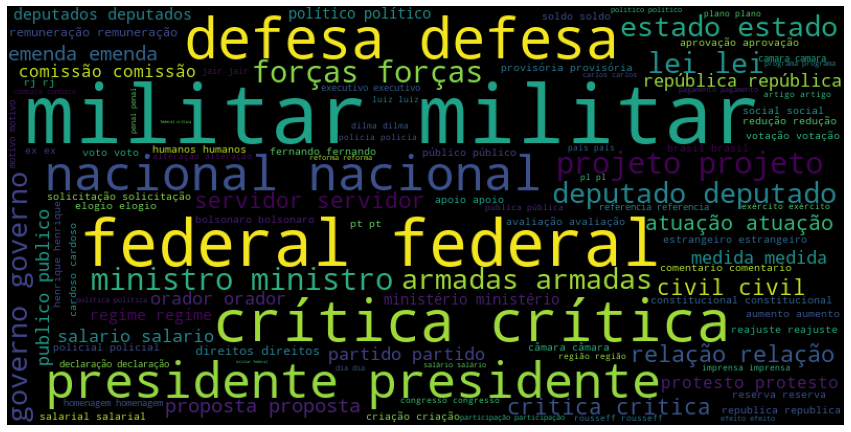

In [20]:

wordcloud = WordCloud(background_color="black",
                      width=800, height=400).generate(text)
 

fig, ax = plt.subplots(figsize=(15,11))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud);